In [1]:
# Install PIP packages
!pip3 install tensorflow_hub tensorflow scikit-learn pillow numpy scikit-image imutils

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Load Python libraries
import json
import os
import s3fs
import cv2
import imutils
import boto3
import errno
import os
import tensorflow_hub as tf_hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from image_augment import ImageAugment
from PIL import Image

In [3]:
# Download all trash data
def download_dir(client, resource, dist, local='/tmp', bucket='your_bucket'):
    if '/' not in dist:
        print(f"Downloading {dist}")
    paginator = client.get_paginator('list_objects')
    for result in paginator.paginate(Bucket=bucket, Delimiter='/', Prefix=dist):
        if result.get('CommonPrefixes') is not None:
            for subdir in result.get('CommonPrefixes'):
                download_dir(client, resource, subdir.get('Prefix'), local, bucket)
        for file in result.get('Contents', []):
            dest_pathname = os.path.join(local, file.get('Key'))
            if not os.path.exists(os.path.dirname(dest_pathname)):
                os.makedirs(os.path.dirname(dest_pathname))
            try:
                resource.meta.client.download_file(bucket, file.get('Key'), dest_pathname)
            except NotADirectoryError as e:
                print(f"NotADirectoryError exception occurred... {e}")

if 'TACO' not in os.listdir('.'):
    client = boto3.client('s3')
    resource = boto3.resource('s3')
    download_dir(client, resource, 'TACO', 'TACO', bucket='ucb-mids-wall-e')
    download_dir(client, resource, 'TrashNet', 'TrashNet', bucket='ucb-mids-wall-e')
    download_dir(client, resource, 'OpenStreetCam', 'OpenStreetCam', bucket='ucb-mids-wall-e')
    download_dir(client, resource, 'Malaga', 'Malaga', bucket='ucb-mids-wall-e')
    download_dir(client, resource, 'val2017', 'val2017', bucket='ucb-mids-wall-e')

In [4]:
# Augment Images
if '000000__blur2.0.jpg222' not in os.listdir('TACO/TACO/batch_1'):
    ImageAugment.execute("TACO", ["fliph","noise_0.05","trans_20_20","blur_2.0"])
    ImageAugment.execute("TrashNet", ["fliph","noise_0.05","trans_20_20","blur_2.0"])
    ImageAugment.execute("OpenStreetCam", ["fliph","noise_0.05","trans_20_20","blur_2.0"])    
    ImageAugment.execute("Malaga", ["fliph","noise_0.05","trans_20_20","blur_2.0"])        

Starting image processing...
Thread pool initialised with 16 workers
Processing TACO/TACO...
Processing TACO/TACO/TACO...
Processing TACO/TACO/TACO/batch_5...
Skipped TACO/TACO/batch_5/000043.JPG
Skipped TACO/TACO/batch_5/000103.JPG
Skipped TACO/TACO/batch_5/000026.JPG
Skipped TACO/TACO/batch_5/000052.JPG
Skipped TACO/TACO/batch_5/000040.JPG
Skipped TACO/TACO/batch_5/000104.JPG
Skipped TACO/TACO/batch_5/000018.JPG
Skipped TACO/TACO/batch_5/000087.JPG
Skipped TACO/TACO/batch_5/000050.JPG
Skipped TACO/TACO/batch_5/000062.JPG
Skipped TACO/TACO/batch_5/000088.JPG
Skipped TACO/TACO/batch_5/000112.JPG
Skipped TACO/TACO/batch_5/000020.JPG
Skipped TACO/TACO/batch_5/000114.JPG
Skipped TACO/TACO/batch_5/000120.JPG
Skipped TACO/TACO/batch_5/000094.JPG
Skipped TACO/TACO/batch_5/000057.JPG
Skipped TACO/TACO/batch_5/000047.JPG
Skipped TACO/TACO/batch_5/000012.JPG
Skipped TACO/TACO/batch_5/000061.JPG
Skipped TACO/TACO/batch_5/000010.JPG
Skipped TACO/TACO/batch_5/000072.JPG
Skipped TACO/TACO/batch_5/0

Processing TACO/TACO/TACO/batch_12...
Skipped Augmentation for TACO/TACO/batch_12/000011__blur2.0.jpg
Skipped Augmentation for TACO/TACO/batch_12/000072__fliph.jpg
Skipped Augmentation for TACO/TACO/batch_12/000076__trans20_20.jpg
Skipped Augmentation for TACO/TACO/batch_12/000071__noise0.05.jpg
Skipped Augmentation for TACO/TACO/batch_12/000057__blur2.0.jpg
Skipped Augmentation for TACO/TACO/batch_12/000031__noise0.05.jpg
Skipped Augmentation for TACO/TACO/batch_12/000006__fliph.jpg
Skipped Augmentation for TACO/TACO/batch_12/000084__blur2.0.jpg
Skipped Augmentation for TACO/TACO/batch_12/000037__noise0.05.jpg
Skipped Augmentation for TACO/TACO/batch_12/000011__noise0.05.jpg
Skipped Augmentation for TACO/TACO/batch_12/000015__fliph.jpg
Skipped Augmentation for TACO/TACO/batch_12/000045__blur2.0.jpg
Skipped Augmentation for TACO/TACO/batch_12/000043__fliph.jpg
Skipped Augmentation for TACO/TACO/batch_12/000010__noise0.05.jpg
Skipped Augmentation for TACO/TACO/batch_12/000056__trans20_2

Processed Images: 0
Starting image processing...
Thread pool initialised with 16 workers
Processing TrashNet/TrashNet...
Processing TrashNet/TrashNet/TrashNet...
Processing TrashNet/TrashNet/TrashNet/plastic...
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic280__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic473__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic294__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic8__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic109__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic442__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic416__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic236__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic168__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic262__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet

Skipped Augmentation for TrashNet/TrashNet/plastic/plastic249__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic393__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic42__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic184__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic174__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic454__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic292__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic80__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic458__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic456__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic192__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic294__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/plastic/plastic87__blur2.0.jpg
Skipped Augmenta

Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard232__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard127__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard69__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard402__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard321__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard34__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard229__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard402__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard301__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard35__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard190__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/cardboard/cardboard47__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/ca

Processing TrashNet/TrashNet/TrashNet/paper...
Skipped Augmentation for TrashNet/TrashNet/paper/paper73__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper386__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper64__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper535__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper550__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper528__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper248__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper432__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper379__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper108__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper72__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper499__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/paper/paper99__blur2.0.jpg
Skipped Augmentation for Tr

Skipped Augmentation for TrashNet/TrashNet/metal/metal311__noise0.05.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal396__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal113__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal307__fliph.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal90__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal352__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal45__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal109__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal296__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal164__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal319__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal111__trans20_20.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal92__blur2.0.jpg
Skipped Augmentation for TrashNet/TrashNet/metal/metal274__fliph

Processed Images: 0
Starting image processing...
Thread pool initialised with 16 workers
Processing OpenStreetCam/OpenStreetCam...
Processing OpenStreetCam/OpenStreetCam/OpenStreetCam...
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1387__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1457__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2134__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1216__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1135__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1899__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2632__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2198__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1092__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2129__noise0.05.jpg
Skipped Augmentation for OpenS

Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1305__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2756__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1106__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_974__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1892__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1555__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2291__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2834__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2844__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2380__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2976__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2932__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1328__fliph.jp

Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2774__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2356__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1383__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2555__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2790__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1155__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1663__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1436__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1082__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2740__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12527_2214__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1789__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/12232_1858__fliph.

Processing OpenStreetCam/OpenStreetCam/OpenStreetCam/trash...
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/12232_2252__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/12527_2488__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/12527_1958__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/12232_2480__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/12232_2148__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/12527_1967__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/13916_143__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/12232_2604__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/12232_2460__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/13916_45__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/trash/12232_2785__fliph.jpg
Skipped Augmentation for Ope

Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/13916_136__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2462__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2591__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2858__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_3147__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12527_1903__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2175__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2522__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2911__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2566__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/13916_165__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/13916_160__noise0.05.jpg

Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2821__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2362__blur2.0.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12527_2643__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2761__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2880__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2833__noise0.05.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12527_1959__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2083__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_1637__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_2983__fliph.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12527_2640__trans20_20.jpg
Skipped Augmentation for OpenStreetCam/OpenStreetCam/clean/12232_3131__nois

Processing Malaga/Malaga/Malaga/clean...
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233437.062133_right__noise0.05.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233679.132424_right__trans20_20.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261232510.053577_right__fliph.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233339.061207_right__blur2.0.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233784.115357_right__fliph.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233595.063605_right__blur2.0.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261232669.230974_right__trans20_20.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233639.114003_right__fliph.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261232407.052620_right__noise0.05.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233664.114249_right__noise0.05.jpg
Skipped Augme

Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233490.062630_right__trans20_20.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261232881.056992_right__fliph.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233808.115590_right__fliph.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233603.063664_right__fliph.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233463.062368_right__blur2.0.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261232735.055654_right__trans20_20.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261232534.053787_right__fliph.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261232363.052220_right__trans20_20.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233622.063856_right__blur2.0.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_1261233416.061937_right__noise0.05.jpg
Skipped Augmentation for Malaga/Malaga/clean/img_CAMERA1_

In [5]:
### Preprocessing functions
DESIRED_SIZE = 120

# Load and split image data
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

# Preprocess
def preprocess_image(img_path):
    img = Image.open(img_path)
    w, h = img.size
    img = crop_center(img, min(w,h), min(w,h))
    img = img.resize((DESIRED_SIZE, DESIRED_SIZE))    
    img = np.asarray(img)/256.0    
    return img

In [6]:
# Detect Objects w/ OpenCV and YOLO
if 'yolov3.cfg' not in os.listdir('.'):
    !curl https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -o yolov3.cfg
    !curl https://pjreddie.com/media/files/yolov3.weights -o yolov3.weights
    !curl https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -o coco.names

net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")
LABELS = open("coco.names").read().strip().split("\n")
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

def preprocess_image_with_opencv(image):
    image_arr = np.array(image)
    H,W,D = image_arr.shape
    
    ### Section 1: Detect cars, people, to mask out ###
    ln = net.getLayerNames()
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    blob = cv2.dnn.blobFromImage(image_arr, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(ln)
    
    boxes = []
    confidences = []
    classIDs = []
    CONFIDENCE_T = 0.1
    THRESHOLD_T = 0.9
    DEBUG = False

    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
            if confidence > CONFIDENCE_T:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")
                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # apply non-maxima suppression to suppress weak, overlapping
    # bounding boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_T, THRESHOLD_T)

    image_yolo_copy = image_arr.copy()

    # ensure at least one detection exists
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            # draw a bounding box rectangle and label on the image
            color = [int(c) for c in COLORS[classIDs[i]]]
            cv2.rectangle(image_yolo_copy, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
            cv2.putText(image_yolo_copy, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, color, 2)

    if DEBUG:
        display(Image.fromarray(image_yolo_copy))
    
    
    ### Section 2: Edge Detection and Binarization
    
    gray = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)

    thresh = cv2.Laplacian(gray,cv2.CV_64F, ksize=15)

    thres_min = np.min(thresh)
    thres_max = np.max(thresh)


    detected_bottoms = [2*H//3] #2/3 slice of image by default if nothing is found
    image_yolo_removed = thresh.copy()


    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            # draw a bounding box rectangle and label on the image
            cv2.rectangle(image_yolo_removed, (x, y), (x + w, y + h), (0,0,0), -1)
            detected_bottoms.append(y+h)


    median_bot = (int)(np.median(np.array(detected_bottoms)))
    image_yolo_removed = image_yolo_removed[median_bot:,:]

    if DEBUG:
        display(Image.fromarray(image_yolo_removed))

    image_yolo_min = float(np.min(image_yolo_removed))
    image_yolo_max = float(np.max(image_yolo_removed))

    pos_mask = image_yolo_removed>=0
    neg_mask = image_yolo_removed<0
    
    pos_adj = np.multiply(pos_mask, image_yolo_removed)/image_yolo_max
    neg_adj = np.multiply(neg_mask, image_yolo_removed)/(-image_yolo_min)
    
    edge_detected_image = ((pos_adj+neg_adj)*128+128).astype(np.uint8)

    blur = cv2.blur(edge_detected_image,(5,5)) # possibly add blurring in somewhere else? 
    
    thresh = cv2.threshold(blur, 64, 256, cv2.THRESH_BINARY)[1]

    if DEBUG:
        plt.figure(figsize=(30,20))
        plt.imshow(edge_detected_image)
        plt.figure(figsize=(30,20))
        plt.imshow(blur)
        plt.figure(figsize=(30,20))
        plt.imshow(thresh)

    ### Secction 3: Object detection ###
    
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)

    if DEBUG:
        print("Detected Count:" + str(len(cnts)))

    image_final_copy = image_arr.copy()

    ROI_number = 0
    desired_size = DESIRED_SIZE # want a 300x300 boundary around the box, this number needs to be even
    
    results = []
    
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        area = cv2.contourArea(c)

        if w >= 5 and h >= 5 and w < W//2: # last condition removes the largest bounding box that is always the whole image 
            x1 = max(x+w//2-desired_size//2,0)
            x2 = min(x + w//2 + desired_size//2, W-1)
            if (x1 == 0 and not x2-x1 == desired_size): # ran up into corners of image, need to shift
                x2 = x1+desired_size
            elif (x2 == W-1 and not x2-x1 == desired_size): # ran up into corners of image, need to shift
                x1 = x2-desired_size
            y1 = max(median_bot+y + h//2 - desired_size//2,0)
            y2 = min(median_bot+y + h//2 + desired_size//2, H-1)
            if (y1 == 0 and not y2-y1 == desired_size): # ran up into corners of image, need to shift
                y2 = y1+desired_size
            elif (y2 == H-1 and not y2-y1 == desired_size): # ran up into corners of image, need to shift
                y1 = y2-desired_size

            
            cv2.rectangle(image_final_copy, (x1, y1), (x2, y2), (36,255,12), 1)
            ROI = image_arr[y1:y2, x1:x2]
            np_img = np.asarray(ROI)/256.0 
            results.append(np_img)

            # Display only bounding box image
            if DEBUG:
                fig,ax = plt.subplots(1)
                plt.axis('off')
                plt.imshow(ROI)
                ROI_number += 1

    return results
    
    # Display original with bounding box
    if DEBUG:
        fig,ax = plt.subplots(1)
        plt.axis('off')
        plt.imshow(image_final_copy)

        display(Image.fromarray(image_final_copy))
        print(ROI_number)

Taco folders: ['batch_5', 'batch_2', 'batch_11', 'batch_6', 'batch_4', 'batch_15', 'batch_14', 'batch_1', 'batch_9', 'batch_13', 'batch_12', 'batch_3', 'batch_8', 'batch_10', 'batch_7']
Loading TACO folder batch_5...
Loading TACO folder batch_2...
Loading TACO folder batch_11...
Not adding 000099.jpg.b1A7ebf6 due to exception...
Loading TACO folder batch_6...
Loading TACO folder batch_4...
Loading TACO folder batch_15...
Loading TACO folder batch_14...
Loading TACO folder batch_1...
Not adding 000031__noise0.05.jpg due to exception...
Not adding 000014__trans20_20.jpg due to exception...
Loading TACO folder batch_9...
Loading TACO folder batch_13...
Loading TACO folder batch_12...
Loading TACO folder batch_3...
Loading TACO folder batch_8...
Loading TACO folder batch_10...
Loading TACO folder batch_7...
Taco Image Count: 4830


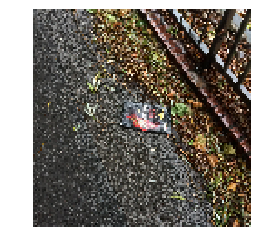

In [7]:
taco_data_path = 'TACO/TACO'
taco_image_folders = os.listdir(taco_data_path)
print(f"Taco folders: {taco_image_folders}")

images = []
flag = True
for folder in taco_image_folders:
    if "batch" in folder:
        print(f"Loading TACO folder {folder}...")
        for img in os.listdir(f"{taco_data_path}/{folder}"):
            try:
                # Load image
                I = preprocess_image(f"{taco_data_path}/{folder}/{img}")

                # Show image
                if flag:
                    fig,ax = plt.subplots(1)
                    plt.axis('off')
                    plt.imshow(I)
                    flag = False

                if I.shape == (DESIRED_SIZE, DESIRED_SIZE, 3):
                    images.append(I)
                else:
                    print(f"Not adding {img} due to improper shape...")
            except:
                print(f"Not adding {img} due to exception...")

taco_img_count = len(images)
print(f"Taco Image Count: {taco_img_count}")

TrashNet folders: ['plastic', 'trash', 'cardboard', 'glass', 'paper', 'metal']
Loading TrashNet folder plastic...
Loading TrashNet folder trash...
Loading TrashNet folder cardboard...
Loading TrashNet folder glass...
Loading TrashNet folder paper...
Loading TrashNet folder metal...
TrashNet Image Count: 12635


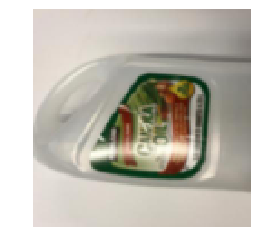

In [8]:
prev_count = len(images)
trashnet_data_path = 'TrashNet/TrashNet'
trashnet_image_folders = os.listdir(trashnet_data_path)
print(f"TrashNet folders: {trashnet_image_folders}")

flag = True
for folder in trashnet_image_folders:
    if "_" not in folder:
        print(f"Loading TrashNet folder {folder}...")
        for img in os.listdir(f"{trashnet_data_path}/{folder}"):
            try:
                # Load image
                I = preprocess_image(f"{trashnet_data_path}/{folder}/{img}")

                # Show image
                if flag:
                    fig,ax = plt.subplots(1)
                    plt.axis('off')
                    plt.imshow(I)
                    flag = False

                if I.shape == (DESIRED_SIZE, DESIRED_SIZE, 3):
                    images.append(I)
                else:
                    print(f"Not adding {img} due to improper shape...")
            except:
                print(f"Not adding {img} due to exception...")
                
trashnet_img_count = len(images) - prev_count
print(f"TrashNet Image Count: {trashnet_img_count}")

OpenStreet Image Count: 1065
Detected Count: 5
OpenStreet Image Count: 3994


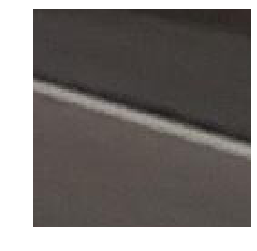

In [9]:
prev_count = len(images)
openstreet_data_path = 'OpenStreetCam/OpenStreetCam/trash'
openstreet_image_files = os.listdir(openstreet_data_path)
openstreet_img_count = len(openstreet_image_files)
print(f"OpenStreet Image Count: {openstreet_img_count}")

flag = True    
for i, img in enumerate(openstreet_image_files):
    # Load image
    detect_imgs = preprocess_image_with_opencv(Image.open(f"{openstreet_data_path}/{img}"))

    detected_count = len(detect_imgs)
    for detect_img in detect_imgs:
        # Show image
        if flag:
            print(f"Detected Count: {detected_count}")
            fig,ax = plt.subplots(1)
            plt.axis('off')
            plt.imshow(detect_img)
            flag = False

        if detect_img.shape == (DESIRED_SIZE, DESIRED_SIZE, 3):
            images.append(detect_img)
        else:
            print(f"Not adding {img} object due to improper shape... Total Objs={detected_count}")

openstreet_img_count = len(images) - prev_count
print(f"OpenStreet Image Count: {openstreet_img_count}")

Malaga Image Count: 670
Caught exception for img_CAMERA1_1261232576.054178_right__noise0.05.jpg
Detected Count: 3
Caught exception for img_CAMERA1_1261232805.056267_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232801.056255_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233464.062381_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232780.056058_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232788.056124_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232742.055690_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232279.051439_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232771.055979_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232775.055996_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232834.056558_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232979.057875_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232741.055701_right__noise0.05.jpg
Caught exception for i

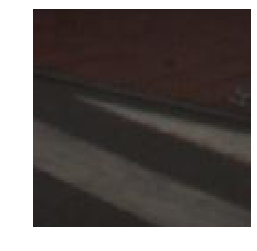

In [10]:
prev_count = len(images)
malaga_data_path = 'Malaga/Malaga/trash'
malaga_image_files = os.listdir(malaga_data_path)
malaga_img_count = len(malaga_image_files)
print(f"Malaga Image Count: {malaga_img_count}")
            
flag = True    
for i, img in enumerate(malaga_image_files):
    try:
        # Load image
        detect_imgs = preprocess_image_with_opencv(Image.open(f"{malaga_data_path}/{img}"))

        detected_count = len(detect_imgs)
        for detect_img in detect_imgs:
            # Show image
            if flag:
                print(f"Detected Count: {detected_count}")
                fig,ax = plt.subplots(1)
                plt.axis('off')
                plt.imshow(detect_img)
                flag = False

            if detect_img.shape == (DESIRED_SIZE, DESIRED_SIZE, 3):
                images.append(detect_img)
            else:
                print(f"Not adding {img} object due to improper shape... Total Objs={detected_count}")
    except:
        print(f"Caught exception for {img}")
        
malaga_img_count = len(images) - prev_count
print(f"Malaga Image Count: {malaga_img_count}\n")

pos_label_count = taco_img_count + trashnet_img_count + openstreet_img_count + malaga_img_count
labels = [1]*pos_label_count
print(f"Positive (Trash) Images: {pos_label_count}")
print(f"TACO %:                  {taco_img_count/pos_label_count}")
print(f"TrashNet %:              {trashnet_img_count/pos_label_count}")      
print(f"OpenStreetCam %:         {openstreet_img_count/pos_label_count}")      
print(f"Malaga %:                {malaga_img_count/pos_label_count}")      

OpenStreet Image Count: 2870
Detected Count: 1
Caught exception for 12232_2177__noise0.05.jpg
Caught exception for 12232_2810__noise0.05.jpg
Caught exception for 12232_2522__noise0.05.jpg
Caught exception for 12232_2649__noise0.05.jpg
Caught exception for 12232_2666__noise0.05.jpg
Caught exception for 12232_2489__noise0.05.jpg
Caught exception for 12232_3046__noise0.05.jpg
Caught exception for 12232_2677__noise0.05.jpg
Caught exception for 12232_2562__noise0.05.jpg
Caught exception for 12232_2247__noise0.05.jpg
Caught exception for 13916_154__noise0.05.jpg
Caught exception for 12232_2439__noise0.05.jpg
Caught exception for 12232_2413__noise0.05.jpg
Caught exception for 12232_2109__noise0.05.jpg
Caught exception for 13916_94__noise0.05.jpg
Caught exception for 12232_2490__noise0.05.jpg
Caught exception for 12527_1929__noise0.05.jpg
Caught exception for 12232_2380__noise0.05.jpg
Caught exception for 12527_1962__noise0.05.jpg
Caught exception for 12232_2085__noise0.05.jpg
Caught exception

Caught exception for 12232_2590__noise0.05.jpg
Caught exception for 12232_1982__noise0.05.jpg
Caught exception for 12232_2602__noise0.05.jpg
Caught exception for 13916_39__noise0.05.jpg
Caught exception for 12232_2319__noise0.05.jpg
Caught exception for 12232_2499__noise0.05.jpg
Caught exception for 13916_63__noise0.05.jpg
Caught exception for 12232_2987__noise0.05.jpg
Caught exception for 12232_2360__noise0.05.jpg
Caught exception for 12232_2872__noise0.05.jpg
Caught exception for 12232_2901__noise0.05.jpg
Caught exception for 12527_1974__noise0.05.jpg
Caught exception for 12232_2932__noise0.05.jpg
Caught exception for 12232_2014__noise0.05.jpg
Caught exception for 12232_1997__noise0.05.jpg
Caught exception for 13916_109__noise0.05.jpg
Caught exception for 12527_2823__noise0.05.jpg
Caught exception for 12232_2051__noise0.05.jpg
Caught exception for 12232_3105__noise0.05.jpg
Caught exception for 12232_2778__noise0.05.jpg
Caught exception for 12232_2584__noise0.05.jpg
Caught exception f

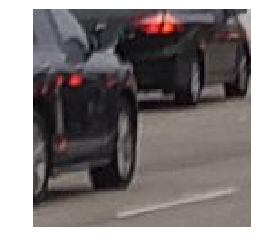

In [11]:
# Not Trash data
prev_count = len(images)
openstreet_data_path = 'OpenStreetCam/OpenStreetCam/clean'
openstreet_image_files = os.listdir(openstreet_data_path)[:int((pos_label_count/7))]

openstreet_img_count = len(openstreet_image_files)
print(f"OpenStreet Image Count: {openstreet_img_count}")
            
flag = True    
for i, img in enumerate(openstreet_image_files):
    try:
        # Load image
        detect_imgs = preprocess_image_with_opencv(Image.open(f"{openstreet_data_path}/{img}"))

        detected_count = len(detect_imgs)
        for detect_img in detect_imgs:
            # Show image
            if flag:
                print(f"Detected Count: {detected_count}")
                fig,ax = plt.subplots(1)
                plt.axis('off')
                plt.imshow(detect_img)
                flag = False

            if detect_img.shape == (DESIRED_SIZE, DESIRED_SIZE, 3):
                images.append(detect_img)
            else:
                print(f"Not adding {img} object due to improper shape... Total Objs={detected_count}")
    except:
        print(f"Caught exception for {img}")
openstreet_img_count = len(images) - prev_count
print(f"OpenStreet Image Count: {openstreet_img_count}")

Malaga Image Count: 3827
Detected Count: 4
Caught exception for img_CAMERA1_1261233751.115062_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233383.061646_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232413.052670_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233758.115130_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232736.055643_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233388.061670_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232859.056763_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232589.054285_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232415.052678_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232731.055602_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232421.056133_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232578.062317_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233752.146332_right__noise0.05.jpg
Caught exception for 

Caught exception for img_CAMERA1_1261232324.051857_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233795.115480_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233460.062339_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232485.053334_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233717.114732_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233516.062858_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232844.056635_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233519.062885_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232743.055708_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233685.114441_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233530.063007_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232259.051231_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233672.114322_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233661.114215_right__noise0

Caught exception for img_CAMERA1_1261233658.114195_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233786.115385_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232549.053943_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232418.052697_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233580.063464_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233125.059255_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233364.061454_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233344.061276_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232588.054306_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232275.051391_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232361.052176_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233248.060394_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233164.075487_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233494.069678_right__noise0

Caught exception for img_CAMERA1_1261232257.051225_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232449.053000_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232357.052161_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233373.061531_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233807.115576_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232366.052238_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232584.072419_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233396.061738_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233540.063079_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233536.063072_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261233448.062235_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232521.053667_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232370.052256_right__noise0.05.jpg
Caught exception for img_CAMERA1_1261232484.053311_right__noise0

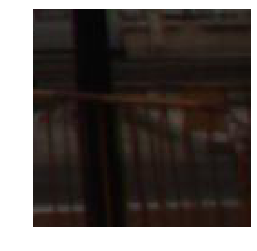

In [12]:
# Not Trash data
prev_count = len(images)
malaga_data_path = 'Malaga/Malaga/clean'
malaga_image_files = os.listdir(malaga_data_path)[:int((pos_label_count/7))]

malaga_img_count = len(malaga_image_files)
print(f"Malaga Image Count: {malaga_img_count}")
            
flag = True    
for i, img in enumerate(malaga_image_files):
    try:
        # Load image
        detect_imgs = preprocess_image_with_opencv(Image.open(f"{malaga_data_path}/{img}"))

        detected_count = len(detect_imgs)
        for detect_img in detect_imgs:
            # Show image
            if flag:
                print(f"Detected Count: {detected_count}")
                fig,ax = plt.subplots(1)
                plt.axis('off')
                plt.imshow(detect_img)
                flag = False

            if detect_img.shape == (DESIRED_SIZE, DESIRED_SIZE, 3):
                images.append(detect_img)
            else:
                print(f"Not adding {img} object due to improper shape... Total Objs={detected_count}")
    except:
        print(f"Caught exception for {img}")
        
malaga_img_count = len(images) - prev_count
print(f"Malaga Image Count: {malaga_img_count}")

Random Image Count: 5000
Not adding 000000061418.jpg due to improper shape...
Not adding 000000274219.jpg due to improper shape...
Not adding 000000205289.jpg due to improper shape...
Not adding 000000007888.jpg due to improper shape...
Not adding 000000431848.jpg due to improper shape...
Not adding 000000024021.jpg due to improper shape...
Not adding 000000130465.jpg due to improper shape...
Not adding 000000209222.jpg due to improper shape...
Not adding 000000141671.jpg due to improper shape...
Not adding 000000353180.jpg due to improper shape...
COCO Image Count: 4990


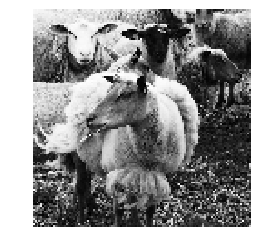

In [13]:
# Not Trash data
prev_count = len(images)
random_data_path = 'val2017/val2017'
random_image_files = os.listdir(random_data_path)[:int((pos_label_count/3))]

random_img_count = len(random_image_files)
print(f"Random Image Count: {random_img_count}")
            
flag = True    
for i, img in enumerate(random_image_files):
    # Load image
    I = preprocess_image(f'{random_data_path}/{img}')

    # Show image
    if flag:
        flag = False
        fig,ax = plt.subplots(1)
        plt.axis('off')
        plt.imshow(I)

    if I.shape == (DESIRED_SIZE, DESIRED_SIZE, 3):
        images.append(I)
    else:
        print(f"Not adding {img} due to improper shape...")
        
random_img_count = len(images) - prev_count
print(f"COCO Image Count: {random_img_count}")

In [14]:
# Split data
neg_label_count = len(images) - pos_label_count
labels = [1]*pos_label_count + [0]*(len(images)-pos_label_count)
print(f"Image total: {len(images)}")
print(f"Positive Label %: {pos_label_count / len(images)}")
print(f"Negative Label %: {neg_label_count / len(images)}")

train_x, val_x, train_y, val_y = train_test_split(np.array(images), np.array(labels), test_size=0.20, random_state=7)

Image total: 49618
Positive Label %: 0.4628562215325084
Negative Label %: 0.5371437784674916


In [15]:
# Create basic mobilenet binary classification model - TF 2.0 model layer
models = ['https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4']

epochs = 10
batch_size = 64
best_model = None
best_history = None
best_acc = 0.0
for model_arch in models:
    print(f"Building {model_arch}... epochs={epochs}, batch_size={batch_size}")
    model = tf.keras.Sequential([
        #arguments=dict(batch_norm_momentum=0.997)
        tf_hub.KerasLayer(model_arch, trainable=False),  
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.build([None, DESIRED_SIZE, DESIRED_SIZE, 3])  
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])
    print("Fitting...")
    history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_data=(val_x, val_y)) 

Building https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4... epochs=10, batch_size=64
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Fitting...


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 39694 samples, validate on 9924 samples
Epoch 1/10
39694/39694 [==============================] - 108s 3ms/sample - loss: 0.3502 - acc: 0.8549 - val_loss: 0.3111 - val_acc: 0.8679
Epoch 2/10
39694/39694 [==============================] - 103s 3ms/sample - loss: 0.2879 - acc: 0.8790 - val_loss: 0.3023 - val_acc: 0.8665
Epoch 3/10
39694/39694 [==============================] - 104s 3ms/sample - loss: 0.2727 - acc: 0.8853 - val_loss: 0.2945 - val_acc: 0.8729
Epoch 4/10
39694/39694 [==============================] - 104s 3ms/sample - loss: 0.2656 - acc: 0.8876 - val_loss: 0.2911 - val_acc: 0.8772
Epoch 5/10
39694/39694 [==============================] - 104s 3ms/sample - loss: 0.2621 - acc: 0.8894 - val_loss: 0.2912 - val_acc: 0.8758
Epoch 6/10
39694/39694 [==============================] - 103s 3ms/sample - loss: 0.2588 - acc: 0.8905 - val_loss: 0.2972 - val_acc: 0.8793
Epoch 7/10
39694/39694 [==============================] - 103s 3ms/sample - loss: 0.2559 - acc: 0.8922 - val_lo

In [16]:
print(history.history)
val_acc = history.history['val_acc'][0]
print(f"Validation Accuracy: {val_acc}")

if val_acc > best_acc:
    best_history = history
    best_model = model
    best_acc = val_acc

{'loss': [0.35018564525684037, 0.28793944549895706, 0.27268421141489957, 0.2656260377340739, 0.2621132063524497, 0.2588341610201445, 0.2558733262844324, 0.25483804461865567, 0.25306046853715625, 0.2519332972395214], 'acc': [0.8548899, 0.87899935, 0.8853479, 0.88759005, 0.8893787, 0.8905376, 0.89220035, 0.8915705, 0.89255303, 0.8925278], 'val_loss': [0.31112312545030646, 0.3022837213382083, 0.294512467271904, 0.29108951433874436, 0.2912370760214516, 0.29717281583286687, 0.29662094107562137, 0.2908414219209909, 0.2992940423998896, 0.29283386610631545], 'val_acc': [0.867896, 0.8664853, 0.8729343, 0.87716645, 0.8757557, 0.87928253, 0.87152356, 0.88432086, 0.8712213, 0.875655]}
Validation Accuracy: 0.8678960204124451


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  23561152  
_________________________________________________________________
dense (Dense)                multiple                  2049      
Total params: 23,563,201
Trainable params: 2,049
Non-trainable params: 23,561,152
_________________________________________________________________


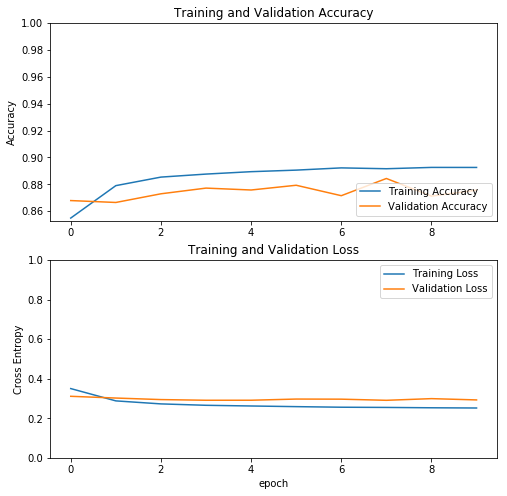

In [17]:
# Plot accuracy vs loss graphs
# Show model architecture
best_model.summary()

acc = best_history.history['acc']
val_acc = best_history.history['val_acc']

loss = best_history.history['loss']
val_loss = best_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

array([[0.999959]], dtype=float32)

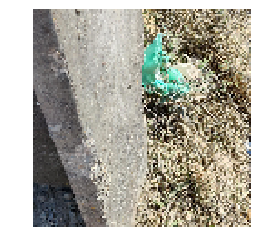

In [18]:
# example prediction
test_img = preprocess_image('TACO/TACO/batch_10/000006.jpg')
fig,ax = plt.subplots(1)
plt.axis('off')
plt.imshow(test_img)

best_model.predict(np.array([test_img]),
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)

In [19]:
def infer(infer_img):
    MIN_CONFIDENCE = 0.80

    results = best_model.predict(np.array([infer_img]),
            batch_size=None,
            verbose=0,
            steps=None,
            callbacks=None,
            max_queue_size=10,
            workers=1,
            use_multiprocessing=False)
    pred_index = np.argmax(results)
    pred_confidence = np.amax(results)
    pred_cat = 'trash' if pred_confidence > MIN_CONFIDENCE else 'clean'
    return pred_cat, pred_confidence

Identifying trash in OpenStreetCam of size 9317
[[0.04697888]]
OpenStreetCam/OpenStreetCam/12232_1387__blur2.0.jpg: clean - 0.04697887971997261

12232_1387__blur2.0.jpg... Obj 1/14: clean,0.04697887971997261
[[0.35524988]]
OpenStreetCam/OpenStreetCam/12232_1387__blur2.0.jpg: clean - 0.35524988174438477

12232_1387__blur2.0.jpg... Obj 2/14: clean,0.35524988174438477
[[0.1868872]]
OpenStreetCam/OpenStreetCam/12232_1387__blur2.0.jpg: clean - 0.1868872046470642

12232_1387__blur2.0.jpg... Obj 3/14: clean,0.1868872046470642
[[0.13171168]]
OpenStreetCam/OpenStreetCam/12232_1387__blur2.0.jpg: clean - 0.1317116767168045

12232_1387__blur2.0.jpg... Obj 4/14: clean,0.1317116767168045
[[0.32239926]]
OpenStreetCam/OpenStreetCam/12232_1387__blur2.0.jpg: clean - 0.3223992586135864

12232_1387__blur2.0.jpg... Obj 5/14: clean,0.3223992586135864
[[0.6539222]]
OpenStreetCam/OpenStreetCam/12232_1387__blur2.0.jpg: clean - 0.6539222002029419

12232_1387__blur2.0.jpg... Obj 6/14: clean,0.6539222002029419
[[

[[0.24804083]]
OpenStreetCam/OpenStreetCam/12232_1636.jpg: clean - 0.2480408251285553

12232_1636.jpg... Obj 1/1: clean,0.2480408251285553
[[0.63398707]]
OpenStreetCam/OpenStreetCam/12232_1917__blur2.0.jpg: clean - 0.6339870691299438

12232_1917__blur2.0.jpg... Obj 1/1: clean,0.6339870691299438
[[0.10406196]]
OpenStreetCam/OpenStreetCam/12232_1169__fliph.jpg: clean - 0.10406196117401123

12232_1169__fliph.jpg... Obj 1/2: clean,0.10406196117401123
[[0.6130706]]
OpenStreetCam/OpenStreetCam/12232_1169__fliph.jpg: clean - 0.6130706071853638

12232_1169__fliph.jpg... Obj 2/2: clean,0.6130706071853638
[[0.6528453]]
OpenStreetCam/OpenStreetCam/12527_2148__trans20_20.jpg: clean - 0.6528453230857849

12527_2148__trans20_20.jpg... Obj 1/2: clean,0.6528453230857849
[[0.6834175]]
OpenStreetCam/OpenStreetCam/12527_2148__trans20_20.jpg: clean - 0.6834174990653992

12527_2148__trans20_20.jpg... Obj 2/2: clean,0.6834174990653992
[[0.7959811]]
OpenStreetCam/OpenStreetCam/12527_2567__noise0.05.jpg: clea

[[0.00041337]]
OpenStreetCam/OpenStreetCam/12527_2813__blur2.0.jpg: clean - 0.0004133681068196893

12527_2813__blur2.0.jpg... Obj 1/2: clean,0.0004133681068196893
[[0.09332166]]
OpenStreetCam/OpenStreetCam/12527_2813__blur2.0.jpg: clean - 0.09332165867090225

12527_2813__blur2.0.jpg... Obj 2/2: clean,0.09332165867090225
[[0.14729561]]
OpenStreetCam/OpenStreetCam/12527_2350__fliph.jpg: clean - 0.14729560911655426

12527_2350__fliph.jpg... Obj 1/10: clean,0.14729560911655426
[[0.11377996]]
OpenStreetCam/OpenStreetCam/12527_2350__fliph.jpg: clean - 0.1137799620628357

12527_2350__fliph.jpg... Obj 2/10: clean,0.1137799620628357
[[0.08963695]]
OpenStreetCam/OpenStreetCam/12527_2350__fliph.jpg: clean - 0.08963695168495178

12527_2350__fliph.jpg... Obj 3/10: clean,0.08963695168495178
[[0.07487229]]
OpenStreetCam/OpenStreetCam/12527_2350__fliph.jpg: clean - 0.07487228512763977

12527_2350__fliph.jpg... Obj 4/10: clean,0.07487228512763977
[[0.17656268]]
OpenStreetCam/OpenStreetCam/12527_2350__f

[[0.9316272]]
OpenStreetCam/OpenStreetCam/12232_1663.jpg: trash - 0.9316272139549255

12232_1663.jpg... Obj 1/1: trash,0.9316272139549255
[[0.14351468]]
OpenStreetCam/OpenStreetCam/12232_1452.jpg: clean - 0.14351467788219452

12232_1452.jpg... Obj 1/3: clean,0.14351467788219452
[[0.07216693]]
OpenStreetCam/OpenStreetCam/12232_1452.jpg: clean - 0.07216692715883255

12232_1452.jpg... Obj 2/3: clean,0.07216692715883255
[[0.32144165]]
OpenStreetCam/OpenStreetCam/12232_1452.jpg: clean - 0.321441650390625

12232_1452.jpg... Obj 3/3: clean,0.321441650390625
[[0.9690832]]
OpenStreetCam/OpenStreetCam/12232_1087__trans20_20.jpg: trash - 0.9690831899642944

12232_1087__trans20_20.jpg... Obj 1/3: trash,0.9690831899642944
[[0.2835858]]
OpenStreetCam/OpenStreetCam/12232_1087__trans20_20.jpg: clean - 0.283585786819458

12232_1087__trans20_20.jpg... Obj 2/3: clean,0.283585786819458
[[0.35546613]]
OpenStreetCam/OpenStreetCam/12232_1087__trans20_20.jpg: clean - 0.3554661273956299

12232_1087__trans20_20

[[0.11147509]]
OpenStreetCam/OpenStreetCam/12527_2435__blur2.0.jpg: clean - 0.11147508770227432

12527_2435__blur2.0.jpg... Obj 1/15: clean,0.11147508770227432
[[0.44114813]]
OpenStreetCam/OpenStreetCam/12527_2435__blur2.0.jpg: clean - 0.44114813208580017

12527_2435__blur2.0.jpg... Obj 2/15: clean,0.44114813208580017
[[0.256855]]
OpenStreetCam/OpenStreetCam/12527_2435__blur2.0.jpg: clean - 0.2568550109863281

12527_2435__blur2.0.jpg... Obj 3/15: clean,0.2568550109863281
[[0.27047598]]
OpenStreetCam/OpenStreetCam/12527_2435__blur2.0.jpg: clean - 0.27047598361968994

12527_2435__blur2.0.jpg... Obj 4/15: clean,0.27047598361968994
[[0.0449998]]
OpenStreetCam/OpenStreetCam/12527_2435__blur2.0.jpg: clean - 0.044999800622463226

12527_2435__blur2.0.jpg... Obj 5/15: clean,0.044999800622463226
[[0.08863608]]
OpenStreetCam/OpenStreetCam/12527_2435__blur2.0.jpg: clean - 0.08863607794046402

12527_2435__blur2.0.jpg... Obj 6/15: clean,0.08863607794046402
[[0.13997266]]
OpenStreetCam/OpenStreetCam/

[[0.3538516]]
OpenStreetCam/OpenStreetCam/12232_1310__blur2.0.jpg: clean - 0.3538515865802765

12232_1310__blur2.0.jpg... Obj 1/3: clean,0.3538515865802765
[[0.18748364]]
OpenStreetCam/OpenStreetCam/12232_1310__blur2.0.jpg: clean - 0.18748363852500916

12232_1310__blur2.0.jpg... Obj 2/3: clean,0.18748363852500916
[[0.02272676]]
OpenStreetCam/OpenStreetCam/12232_1310__blur2.0.jpg: clean - 0.02272675558924675

12232_1310__blur2.0.jpg... Obj 3/3: clean,0.02272675558924675
[[0.6871941]]
OpenStreetCam/OpenStreetCam/12232_1083__fliph.jpg: clean - 0.6871941089630127

12232_1083__fliph.jpg... Obj 1/1: clean,0.6871941089630127
[[0.35598963]]
OpenStreetCam/OpenStreetCam/12527_2181__blur2.0.jpg: clean - 0.35598963499069214

12527_2181__blur2.0.jpg... Obj 1/4: clean,0.35598963499069214
[[0.9288858]]
OpenStreetCam/OpenStreetCam/12527_2181__blur2.0.jpg: trash - 0.928885817527771

12527_2181__blur2.0.jpg... Obj 2/4: trash,0.928885817527771
[[0.18002015]]
OpenStreetCam/OpenStreetCam/12527_2181__blur2.

[[0.14763393]]
OpenStreetCam/OpenStreetCam/12527_2814__fliph.jpg: clean - 0.14763392508029938

12527_2814__fliph.jpg... Obj 1/1: clean,0.14763392508029938
[[0.47268626]]
OpenStreetCam/OpenStreetCam/12232_1564__trans20_20.jpg: clean - 0.4726862609386444

12232_1564__trans20_20.jpg... Obj 1/1: clean,0.4726862609386444
[[0.03993874]]
OpenStreetCam/OpenStreetCam/12232_1505__blur2.0.jpg: clean - 0.03993874043226242

12232_1505__blur2.0.jpg... Obj 1/4: clean,0.03993874043226242
[[0.66434526]]
OpenStreetCam/OpenStreetCam/12232_1505__blur2.0.jpg: clean - 0.6643452644348145

12232_1505__blur2.0.jpg... Obj 2/4: clean,0.6643452644348145
[[0.65147406]]
OpenStreetCam/OpenStreetCam/12232_1505__blur2.0.jpg: clean - 0.6514740586280823

12232_1505__blur2.0.jpg... Obj 3/4: clean,0.6514740586280823
[[0.09247883]]
OpenStreetCam/OpenStreetCam/12232_1505__blur2.0.jpg: clean - 0.09247882664203644

12232_1505__blur2.0.jpg... Obj 4/4: clean,0.09247882664203644
[[0.7667616]]
OpenStreetCam/OpenStreetCam/12527_29

[[0.16062897]]
OpenStreetCam/OpenStreetCam/12527_2962__blur2.0.jpg: clean - 0.16062897443771362

12527_2962__blur2.0.jpg... Obj 16/32: clean,0.16062897443771362
[[0.02297755]]
OpenStreetCam/OpenStreetCam/12527_2962__blur2.0.jpg: clean - 0.022977545857429504

12527_2962__blur2.0.jpg... Obj 17/32: clean,0.022977545857429504
[[0.07112176]]
OpenStreetCam/OpenStreetCam/12527_2962__blur2.0.jpg: clean - 0.07112175971269608

12527_2962__blur2.0.jpg... Obj 18/32: clean,0.07112175971269608
[[0.04927514]]
OpenStreetCam/OpenStreetCam/12527_2962__blur2.0.jpg: clean - 0.04927514120936394

12527_2962__blur2.0.jpg... Obj 19/32: clean,0.04927514120936394
[[0.33383587]]
OpenStreetCam/OpenStreetCam/12527_2962__blur2.0.jpg: clean - 0.3338358700275421

12527_2962__blur2.0.jpg... Obj 20/32: clean,0.3338358700275421
[[0.10116909]]
OpenStreetCam/OpenStreetCam/12527_2962__blur2.0.jpg: clean - 0.10116909444332123

12527_2962__blur2.0.jpg... Obj 21/32: clean,0.10116909444332123
[[0.08412561]]
OpenStreetCam/OpenS

[[0.46665755]]
OpenStreetCam/OpenStreetCam/12232_1747__blur2.0.jpg: clean - 0.4666575491428375

12232_1747__blur2.0.jpg... Obj 16/37: clean,0.4666575491428375
[[0.01119922]]
OpenStreetCam/OpenStreetCam/12232_1747__blur2.0.jpg: clean - 0.011199221946299076

12232_1747__blur2.0.jpg... Obj 17/37: clean,0.011199221946299076
[[0.06275231]]
OpenStreetCam/OpenStreetCam/12232_1747__blur2.0.jpg: clean - 0.06275230646133423

12232_1747__blur2.0.jpg... Obj 18/37: clean,0.06275230646133423
[[0.2628684]]
OpenStreetCam/OpenStreetCam/12232_1747__blur2.0.jpg: clean - 0.26286840438842773

12232_1747__blur2.0.jpg... Obj 19/37: clean,0.26286840438842773
[[0.10734923]]
OpenStreetCam/OpenStreetCam/12232_1747__blur2.0.jpg: clean - 0.10734923183917999

12232_1747__blur2.0.jpg... Obj 20/37: clean,0.10734923183917999
[[0.09190654]]
OpenStreetCam/OpenStreetCam/12232_1747__blur2.0.jpg: clean - 0.09190654009580612

12232_1747__blur2.0.jpg... Obj 21/37: clean,0.09190654009580612
[[0.60206604]]
OpenStreetCam/OpenSt

[[0.21985683]]
OpenStreetCam/OpenStreetCam/12527_2217__fliph.jpg: clean - 0.21985682845115662

12527_2217__fliph.jpg... Obj 16/36: clean,0.21985682845115662
[[0.04322248]]
OpenStreetCam/OpenStreetCam/12527_2217__fliph.jpg: clean - 0.04322247952222824

12527_2217__fliph.jpg... Obj 17/36: clean,0.04322247952222824
[[0.3500017]]
OpenStreetCam/OpenStreetCam/12527_2217__fliph.jpg: clean - 0.3500016927719116

12527_2217__fliph.jpg... Obj 18/36: clean,0.3500016927719116
[[0.10333002]]
OpenStreetCam/OpenStreetCam/12527_2217__fliph.jpg: clean - 0.10333002358675003

12527_2217__fliph.jpg... Obj 19/36: clean,0.10333002358675003
[[0.845404]]
OpenStreetCam/OpenStreetCam/12527_2217__fliph.jpg: trash - 0.8454040288925171

12527_2217__fliph.jpg... Obj 20/36: trash,0.8454040288925171
[[0.9394106]]
OpenStreetCam/OpenStreetCam/12527_2217__fliph.jpg: trash - 0.9394106268882751

12527_2217__fliph.jpg... Obj 21/36: trash,0.9394106268882751
[[0.36019468]]
OpenStreetCam/OpenStreetCam/12527_2217__fliph.jpg: cl

[[0.25395885]]
OpenStreetCam/OpenStreetCam/12232_1030__blur2.0.jpg: clean - 0.2539588510990143

12232_1030__blur2.0.jpg... Obj 1/7: clean,0.2539588510990143
[[0.20048083]]
OpenStreetCam/OpenStreetCam/12232_1030__blur2.0.jpg: clean - 0.20048083364963531

12232_1030__blur2.0.jpg... Obj 2/7: clean,0.20048083364963531
[[0.719955]]
OpenStreetCam/OpenStreetCam/12232_1030__blur2.0.jpg: clean - 0.7199550271034241

12232_1030__blur2.0.jpg... Obj 3/7: clean,0.7199550271034241
[[0.46708944]]
OpenStreetCam/OpenStreetCam/12232_1030__blur2.0.jpg: clean - 0.46708944439888

12232_1030__blur2.0.jpg... Obj 4/7: clean,0.46708944439888
[[0.30817148]]
OpenStreetCam/OpenStreetCam/12232_1030__blur2.0.jpg: clean - 0.30817148089408875

12232_1030__blur2.0.jpg... Obj 5/7: clean,0.30817148089408875
[[0.0889191]]
OpenStreetCam/OpenStreetCam/12232_1030__blur2.0.jpg: clean - 0.08891909569501877

12232_1030__blur2.0.jpg... Obj 6/7: clean,0.08891909569501877
[[0.89768255]]
OpenStreetCam/OpenStreetCam/12232_1030__blur

[[0.7063507]]
OpenStreetCam/OpenStreetCam/12232_1685__trans20_20.jpg: clean - 0.7063506841659546

12232_1685__trans20_20.jpg... Obj 1/6: clean,0.7063506841659546
[[0.38339403]]
OpenStreetCam/OpenStreetCam/12232_1685__trans20_20.jpg: clean - 0.3833940327167511

12232_1685__trans20_20.jpg... Obj 2/6: clean,0.3833940327167511
[[0.69770366]]
OpenStreetCam/OpenStreetCam/12232_1685__trans20_20.jpg: clean - 0.6977036595344543

12232_1685__trans20_20.jpg... Obj 3/6: clean,0.6977036595344543
[[0.11783481]]
OpenStreetCam/OpenStreetCam/12232_1685__trans20_20.jpg: clean - 0.11783480644226074

12232_1685__trans20_20.jpg... Obj 4/6: clean,0.11783480644226074
[[0.03296027]]
OpenStreetCam/OpenStreetCam/12232_1685__trans20_20.jpg: clean - 0.03296026587486267

12232_1685__trans20_20.jpg... Obj 5/6: clean,0.03296026587486267
[[0.08641745]]
OpenStreetCam/OpenStreetCam/12232_1685__trans20_20.jpg: clean - 0.08641745150089264

12232_1685__trans20_20.jpg... Obj 6/6: clean,0.08641745150089264
[[0.21422353]]
Op

[[0.06889681]]
OpenStreetCam/OpenStreetCam/12232_1672.jpg: clean - 0.0688968077301979

12232_1672.jpg... Obj 1/8: clean,0.0688968077301979
[[0.07365826]]
OpenStreetCam/OpenStreetCam/12232_1672.jpg: clean - 0.07365825772285461

12232_1672.jpg... Obj 2/8: clean,0.07365825772285461
[[0.10156737]]
OpenStreetCam/OpenStreetCam/12232_1672.jpg: clean - 0.10156736522912979

12232_1672.jpg... Obj 3/8: clean,0.10156736522912979
[[0.06871094]]
OpenStreetCam/OpenStreetCam/12232_1672.jpg: clean - 0.06871093809604645

12232_1672.jpg... Obj 4/8: clean,0.06871093809604645
[[0.20647873]]
OpenStreetCam/OpenStreetCam/12232_1672.jpg: clean - 0.20647872984409332

12232_1672.jpg... Obj 5/8: clean,0.20647872984409332
[[0.06741071]]
OpenStreetCam/OpenStreetCam/12232_1672.jpg: clean - 0.06741070747375488

12232_1672.jpg... Obj 6/8: clean,0.06741070747375488
[[0.05443345]]
OpenStreetCam/OpenStreetCam/12232_1672.jpg: clean - 0.05443344637751579

12232_1672.jpg... Obj 7/8: clean,0.05443344637751579
[[0.38082814]]


[[0.05567703]]
OpenStreetCam/OpenStreetCam/12527_2376__trans20_20.jpg: clean - 0.05567702651023865

12527_2376__trans20_20.jpg... Obj 1/2: clean,0.05567702651023865
[[0.04957372]]
OpenStreetCam/OpenStreetCam/12527_2376__trans20_20.jpg: clean - 0.04957371950149536

12527_2376__trans20_20.jpg... Obj 2/2: clean,0.04957371950149536
[[0.08318661]]
OpenStreetCam/OpenStreetCam/12232_1778__noise0.05.jpg: clean - 0.08318661153316498

12232_1778__noise0.05.jpg... Obj 1/1: clean,0.08318661153316498
[[0.5241557]]
OpenStreetCam/OpenStreetCam/12232_1722__blur2.0.jpg: clean - 0.5241556763648987

12232_1722__blur2.0.jpg... Obj 1/3: clean,0.5241556763648987
[[0.18473664]]
OpenStreetCam/OpenStreetCam/12232_1722__blur2.0.jpg: clean - 0.18473663926124573

12232_1722__blur2.0.jpg... Obj 2/3: clean,0.18473663926124573
[[0.18985845]]
OpenStreetCam/OpenStreetCam/12232_1722__blur2.0.jpg: clean - 0.18985845148563385

12232_1722__blur2.0.jpg... Obj 3/3: clean,0.18985845148563385
[[0.48831937]]
OpenStreetCam/Open

[[0.7504726]]
OpenStreetCam/OpenStreetCam/12232_1149__blur2.0.jpg: clean - 0.7504726052284241

12232_1149__blur2.0.jpg... Obj 1/17: clean,0.7504726052284241
[[0.13875812]]
OpenStreetCam/OpenStreetCam/12232_1149__blur2.0.jpg: clean - 0.13875812292099

12232_1149__blur2.0.jpg... Obj 2/17: clean,0.13875812292099
[[0.2618914]]
OpenStreetCam/OpenStreetCam/12232_1149__blur2.0.jpg: clean - 0.2618913948535919

12232_1149__blur2.0.jpg... Obj 3/17: clean,0.2618913948535919
[[0.59757835]]
OpenStreetCam/OpenStreetCam/12232_1149__blur2.0.jpg: clean - 0.5975783467292786

12232_1149__blur2.0.jpg... Obj 4/17: clean,0.5975783467292786
[[0.3263642]]
OpenStreetCam/OpenStreetCam/12232_1149__blur2.0.jpg: clean - 0.3263641893863678

12232_1149__blur2.0.jpg... Obj 5/17: clean,0.3263641893863678
[[0.4676966]]
OpenStreetCam/OpenStreetCam/12232_1149__blur2.0.jpg: clean - 0.4676966071128845

12232_1149__blur2.0.jpg... Obj 6/17: clean,0.4676966071128845
[[0.5808769]]
OpenStreetCam/OpenStreetCam/12232_1149__blur2.

[[0.77115095]]
OpenStreetCam/OpenStreetCam/12232_1607__trans20_20.jpg: clean - 0.7711509466171265

12232_1607__trans20_20.jpg... Obj 1/3: clean,0.7711509466171265
[[0.02502909]]
OpenStreetCam/OpenStreetCam/12232_1607__trans20_20.jpg: clean - 0.025029093027114868

12232_1607__trans20_20.jpg... Obj 2/3: clean,0.025029093027114868
[[0.674234]]
OpenStreetCam/OpenStreetCam/12232_1607__trans20_20.jpg: clean - 0.6742339730262756

12232_1607__trans20_20.jpg... Obj 3/3: clean,0.6742339730262756
[[0.04234281]]
OpenStreetCam/OpenStreetCam/12232_1552__trans20_20.jpg: clean - 0.042342811822891235

12232_1552__trans20_20.jpg... Obj 1/1: clean,0.042342811822891235
[[0.1107041]]
OpenStreetCam/OpenStreetCam/12527_2204__blur2.0.jpg: clean - 0.11070410162210464

12527_2204__blur2.0.jpg... Obj 1/14: clean,0.11070410162210464
[[0.5037105]]
OpenStreetCam/OpenStreetCam/12527_2204__blur2.0.jpg: clean - 0.5037105083465576

12527_2204__blur2.0.jpg... Obj 2/14: clean,0.5037105083465576
[[0.43734902]]
OpenStreetC

[[0.3291135]]
OpenStreetCam/OpenStreetCam/12232_1377__noise0.05.jpg: clean - 0.32911351323127747

12232_1377__noise0.05.jpg... Obj 1/1: clean,0.32911351323127747
[[0.62271345]]
OpenStreetCam/OpenStreetCam/12232_1048__noise0.05.jpg: clean - 0.6227134466171265

12232_1048__noise0.05.jpg... Obj 1/3: clean,0.6227134466171265
[[0.4349306]]
OpenStreetCam/OpenStreetCam/12232_1048__noise0.05.jpg: clean - 0.43493059277534485

12232_1048__noise0.05.jpg... Obj 2/3: clean,0.43493059277534485
[[0.48930946]]
OpenStreetCam/OpenStreetCam/12232_1048__noise0.05.jpg: clean - 0.4893094599246979

12232_1048__noise0.05.jpg... Obj 3/3: clean,0.4893094599246979
[[0.37475425]]
OpenStreetCam/OpenStreetCam/12232_1319__trans20_20.jpg: clean - 0.37475425004959106

12232_1319__trans20_20.jpg... Obj 1/1: clean,0.37475425004959106
[[0.27798602]]
OpenStreetCam/OpenStreetCam/12527_2734__noise0.05.jpg: clean - 0.2779860198497772

12527_2734__noise0.05.jpg... Obj 1/1: clean,0.2779860198497772
[[0.9532912]]
OpenStreetCam/

[[0.04591978]]
OpenStreetCam/OpenStreetCam/12527_2737__fliph.jpg: clean - 0.04591977596282959

12527_2737__fliph.jpg... Obj 1/3: clean,0.04591977596282959
[[0.24799478]]
OpenStreetCam/OpenStreetCam/12527_2737__fliph.jpg: clean - 0.2479947805404663

12527_2737__fliph.jpg... Obj 2/3: clean,0.2479947805404663
[[0.19948563]]
OpenStreetCam/OpenStreetCam/12527_2737__fliph.jpg: clean - 0.1994856297969818

12527_2737__fliph.jpg... Obj 3/3: clean,0.1994856297969818
[[0.01532343]]
OpenStreetCam/OpenStreetCam/12232_1925__trans20_20.jpg: clean - 0.015323433093726635

12232_1925__trans20_20.jpg... Obj 1/10: clean,0.015323433093726635
[[0.13549788]]
OpenStreetCam/OpenStreetCam/12232_1925__trans20_20.jpg: clean - 0.13549788296222687

12232_1925__trans20_20.jpg... Obj 2/10: clean,0.13549788296222687
[[0.21048951]]
OpenStreetCam/OpenStreetCam/12232_1925__trans20_20.jpg: clean - 0.21048951148986816

12232_1925__trans20_20.jpg... Obj 3/10: clean,0.21048951148986816
[[0.08959258]]
OpenStreetCam/OpenStreet

[[0.0479386]]
OpenStreetCam/OpenStreetCam/12232_1319__fliph.jpg: clean - 0.04793860390782356

12232_1319__fliph.jpg... Obj 1/1: clean,0.04793860390782356
[[0.35489303]]
OpenStreetCam/OpenStreetCam/12527_2465__fliph.jpg: clean - 0.3548930287361145

12527_2465__fliph.jpg... Obj 1/4: clean,0.3548930287361145
[[0.27849182]]
OpenStreetCam/OpenStreetCam/12527_2465__fliph.jpg: clean - 0.2784918248653412

12527_2465__fliph.jpg... Obj 2/4: clean,0.2784918248653412
[[0.14317322]]
OpenStreetCam/OpenStreetCam/12527_2465__fliph.jpg: clean - 0.1431732177734375

12527_2465__fliph.jpg... Obj 3/4: clean,0.1431732177734375
[[0.16178122]]
OpenStreetCam/OpenStreetCam/12527_2465__fliph.jpg: clean - 0.1617812216281891

12527_2465__fliph.jpg... Obj 4/4: clean,0.1617812216281891
[[0.07304682]]
OpenStreetCam/OpenStreetCam/12527_2717__blur2.0.jpg: clean - 0.07304681837558746

12527_2717__blur2.0.jpg... Obj 1/7: clean,0.07304681837558746
[[0.17031679]]
OpenStreetCam/OpenStreetCam/12527_2717__blur2.0.jpg: clean -

[[0.2604401]]
OpenStreetCam/OpenStreetCam/12232_1759__blur2.0.jpg: clean - 0.2604401111602783

12232_1759__blur2.0.jpg... Obj 1/17: clean,0.2604401111602783
[[0.09680967]]
OpenStreetCam/OpenStreetCam/12232_1759__blur2.0.jpg: clean - 0.09680967032909393

12232_1759__blur2.0.jpg... Obj 2/17: clean,0.09680967032909393
[[0.3474316]]
OpenStreetCam/OpenStreetCam/12232_1759__blur2.0.jpg: clean - 0.34743160009384155

12232_1759__blur2.0.jpg... Obj 3/17: clean,0.34743160009384155
[[0.04789426]]
OpenStreetCam/OpenStreetCam/12232_1759__blur2.0.jpg: clean - 0.04789425805211067

12232_1759__blur2.0.jpg... Obj 4/17: clean,0.04789425805211067
[[0.30402836]]
OpenStreetCam/OpenStreetCam/12232_1759__blur2.0.jpg: clean - 0.30402836203575134

12232_1759__blur2.0.jpg... Obj 5/17: clean,0.30402836203575134
[[0.2793688]]
OpenStreetCam/OpenStreetCam/12232_1759__blur2.0.jpg: clean - 0.2793687880039215

12232_1759__blur2.0.jpg... Obj 6/17: clean,0.2793687880039215
[[0.08591636]]
OpenStreetCam/OpenStreetCam/1223

[[0.36673626]]
OpenStreetCam/OpenStreetCam/12527_3000.jpg: clean - 0.3667362630367279

12527_3000.jpg... Obj 1/13: clean,0.3667362630367279
[[0.12785889]]
OpenStreetCam/OpenStreetCam/12527_3000.jpg: clean - 0.12785889208316803

12527_3000.jpg... Obj 2/13: clean,0.12785889208316803
[[0.11687611]]
OpenStreetCam/OpenStreetCam/12527_3000.jpg: clean - 0.11687611043453217

12527_3000.jpg... Obj 3/13: clean,0.11687611043453217
[[0.14401218]]
OpenStreetCam/OpenStreetCam/12527_3000.jpg: clean - 0.1440121829509735

12527_3000.jpg... Obj 4/13: clean,0.1440121829509735
[[0.19775787]]
OpenStreetCam/OpenStreetCam/12527_3000.jpg: clean - 0.19775786995887756

12527_3000.jpg... Obj 5/13: clean,0.19775786995887756
[[0.3505985]]
OpenStreetCam/OpenStreetCam/12527_3000.jpg: clean - 0.3505985140800476

12527_3000.jpg... Obj 6/13: clean,0.3505985140800476
[[0.16750413]]
OpenStreetCam/OpenStreetCam/12527_3000.jpg: clean - 0.16750413179397583

12527_3000.jpg... Obj 7/13: clean,0.16750413179397583
[[0.4529302]]

[[0.10005186]]
OpenStreetCam/OpenStreetCam/12527_2267__blur2.0.jpg: clean - 0.1000518649816513

12527_2267__blur2.0.jpg... Obj 17/20: clean,0.1000518649816513
[[0.1143139]]
OpenStreetCam/OpenStreetCam/12527_2267__blur2.0.jpg: clean - 0.11431390047073364

12527_2267__blur2.0.jpg... Obj 18/20: clean,0.11431390047073364
[[0.07357904]]
OpenStreetCam/OpenStreetCam/12527_2267__blur2.0.jpg: clean - 0.07357904314994812

12527_2267__blur2.0.jpg... Obj 19/20: clean,0.07357904314994812
[[0.37063125]]
OpenStreetCam/OpenStreetCam/12527_2267__blur2.0.jpg: clean - 0.37063124775886536

12527_2267__blur2.0.jpg... Obj 20/20: clean,0.37063124775886536
[[0.10556541]]
OpenStreetCam/OpenStreetCam/12232_1632__blur2.0.jpg: clean - 0.10556540638208389

12232_1632__blur2.0.jpg... Obj 1/3: clean,0.10556540638208389
[[0.1787229]]
OpenStreetCam/OpenStreetCam/12232_1632__blur2.0.jpg: clean - 0.17872290313243866

12232_1632__blur2.0.jpg... Obj 2/3: clean,0.17872290313243866
[[0.19006185]]
OpenStreetCam/OpenStreetCam

[[0.52577823]]
OpenStreetCam/OpenStreetCam/12527_2950__fliph.jpg: clean - 0.5257782340049744

12527_2950__fliph.jpg... Obj 1/2: clean,0.5257782340049744
[[0.45983732]]
OpenStreetCam/OpenStreetCam/12527_2950__fliph.jpg: clean - 0.45983731746673584

12527_2950__fliph.jpg... Obj 2/2: clean,0.45983731746673584
[[0.10004917]]
OpenStreetCam/OpenStreetCam/12232_982.jpg: clean - 0.10004916787147522

12232_982.jpg... Obj 1/1: clean,0.10004916787147522
[[0.29008347]]
OpenStreetCam/OpenStreetCam/12232_1182__blur2.0.jpg: clean - 0.29008346796035767

12232_1182__blur2.0.jpg... Obj 1/3: clean,0.29008346796035767
[[0.4949014]]
OpenStreetCam/OpenStreetCam/12232_1182__blur2.0.jpg: clean - 0.4949013888835907

12232_1182__blur2.0.jpg... Obj 2/3: clean,0.4949013888835907
[[0.6535201]]
OpenStreetCam/OpenStreetCam/12232_1182__blur2.0.jpg: clean - 0.6535201072692871

12232_1182__blur2.0.jpg... Obj 3/3: clean,0.6535201072692871
[[0.25979894]]
OpenStreetCam/OpenStreetCam/12527_2118__blur2.0.jpg: clean - 0.2597

[[0.6660469]]
OpenStreetCam/OpenStreetCam/12232_959__noise0.05.jpg: clean - 0.6660469174385071

12232_959__noise0.05.jpg... Obj 1/1: clean,0.6660469174385071
[[0.3737295]]
OpenStreetCam/OpenStreetCam/12527_2156.jpg: clean - 0.37372949719429016

12527_2156.jpg... Obj 1/2: clean,0.37372949719429016
[[0.67139953]]
OpenStreetCam/OpenStreetCam/12527_2156.jpg: clean - 0.6713995337486267

12527_2156.jpg... Obj 2/2: clean,0.6713995337486267
[[0.14643668]]
OpenStreetCam/OpenStreetCam/12527_2527__blur2.0.jpg: clean - 0.1464366763830185

12527_2527__blur2.0.jpg... Obj 1/2: clean,0.1464366763830185
[[0.5544967]]
OpenStreetCam/OpenStreetCam/12527_2527__blur2.0.jpg: clean - 0.554496705532074

12527_2527__blur2.0.jpg... Obj 2/2: clean,0.554496705532074
[[0.3800839]]
OpenStreetCam/OpenStreetCam/12527_2342__blur2.0.jpg: clean - 0.3800838887691498

12527_2342__blur2.0.jpg... Obj 1/8: clean,0.3800838887691498
[[0.04806243]]
OpenStreetCam/OpenStreetCam/12527_2342__blur2.0.jpg: clean - 0.04806243255734444


[[0.6384351]]
OpenStreetCam/OpenStreetCam/12232_1335__blur2.0.jpg: clean - 0.6384351253509521

12232_1335__blur2.0.jpg... Obj 1/6: clean,0.6384351253509521
[[0.93138415]]
OpenStreetCam/OpenStreetCam/12232_1335__blur2.0.jpg: trash - 0.9313841462135315

12232_1335__blur2.0.jpg... Obj 2/6: trash,0.9313841462135315
[[0.72761244]]
OpenStreetCam/OpenStreetCam/12232_1335__blur2.0.jpg: clean - 0.7276124358177185

12232_1335__blur2.0.jpg... Obj 3/6: clean,0.7276124358177185
[[0.7871278]]
OpenStreetCam/OpenStreetCam/12232_1335__blur2.0.jpg: clean - 0.7871277928352356

12232_1335__blur2.0.jpg... Obj 4/6: clean,0.7871277928352356
[[0.9203321]]
OpenStreetCam/OpenStreetCam/12232_1335__blur2.0.jpg: trash - 0.9203320741653442

12232_1335__blur2.0.jpg... Obj 5/6: trash,0.9203320741653442
[[0.8655638]]
OpenStreetCam/OpenStreetCam/12232_1335__blur2.0.jpg: trash - 0.8655638098716736

12232_1335__blur2.0.jpg... Obj 6/6: trash,0.8655638098716736
[[0.34833616]]
OpenStreetCam/OpenStreetCam/12527_2268__trans20

[[0.76221585]]
OpenStreetCam/OpenStreetCam/12527_2844__fliph.jpg: clean - 0.7622158527374268

12527_2844__fliph.jpg... Obj 1/1: clean,0.7622158527374268
[[0.576814]]
OpenStreetCam/OpenStreetCam/12232_1170.jpg: clean - 0.5768139958381653

12232_1170.jpg... Obj 1/3: clean,0.5768139958381653
[[0.5504948]]
OpenStreetCam/OpenStreetCam/12232_1170.jpg: clean - 0.5504947900772095

12232_1170.jpg... Obj 2/3: clean,0.5504947900772095
[[0.4054293]]
OpenStreetCam/OpenStreetCam/12232_1170.jpg: clean - 0.40542930364608765

12232_1170.jpg... Obj 3/3: clean,0.40542930364608765
[[0.4763166]]
OpenStreetCam/OpenStreetCam/12527_2587__trans20_20.jpg: clean - 0.4763166010379791

12527_2587__trans20_20.jpg... Obj 1/4: clean,0.4763166010379791
[[0.21350774]]
OpenStreetCam/OpenStreetCam/12527_2587__trans20_20.jpg: clean - 0.213507741689682

12527_2587__trans20_20.jpg... Obj 2/4: clean,0.213507741689682
[[0.118698]]
OpenStreetCam/OpenStreetCam/12527_2587__trans20_20.jpg: clean - 0.11869800090789795

12527_2587_

[[0.7265446]]
OpenStreetCam/OpenStreetCam/12232_953__fliph.jpg: clean - 0.7265446186065674

12232_953__fliph.jpg... Obj 1/1: clean,0.7265446186065674
[[0.68385094]]
OpenStreetCam/OpenStreetCam/12232_1667__blur2.0.jpg: clean - 0.6838509440422058

12232_1667__blur2.0.jpg... Obj 1/1: clean,0.6838509440422058
[[0.23123647]]
OpenStreetCam/OpenStreetCam/12232_1833__trans20_20.jpg: clean - 0.23123647272586823

12232_1833__trans20_20.jpg... Obj 1/1: clean,0.23123647272586823
[[0.53556514]]
OpenStreetCam/OpenStreetCam/12527_2400__fliph.jpg: clean - 0.5355651378631592

12527_2400__fliph.jpg... Obj 1/2: clean,0.5355651378631592
[[0.11424851]]
OpenStreetCam/OpenStreetCam/12527_2400__fliph.jpg: clean - 0.11424850672483444

12527_2400__fliph.jpg... Obj 2/2: clean,0.11424850672483444
[[0.41040727]]
OpenStreetCam/OpenStreetCam/12232_1752__fliph.jpg: clean - 0.41040727496147156

12232_1752__fliph.jpg... Obj 1/3: clean,0.41040727496147156
[[0.09062634]]
OpenStreetCam/OpenStreetCam/12232_1752__fliph.jpg:

[[0.25125012]]
OpenStreetCam/OpenStreetCam/12232_1464__noise0.05.jpg: clean - 0.25125011801719666

12232_1464__noise0.05.jpg... Obj 1/1: clean,0.25125011801719666
[[0.4640605]]
OpenStreetCam/OpenStreetCam/12527_2245__blur2.0.jpg: clean - 0.4640604853630066

12527_2245__blur2.0.jpg... Obj 1/12: clean,0.4640604853630066
[[0.01143088]]
OpenStreetCam/OpenStreetCam/12527_2245__blur2.0.jpg: clean - 0.011430881917476654

12527_2245__blur2.0.jpg... Obj 2/12: clean,0.011430881917476654
[[0.02988652]]
OpenStreetCam/OpenStreetCam/12527_2245__blur2.0.jpg: clean - 0.02988652139902115

12527_2245__blur2.0.jpg... Obj 3/12: clean,0.02988652139902115
[[0.30203754]]
OpenStreetCam/OpenStreetCam/12527_2245__blur2.0.jpg: clean - 0.3020375370979309

12527_2245__blur2.0.jpg... Obj 4/12: clean,0.3020375370979309
[[0.05110086]]
OpenStreetCam/OpenStreetCam/12527_2245__blur2.0.jpg: clean - 0.05110086128115654

12527_2245__blur2.0.jpg... Obj 5/12: clean,0.05110086128115654
[[0.5504497]]
OpenStreetCam/OpenStreetCa

[[0.15962355]]
OpenStreetCam/OpenStreetCam/12527_2606__blur2.0.jpg: clean - 0.15962354838848114

12527_2606__blur2.0.jpg... Obj 1/11: clean,0.15962354838848114
[[0.00165976]]
OpenStreetCam/OpenStreetCam/12527_2606__blur2.0.jpg: clean - 0.0016597638605162501

12527_2606__blur2.0.jpg... Obj 2/11: clean,0.0016597638605162501
[[0.11878332]]
OpenStreetCam/OpenStreetCam/12527_2606__blur2.0.jpg: clean - 0.11878331750631332

12527_2606__blur2.0.jpg... Obj 3/11: clean,0.11878331750631332
[[0.03567288]]
OpenStreetCam/OpenStreetCam/12527_2606__blur2.0.jpg: clean - 0.035672884434461594

12527_2606__blur2.0.jpg... Obj 4/11: clean,0.035672884434461594
[[0.53101265]]
OpenStreetCam/OpenStreetCam/12527_2606__blur2.0.jpg: clean - 0.5310126543045044

12527_2606__blur2.0.jpg... Obj 5/11: clean,0.5310126543045044
[[0.36954322]]
OpenStreetCam/OpenStreetCam/12527_2606__blur2.0.jpg: clean - 0.3695432245731354

12527_2606__blur2.0.jpg... Obj 6/11: clean,0.3695432245731354
[[0.04492749]]
OpenStreetCam/OpenStree

[[0.09447546]]
OpenStreetCam/OpenStreetCam/12232_1580__fliph.jpg: clean - 0.09447545558214188

12232_1580__fliph.jpg... Obj 1/2: clean,0.09447545558214188
[[0.03895332]]
OpenStreetCam/OpenStreetCam/12232_1580__fliph.jpg: clean - 0.03895332291722298

12232_1580__fliph.jpg... Obj 2/2: clean,0.03895332291722298
[[0.06826001]]
OpenStreetCam/OpenStreetCam/12527_2182__fliph.jpg: clean - 0.06826000660657883

12527_2182__fliph.jpg... Obj 1/2: clean,0.06826000660657883
[[0.01341213]]
OpenStreetCam/OpenStreetCam/12527_2182__fliph.jpg: clean - 0.013412130065262318

12527_2182__fliph.jpg... Obj 2/2: clean,0.013412130065262318
[[0.16188309]]
OpenStreetCam/OpenStreetCam/12232_1934__trans20_20.jpg: clean - 0.16188308596611023

12232_1934__trans20_20.jpg... Obj 1/1: clean,0.16188308596611023
[[0.02423926]]
OpenStreetCam/OpenStreetCam/12527_2133__fliph.jpg: clean - 0.02423926442861557

12527_2133__fliph.jpg... Obj 1/3: clean,0.02423926442861557
[[0.08453915]]
OpenStreetCam/OpenStreetCam/12527_2133__fli

[[0.6251946]]
OpenStreetCam/OpenStreetCam/12232_1035.jpg: clean - 0.6251946091651917

12232_1035.jpg... Obj 1/9: clean,0.6251946091651917
[[0.78988856]]
OpenStreetCam/OpenStreetCam/12232_1035.jpg: clean - 0.7898885607719421

12232_1035.jpg... Obj 2/9: clean,0.7898885607719421
[[0.79158527]]
OpenStreetCam/OpenStreetCam/12232_1035.jpg: clean - 0.7915852665901184

12232_1035.jpg... Obj 3/9: clean,0.7915852665901184
[[0.73578763]]
OpenStreetCam/OpenStreetCam/12232_1035.jpg: clean - 0.7357876300811768

12232_1035.jpg... Obj 4/9: clean,0.7357876300811768
[[0.52555907]]
OpenStreetCam/OpenStreetCam/12232_1035.jpg: clean - 0.5255590677261353

12232_1035.jpg... Obj 5/9: clean,0.5255590677261353
[[0.41754952]]
OpenStreetCam/OpenStreetCam/12232_1035.jpg: clean - 0.4175495207309723

12232_1035.jpg... Obj 6/9: clean,0.4175495207309723
[[0.31452832]]
OpenStreetCam/OpenStreetCam/12232_1035.jpg: clean - 0.31452831625938416

12232_1035.jpg... Obj 7/9: clean,0.31452831625938416
[[0.92105085]]
OpenStreetC

[[0.2385229]]
OpenStreetCam/OpenStreetCam/12527_1988.jpg: clean - 0.23852290213108063

12527_1988.jpg... Obj 1/1: clean,0.23852290213108063
[[0.10729954]]
OpenStreetCam/OpenStreetCam/12527_2855__blur2.0.jpg: clean - 0.10729953646659851

12527_2855__blur2.0.jpg... Obj 1/9: clean,0.10729953646659851
[[0.02288974]]
OpenStreetCam/OpenStreetCam/12527_2855__blur2.0.jpg: clean - 0.022889744490385056

12527_2855__blur2.0.jpg... Obj 2/9: clean,0.022889744490385056
[[0.22397937]]
OpenStreetCam/OpenStreetCam/12527_2855__blur2.0.jpg: clean - 0.22397936880588531

12527_2855__blur2.0.jpg... Obj 3/9: clean,0.22397936880588531
[[0.0565736]]
OpenStreetCam/OpenStreetCam/12527_2855__blur2.0.jpg: clean - 0.05657360330224037

12527_2855__blur2.0.jpg... Obj 4/9: clean,0.05657360330224037
[[0.3080803]]
OpenStreetCam/OpenStreetCam/12527_2855__blur2.0.jpg: clean - 0.3080802857875824

12527_2855__blur2.0.jpg... Obj 5/9: clean,0.3080802857875824
[[0.06156855]]
OpenStreetCam/OpenStreetCam/12527_2855__blur2.0.jpg:

[[0.80339664]]
OpenStreetCam/OpenStreetCam/12527_2864__blur2.0.jpg: trash - 0.8033966422080994

12527_2864__blur2.0.jpg... Obj 1/4: trash,0.8033966422080994
[[0.34619603]]
OpenStreetCam/OpenStreetCam/12527_2864__blur2.0.jpg: clean - 0.3461960256099701

12527_2864__blur2.0.jpg... Obj 2/4: clean,0.3461960256099701
[[0.1783655]]
OpenStreetCam/OpenStreetCam/12527_2864__blur2.0.jpg: clean - 0.17836549878120422

12527_2864__blur2.0.jpg... Obj 3/4: clean,0.17836549878120422
[[0.18946081]]
OpenStreetCam/OpenStreetCam/12527_2864__blur2.0.jpg: clean - 0.18946081399917603

12527_2864__blur2.0.jpg... Obj 4/4: clean,0.18946081399917603
[[0.7487049]]
OpenStreetCam/OpenStreetCam/12232_1833__blur2.0.jpg: clean - 0.7487049102783203

12232_1833__blur2.0.jpg... Obj 1/8: clean,0.7487049102783203
[[0.16551858]]
OpenStreetCam/OpenStreetCam/12232_1833__blur2.0.jpg: clean - 0.16551858186721802

12232_1833__blur2.0.jpg... Obj 2/8: clean,0.16551858186721802
[[0.2528189]]
OpenStreetCam/OpenStreetCam/12232_1833__

[[0.17041461]]
OpenStreetCam/OpenStreetCam/12527_2344.jpg: clean - 0.17041461169719696

12527_2344.jpg... Obj 1/1: clean,0.17041461169719696
[[0.34898615]]
OpenStreetCam/OpenStreetCam/12527_2378__fliph.jpg: clean - 0.3489861488342285

12527_2378__fliph.jpg... Obj 1/5: clean,0.3489861488342285
[[0.02833807]]
OpenStreetCam/OpenStreetCam/12527_2378__fliph.jpg: clean - 0.028338072821497917

12527_2378__fliph.jpg... Obj 2/5: clean,0.028338072821497917
[[0.55396396]]
OpenStreetCam/OpenStreetCam/12527_2378__fliph.jpg: clean - 0.5539639592170715

12527_2378__fliph.jpg... Obj 3/5: clean,0.5539639592170715
[[0.26738378]]
OpenStreetCam/OpenStreetCam/12527_2378__fliph.jpg: clean - 0.26738378405570984

12527_2378__fliph.jpg... Obj 4/5: clean,0.26738378405570984
[[0.48569447]]
OpenStreetCam/OpenStreetCam/12527_2378__fliph.jpg: clean - 0.4856944680213928

12527_2378__fliph.jpg... Obj 5/5: clean,0.4856944680213928
[[0.8180743]]
OpenStreetCam/OpenStreetCam/12232_1348__fliph.jpg: trash - 0.8180742859840

[[0.20869522]]
OpenStreetCam/OpenStreetCam/12232_1279.jpg: clean - 0.2086952179670334

12232_1279.jpg... Obj 1/1: clean,0.2086952179670334
[[0.11195482]]
OpenStreetCam/OpenStreetCam/12232_1016__fliph.jpg: clean - 0.11195481568574905

12232_1016__fliph.jpg... Obj 1/5: clean,0.11195481568574905
[[0.7683791]]
OpenStreetCam/OpenStreetCam/12232_1016__fliph.jpg: clean - 0.7683790922164917

12232_1016__fliph.jpg... Obj 2/5: clean,0.7683790922164917
[[0.2053567]]
OpenStreetCam/OpenStreetCam/12232_1016__fliph.jpg: clean - 0.20535670220851898

12232_1016__fliph.jpg... Obj 3/5: clean,0.20535670220851898
[[0.5134563]]
OpenStreetCam/OpenStreetCam/12232_1016__fliph.jpg: clean - 0.5134562849998474

12232_1016__fliph.jpg... Obj 4/5: clean,0.5134562849998474
[[0.5628178]]
OpenStreetCam/OpenStreetCam/12232_1016__fliph.jpg: clean - 0.5628178119659424

12232_1016__fliph.jpg... Obj 5/5: clean,0.5628178119659424
[[0.20603262]]
OpenStreetCam/OpenStreetCam/12232_1050__fliph.jpg: clean - 0.2060326188802719

12

[[0.04562938]]
OpenStreetCam/OpenStreetCam/12232_1419__blur2.0.jpg: clean - 0.04562938213348389

12232_1419__blur2.0.jpg... Obj 1/2: clean,0.04562938213348389
[[0.07747733]]
OpenStreetCam/OpenStreetCam/12232_1419__blur2.0.jpg: clean - 0.07747732847929001

12232_1419__blur2.0.jpg... Obj 2/2: clean,0.07747732847929001
[[0.90017223]]
OpenStreetCam/OpenStreetCam/12232_1075__trans20_20.jpg: trash - 0.900172233581543

12232_1075__trans20_20.jpg... Obj 1/1: trash,0.900172233581543
[[0.43577054]]
OpenStreetCam/OpenStreetCam/12232_1079.jpg: clean - 0.43577054142951965

12232_1079.jpg... Obj 1/1: clean,0.43577054142951965
[[0.20144156]]
OpenStreetCam/OpenStreetCam/12527_2173__fliph.jpg: clean - 0.20144155621528625

12527_2173__fliph.jpg... Obj 1/11: clean,0.20144155621528625
[[0.40094337]]
OpenStreetCam/OpenStreetCam/12527_2173__fliph.jpg: clean - 0.4009433686733246

12527_2173__fliph.jpg... Obj 2/11: clean,0.4009433686733246
[[0.1529805]]
OpenStreetCam/OpenStreetCam/12527_2173__fliph.jpg: clean

[[0.09598269]]
OpenStreetCam/OpenStreetCam/12527_2142__trans20_20.jpg: clean - 0.09598269313573837

12527_2142__trans20_20.jpg... Obj 1/3: clean,0.09598269313573837
[[0.05309886]]
OpenStreetCam/OpenStreetCam/12527_2142__trans20_20.jpg: clean - 0.05309886485338211

12527_2142__trans20_20.jpg... Obj 2/3: clean,0.05309886485338211
[[0.09720545]]
OpenStreetCam/OpenStreetCam/12527_2142__trans20_20.jpg: clean - 0.09720545262098312

12527_2142__trans20_20.jpg... Obj 3/3: clean,0.09720545262098312
[[0.4821299]]
OpenStreetCam/OpenStreetCam/12232_1449__blur2.0.jpg: clean - 0.48212990164756775

12232_1449__blur2.0.jpg... Obj 1/4: clean,0.48212990164756775
[[0.00960551]]
OpenStreetCam/OpenStreetCam/12232_1449__blur2.0.jpg: clean - 0.009605509229004383

12232_1449__blur2.0.jpg... Obj 2/4: clean,0.009605509229004383
[[0.00967105]]
OpenStreetCam/OpenStreetCam/12232_1449__blur2.0.jpg: clean - 0.009671051986515522

12232_1449__blur2.0.jpg... Obj 3/4: clean,0.009671051986515522
[[0.86610186]]
OpenStreet

[[0.0403654]]
OpenStreetCam/OpenStreetCam/12527_2979__blur2.0.jpg: clean - 0.04036540165543556

12527_2979__blur2.0.jpg... Obj 1/9: clean,0.04036540165543556
[[0.04599639]]
OpenStreetCam/OpenStreetCam/12527_2979__blur2.0.jpg: clean - 0.045996394008398056

12527_2979__blur2.0.jpg... Obj 2/9: clean,0.045996394008398056
[[0.1483341]]
OpenStreetCam/OpenStreetCam/12527_2979__blur2.0.jpg: clean - 0.1483341008424759

12527_2979__blur2.0.jpg... Obj 3/9: clean,0.1483341008424759
[[0.13181113]]
OpenStreetCam/OpenStreetCam/12527_2979__blur2.0.jpg: clean - 0.13181112706661224

12527_2979__blur2.0.jpg... Obj 4/9: clean,0.13181112706661224
[[0.1589134]]
OpenStreetCam/OpenStreetCam/12527_2979__blur2.0.jpg: clean - 0.15891340374946594

12527_2979__blur2.0.jpg... Obj 5/9: clean,0.15891340374946594
[[0.04285628]]
OpenStreetCam/OpenStreetCam/12527_2979__blur2.0.jpg: clean - 0.042856283485889435

12527_2979__blur2.0.jpg... Obj 6/9: clean,0.042856283485889435
[[0.05949437]]
OpenStreetCam/OpenStreetCam/1252

[[0.25240612]]
OpenStreetCam/OpenStreetCam/12232_1016__noise0.05.jpg: clean - 0.25240612030029297

12232_1016__noise0.05.jpg... Obj 1/1: clean,0.25240612030029297
[[0.0326122]]
OpenStreetCam/OpenStreetCam/12527_2677__blur2.0.jpg: clean - 0.03261219710111618

12527_2677__blur2.0.jpg... Obj 1/3: clean,0.03261219710111618
[[0.26154497]]
OpenStreetCam/OpenStreetCam/12527_2677__blur2.0.jpg: clean - 0.26154497265815735

12527_2677__blur2.0.jpg... Obj 2/3: clean,0.26154497265815735
[[0.3296559]]
OpenStreetCam/OpenStreetCam/12527_2677__blur2.0.jpg: clean - 0.32965588569641113

12527_2677__blur2.0.jpg... Obj 3/3: clean,0.32965588569641113
[[0.84004486]]
OpenStreetCam/OpenStreetCam/12232_1515__noise0.05.jpg: trash - 0.8400448560714722

12232_1515__noise0.05.jpg... Obj 1/1: trash,0.8400448560714722
[[0.17205036]]
OpenStreetCam/OpenStreetCam/12527_2065__blur2.0.jpg: clean - 0.1720503568649292

12527_2065__blur2.0.jpg... Obj 1/4: clean,0.1720503568649292
[[0.16253571]]
OpenStreetCam/OpenStreetCam/1

[[0.3072809]]
OpenStreetCam/OpenStreetCam/12232_1366.jpg: clean - 0.30728089809417725

12232_1366.jpg... Obj 1/4: clean,0.30728089809417725
[[0.48498932]]
OpenStreetCam/OpenStreetCam/12232_1366.jpg: clean - 0.48498931527137756

12232_1366.jpg... Obj 2/4: clean,0.48498931527137756
[[0.33903986]]
OpenStreetCam/OpenStreetCam/12232_1366.jpg: clean - 0.3390398621559143

12232_1366.jpg... Obj 3/4: clean,0.3390398621559143
[[0.01377555]]
OpenStreetCam/OpenStreetCam/12232_1366.jpg: clean - 0.013775547035038471

12232_1366.jpg... Obj 4/4: clean,0.013775547035038471
[[0.67446005]]
OpenStreetCam/OpenStreetCam/12527_2509__noise0.05.jpg: clean - 0.6744600534439087

12527_2509__noise0.05.jpg... Obj 1/2: clean,0.6744600534439087
[[0.352401]]
OpenStreetCam/OpenStreetCam/12527_2509__noise0.05.jpg: clean - 0.3524009883403778

12527_2509__noise0.05.jpg... Obj 2/2: clean,0.3524009883403778
[[0.8738204]]
OpenStreetCam/OpenStreetCam/12527_1998__noise0.05.jpg: trash - 0.873820424079895

12527_1998__noise0.05

[[0.06172481]]
OpenStreetCam/OpenStreetCam/12232_1712__blur2.0.jpg: clean - 0.06172480806708336

12232_1712__blur2.0.jpg... Obj 1/7: clean,0.06172480806708336
[[0.12513211]]
OpenStreetCam/OpenStreetCam/12232_1712__blur2.0.jpg: clean - 0.12513211369514465

12232_1712__blur2.0.jpg... Obj 2/7: clean,0.12513211369514465
[[0.04808755]]
OpenStreetCam/OpenStreetCam/12232_1712__blur2.0.jpg: clean - 0.04808754846453667

12232_1712__blur2.0.jpg... Obj 3/7: clean,0.04808754846453667
[[0.43504697]]
OpenStreetCam/OpenStreetCam/12232_1712__blur2.0.jpg: clean - 0.4350469708442688

12232_1712__blur2.0.jpg... Obj 4/7: clean,0.4350469708442688
[[0.05470995]]
OpenStreetCam/OpenStreetCam/12232_1712__blur2.0.jpg: clean - 0.05470994859933853

12232_1712__blur2.0.jpg... Obj 5/7: clean,0.05470994859933853
[[0.34377056]]
OpenStreetCam/OpenStreetCam/12232_1712__blur2.0.jpg: clean - 0.3437705636024475

12232_1712__blur2.0.jpg... Obj 6/7: clean,0.3437705636024475
[[0.6148339]]
OpenStreetCam/OpenStreetCam/12232_17

[[0.83155394]]
OpenStreetCam/OpenStreetCam/12527_2504.jpg: trash - 0.8315539360046387

12527_2504.jpg... Obj 16/16: trash,0.8315539360046387
[[0.4337022]]
OpenStreetCam/OpenStreetCam/12232_1684.jpg: clean - 0.4337022006511688

12232_1684.jpg... Obj 1/3: clean,0.4337022006511688
[[0.5494139]]
OpenStreetCam/OpenStreetCam/12232_1684.jpg: clean - 0.5494139194488525

12232_1684.jpg... Obj 2/3: clean,0.5494139194488525
[[0.06350145]]
OpenStreetCam/OpenStreetCam/12232_1684.jpg: clean - 0.06350144743919373

12232_1684.jpg... Obj 3/3: clean,0.06350144743919373
[[0.10983752]]
OpenStreetCam/OpenStreetCam/12232_1712__trans20_20.jpg: clean - 0.10983752459287643

12232_1712__trans20_20.jpg... Obj 1/2: clean,0.10983752459287643
[[0.402107]]
OpenStreetCam/OpenStreetCam/12232_1712__trans20_20.jpg: clean - 0.40210700035095215

12232_1712__trans20_20.jpg... Obj 2/2: clean,0.40210700035095215
[[0.26967683]]
OpenStreetCam/OpenStreetCam/12232_1867__fliph.jpg: clean - 0.2696768343448639

12232_1867__fliph.jp

[[0.03387728]]
OpenStreetCam/OpenStreetCam/12232_1688__blur2.0.jpg: clean - 0.03387727588415146

12232_1688__blur2.0.jpg... Obj 16/23: clean,0.03387727588415146
[[0.04480313]]
OpenStreetCam/OpenStreetCam/12232_1688__blur2.0.jpg: clean - 0.044803131371736526

12232_1688__blur2.0.jpg... Obj 17/23: clean,0.044803131371736526
[[0.7524528]]
OpenStreetCam/OpenStreetCam/12232_1688__blur2.0.jpg: clean - 0.7524527907371521

12232_1688__blur2.0.jpg... Obj 18/23: clean,0.7524527907371521
[[0.03565803]]
OpenStreetCam/OpenStreetCam/12232_1688__blur2.0.jpg: clean - 0.035658031702041626

12232_1688__blur2.0.jpg... Obj 19/23: clean,0.035658031702041626
[[0.10210478]]
OpenStreetCam/OpenStreetCam/12232_1688__blur2.0.jpg: clean - 0.10210477560758591

12232_1688__blur2.0.jpg... Obj 20/23: clean,0.10210477560758591
[[0.07163522]]
OpenStreetCam/OpenStreetCam/12232_1688__blur2.0.jpg: clean - 0.07163521647453308

12232_1688__blur2.0.jpg... Obj 21/23: clean,0.07163521647453308
[[0.04471501]]
OpenStreetCam/Open

[[0.9395492]]
OpenStreetCam/OpenStreetCam/12232_1298.jpg: trash - 0.9395492076873779

12232_1298.jpg... Obj 1/1: trash,0.9395492076873779
[[0.08686086]]
OpenStreetCam/OpenStreetCam/12527_2585__blur2.0.jpg: clean - 0.08686085790395737

12527_2585__blur2.0.jpg... Obj 1/22: clean,0.08686085790395737
[[0.1571271]]
OpenStreetCam/OpenStreetCam/12527_2585__blur2.0.jpg: clean - 0.15712709724903107

12527_2585__blur2.0.jpg... Obj 2/22: clean,0.15712709724903107
[[0.2965409]]
OpenStreetCam/OpenStreetCam/12527_2585__blur2.0.jpg: clean - 0.29654088616371155

12527_2585__blur2.0.jpg... Obj 3/22: clean,0.29654088616371155
[[0.40632594]]
OpenStreetCam/OpenStreetCam/12527_2585__blur2.0.jpg: clean - 0.40632593631744385

12527_2585__blur2.0.jpg... Obj 4/22: clean,0.40632593631744385
[[0.32877702]]
OpenStreetCam/OpenStreetCam/12527_2585__blur2.0.jpg: clean - 0.328777015209198

12527_2585__blur2.0.jpg... Obj 5/22: clean,0.328777015209198
[[0.08153076]]
OpenStreetCam/OpenStreetCam/12527_2585__blur2.0.jpg: 

[[0.5775934]]
OpenStreetCam/OpenStreetCam/12527_2483__trans20_20.jpg: clean - 0.5775933861732483

12527_2483__trans20_20.jpg... Obj 1/10: clean,0.5775933861732483
[[0.17098594]]
OpenStreetCam/OpenStreetCam/12527_2483__trans20_20.jpg: clean - 0.17098593711853027

12527_2483__trans20_20.jpg... Obj 2/10: clean,0.17098593711853027
[[0.15332177]]
OpenStreetCam/OpenStreetCam/12527_2483__trans20_20.jpg: clean - 0.153321772813797

12527_2483__trans20_20.jpg... Obj 3/10: clean,0.153321772813797
[[0.18605526]]
OpenStreetCam/OpenStreetCam/12527_2483__trans20_20.jpg: clean - 0.1860552579164505

12527_2483__trans20_20.jpg... Obj 4/10: clean,0.1860552579164505
[[0.30184755]]
OpenStreetCam/OpenStreetCam/12527_2483__trans20_20.jpg: clean - 0.30184754729270935

12527_2483__trans20_20.jpg... Obj 5/10: clean,0.30184754729270935
[[0.30086097]]
OpenStreetCam/OpenStreetCam/12527_2483__trans20_20.jpg: clean - 0.3008609712123871

12527_2483__trans20_20.jpg... Obj 6/10: clean,0.3008609712123871
[[0.26199296]]


[[0.5852578]]
OpenStreetCam/OpenStreetCam/12232_1249__trans20_20.jpg: clean - 0.5852578282356262

12232_1249__trans20_20.jpg... Obj 1/2: clean,0.5852578282356262
[[0.19672833]]
OpenStreetCam/OpenStreetCam/12232_1249__trans20_20.jpg: clean - 0.19672833383083344

12232_1249__trans20_20.jpg... Obj 2/2: clean,0.19672833383083344
[[0.0160849]]
OpenStreetCam/OpenStreetCam/12232_1494__trans20_20.jpg: clean - 0.016084903851151466

12232_1494__trans20_20.jpg... Obj 1/2: clean,0.016084903851151466
[[0.80497724]]
OpenStreetCam/OpenStreetCam/12232_1494__trans20_20.jpg: trash - 0.8049772381782532

12232_1494__trans20_20.jpg... Obj 2/2: trash,0.8049772381782532
[[0.7433881]]
OpenStreetCam/OpenStreetCam/12232_1893__trans20_20.jpg: clean - 0.7433881163597107

12232_1893__trans20_20.jpg... Obj 1/4: clean,0.7433881163597107
[[0.00493481]]
OpenStreetCam/OpenStreetCam/12232_1893__trans20_20.jpg: clean - 0.004934811498969793

12232_1893__trans20_20.jpg... Obj 2/4: clean,0.004934811498969793
[[0.07570858]]


[[0.17165925]]
OpenStreetCam/OpenStreetCam/12527_2968__blur2.0.jpg: clean - 0.17165924608707428

12527_2968__blur2.0.jpg... Obj 1/31: clean,0.17165924608707428
[[0.06580875]]
OpenStreetCam/OpenStreetCam/12527_2968__blur2.0.jpg: clean - 0.0658087506890297

12527_2968__blur2.0.jpg... Obj 2/31: clean,0.0658087506890297
[[0.19285265]]
OpenStreetCam/OpenStreetCam/12527_2968__blur2.0.jpg: clean - 0.19285264611244202

12527_2968__blur2.0.jpg... Obj 3/31: clean,0.19285264611244202
[[0.13939631]]
OpenStreetCam/OpenStreetCam/12527_2968__blur2.0.jpg: clean - 0.1393963098526001

12527_2968__blur2.0.jpg... Obj 4/31: clean,0.1393963098526001
[[0.36997762]]
OpenStreetCam/OpenStreetCam/12527_2968__blur2.0.jpg: clean - 0.3699776232242584

12527_2968__blur2.0.jpg... Obj 5/31: clean,0.3699776232242584
[[0.31498143]]
OpenStreetCam/OpenStreetCam/12527_2968__blur2.0.jpg: clean - 0.3149814307689667

12527_2968__blur2.0.jpg... Obj 6/31: clean,0.3149814307689667
[[0.0891726]]
OpenStreetCam/OpenStreetCam/12527_

[[0.21459207]]
OpenStreetCam/OpenStreetCam/12527_2657__blur2.0.jpg: clean - 0.2145920693874359

12527_2657__blur2.0.jpg... Obj 1/6: clean,0.2145920693874359
[[0.06990415]]
OpenStreetCam/OpenStreetCam/12527_2657__blur2.0.jpg: clean - 0.0699041485786438

12527_2657__blur2.0.jpg... Obj 2/6: clean,0.0699041485786438
[[0.12869239]]
OpenStreetCam/OpenStreetCam/12527_2657__blur2.0.jpg: clean - 0.1286923885345459

12527_2657__blur2.0.jpg... Obj 3/6: clean,0.1286923885345459
[[0.24006745]]
OpenStreetCam/OpenStreetCam/12527_2657__blur2.0.jpg: clean - 0.24006745219230652

12527_2657__blur2.0.jpg... Obj 4/6: clean,0.24006745219230652
[[0.20390996]]
OpenStreetCam/OpenStreetCam/12527_2657__blur2.0.jpg: clean - 0.2039099633693695

12527_2657__blur2.0.jpg... Obj 5/6: clean,0.2039099633693695
[[0.04404441]]
OpenStreetCam/OpenStreetCam/12527_2657__blur2.0.jpg: clean - 0.044044412672519684

12527_2657__blur2.0.jpg... Obj 6/6: clean,0.044044412672519684
[[0.39165464]]
OpenStreetCam/OpenStreetCam/12232_128

[[0.62517846]]
OpenStreetCam/OpenStreetCam/12527_2554__blur2.0.jpg: clean - 0.6251784563064575

12527_2554__blur2.0.jpg... Obj 16/25: clean,0.6251784563064575
[[0.7493055]]
OpenStreetCam/OpenStreetCam/12527_2554__blur2.0.jpg: clean - 0.7493054866790771

12527_2554__blur2.0.jpg... Obj 17/25: clean,0.7493054866790771
[[0.5714603]]
OpenStreetCam/OpenStreetCam/12527_2554__blur2.0.jpg: clean - 0.5714603066444397

12527_2554__blur2.0.jpg... Obj 18/25: clean,0.5714603066444397
[[0.2857494]]
OpenStreetCam/OpenStreetCam/12527_2554__blur2.0.jpg: clean - 0.2857494056224823

12527_2554__blur2.0.jpg... Obj 19/25: clean,0.2857494056224823
[[0.3010348]]
OpenStreetCam/OpenStreetCam/12527_2554__blur2.0.jpg: clean - 0.3010348081588745

12527_2554__blur2.0.jpg... Obj 20/25: clean,0.3010348081588745
[[0.21388292]]
OpenStreetCam/OpenStreetCam/12527_2554__blur2.0.jpg: clean - 0.2138829231262207

12527_2554__blur2.0.jpg... Obj 21/25: clean,0.2138829231262207
[[0.3238086]]
OpenStreetCam/OpenStreetCam/12527_25

[[0.03051287]]
OpenStreetCam/OpenStreetCam/12527_2278.jpg: clean - 0.030512869358062744

12527_2278.jpg... Obj 1/6: clean,0.030512869358062744
[[0.8260697]]
OpenStreetCam/OpenStreetCam/12527_2278.jpg: trash - 0.826069712638855

12527_2278.jpg... Obj 2/6: trash,0.826069712638855
[[0.1935175]]
OpenStreetCam/OpenStreetCam/12527_2278.jpg: clean - 0.1935175061225891

12527_2278.jpg... Obj 3/6: clean,0.1935175061225891
[[0.0273496]]
OpenStreetCam/OpenStreetCam/12527_2278.jpg: clean - 0.027349596843123436

12527_2278.jpg... Obj 4/6: clean,0.027349596843123436
[[0.43182522]]
OpenStreetCam/OpenStreetCam/12527_2278.jpg: clean - 0.4318252205848694

12527_2278.jpg... Obj 5/6: clean,0.4318252205848694
[[0.03753344]]
OpenStreetCam/OpenStreetCam/12527_2278.jpg: clean - 0.037533435970544815

12527_2278.jpg... Obj 6/6: clean,0.037533435970544815
[[0.00273928]]
OpenStreetCam/OpenStreetCam/12232_1507__trans20_20.jpg: clean - 0.0027392818592488766

12232_1507__trans20_20.jpg... Obj 1/1: clean,0.0027392818

[[0.03713225]]
OpenStreetCam/OpenStreetCam/12527_2681__trans20_20.jpg: clean - 0.037132248282432556

12527_2681__trans20_20.jpg... Obj 1/3: clean,0.037132248282432556
[[0.29778758]]
OpenStreetCam/OpenStreetCam/12527_2681__trans20_20.jpg: clean - 0.2977875769138336

12527_2681__trans20_20.jpg... Obj 2/3: clean,0.2977875769138336
[[0.23643157]]
OpenStreetCam/OpenStreetCam/12527_2681__trans20_20.jpg: clean - 0.2364315688610077

12527_2681__trans20_20.jpg... Obj 3/3: clean,0.2364315688610077
[[0.03347332]]
OpenStreetCam/OpenStreetCam/12527_2551__blur2.0.jpg: clean - 0.03347332403063774

12527_2551__blur2.0.jpg... Obj 1/11: clean,0.03347332403063774
[[0.30834475]]
OpenStreetCam/OpenStreetCam/12527_2551__blur2.0.jpg: clean - 0.3083447515964508

12527_2551__blur2.0.jpg... Obj 2/11: clean,0.3083447515964508
[[0.11636466]]
OpenStreetCam/OpenStreetCam/12527_2551__blur2.0.jpg: clean - 0.11636465787887573

12527_2551__blur2.0.jpg... Obj 3/11: clean,0.11636465787887573
[[0.6535012]]
OpenStreetCam/O

[[0.03545514]]
OpenStreetCam/OpenStreetCam/12527_2942__fliph.jpg: clean - 0.035455141216516495

12527_2942__fliph.jpg... Obj 1/2: clean,0.035455141216516495
[[0.00723604]]
OpenStreetCam/OpenStreetCam/12527_2942__fliph.jpg: clean - 0.0072360411286354065

12527_2942__fliph.jpg... Obj 2/2: clean,0.0072360411286354065
[[0.03974029]]
OpenStreetCam/OpenStreetCam/12527_2121.jpg: clean - 0.039740294218063354

12527_2121.jpg... Obj 1/1: clean,0.039740294218063354
[[0.00249505]]
OpenStreetCam/OpenStreetCam/12527_2374__blur2.0.jpg: clean - 0.0024950492661446333

12527_2374__blur2.0.jpg... Obj 1/7: clean,0.0024950492661446333
[[0.30759916]]
OpenStreetCam/OpenStreetCam/12527_2374__blur2.0.jpg: clean - 0.30759915709495544

12527_2374__blur2.0.jpg... Obj 2/7: clean,0.30759915709495544
[[0.03252095]]
OpenStreetCam/OpenStreetCam/12527_2374__blur2.0.jpg: clean - 0.032520946115255356

12527_2374__blur2.0.jpg... Obj 3/7: clean,0.032520946115255356
[[0.02743692]]
OpenStreetCam/OpenStreetCam/12527_2374__blu

[[0.04418368]]
OpenStreetCam/OpenStreetCam/12232_1531__fliph.jpg: clean - 0.044183675199747086

12232_1531__fliph.jpg... Obj 1/3: clean,0.044183675199747086
[[0.00996503]]
OpenStreetCam/OpenStreetCam/12232_1531__fliph.jpg: clean - 0.009965027682483196

12232_1531__fliph.jpg... Obj 2/3: clean,0.009965027682483196
[[0.14363863]]
OpenStreetCam/OpenStreetCam/12232_1531__fliph.jpg: clean - 0.14363862574100494

12232_1531__fliph.jpg... Obj 3/3: clean,0.14363862574100494
[[0.47789556]]
OpenStreetCam/OpenStreetCam/12527_2437.jpg: clean - 0.4778955578804016

12527_2437.jpg... Obj 1/14: clean,0.4778955578804016
[[0.5345658]]
OpenStreetCam/OpenStreetCam/12527_2437.jpg: clean - 0.534565806388855

12527_2437.jpg... Obj 2/14: clean,0.534565806388855
[[0.4692388]]
OpenStreetCam/OpenStreetCam/12527_2437.jpg: clean - 0.4692387878894806

12527_2437.jpg... Obj 3/14: clean,0.4692387878894806
[[0.4583458]]
OpenStreetCam/OpenStreetCam/12527_2437.jpg: clean - 0.45834580063819885

12527_2437.jpg... Obj 4/14: 

[[0.12502998]]
OpenStreetCam/OpenStreetCam/12527_2543__trans20_20.jpg: clean - 0.12502998113632202

12527_2543__trans20_20.jpg... Obj 1/2: clean,0.12502998113632202
[[0.1111407]]
OpenStreetCam/OpenStreetCam/12527_2543__trans20_20.jpg: clean - 0.11114069819450378

12527_2543__trans20_20.jpg... Obj 2/2: clean,0.11114069819450378
[[0.442321]]
OpenStreetCam/OpenStreetCam/12232_1831__trans20_20.jpg: clean - 0.4423210024833679

12232_1831__trans20_20.jpg... Obj 1/3: clean,0.4423210024833679
[[0.25503594]]
OpenStreetCam/OpenStreetCam/12232_1831__trans20_20.jpg: clean - 0.255035936832428

12232_1831__trans20_20.jpg... Obj 2/3: clean,0.255035936832428
[[0.36129424]]
OpenStreetCam/OpenStreetCam/12232_1831__trans20_20.jpg: clean - 0.3612942397594452

12232_1831__trans20_20.jpg... Obj 3/3: clean,0.3612942397594452
[[0.11300413]]
OpenStreetCam/OpenStreetCam/12527_2878__blur2.0.jpg: clean - 0.11300413310527802

12527_2878__blur2.0.jpg... Obj 1/11: clean,0.11300413310527802
[[0.4272061]]
OpenStreetCa

[[0.9527744]]
OpenStreetCam/OpenStreetCam/12527_2217__trans20_20.jpg: trash - 0.9527744054794312

12527_2217__trans20_20.jpg... Obj 16/34: trash,0.9527744054794312
[[0.38847506]]
OpenStreetCam/OpenStreetCam/12527_2217__trans20_20.jpg: clean - 0.38847506046295166

12527_2217__trans20_20.jpg... Obj 17/34: clean,0.38847506046295166
[[0.0944085]]
OpenStreetCam/OpenStreetCam/12527_2217__trans20_20.jpg: clean - 0.09440849721431732

12527_2217__trans20_20.jpg... Obj 18/34: clean,0.09440849721431732
[[0.7050286]]
OpenStreetCam/OpenStreetCam/12527_2217__trans20_20.jpg: clean - 0.7050285935401917

12527_2217__trans20_20.jpg... Obj 19/34: clean,0.7050285935401917
[[0.9036605]]
OpenStreetCam/OpenStreetCam/12527_2217__trans20_20.jpg: trash - 0.9036604762077332

12527_2217__trans20_20.jpg... Obj 20/34: trash,0.9036604762077332
[[0.5168563]]
OpenStreetCam/OpenStreetCam/12527_2217__trans20_20.jpg: clean - 0.51685631275177

12527_2217__trans20_20.jpg... Obj 21/34: clean,0.51685631275177
[[0.4447771]]
O

[[0.04107142]]
OpenStreetCam/OpenStreetCam/12527_2905__trans20_20.jpg: clean - 0.041071418672800064

12527_2905__trans20_20.jpg... Obj 1/8: clean,0.041071418672800064
[[0.12647213]]
OpenStreetCam/OpenStreetCam/12527_2905__trans20_20.jpg: clean - 0.1264721304178238

12527_2905__trans20_20.jpg... Obj 2/8: clean,0.1264721304178238
[[0.03841836]]
OpenStreetCam/OpenStreetCam/12527_2905__trans20_20.jpg: clean - 0.03841835632920265

12527_2905__trans20_20.jpg... Obj 3/8: clean,0.03841835632920265
[[0.41294566]]
OpenStreetCam/OpenStreetCam/12527_2905__trans20_20.jpg: clean - 0.4129456579685211

12527_2905__trans20_20.jpg... Obj 4/8: clean,0.4129456579685211
[[0.06489677]]
OpenStreetCam/OpenStreetCam/12527_2905__trans20_20.jpg: clean - 0.06489676982164383

12527_2905__trans20_20.jpg... Obj 5/8: clean,0.06489676982164383
[[0.17401385]]
OpenStreetCam/OpenStreetCam/12527_2905__trans20_20.jpg: clean - 0.17401385307312012

12527_2905__trans20_20.jpg... Obj 6/8: clean,0.17401385307312012
[[0.4509496]

[[0.28339356]]
OpenStreetCam/OpenStreetCam/12527_2977.jpg: clean - 0.2833935618400574

12527_2977.jpg... Obj 1/2: clean,0.2833935618400574
[[0.37240547]]
OpenStreetCam/OpenStreetCam/12527_2977.jpg: clean - 0.372405469417572

12527_2977.jpg... Obj 2/2: clean,0.372405469417572
[[0.29792768]]
OpenStreetCam/OpenStreetCam/12527_2516__fliph.jpg: clean - 0.2979276776313782

12527_2516__fliph.jpg... Obj 1/2: clean,0.2979276776313782
[[0.29440314]]
OpenStreetCam/OpenStreetCam/12527_2516__fliph.jpg: clean - 0.2944031357765198

12527_2516__fliph.jpg... Obj 2/2: clean,0.2944031357765198
[[0.892336]]
OpenStreetCam/OpenStreetCam/12232_1483__noise0.05.jpg: trash - 0.8923360109329224

12232_1483__noise0.05.jpg... Obj 1/3: trash,0.8923360109329224
[[0.5048086]]
OpenStreetCam/OpenStreetCam/12232_1483__noise0.05.jpg: clean - 0.5048086047172546

12232_1483__noise0.05.jpg... Obj 2/3: clean,0.5048086047172546
[[0.736805]]
OpenStreetCam/OpenStreetCam/12232_1483__noise0.05.jpg: clean - 0.7368050217628479

122

[[0.02675533]]
OpenStreetCam/OpenStreetCam/12527_2954__blur2.0.jpg: clean - 0.026755329221487045

12527_2954__blur2.0.jpg... Obj 1/21: clean,0.026755329221487045
[[0.04344184]]
OpenStreetCam/OpenStreetCam/12527_2954__blur2.0.jpg: clean - 0.043441835790872574

12527_2954__blur2.0.jpg... Obj 2/21: clean,0.043441835790872574
[[0.05035535]]
OpenStreetCam/OpenStreetCam/12527_2954__blur2.0.jpg: clean - 0.050355345010757446

12527_2954__blur2.0.jpg... Obj 3/21: clean,0.050355345010757446
[[0.08791977]]
OpenStreetCam/OpenStreetCam/12527_2954__blur2.0.jpg: clean - 0.08791977167129517

12527_2954__blur2.0.jpg... Obj 4/21: clean,0.08791977167129517
[[0.06368986]]
OpenStreetCam/OpenStreetCam/12527_2954__blur2.0.jpg: clean - 0.06368985772132874

12527_2954__blur2.0.jpg... Obj 5/21: clean,0.06368985772132874
[[0.19056132]]
OpenStreetCam/OpenStreetCam/12527_2954__blur2.0.jpg: clean - 0.19056132435798645

12527_2954__blur2.0.jpg... Obj 6/21: clean,0.19056132435798645
[[0.07902244]]
OpenStreetCam/OpenS

[[0.2657746]]
OpenStreetCam/OpenStreetCam/12232_995__fliph.jpg: clean - 0.26577460765838623

12232_995__fliph.jpg... Obj 1/1: clean,0.26577460765838623
[[0.75421005]]
OpenStreetCam/OpenStreetCam/12527_2998__trans20_20.jpg: clean - 0.7542100548744202

12527_2998__trans20_20.jpg... Obj 1/2: clean,0.7542100548744202
[[0.04621929]]
OpenStreetCam/OpenStreetCam/12527_2998__trans20_20.jpg: clean - 0.04621928557753563

12527_2998__trans20_20.jpg... Obj 2/2: clean,0.04621928557753563
[[0.7513806]]
OpenStreetCam/OpenStreetCam/12232_1626__fliph.jpg: clean - 0.7513806223869324

12232_1626__fliph.jpg... Obj 1/1: clean,0.7513806223869324
[[0.6864811]]
OpenStreetCam/OpenStreetCam/12527_2589__trans20_20.jpg: clean - 0.6864811182022095

12527_2589__trans20_20.jpg... Obj 1/3: clean,0.6864811182022095
[[0.18012007]]
OpenStreetCam/OpenStreetCam/12527_2589__trans20_20.jpg: clean - 0.1801200658082962

12527_2589__trans20_20.jpg... Obj 2/3: clean,0.1801200658082962
[[0.0198184]]
OpenStreetCam/OpenStreetCam/1

[[0.5373266]]
OpenStreetCam/OpenStreetCam/12527_2435__noise0.05.jpg: clean - 0.5373265743255615

12527_2435__noise0.05.jpg... Obj 1/4: clean,0.5373265743255615
[[0.29694182]]
OpenStreetCam/OpenStreetCam/12527_2435__noise0.05.jpg: clean - 0.2969418168067932

12527_2435__noise0.05.jpg... Obj 2/4: clean,0.2969418168067932
[[0.27393392]]
OpenStreetCam/OpenStreetCam/12527_2435__noise0.05.jpg: clean - 0.27393391728401184

12527_2435__noise0.05.jpg... Obj 3/4: clean,0.27393391728401184
[[0.3700143]]
OpenStreetCam/OpenStreetCam/12527_2435__noise0.05.jpg: clean - 0.3700143098831177

12527_2435__noise0.05.jpg... Obj 4/4: clean,0.3700143098831177
[[0.15471534]]
OpenStreetCam/OpenStreetCam/12232_1646.jpg: clean - 0.15471534430980682

12232_1646.jpg... Obj 1/1: clean,0.15471534430980682
[[0.7438751]]
OpenStreetCam/OpenStreetCam/12232_1088__trans20_20.jpg: clean - 0.7438750863075256

12232_1088__trans20_20.jpg... Obj 1/4: clean,0.7438750863075256
[[0.66942257]]
OpenStreetCam/OpenStreetCam/12232_1088

[[0.4704985]]
OpenStreetCam/OpenStreetCam/12527_2553__fliph.jpg: clean - 0.4704985022544861

12527_2553__fliph.jpg... Obj 1/28: clean,0.4704985022544861
[[0.3345263]]
OpenStreetCam/OpenStreetCam/12527_2553__fliph.jpg: clean - 0.33452630043029785

12527_2553__fliph.jpg... Obj 2/28: clean,0.33452630043029785
[[0.4625265]]
OpenStreetCam/OpenStreetCam/12527_2553__fliph.jpg: clean - 0.46252650022506714

12527_2553__fliph.jpg... Obj 3/28: clean,0.46252650022506714
[[0.1530255]]
OpenStreetCam/OpenStreetCam/12527_2553__fliph.jpg: clean - 0.15302549302577972

12527_2553__fliph.jpg... Obj 4/28: clean,0.15302549302577972
[[0.503203]]
OpenStreetCam/OpenStreetCam/12527_2553__fliph.jpg: clean - 0.5032029747962952

12527_2553__fliph.jpg... Obj 5/28: clean,0.5032029747962952
[[0.31278706]]
OpenStreetCam/OpenStreetCam/12527_2553__fliph.jpg: clean - 0.3127870559692383

12527_2553__fliph.jpg... Obj 6/28: clean,0.3127870559692383
[[0.5157287]]
OpenStreetCam/OpenStreetCam/12527_2553__fliph.jpg: clean - 0.5

[[0.02916329]]
OpenStreetCam/OpenStreetCam/12527_2518__blur2.0.jpg: clean - 0.029163289815187454

12527_2518__blur2.0.jpg... Obj 16/17: clean,0.029163289815187454
[[0.03879167]]
OpenStreetCam/OpenStreetCam/12527_2518__blur2.0.jpg: clean - 0.03879166767001152

12527_2518__blur2.0.jpg... Obj 17/17: clean,0.03879166767001152
[[0.35703444]]
OpenStreetCam/OpenStreetCam/12232_1045__trans20_20.jpg: clean - 0.35703444480895996

12232_1045__trans20_20.jpg... Obj 1/5: clean,0.35703444480895996
[[0.6720307]]
OpenStreetCam/OpenStreetCam/12232_1045__trans20_20.jpg: clean - 0.6720306873321533

12232_1045__trans20_20.jpg... Obj 2/5: clean,0.6720306873321533
[[0.693362]]
OpenStreetCam/OpenStreetCam/12232_1045__trans20_20.jpg: clean - 0.6933619976043701

12232_1045__trans20_20.jpg... Obj 3/5: clean,0.6933619976043701
[[0.8448848]]
OpenStreetCam/OpenStreetCam/12232_1045__trans20_20.jpg: trash - 0.8448848128318787

12232_1045__trans20_20.jpg... Obj 4/5: trash,0.8448848128318787
[[0.802803]]
OpenStreetCam

[[0.43200642]]
OpenStreetCam/OpenStreetCam/12232_1843__trans20_20.jpg: clean - 0.4320064187049866

12232_1843__trans20_20.jpg... Obj 1/2: clean,0.4320064187049866
[[0.12954445]]
OpenStreetCam/OpenStreetCam/12232_1843__trans20_20.jpg: clean - 0.1295444518327713

12232_1843__trans20_20.jpg... Obj 2/2: clean,0.1295444518327713
[[0.51323944]]
OpenStreetCam/OpenStreetCam/12232_1912__blur2.0.jpg: clean - 0.5132394433021545

12232_1912__blur2.0.jpg... Obj 1/1: clean,0.5132394433021545
[[0.57054245]]
OpenStreetCam/OpenStreetCam/12527_2671__fliph.jpg: clean - 0.5705424547195435

12527_2671__fliph.jpg... Obj 1/1: clean,0.5705424547195435
[[0.10377432]]
OpenStreetCam/OpenStreetCam/12527_2961__blur2.0.jpg: clean - 0.10377432405948639

12527_2961__blur2.0.jpg... Obj 1/47: clean,0.10377432405948639
[[0.24003421]]
OpenStreetCam/OpenStreetCam/12527_2961__blur2.0.jpg: clean - 0.24003420770168304

12527_2961__blur2.0.jpg... Obj 2/47: clean,0.24003420770168304
[[0.09084812]]
OpenStreetCam/OpenStreetCam/1

[[0.10831661]]
OpenStreetCam/OpenStreetCam/12232_1703__blur2.0.jpg: clean - 0.10831660777330399

12232_1703__blur2.0.jpg... Obj 1/5: clean,0.10831660777330399
[[0.37731138]]
OpenStreetCam/OpenStreetCam/12232_1703__blur2.0.jpg: clean - 0.3773113787174225

12232_1703__blur2.0.jpg... Obj 2/5: clean,0.3773113787174225
[[0.0289574]]
OpenStreetCam/OpenStreetCam/12232_1703__blur2.0.jpg: clean - 0.02895740419626236

12232_1703__blur2.0.jpg... Obj 3/5: clean,0.02895740419626236
[[0.29372048]]
OpenStreetCam/OpenStreetCam/12232_1703__blur2.0.jpg: clean - 0.2937204837799072

12232_1703__blur2.0.jpg... Obj 4/5: clean,0.2937204837799072
[[0.3626335]]
OpenStreetCam/OpenStreetCam/12232_1703__blur2.0.jpg: clean - 0.36263349652290344

12232_1703__blur2.0.jpg... Obj 5/5: clean,0.36263349652290344
[[0.49228615]]
OpenStreetCam/OpenStreetCam/12527_2317__fliph.jpg: clean - 0.49228614568710327

12527_2317__fliph.jpg... Obj 1/4: clean,0.49228614568710327
[[0.06054775]]
OpenStreetCam/OpenStreetCam/12527_2317__f

[[0.37619236]]
OpenStreetCam/OpenStreetCam/12527_2914__fliph.jpg: clean - 0.3761923611164093

12527_2914__fliph.jpg... Obj 1/1: clean,0.3761923611164093
[[0.5167043]]
OpenStreetCam/OpenStreetCam/12527_2278__trans20_20.jpg: clean - 0.5167043209075928

12527_2278__trans20_20.jpg... Obj 1/2: clean,0.5167043209075928
[[0.4950556]]
OpenStreetCam/OpenStreetCam/12527_2278__trans20_20.jpg: clean - 0.49505558609962463

12527_2278__trans20_20.jpg... Obj 2/2: clean,0.49505558609962463
[[0.6095414]]
OpenStreetCam/OpenStreetCam/12527_2093__trans20_20.jpg: clean - 0.6095414161682129

12527_2093__trans20_20.jpg... Obj 1/2: clean,0.6095414161682129
[[0.09674545]]
OpenStreetCam/OpenStreetCam/12527_2093__trans20_20.jpg: clean - 0.09674545377492905

12527_2093__trans20_20.jpg... Obj 2/2: clean,0.09674545377492905
[[0.34351572]]
OpenStreetCam/OpenStreetCam/12527_2118__noise0.05.jpg: clean - 0.3435157239437103

12527_2118__noise0.05.jpg... Obj 1/2: clean,0.3435157239437103
[[0.34599626]]
OpenStreetCam/Open

[[0.03159275]]
OpenStreetCam/OpenStreetCam/12527_2180__blur2.0.jpg: clean - 0.031592752784490585

12527_2180__blur2.0.jpg... Obj 1/3: clean,0.031592752784490585
[[0.10109372]]
OpenStreetCam/OpenStreetCam/12527_2180__blur2.0.jpg: clean - 0.10109371691942215

12527_2180__blur2.0.jpg... Obj 2/3: clean,0.10109371691942215
[[0.22435217]]
OpenStreetCam/OpenStreetCam/12527_2180__blur2.0.jpg: clean - 0.224352166056633

12527_2180__blur2.0.jpg... Obj 3/3: clean,0.224352166056633
[[0.9817892]]
OpenStreetCam/OpenStreetCam/12232_1201__fliph.jpg: trash - 0.9817891716957092

12232_1201__fliph.jpg... Obj 1/2: trash,0.9817891716957092
[[0.9891031]]
OpenStreetCam/OpenStreetCam/12232_1201__fliph.jpg: trash - 0.9891030788421631

12232_1201__fliph.jpg... Obj 2/2: trash,0.9891030788421631
[[0.22922352]]
OpenStreetCam/OpenStreetCam/12527_2206__trans20_20.jpg: clean - 0.22922351956367493

12527_2206__trans20_20.jpg... Obj 1/7: clean,0.22922351956367493
[[0.2935322]]
OpenStreetCam/OpenStreetCam/12527_2206__tr

[[0.04331192]]
OpenStreetCam/OpenStreetCam/12527_2749__fliph.jpg: clean - 0.043311916291713715

12527_2749__fliph.jpg... Obj 16/29: clean,0.043311916291713715
[[0.09010623]]
OpenStreetCam/OpenStreetCam/12527_2749__fliph.jpg: clean - 0.09010622650384903

12527_2749__fliph.jpg... Obj 17/29: clean,0.09010622650384903
[[0.05330134]]
OpenStreetCam/OpenStreetCam/12527_2749__fliph.jpg: clean - 0.053301338106393814

12527_2749__fliph.jpg... Obj 18/29: clean,0.053301338106393814
[[0.06698141]]
OpenStreetCam/OpenStreetCam/12527_2749__fliph.jpg: clean - 0.06698140501976013

12527_2749__fliph.jpg... Obj 19/29: clean,0.06698140501976013
[[0.06793109]]
OpenStreetCam/OpenStreetCam/12527_2749__fliph.jpg: clean - 0.06793108582496643

12527_2749__fliph.jpg... Obj 20/29: clean,0.06793108582496643
[[0.09896588]]
OpenStreetCam/OpenStreetCam/12527_2749__fliph.jpg: clean - 0.09896588325500488

12527_2749__fliph.jpg... Obj 21/29: clean,0.09896588325500488
[[0.03921831]]
OpenStreetCam/OpenStreetCam/12527_2749_

[[0.07326923]]
OpenStreetCam/OpenStreetCam/12527_2504__blur2.0.jpg: clean - 0.07326923310756683

12527_2504__blur2.0.jpg... Obj 16/39: clean,0.07326923310756683
[[0.10793351]]
OpenStreetCam/OpenStreetCam/12527_2504__blur2.0.jpg: clean - 0.10793351382017136

12527_2504__blur2.0.jpg... Obj 17/39: clean,0.10793351382017136
[[0.14789894]]
OpenStreetCam/OpenStreetCam/12527_2504__blur2.0.jpg: clean - 0.14789894223213196

12527_2504__blur2.0.jpg... Obj 18/39: clean,0.14789894223213196
[[0.17752735]]
OpenStreetCam/OpenStreetCam/12527_2504__blur2.0.jpg: clean - 0.17752735316753387

12527_2504__blur2.0.jpg... Obj 19/39: clean,0.17752735316753387
[[0.12297433]]
OpenStreetCam/OpenStreetCam/12527_2504__blur2.0.jpg: clean - 0.12297432869672775

12527_2504__blur2.0.jpg... Obj 20/39: clean,0.12297432869672775
[[0.0678855]]
OpenStreetCam/OpenStreetCam/12527_2504__blur2.0.jpg: clean - 0.06788550317287445

12527_2504__blur2.0.jpg... Obj 21/39: clean,0.06788550317287445
[[0.13512011]]
OpenStreetCam/OpenSt

[[0.2340868]]
OpenStreetCam/OpenStreetCam/12232_1093__trans20_20.jpg: clean - 0.2340867966413498

12232_1093__trans20_20.jpg... Obj 1/1: clean,0.2340867966413498
[[0.26536262]]
OpenStreetCam/OpenStreetCam/12527_2330__noise0.05.jpg: clean - 0.26536262035369873

12527_2330__noise0.05.jpg... Obj 1/2: clean,0.26536262035369873
[[0.09423727]]
OpenStreetCam/OpenStreetCam/12527_2330__noise0.05.jpg: clean - 0.09423726797103882

12527_2330__noise0.05.jpg... Obj 2/2: clean,0.09423726797103882
[[0.5686917]]
OpenStreetCam/OpenStreetCam/12527_2831__blur2.0.jpg: clean - 0.5686916708946228

12527_2831__blur2.0.jpg... Obj 1/7: clean,0.5686916708946228
[[0.49002776]]
OpenStreetCam/OpenStreetCam/12527_2831__blur2.0.jpg: clean - 0.4900277554988861

12527_2831__blur2.0.jpg... Obj 2/7: clean,0.4900277554988861
[[0.2345423]]
OpenStreetCam/OpenStreetCam/12527_2831__blur2.0.jpg: clean - 0.23454229533672333

12527_2831__blur2.0.jpg... Obj 3/7: clean,0.23454229533672333
[[0.30460522]]
OpenStreetCam/OpenStreetCa

[[0.06876796]]
OpenStreetCam/OpenStreetCam/12232_1007__fliph.jpg: clean - 0.0687679573893547

12232_1007__fliph.jpg... Obj 1/7: clean,0.0687679573893547
[[0.04780869]]
OpenStreetCam/OpenStreetCam/12232_1007__fliph.jpg: clean - 0.047808688133955

12232_1007__fliph.jpg... Obj 2/7: clean,0.047808688133955
[[0.9949826]]
OpenStreetCam/OpenStreetCam/12232_1007__fliph.jpg: trash - 0.9949826002120972

12232_1007__fliph.jpg... Obj 3/7: trash,0.9949826002120972
[[0.01492775]]
OpenStreetCam/OpenStreetCam/12232_1007__fliph.jpg: clean - 0.014927749522030354

12232_1007__fliph.jpg... Obj 4/7: clean,0.014927749522030354
[[0.03522948]]
OpenStreetCam/OpenStreetCam/12232_1007__fliph.jpg: clean - 0.035229478031396866

12232_1007__fliph.jpg... Obj 5/7: clean,0.035229478031396866
[[0.0391384]]
OpenStreetCam/OpenStreetCam/12232_1007__fliph.jpg: clean - 0.03913840278983116

12232_1007__fliph.jpg... Obj 6/7: clean,0.03913840278983116
[[0.09323685]]
OpenStreetCam/OpenStreetCam/12232_1007__fliph.jpg: clean - 0.

[[0.15689375]]
OpenStreetCam/OpenStreetCam/12527_2284__blur2.0.jpg: clean - 0.1568937450647354

12527_2284__blur2.0.jpg... Obj 16/16: clean,0.1568937450647354
[[0.3563336]]
OpenStreetCam/OpenStreetCam/12527_2241__fliph.jpg: clean - 0.3563336133956909

12527_2241__fliph.jpg... Obj 1/3: clean,0.3563336133956909
[[0.08492907]]
OpenStreetCam/OpenStreetCam/12527_2241__fliph.jpg: clean - 0.08492907136678696

12527_2241__fliph.jpg... Obj 2/3: clean,0.08492907136678696
[[0.12055618]]
OpenStreetCam/OpenStreetCam/12527_2241__fliph.jpg: clean - 0.12055618315935135

12527_2241__fliph.jpg... Obj 3/3: clean,0.12055618315935135
[[0.0032399]]
OpenStreetCam/OpenStreetCam/12232_1341__noise0.05.jpg: clean - 0.003239902900531888

12232_1341__noise0.05.jpg... Obj 1/4: clean,0.003239902900531888
[[0.1759663]]
OpenStreetCam/OpenStreetCam/12232_1341__noise0.05.jpg: clean - 0.1759662926197052

12232_1341__noise0.05.jpg... Obj 2/4: clean,0.1759662926197052
[[0.04811397]]
OpenStreetCam/OpenStreetCam/12232_1341__

[[0.8234603]]
OpenStreetCam/OpenStreetCam/12232_1575.jpg: trash - 0.8234602808952332

12232_1575.jpg... Obj 1/2: trash,0.8234602808952332
[[0.45045382]]
OpenStreetCam/OpenStreetCam/12232_1575.jpg: clean - 0.45045381784439087

12232_1575.jpg... Obj 2/2: clean,0.45045381784439087
[[0.44068053]]
OpenStreetCam/OpenStreetCam/12527_2244__blur2.0.jpg: clean - 0.44068053364753723

12527_2244__blur2.0.jpg... Obj 1/14: clean,0.44068053364753723
[[0.16716385]]
OpenStreetCam/OpenStreetCam/12527_2244__blur2.0.jpg: clean - 0.16716384887695312

12527_2244__blur2.0.jpg... Obj 2/14: clean,0.16716384887695312
[[0.46491912]]
OpenStreetCam/OpenStreetCam/12527_2244__blur2.0.jpg: clean - 0.4649191200733185

12527_2244__blur2.0.jpg... Obj 3/14: clean,0.4649191200733185
[[0.5181198]]
OpenStreetCam/OpenStreetCam/12527_2244__blur2.0.jpg: clean - 0.5181198120117188

12527_2244__blur2.0.jpg... Obj 4/14: clean,0.5181198120117188
[[0.0271314]]
OpenStreetCam/OpenStreetCam/12527_2244__blur2.0.jpg: clean - 0.027131397

[[0.4979792]]
OpenStreetCam/OpenStreetCam/12232_1832__blur2.0.jpg: clean - 0.49797919392585754

12232_1832__blur2.0.jpg... Obj 16/37: clean,0.49797919392585754
[[0.5503406]]
OpenStreetCam/OpenStreetCam/12232_1832__blur2.0.jpg: clean - 0.5503405928611755

12232_1832__blur2.0.jpg... Obj 17/37: clean,0.5503405928611755
[[0.25767216]]
OpenStreetCam/OpenStreetCam/12232_1832__blur2.0.jpg: clean - 0.25767216086387634

12232_1832__blur2.0.jpg... Obj 18/37: clean,0.25767216086387634
[[0.14565423]]
OpenStreetCam/OpenStreetCam/12232_1832__blur2.0.jpg: clean - 0.14565423130989075

12232_1832__blur2.0.jpg... Obj 19/37: clean,0.14565423130989075
[[0.32125998]]
OpenStreetCam/OpenStreetCam/12232_1832__blur2.0.jpg: clean - 0.3212599754333496

12232_1832__blur2.0.jpg... Obj 20/37: clean,0.3212599754333496
[[0.12823537]]
OpenStreetCam/OpenStreetCam/12232_1832__blur2.0.jpg: clean - 0.1282353699207306

12232_1832__blur2.0.jpg... Obj 21/37: clean,0.1282353699207306
[[0.08408657]]
OpenStreetCam/OpenStreetCam

[[0.18943533]]
OpenStreetCam/OpenStreetCam/12232_1900.jpg: clean - 0.18943533301353455

12232_1900.jpg... Obj 16/25: clean,0.18943533301353455
[[0.15854353]]
OpenStreetCam/OpenStreetCam/12232_1900.jpg: clean - 0.15854352712631226

12232_1900.jpg... Obj 17/25: clean,0.15854352712631226
[[0.33066633]]
OpenStreetCam/OpenStreetCam/12232_1900.jpg: clean - 0.33066633343696594

12232_1900.jpg... Obj 18/25: clean,0.33066633343696594
[[0.02673392]]
OpenStreetCam/OpenStreetCam/12232_1900.jpg: clean - 0.026733918115496635

12232_1900.jpg... Obj 19/25: clean,0.026733918115496635
[[0.3155883]]
OpenStreetCam/OpenStreetCam/12232_1900.jpg: clean - 0.3155882954597473

12232_1900.jpg... Obj 20/25: clean,0.3155882954597473
[[0.145638]]
OpenStreetCam/OpenStreetCam/12232_1900.jpg: clean - 0.14563800394535065

12232_1900.jpg... Obj 21/25: clean,0.14563800394535065
[[0.20713177]]
OpenStreetCam/OpenStreetCam/12232_1900.jpg: clean - 0.2071317732334137

12232_1900.jpg... Obj 22/25: clean,0.2071317732334137
[[0.

[[0.30265]]
OpenStreetCam/OpenStreetCam/12527_3001__trans20_20.jpg: clean - 0.30265000462532043

12527_3001__trans20_20.jpg... Obj 1/1: clean,0.30265000462532043
[[0.7318443]]
OpenStreetCam/OpenStreetCam/12527_2119.jpg: clean - 0.7318443059921265

12527_2119.jpg... Obj 1/2: clean,0.7318443059921265
[[0.8000403]]
OpenStreetCam/OpenStreetCam/12527_2119.jpg: trash - 0.8000403046607971

12527_2119.jpg... Obj 2/2: trash,0.8000403046607971
[[0.19341345]]
OpenStreetCam/OpenStreetCam/12527_2688__noise0.05.jpg: clean - 0.19341345131397247

12527_2688__noise0.05.jpg... Obj 1/5: clean,0.19341345131397247
[[0.08176183]]
OpenStreetCam/OpenStreetCam/12527_2688__noise0.05.jpg: clean - 0.08176182955503464

12527_2688__noise0.05.jpg... Obj 2/5: clean,0.08176182955503464
[[0.40305668]]
OpenStreetCam/OpenStreetCam/12527_2688__noise0.05.jpg: clean - 0.40305668115615845

12527_2688__noise0.05.jpg... Obj 3/5: clean,0.40305668115615845
[[0.02880322]]
OpenStreetCam/OpenStreetCam/12527_2688__noise0.05.jpg: cle

[[0.01134624]]
OpenStreetCam/OpenStreetCam/12527_2375__fliph.jpg: clean - 0.011346239596605301

12527_2375__fliph.jpg... Obj 1/4: clean,0.011346239596605301
[[0.26354623]]
OpenStreetCam/OpenStreetCam/12527_2375__fliph.jpg: clean - 0.2635462284088135

12527_2375__fliph.jpg... Obj 2/4: clean,0.2635462284088135
[[0.93929166]]
OpenStreetCam/OpenStreetCam/12527_2375__fliph.jpg: trash - 0.9392916560173035

12527_2375__fliph.jpg... Obj 3/4: trash,0.9392916560173035
[[0.02670532]]
OpenStreetCam/OpenStreetCam/12527_2375__fliph.jpg: clean - 0.026705320924520493

12527_2375__fliph.jpg... Obj 4/4: clean,0.026705320924520493
[[0.40763783]]
OpenStreetCam/OpenStreetCam/12232_1043__noise0.05.jpg: clean - 0.4076378345489502

12232_1043__noise0.05.jpg... Obj 1/2: clean,0.4076378345489502
[[0.5114538]]
OpenStreetCam/OpenStreetCam/12232_1043__noise0.05.jpg: clean - 0.5114538073539734

12232_1043__noise0.05.jpg... Obj 2/2: clean,0.5114538073539734
[[0.03292955]]
OpenStreetCam/OpenStreetCam/12232_1140.jpg: 

[[0.40451407]]
OpenStreetCam/OpenStreetCam/12527_2000__trans20_20.jpg: clean - 0.4045140743255615

12527_2000__trans20_20.jpg... Obj 1/4: clean,0.4045140743255615
[[0.31656924]]
OpenStreetCam/OpenStreetCam/12527_2000__trans20_20.jpg: clean - 0.3165692389011383

12527_2000__trans20_20.jpg... Obj 2/4: clean,0.3165692389011383
[[0.5143788]]
OpenStreetCam/OpenStreetCam/12527_2000__trans20_20.jpg: clean - 0.5143787860870361

12527_2000__trans20_20.jpg... Obj 3/4: clean,0.5143787860870361
[[0.4617787]]
OpenStreetCam/OpenStreetCam/12527_2000__trans20_20.jpg: clean - 0.4617787003517151

12527_2000__trans20_20.jpg... Obj 4/4: clean,0.4617787003517151
[[0.2661728]]
OpenStreetCam/OpenStreetCam/12232_1341__trans20_20.jpg: clean - 0.2661727964878082

12232_1341__trans20_20.jpg... Obj 1/4: clean,0.2661727964878082
[[0.6039008]]
OpenStreetCam/OpenStreetCam/12232_1341__trans20_20.jpg: clean - 0.6039007902145386

12232_1341__trans20_20.jpg... Obj 2/4: clean,0.6039007902145386
[[0.38499746]]
OpenStreetC

[[0.29318944]]
OpenStreetCam/OpenStreetCam/12527_2374__fliph.jpg: clean - 0.2931894361972809

12527_2374__fliph.jpg... Obj 1/5: clean,0.2931894361972809
[[0.21973532]]
OpenStreetCam/OpenStreetCam/12527_2374__fliph.jpg: clean - 0.21973532438278198

12527_2374__fliph.jpg... Obj 2/5: clean,0.21973532438278198
[[0.47193995]]
OpenStreetCam/OpenStreetCam/12527_2374__fliph.jpg: clean - 0.47193995118141174

12527_2374__fliph.jpg... Obj 3/5: clean,0.47193995118141174
[[0.14547567]]
OpenStreetCam/OpenStreetCam/12527_2374__fliph.jpg: clean - 0.14547567069530487

12527_2374__fliph.jpg... Obj 4/5: clean,0.14547567069530487
[[0.2681393]]
OpenStreetCam/OpenStreetCam/12527_2374__fliph.jpg: clean - 0.2681393027305603

12527_2374__fliph.jpg... Obj 5/5: clean,0.2681393027305603
[[0.0811657]]
OpenStreetCam/OpenStreetCam/12232_1732__trans20_20.jpg: clean - 0.08116570115089417

12232_1732__trans20_20.jpg... Obj 1/3: clean,0.08116570115089417
[[0.34293747]]
OpenStreetCam/OpenStreetCam/12232_1732__trans20_20.

[[0.1871678]]
OpenStreetCam/OpenStreetCam/12232_1728__blur2.0.jpg: clean - 0.18716779351234436

12232_1728__blur2.0.jpg... Obj 1/5: clean,0.18716779351234436
[[0.27255532]]
OpenStreetCam/OpenStreetCam/12232_1728__blur2.0.jpg: clean - 0.27255532145500183

12232_1728__blur2.0.jpg... Obj 2/5: clean,0.27255532145500183
[[0.19462772]]
OpenStreetCam/OpenStreetCam/12232_1728__blur2.0.jpg: clean - 0.19462771713733673

12232_1728__blur2.0.jpg... Obj 3/5: clean,0.19462771713733673
[[0.17461225]]
OpenStreetCam/OpenStreetCam/12232_1728__blur2.0.jpg: clean - 0.17461225390434265

12232_1728__blur2.0.jpg... Obj 4/5: clean,0.17461225390434265
[[0.18346101]]
OpenStreetCam/OpenStreetCam/12232_1728__blur2.0.jpg: clean - 0.1834610104560852

12232_1728__blur2.0.jpg... Obj 5/5: clean,0.1834610104560852
[[0.9249608]]
OpenStreetCam/OpenStreetCam/12232_1346__blur2.0.jpg: trash - 0.9249607920646667

12232_1346__blur2.0.jpg... Obj 1/2: trash,0.9249607920646667
[[0.9450122]]
OpenStreetCam/OpenStreetCam/12232_1346

[[0.23282401]]
OpenStreetCam/OpenStreetCam/12527_2440.jpg: clean - 0.23282401263713837

12527_2440.jpg... Obj 1/1: clean,0.23282401263713837
[[0.26215726]]
OpenStreetCam/OpenStreetCam/12232_1202__noise0.05.jpg: clean - 0.26215726137161255

12232_1202__noise0.05.jpg... Obj 1/3: clean,0.26215726137161255
[[0.16207953]]
OpenStreetCam/OpenStreetCam/12232_1202__noise0.05.jpg: clean - 0.16207952797412872

12232_1202__noise0.05.jpg... Obj 2/3: clean,0.16207952797412872
[[0.16609709]]
OpenStreetCam/OpenStreetCam/12232_1202__noise0.05.jpg: clean - 0.16609708964824677

12232_1202__noise0.05.jpg... Obj 3/3: clean,0.16609708964824677
[[0.00036999]]
OpenStreetCam/OpenStreetCam/12232_1883__trans20_20.jpg: clean - 0.00036999027361162007

12232_1883__trans20_20.jpg... Obj 1/5: clean,0.00036999027361162007
[[0.00126843]]
OpenStreetCam/OpenStreetCam/12232_1883__trans20_20.jpg: clean - 0.0012684259563684464

12232_1883__trans20_20.jpg... Obj 2/5: clean,0.0012684259563684464
[[9.639349e-06]]
OpenStreetCam

[[0.45703208]]
OpenStreetCam/OpenStreetCam/12232_1177__blur2.0.jpg: clean - 0.45703208446502686

12232_1177__blur2.0.jpg... Obj 1/5: clean,0.45703208446502686
[[0.2990303]]
OpenStreetCam/OpenStreetCam/12232_1177__blur2.0.jpg: clean - 0.2990303039550781

12232_1177__blur2.0.jpg... Obj 2/5: clean,0.2990303039550781
[[0.18779929]]
OpenStreetCam/OpenStreetCam/12232_1177__blur2.0.jpg: clean - 0.18779928982257843

12232_1177__blur2.0.jpg... Obj 3/5: clean,0.18779928982257843
[[0.23235345]]
OpenStreetCam/OpenStreetCam/12232_1177__blur2.0.jpg: clean - 0.23235344886779785

12232_1177__blur2.0.jpg... Obj 4/5: clean,0.23235344886779785
[[0.2988402]]
OpenStreetCam/OpenStreetCam/12232_1177__blur2.0.jpg: clean - 0.298840194940567

12232_1177__blur2.0.jpg... Obj 5/5: clean,0.298840194940567
[[0.1664399]]
OpenStreetCam/OpenStreetCam/12527_2083__fliph.jpg: clean - 0.16643990576267242

12527_2083__fliph.jpg... Obj 1/2: clean,0.16643990576267242
[[0.04308785]]
OpenStreetCam/OpenStreetCam/12527_2083__flip

[[0.18061705]]
OpenStreetCam/OpenStreetCam/12527_2705.jpg: clean - 0.1806170493364334

12527_2705.jpg... Obj 1/2: clean,0.1806170493364334
[[0.3827384]]
OpenStreetCam/OpenStreetCam/12527_2705.jpg: clean - 0.3827384114265442

12527_2705.jpg... Obj 2/2: clean,0.3827384114265442
[[0.13980274]]
OpenStreetCam/OpenStreetCam/12527_2631.jpg: clean - 0.1398027390241623

12527_2631.jpg... Obj 1/3: clean,0.1398027390241623
[[0.7355367]]
OpenStreetCam/OpenStreetCam/12527_2631.jpg: clean - 0.7355366945266724

12527_2631.jpg... Obj 2/3: clean,0.7355366945266724
[[0.6041389]]
OpenStreetCam/OpenStreetCam/12527_2631.jpg: clean - 0.6041389107704163

12527_2631.jpg... Obj 3/3: clean,0.6041389107704163
[[0.01585644]]
OpenStreetCam/OpenStreetCam/12232_1804__blur2.0.jpg: clean - 0.015856444835662842

12232_1804__blur2.0.jpg... Obj 1/1: clean,0.015856444835662842
[[0.811201]]
OpenStreetCam/OpenStreetCam/12527_2029__blur2.0.jpg: trash - 0.8112009763717651

12527_2029__blur2.0.jpg... Obj 1/7: trash,0.811200976

[[0.23514874]]
OpenStreetCam/OpenStreetCam/12527_2425__blur2.0.jpg: clean - 0.23514874279499054

12527_2425__blur2.0.jpg... Obj 1/7: clean,0.23514874279499054
[[0.22736818]]
OpenStreetCam/OpenStreetCam/12527_2425__blur2.0.jpg: clean - 0.22736817598342896

12527_2425__blur2.0.jpg... Obj 2/7: clean,0.22736817598342896
[[0.29723734]]
OpenStreetCam/OpenStreetCam/12527_2425__blur2.0.jpg: clean - 0.2972373366355896

12527_2425__blur2.0.jpg... Obj 3/7: clean,0.2972373366355896
[[0.12990902]]
OpenStreetCam/OpenStreetCam/12527_2425__blur2.0.jpg: clean - 0.12990902364253998

12527_2425__blur2.0.jpg... Obj 4/7: clean,0.12990902364253998
[[0.04337892]]
OpenStreetCam/OpenStreetCam/12527_2425__blur2.0.jpg: clean - 0.04337892308831215

12527_2425__blur2.0.jpg... Obj 5/7: clean,0.04337892308831215
[[0.22744913]]
OpenStreetCam/OpenStreetCam/12527_2425__blur2.0.jpg: clean - 0.22744913399219513

12527_2425__blur2.0.jpg... Obj 6/7: clean,0.22744913399219513
[[0.054313]]
OpenStreetCam/OpenStreetCam/12527_2

[[0.36320207]]
OpenStreetCam/OpenStreetCam/12527_2800__blur2.0.jpg: clean - 0.3632020652294159

12527_2800__blur2.0.jpg... Obj 16/34: clean,0.3632020652294159
[[0.4409289]]
OpenStreetCam/OpenStreetCam/12527_2800__blur2.0.jpg: clean - 0.4409289062023163

12527_2800__blur2.0.jpg... Obj 17/34: clean,0.4409289062023163
[[0.30025804]]
OpenStreetCam/OpenStreetCam/12527_2800__blur2.0.jpg: clean - 0.3002580404281616

12527_2800__blur2.0.jpg... Obj 18/34: clean,0.3002580404281616
[[0.3198792]]
OpenStreetCam/OpenStreetCam/12527_2800__blur2.0.jpg: clean - 0.3198792040348053

12527_2800__blur2.0.jpg... Obj 19/34: clean,0.3198792040348053
[[0.0838033]]
OpenStreetCam/OpenStreetCam/12527_2800__blur2.0.jpg: clean - 0.08380330353975296

12527_2800__blur2.0.jpg... Obj 20/34: clean,0.08380330353975296
[[0.13291207]]
OpenStreetCam/OpenStreetCam/12527_2800__blur2.0.jpg: clean - 0.1329120695590973

12527_2800__blur2.0.jpg... Obj 21/34: clean,0.1329120695590973
[[0.41659084]]
OpenStreetCam/OpenStreetCam/1252

[[0.00471327]]
OpenStreetCam/OpenStreetCam/12232_1249__noise0.05.jpg: clean - 0.004713268950581551

12232_1249__noise0.05.jpg... Obj 1/1: clean,0.004713268950581551
[[0.3939837]]
OpenStreetCam/OpenStreetCam/12232_1941__blur2.0.jpg: clean - 0.3939836919307709

12232_1941__blur2.0.jpg... Obj 1/14: clean,0.3939836919307709
[[0.5188888]]
OpenStreetCam/OpenStreetCam/12232_1941__blur2.0.jpg: clean - 0.5188887715339661

12232_1941__blur2.0.jpg... Obj 2/14: clean,0.5188887715339661
[[0.1835581]]
OpenStreetCam/OpenStreetCam/12232_1941__blur2.0.jpg: clean - 0.18355810642242432

12232_1941__blur2.0.jpg... Obj 3/14: clean,0.18355810642242432
[[0.3022022]]
OpenStreetCam/OpenStreetCam/12232_1941__blur2.0.jpg: clean - 0.3022021949291229

12232_1941__blur2.0.jpg... Obj 4/14: clean,0.3022021949291229
[[0.16084586]]
OpenStreetCam/OpenStreetCam/12232_1941__blur2.0.jpg: clean - 0.16084586083889008

12232_1941__blur2.0.jpg... Obj 5/14: clean,0.16084586083889008
[[0.07290816]]
OpenStreetCam/OpenStreetCam/12

[[0.0107415]]
OpenStreetCam/OpenStreetCam/12232_1421__blur2.0.jpg: clean - 0.010741504840552807

12232_1421__blur2.0.jpg... Obj 1/4: clean,0.010741504840552807
[[0.1265123]]
OpenStreetCam/OpenStreetCam/12232_1421__blur2.0.jpg: clean - 0.1265123039484024

12232_1421__blur2.0.jpg... Obj 2/4: clean,0.1265123039484024
[[0.0732602]]
OpenStreetCam/OpenStreetCam/12232_1421__blur2.0.jpg: clean - 0.07326019555330276

12232_1421__blur2.0.jpg... Obj 3/4: clean,0.07326019555330276
[[0.56721926]]
OpenStreetCam/OpenStreetCam/12232_1421__blur2.0.jpg: clean - 0.5672192573547363

12232_1421__blur2.0.jpg... Obj 4/4: clean,0.5672192573547363
[[0.21837302]]
OpenStreetCam/OpenStreetCam/12527_2779__blur2.0.jpg: clean - 0.21837301552295685

12527_2779__blur2.0.jpg... Obj 1/2: clean,0.21837301552295685
[[0.02807788]]
OpenStreetCam/OpenStreetCam/12527_2779__blur2.0.jpg: clean - 0.028077878057956696

12527_2779__blur2.0.jpg... Obj 2/2: clean,0.028077878057956696
[[0.12481321]]
OpenStreetCam/OpenStreetCam/12232_

[[0.65295434]]
OpenStreetCam/OpenStreetCam/12527_2517__blur2.0.jpg: clean - 0.6529543399810791

12527_2517__blur2.0.jpg... Obj 1/29: clean,0.6529543399810791
[[0.5223103]]
OpenStreetCam/OpenStreetCam/12527_2517__blur2.0.jpg: clean - 0.5223103165626526

12527_2517__blur2.0.jpg... Obj 2/29: clean,0.5223103165626526
[[0.9195746]]
OpenStreetCam/OpenStreetCam/12527_2517__blur2.0.jpg: trash - 0.9195746183395386

12527_2517__blur2.0.jpg... Obj 3/29: trash,0.9195746183395386
[[0.18095805]]
OpenStreetCam/OpenStreetCam/12527_2517__blur2.0.jpg: clean - 0.18095804750919342

12527_2517__blur2.0.jpg... Obj 4/29: clean,0.18095804750919342
[[0.48149645]]
OpenStreetCam/OpenStreetCam/12527_2517__blur2.0.jpg: clean - 0.4814964532852173

12527_2517__blur2.0.jpg... Obj 5/29: clean,0.4814964532852173
[[0.46398348]]
OpenStreetCam/OpenStreetCam/12527_2517__blur2.0.jpg: clean - 0.4639834761619568

12527_2517__blur2.0.jpg... Obj 6/29: clean,0.4639834761619568
[[0.3358688]]
OpenStreetCam/OpenStreetCam/12527_2517

[[0.660189]]
OpenStreetCam/OpenStreetCam/12232_1608__blur2.0.jpg: clean - 0.6601889729499817

12232_1608__blur2.0.jpg... Obj 1/15: clean,0.6601889729499817
[[0.5828762]]
OpenStreetCam/OpenStreetCam/12232_1608__blur2.0.jpg: clean - 0.5828762054443359

12232_1608__blur2.0.jpg... Obj 2/15: clean,0.5828762054443359
[[0.36014232]]
OpenStreetCam/OpenStreetCam/12232_1608__blur2.0.jpg: clean - 0.360142320394516

12232_1608__blur2.0.jpg... Obj 3/15: clean,0.360142320394516
[[0.8168813]]
OpenStreetCam/OpenStreetCam/12232_1608__blur2.0.jpg: trash - 0.8168812990188599

12232_1608__blur2.0.jpg... Obj 4/15: trash,0.8168812990188599
[[0.43038234]]
OpenStreetCam/OpenStreetCam/12232_1608__blur2.0.jpg: clean - 0.4303823411464691

12232_1608__blur2.0.jpg... Obj 5/15: clean,0.4303823411464691
[[0.63405925]]
OpenStreetCam/OpenStreetCam/12232_1608__blur2.0.jpg: clean - 0.6340592503547668

12232_1608__blur2.0.jpg... Obj 6/15: clean,0.6340592503547668
[[0.14130343]]
OpenStreetCam/OpenStreetCam/12232_1608__blu

[[0.2716617]]
OpenStreetCam/OpenStreetCam/12527_2433__blur2.0.jpg: clean - 0.2716616988182068

12527_2433__blur2.0.jpg... Obj 16/22: clean,0.2716616988182068
[[0.04445441]]
OpenStreetCam/OpenStreetCam/12527_2433__blur2.0.jpg: clean - 0.044454414397478104

12527_2433__blur2.0.jpg... Obj 17/22: clean,0.044454414397478104
[[0.22666718]]
OpenStreetCam/OpenStreetCam/12527_2433__blur2.0.jpg: clean - 0.22666718065738678

12527_2433__blur2.0.jpg... Obj 18/22: clean,0.22666718065738678
[[0.4771751]]
OpenStreetCam/OpenStreetCam/12527_2433__blur2.0.jpg: clean - 0.4771750867366791

12527_2433__blur2.0.jpg... Obj 19/22: clean,0.4771750867366791
[[0.15632892]]
OpenStreetCam/OpenStreetCam/12527_2433__blur2.0.jpg: clean - 0.15632891654968262

12527_2433__blur2.0.jpg... Obj 20/22: clean,0.15632891654968262
[[0.24065632]]
OpenStreetCam/OpenStreetCam/12527_2433__blur2.0.jpg: clean - 0.240656316280365

12527_2433__blur2.0.jpg... Obj 21/22: clean,0.240656316280365
[[0.12178968]]
OpenStreetCam/OpenStreetCam

[[0.26707366]]
OpenStreetCam/OpenStreetCam/12527_2333__blur2.0.jpg: clean - 0.2670736610889435

12527_2333__blur2.0.jpg... Obj 17/34: clean,0.2670736610889435
[[0.65129095]]
OpenStreetCam/OpenStreetCam/12527_2333__blur2.0.jpg: clean - 0.6512909531593323

12527_2333__blur2.0.jpg... Obj 18/34: clean,0.6512909531593323
[[0.4893198]]
OpenStreetCam/OpenStreetCam/12527_2333__blur2.0.jpg: clean - 0.4893198013305664

12527_2333__blur2.0.jpg... Obj 19/34: clean,0.4893198013305664
[[0.10262824]]
OpenStreetCam/OpenStreetCam/12527_2333__blur2.0.jpg: clean - 0.10262823849916458

12527_2333__blur2.0.jpg... Obj 20/34: clean,0.10262823849916458
[[0.124553]]
OpenStreetCam/OpenStreetCam/12527_2333__blur2.0.jpg: clean - 0.12455300241708755

12527_2333__blur2.0.jpg... Obj 21/34: clean,0.12455300241708755
[[0.00659074]]
OpenStreetCam/OpenStreetCam/12527_2333__blur2.0.jpg: clean - 0.006590736098587513

12527_2333__blur2.0.jpg... Obj 22/34: clean,0.006590736098587513
[[0.05031152]]
OpenStreetCam/OpenStreetCa

[[0.18489178]]
OpenStreetCam/OpenStreetCam/12527_2348__trans20_20.jpg: clean - 0.18489177525043488

12527_2348__trans20_20.jpg... Obj 1/1: clean,0.18489177525043488
[[0.19842534]]
OpenStreetCam/OpenStreetCam/12232_1733__trans20_20.jpg: clean - 0.19842533767223358

12232_1733__trans20_20.jpg... Obj 1/11: clean,0.19842533767223358
[[0.05793427]]
OpenStreetCam/OpenStreetCam/12232_1733__trans20_20.jpg: clean - 0.057934269309043884

12232_1733__trans20_20.jpg... Obj 2/11: clean,0.057934269309043884
[[0.34171137]]
OpenStreetCam/OpenStreetCam/12232_1733__trans20_20.jpg: clean - 0.3417113721370697

12232_1733__trans20_20.jpg... Obj 3/11: clean,0.3417113721370697
[[0.2787517]]
OpenStreetCam/OpenStreetCam/12232_1733__trans20_20.jpg: clean - 0.2787517011165619

12232_1733__trans20_20.jpg... Obj 4/11: clean,0.2787517011165619
[[0.17862715]]
OpenStreetCam/OpenStreetCam/12232_1733__trans20_20.jpg: clean - 0.178627148270607

12232_1733__trans20_20.jpg... Obj 5/11: clean,0.178627148270607
[[0.14704229

[[0.24001245]]
OpenStreetCam/OpenStreetCam/12527_2252.jpg: clean - 0.24001245200634003

12527_2252.jpg... Obj 1/5: clean,0.24001245200634003
[[0.77859867]]
OpenStreetCam/OpenStreetCam/12527_2252.jpg: clean - 0.7785986661911011

12527_2252.jpg... Obj 2/5: clean,0.7785986661911011
[[0.633745]]
OpenStreetCam/OpenStreetCam/12527_2252.jpg: clean - 0.633745014667511

12527_2252.jpg... Obj 3/5: clean,0.633745014667511
[[0.5158566]]
OpenStreetCam/OpenStreetCam/12527_2252.jpg: clean - 0.5158566236495972

12527_2252.jpg... Obj 4/5: clean,0.5158566236495972
[[0.85358393]]
OpenStreetCam/OpenStreetCam/12527_2252.jpg: trash - 0.8535839319229126

12527_2252.jpg... Obj 5/5: trash,0.8535839319229126
[[0.09767777]]
OpenStreetCam/OpenStreetCam/12527_2192.jpg: clean - 0.09767777472734451

12527_2192.jpg... Obj 1/4: clean,0.09767777472734451
[[0.17445233]]
OpenStreetCam/OpenStreetCam/12527_2192.jpg: clean - 0.17445233464241028

12527_2192.jpg... Obj 2/4: clean,0.17445233464241028
[[0.12138443]]
OpenStreetC

[[0.16502614]]
OpenStreetCam/OpenStreetCam/12527_2592__blur2.0.jpg: clean - 0.16502614319324493

12527_2592__blur2.0.jpg... Obj 1/6: clean,0.16502614319324493
[[0.48451138]]
OpenStreetCam/OpenStreetCam/12527_2592__blur2.0.jpg: clean - 0.4845113754272461

12527_2592__blur2.0.jpg... Obj 2/6: clean,0.4845113754272461
[[0.513511]]
OpenStreetCam/OpenStreetCam/12527_2592__blur2.0.jpg: clean - 0.5135110020637512

12527_2592__blur2.0.jpg... Obj 3/6: clean,0.5135110020637512
[[0.65982765]]
OpenStreetCam/OpenStreetCam/12527_2592__blur2.0.jpg: clean - 0.6598276495933533

12527_2592__blur2.0.jpg... Obj 4/6: clean,0.6598276495933533
[[0.10541783]]
OpenStreetCam/OpenStreetCam/12527_2592__blur2.0.jpg: clean - 0.10541782528162003

12527_2592__blur2.0.jpg... Obj 5/6: clean,0.10541782528162003
[[0.24522357]]
OpenStreetCam/OpenStreetCam/12527_2592__blur2.0.jpg: clean - 0.24522356688976288

12527_2592__blur2.0.jpg... Obj 6/6: clean,0.24522356688976288
[[0.27165207]]
OpenStreetCam/OpenStreetCam/12527_2907_

[[0.07439323]]
OpenStreetCam/OpenStreetCam/12232_1936.jpg: clean - 0.07439322769641876

12232_1936.jpg... Obj 1/1: clean,0.07439322769641876
[[0.07410321]]
OpenStreetCam/OpenStreetCam/12232_975.jpg: clean - 0.0741032138466835

12232_975.jpg... Obj 1/2: clean,0.0741032138466835
[[0.28062186]]
OpenStreetCam/OpenStreetCam/12232_975.jpg: clean - 0.28062185645103455

12232_975.jpg... Obj 2/2: clean,0.28062185645103455
[[0.16185878]]
OpenStreetCam/OpenStreetCam/12527_2181__trans20_20.jpg: clean - 0.16185878217220306

12527_2181__trans20_20.jpg... Obj 1/5: clean,0.16185878217220306
[[0.31957507]]
OpenStreetCam/OpenStreetCam/12527_2181__trans20_20.jpg: clean - 0.31957507133483887

12527_2181__trans20_20.jpg... Obj 2/5: clean,0.31957507133483887
[[0.11543035]]
OpenStreetCam/OpenStreetCam/12527_2181__trans20_20.jpg: clean - 0.11543034762144089

12527_2181__trans20_20.jpg... Obj 3/5: clean,0.11543034762144089
[[0.22599071]]
OpenStreetCam/OpenStreetCam/12527_2181__trans20_20.jpg: clean - 0.2259907

[[0.32223868]]
OpenStreetCam/OpenStreetCam/12232_1498__noise0.05.jpg: clean - 0.3222386837005615

12232_1498__noise0.05.jpg... Obj 1/1: clean,0.3222386837005615
[[0.8034879]]
OpenStreetCam/OpenStreetCam/12232_1053__noise0.05.jpg: trash - 0.8034878969192505

12232_1053__noise0.05.jpg... Obj 1/2: trash,0.8034878969192505
[[0.58656836]]
OpenStreetCam/OpenStreetCam/12232_1053__noise0.05.jpg: clean - 0.5865683555603027

12232_1053__noise0.05.jpg... Obj 2/2: clean,0.5865683555603027
[[0.11214545]]
OpenStreetCam/OpenStreetCam/12527_2653__blur2.0.jpg: clean - 0.11214545369148254

12527_2653__blur2.0.jpg... Obj 1/4: clean,0.11214545369148254
[[0.11948171]]
OpenStreetCam/OpenStreetCam/12527_2653__blur2.0.jpg: clean - 0.11948170512914658

12527_2653__blur2.0.jpg... Obj 2/4: clean,0.11948170512914658
[[0.05556185]]
OpenStreetCam/OpenStreetCam/12527_2653__blur2.0.jpg: clean - 0.0555618479847908

12527_2653__blur2.0.jpg... Obj 3/4: clean,0.0555618479847908
[[0.23787159]]
OpenStreetCam/OpenStreetCam/

[[0.1273455]]
OpenStreetCam/OpenStreetCam/12232_1860__fliph.jpg: clean - 0.1273455023765564

12232_1860__fliph.jpg... Obj 1/1: clean,0.1273455023765564
[[0.09873363]]
OpenStreetCam/OpenStreetCam/12527_2861.jpg: clean - 0.09873362630605698

12527_2861.jpg... Obj 1/2: clean,0.09873362630605698
[[0.00183273]]
OpenStreetCam/OpenStreetCam/12527_2861.jpg: clean - 0.0018327300203964114

12527_2861.jpg... Obj 2/2: clean,0.0018327300203964114
[[0.37452942]]
OpenStreetCam/OpenStreetCam/12527_2648__blur2.0.jpg: clean - 0.3745294213294983

12527_2648__blur2.0.jpg... Obj 1/5: clean,0.3745294213294983
[[0.22239284]]
OpenStreetCam/OpenStreetCam/12527_2648__blur2.0.jpg: clean - 0.22239284217357635

12527_2648__blur2.0.jpg... Obj 2/5: clean,0.22239284217357635
[[0.02080435]]
OpenStreetCam/OpenStreetCam/12527_2648__blur2.0.jpg: clean - 0.020804354920983315

12527_2648__blur2.0.jpg... Obj 3/5: clean,0.020804354920983315
[[0.2690725]]
OpenStreetCam/OpenStreetCam/12527_2648__blur2.0.jpg: clean - 0.26907250

[[0.31456843]]
OpenStreetCam/OpenStreetCam/12527_2907__blur2.0.jpg: clean - 0.314568430185318

12527_2907__blur2.0.jpg... Obj 16/21: clean,0.314568430185318
[[0.20199764]]
OpenStreetCam/OpenStreetCam/12527_2907__blur2.0.jpg: clean - 0.20199763774871826

12527_2907__blur2.0.jpg... Obj 17/21: clean,0.20199763774871826
[[0.6478486]]
OpenStreetCam/OpenStreetCam/12527_2907__blur2.0.jpg: clean - 0.6478486061096191

12527_2907__blur2.0.jpg... Obj 18/21: clean,0.6478486061096191
[[0.7746847]]
OpenStreetCam/OpenStreetCam/12527_2907__blur2.0.jpg: clean - 0.774684727191925

12527_2907__blur2.0.jpg... Obj 19/21: clean,0.774684727191925
[[0.21020156]]
OpenStreetCam/OpenStreetCam/12527_2907__blur2.0.jpg: clean - 0.21020156145095825

12527_2907__blur2.0.jpg... Obj 20/21: clean,0.21020156145095825
[[0.62321794]]
OpenStreetCam/OpenStreetCam/12527_2907__blur2.0.jpg: clean - 0.6232179403305054

12527_2907__blur2.0.jpg... Obj 21/21: clean,0.6232179403305054
[[0.23040143]]
OpenStreetCam/OpenStreetCam/12232

[[0.25434676]]
OpenStreetCam/OpenStreetCam/12232_1761__blur2.0.jpg: clean - 0.2543467581272125

12232_1761__blur2.0.jpg... Obj 16/20: clean,0.2543467581272125
[[0.5176925]]
OpenStreetCam/OpenStreetCam/12232_1761__blur2.0.jpg: clean - 0.517692506313324

12232_1761__blur2.0.jpg... Obj 17/20: clean,0.517692506313324
[[0.26584485]]
OpenStreetCam/OpenStreetCam/12232_1761__blur2.0.jpg: clean - 0.26584485173225403

12232_1761__blur2.0.jpg... Obj 18/20: clean,0.26584485173225403
[[0.0719611]]
OpenStreetCam/OpenStreetCam/12232_1761__blur2.0.jpg: clean - 0.07196109741926193

12232_1761__blur2.0.jpg... Obj 19/20: clean,0.07196109741926193
[[0.26446983]]
OpenStreetCam/OpenStreetCam/12232_1761__blur2.0.jpg: clean - 0.26446983218193054

12232_1761__blur2.0.jpg... Obj 20/20: clean,0.26446983218193054
[[0.09475087]]
OpenStreetCam/OpenStreetCam/12232_1613__fliph.jpg: clean - 0.09475086629390717

12232_1613__fliph.jpg... Obj 1/6: clean,0.09475086629390717
[[0.06360721]]
OpenStreetCam/OpenStreetCam/12232

[[0.16743205]]
OpenStreetCam/OpenStreetCam/12527_2971__blur2.0.jpg: clean - 0.1674320548772812

12527_2971__blur2.0.jpg... Obj 16/31: clean,0.1674320548772812
[[0.12589829]]
OpenStreetCam/OpenStreetCam/12527_2971__blur2.0.jpg: clean - 0.12589828670024872

12527_2971__blur2.0.jpg... Obj 17/31: clean,0.12589828670024872
[[0.13112614]]
OpenStreetCam/OpenStreetCam/12527_2971__blur2.0.jpg: clean - 0.13112613558769226

12527_2971__blur2.0.jpg... Obj 18/31: clean,0.13112613558769226
[[0.30989158]]
OpenStreetCam/OpenStreetCam/12527_2971__blur2.0.jpg: clean - 0.30989158153533936

12527_2971__blur2.0.jpg... Obj 19/31: clean,0.30989158153533936
[[0.31790423]]
OpenStreetCam/OpenStreetCam/12527_2971__blur2.0.jpg: clean - 0.3179042339324951

12527_2971__blur2.0.jpg... Obj 20/31: clean,0.3179042339324951
[[0.11432217]]
OpenStreetCam/OpenStreetCam/12527_2971__blur2.0.jpg: clean - 0.11432217061519623

12527_2971__blur2.0.jpg... Obj 21/31: clean,0.11432217061519623
[[0.06874213]]
OpenStreetCam/OpenStree

[[0.01969375]]
OpenStreetCam/OpenStreetCam/12232_1913__blur2.0.jpg: clean - 0.01969374530017376

12232_1913__blur2.0.jpg... Obj 1/3: clean,0.01969374530017376
[[0.11237676]]
OpenStreetCam/OpenStreetCam/12232_1913__blur2.0.jpg: clean - 0.11237676441669464

12232_1913__blur2.0.jpg... Obj 2/3: clean,0.11237676441669464
[[0.04780768]]
OpenStreetCam/OpenStreetCam/12232_1913__blur2.0.jpg: clean - 0.04780768230557442

12232_1913__blur2.0.jpg... Obj 3/3: clean,0.04780768230557442
[[0.50157535]]
OpenStreetCam/OpenStreetCam/12232_1584__trans20_20.jpg: clean - 0.5015753507614136

12232_1584__trans20_20.jpg... Obj 1/1: clean,0.5015753507614136
[[0.38383484]]
OpenStreetCam/OpenStreetCam/12232_1741__trans20_20.jpg: clean - 0.3838348388671875

12232_1741__trans20_20.jpg... Obj 1/2: clean,0.3838348388671875
[[0.23363681]]
OpenStreetCam/OpenStreetCam/12232_1741__trans20_20.jpg: clean - 0.23363681137561798

12232_1741__trans20_20.jpg... Obj 2/2: clean,0.23363681137561798
[[0.06970274]]
OpenStreetCam/Ope

[[0.49242052]]
OpenStreetCam/OpenStreetCam/12527_2889.jpg: clean - 0.4924205243587494

12527_2889.jpg... Obj 1/1: clean,0.4924205243587494
[[0.38408512]]
OpenStreetCam/OpenStreetCam/12232_1870__trans20_20.jpg: clean - 0.38408511877059937

12232_1870__trans20_20.jpg... Obj 1/1: clean,0.38408511877059937
[[0.4340684]]
OpenStreetCam/OpenStreetCam/12527_2530__trans20_20.jpg: clean - 0.4340684115886688

12527_2530__trans20_20.jpg... Obj 1/4: clean,0.4340684115886688
[[0.1456076]]
OpenStreetCam/OpenStreetCam/12527_2530__trans20_20.jpg: clean - 0.1456076055765152

12527_2530__trans20_20.jpg... Obj 2/4: clean,0.1456076055765152
[[0.3985768]]
OpenStreetCam/OpenStreetCam/12527_2530__trans20_20.jpg: clean - 0.3985767960548401

12527_2530__trans20_20.jpg... Obj 3/4: clean,0.3985767960548401
[[0.12633866]]
OpenStreetCam/OpenStreetCam/12527_2530__trans20_20.jpg: clean - 0.1263386607170105

12527_2530__trans20_20.jpg... Obj 4/4: clean,0.1263386607170105
[[0.53675723]]
OpenStreetCam/OpenStreetCam/1223

[[0.09048518]]
OpenStreetCam/OpenStreetCam/12232_1287__blur2.0.jpg: clean - 0.09048517793416977

12232_1287__blur2.0.jpg... Obj 1/3: clean,0.09048517793416977
[[0.66715086]]
OpenStreetCam/OpenStreetCam/12232_1287__blur2.0.jpg: clean - 0.6671508550643921

12232_1287__blur2.0.jpg... Obj 2/3: clean,0.6671508550643921
[[0.85627365]]
OpenStreetCam/OpenStreetCam/12232_1287__blur2.0.jpg: trash - 0.8562736511230469

12232_1287__blur2.0.jpg... Obj 3/3: trash,0.8562736511230469
[[0.351093]]
OpenStreetCam/OpenStreetCam/12527_2525__blur2.0.jpg: clean - 0.35109299421310425

12527_2525__blur2.0.jpg... Obj 1/3: clean,0.35109299421310425
[[0.16400473]]
OpenStreetCam/OpenStreetCam/12527_2525__blur2.0.jpg: clean - 0.16400472819805145

12527_2525__blur2.0.jpg... Obj 2/3: clean,0.16400472819805145
[[0.1983256]]
OpenStreetCam/OpenStreetCam/12527_2525__blur2.0.jpg: clean - 0.19832560420036316

12527_2525__blur2.0.jpg... Obj 3/3: clean,0.19832560420036316
[[0.0204188]]
OpenStreetCam/OpenStreetCam/12232_1454_

[[0.16262645]]
OpenStreetCam/OpenStreetCam/12527_2894__fliph.jpg: clean - 0.1626264452934265

12527_2894__fliph.jpg... Obj 1/7: clean,0.1626264452934265
[[0.16853237]]
OpenStreetCam/OpenStreetCam/12527_2894__fliph.jpg: clean - 0.1685323715209961

12527_2894__fliph.jpg... Obj 2/7: clean,0.1685323715209961
[[0.40965497]]
OpenStreetCam/OpenStreetCam/12527_2894__fliph.jpg: clean - 0.40965497493743896

12527_2894__fliph.jpg... Obj 3/7: clean,0.40965497493743896
[[0.48828718]]
OpenStreetCam/OpenStreetCam/12527_2894__fliph.jpg: clean - 0.48828718066215515

12527_2894__fliph.jpg... Obj 4/7: clean,0.48828718066215515
[[0.02900853]]
OpenStreetCam/OpenStreetCam/12527_2894__fliph.jpg: clean - 0.0290085282176733

12527_2894__fliph.jpg... Obj 5/7: clean,0.0290085282176733
[[0.3733767]]
OpenStreetCam/OpenStreetCam/12527_2894__fliph.jpg: clean - 0.3733766973018646

12527_2894__fliph.jpg... Obj 6/7: clean,0.3733766973018646
[[0.08629849]]
OpenStreetCam/OpenStreetCam/12527_2894__fliph.jpg: clean - 0.086

[[0.6447637]]
OpenStreetCam/OpenStreetCam/12527_2210__blur2.0.jpg: clean - 0.644763708114624

12527_2210__blur2.0.jpg... Obj 16/22: clean,0.644763708114624
[[0.98169166]]
OpenStreetCam/OpenStreetCam/12527_2210__blur2.0.jpg: trash - 0.9816916584968567

12527_2210__blur2.0.jpg... Obj 17/22: trash,0.9816916584968567
[[0.15202391]]
OpenStreetCam/OpenStreetCam/12527_2210__blur2.0.jpg: clean - 0.15202391147613525

12527_2210__blur2.0.jpg... Obj 18/22: clean,0.15202391147613525
[[0.4927447]]
OpenStreetCam/OpenStreetCam/12527_2210__blur2.0.jpg: clean - 0.49274471402168274

12527_2210__blur2.0.jpg... Obj 19/22: clean,0.49274471402168274
[[0.99035627]]
OpenStreetCam/OpenStreetCam/12527_2210__blur2.0.jpg: trash - 0.9903562664985657

12527_2210__blur2.0.jpg... Obj 20/22: trash,0.9903562664985657
[[0.48837465]]
OpenStreetCam/OpenStreetCam/12527_2210__blur2.0.jpg: clean - 0.48837465047836304

12527_2210__blur2.0.jpg... Obj 21/22: clean,0.48837465047836304
[[0.784126]]
OpenStreetCam/OpenStreetCam/125

[[0.40527537]]
OpenStreetCam/OpenStreetCam/12232_1509__trans20_20.jpg: clean - 0.4052753746509552

12232_1509__trans20_20.jpg... Obj 1/1: clean,0.4052753746509552
[[0.45758754]]
OpenStreetCam/OpenStreetCam/12232_1819__blur2.0.jpg: clean - 0.4575875401496887

12232_1819__blur2.0.jpg... Obj 1/22: clean,0.4575875401496887
[[0.12043749]]
OpenStreetCam/OpenStreetCam/12232_1819__blur2.0.jpg: clean - 0.12043748795986176

12232_1819__blur2.0.jpg... Obj 2/22: clean,0.12043748795986176
[[0.1272518]]
OpenStreetCam/OpenStreetCam/12232_1819__blur2.0.jpg: clean - 0.12725180387496948

12232_1819__blur2.0.jpg... Obj 3/22: clean,0.12725180387496948
[[0.22182465]]
OpenStreetCam/OpenStreetCam/12232_1819__blur2.0.jpg: clean - 0.22182464599609375

12232_1819__blur2.0.jpg... Obj 4/22: clean,0.22182464599609375
[[0.24415219]]
OpenStreetCam/OpenStreetCam/12232_1819__blur2.0.jpg: clean - 0.24415218830108643

12232_1819__blur2.0.jpg... Obj 5/22: clean,0.24415218830108643
[[0.52314955]]
OpenStreetCam/OpenStreetC

[[0.5587451]]
OpenStreetCam/OpenStreetCam/12232_1027__trans20_20.jpg: clean - 0.5587450861930847

12232_1027__trans20_20.jpg... Obj 1/1: clean,0.5587450861930847
[[0.04733767]]
OpenStreetCam/OpenStreetCam/12527_2657.jpg: clean - 0.047337669879198074

12527_2657.jpg... Obj 1/1: clean,0.047337669879198074
[[0.11500757]]
OpenStreetCam/OpenStreetCam/12232_1134__noise0.05.jpg: clean - 0.11500757187604904

12232_1134__noise0.05.jpg... Obj 1/1: clean,0.11500757187604904
[[0.41683602]]
OpenStreetCam/OpenStreetCam/12232_1196__blur2.0.jpg: clean - 0.4168360233306885

12232_1196__blur2.0.jpg... Obj 1/12: clean,0.4168360233306885
[[0.7092541]]
OpenStreetCam/OpenStreetCam/12232_1196__blur2.0.jpg: clean - 0.7092540860176086

12232_1196__blur2.0.jpg... Obj 2/12: clean,0.7092540860176086
[[0.6439472]]
OpenStreetCam/OpenStreetCam/12232_1196__blur2.0.jpg: clean - 0.643947184085846

12232_1196__blur2.0.jpg... Obj 3/12: clean,0.643947184085846
[[0.10023402]]
OpenStreetCam/OpenStreetCam/12232_1196__blur2.0

[[0.71748257]]
OpenStreetCam/OpenStreetCam/12232_1043__trans20_20.jpg: clean - 0.7174825668334961

12232_1043__trans20_20.jpg... Obj 1/5: clean,0.7174825668334961
[[0.7777145]]
OpenStreetCam/OpenStreetCam/12232_1043__trans20_20.jpg: clean - 0.7777144908905029

12232_1043__trans20_20.jpg... Obj 2/5: clean,0.7777144908905029
[[0.9433416]]
OpenStreetCam/OpenStreetCam/12232_1043__trans20_20.jpg: trash - 0.9433416128158569

12232_1043__trans20_20.jpg... Obj 3/5: trash,0.9433416128158569
[[0.30574423]]
OpenStreetCam/OpenStreetCam/12232_1043__trans20_20.jpg: clean - 0.3057442307472229

12232_1043__trans20_20.jpg... Obj 4/5: clean,0.3057442307472229
[[0.40015402]]
OpenStreetCam/OpenStreetCam/12232_1043__trans20_20.jpg: clean - 0.4001540243625641

12232_1043__trans20_20.jpg... Obj 5/5: clean,0.4001540243625641
[[0.5591376]]
OpenStreetCam/OpenStreetCam/12232_1701.jpg: clean - 0.5591375827789307

12232_1701.jpg... Obj 1/7: clean,0.5591375827789307
[[0.14560835]]
OpenStreetCam/OpenStreetCam/12232_

[[0.08659308]]
OpenStreetCam/OpenStreetCam/12527_2656__blur2.0.jpg: clean - 0.08659308403730392

12527_2656__blur2.0.jpg... Obj 1/7: clean,0.08659308403730392
[[0.1172988]]
OpenStreetCam/OpenStreetCam/12527_2656__blur2.0.jpg: clean - 0.11729880422353745

12527_2656__blur2.0.jpg... Obj 2/7: clean,0.11729880422353745
[[0.01887238]]
OpenStreetCam/OpenStreetCam/12527_2656__blur2.0.jpg: clean - 0.01887238398194313

12527_2656__blur2.0.jpg... Obj 3/7: clean,0.01887238398194313
[[0.28618523]]
OpenStreetCam/OpenStreetCam/12527_2656__blur2.0.jpg: clean - 0.28618523478507996

12527_2656__blur2.0.jpg... Obj 4/7: clean,0.28618523478507996
[[0.09022618]]
OpenStreetCam/OpenStreetCam/12527_2656__blur2.0.jpg: clean - 0.0902261808514595

12527_2656__blur2.0.jpg... Obj 5/7: clean,0.0902261808514595
[[0.05197015]]
OpenStreetCam/OpenStreetCam/12527_2656__blur2.0.jpg: clean - 0.05197014659643173

12527_2656__blur2.0.jpg... Obj 6/7: clean,0.05197014659643173
[[0.06414471]]
OpenStreetCam/OpenStreetCam/12527_

[[0.36020857]]
OpenStreetCam/OpenStreetCam/12232_1749__trans20_20.jpg: clean - 0.36020857095718384

12232_1749__trans20_20.jpg... Obj 1/2: clean,0.36020857095718384
[[0.19824764]]
OpenStreetCam/OpenStreetCam/12232_1749__trans20_20.jpg: clean - 0.19824764132499695

12232_1749__trans20_20.jpg... Obj 2/2: clean,0.19824764132499695
[[0.9680054]]
OpenStreetCam/OpenStreetCam/12232_1267__trans20_20.jpg: trash - 0.9680054187774658

12232_1267__trans20_20.jpg... Obj 1/1: trash,0.9680054187774658
[[0.27980468]]
OpenStreetCam/OpenStreetCam/12527_2591__fliph.jpg: clean - 0.27980467677116394

12527_2591__fliph.jpg... Obj 1/2: clean,0.27980467677116394
[[0.8180756]]
OpenStreetCam/OpenStreetCam/12527_2591__fliph.jpg: trash - 0.8180755972862244

12527_2591__fliph.jpg... Obj 2/2: trash,0.8180755972862244
[[0.81720895]]
OpenStreetCam/OpenStreetCam/12232_946__noise0.05.jpg: trash - 0.8172089457511902

12232_946__noise0.05.jpg... Obj 1/3: trash,0.8172089457511902
[[0.69875914]]
OpenStreetCam/OpenStreetCam

[[0.15925248]]
OpenStreetCam/OpenStreetCam/12232_1597__blur2.0.jpg: clean - 0.15925247967243195

12232_1597__blur2.0.jpg... Obj 1/19: clean,0.15925247967243195
[[0.07904121]]
OpenStreetCam/OpenStreetCam/12232_1597__blur2.0.jpg: clean - 0.07904120534658432

12232_1597__blur2.0.jpg... Obj 2/19: clean,0.07904120534658432
[[0.04412386]]
OpenStreetCam/OpenStreetCam/12232_1597__blur2.0.jpg: clean - 0.04412386193871498

12232_1597__blur2.0.jpg... Obj 3/19: clean,0.04412386193871498
[[0.42700225]]
OpenStreetCam/OpenStreetCam/12232_1597__blur2.0.jpg: clean - 0.4270022511482239

12232_1597__blur2.0.jpg... Obj 4/19: clean,0.4270022511482239
[[0.11587808]]
OpenStreetCam/OpenStreetCam/12232_1597__blur2.0.jpg: clean - 0.11587808281183243

12232_1597__blur2.0.jpg... Obj 5/19: clean,0.11587808281183243
[[0.1569826]]
OpenStreetCam/OpenStreetCam/12232_1597__blur2.0.jpg: clean - 0.15698260068893433

12232_1597__blur2.0.jpg... Obj 6/19: clean,0.15698260068893433
[[0.5116436]]
OpenStreetCam/OpenStreetCam/1

[[0.20293278]]
OpenStreetCam/OpenStreetCam/12527_2061__trans20_20.jpg: clean - 0.20293277502059937

12527_2061__trans20_20.jpg... Obj 1/2: clean,0.20293277502059937
[[0.11912569]]
OpenStreetCam/OpenStreetCam/12527_2061__trans20_20.jpg: clean - 0.11912568658590317

12527_2061__trans20_20.jpg... Obj 2/2: clean,0.11912568658590317
[[0.2930173]]
OpenStreetCam/OpenStreetCam/12232_1161__blur2.0.jpg: clean - 0.29301729798316956

12232_1161__blur2.0.jpg... Obj 1/13: clean,0.29301729798316956
[[0.18936828]]
OpenStreetCam/OpenStreetCam/12232_1161__blur2.0.jpg: clean - 0.18936827778816223

12232_1161__blur2.0.jpg... Obj 2/13: clean,0.18936827778816223
[[0.5446501]]
OpenStreetCam/OpenStreetCam/12232_1161__blur2.0.jpg: clean - 0.5446500778198242

12232_1161__blur2.0.jpg... Obj 3/13: clean,0.5446500778198242
[[0.49949005]]
OpenStreetCam/OpenStreetCam/12232_1161__blur2.0.jpg: clean - 0.49949005246162415

12232_1161__blur2.0.jpg... Obj 4/13: clean,0.49949005246162415
[[0.8141234]]
OpenStreetCam/OpenSt

[[0.00517076]]
OpenStreetCam/OpenStreetCam/12527_2980.jpg: clean - 0.005170756950974464

12527_2980.jpg... Obj 1/5: clean,0.005170756950974464
[[0.484588]]
OpenStreetCam/OpenStreetCam/12527_2980.jpg: clean - 0.48458799719810486

12527_2980.jpg... Obj 2/5: clean,0.48458799719810486
[[0.8034518]]
OpenStreetCam/OpenStreetCam/12527_2980.jpg: trash - 0.8034517765045166

12527_2980.jpg... Obj 3/5: trash,0.8034517765045166
[[0.25201285]]
OpenStreetCam/OpenStreetCam/12527_2980.jpg: clean - 0.25201284885406494

12527_2980.jpg... Obj 4/5: clean,0.25201284885406494
[[0.30449912]]
OpenStreetCam/OpenStreetCam/12527_2980.jpg: clean - 0.3044991195201874

12527_2980.jpg... Obj 5/5: clean,0.3044991195201874
[[0.15583798]]
OpenStreetCam/OpenStreetCam/12232_1242__fliph.jpg: clean - 0.1558379828929901

12232_1242__fliph.jpg... Obj 1/4: clean,0.1558379828929901
[[0.18396077]]
OpenStreetCam/OpenStreetCam/12232_1242__fliph.jpg: clean - 0.18396076560020447

12232_1242__fliph.jpg... Obj 2/4: clean,0.1839607656

[[0.66191036]]
OpenStreetCam/OpenStreetCam/12527_2906__blur2.0.jpg: clean - 0.661910355091095

12527_2906__blur2.0.jpg... Obj 16/20: clean,0.661910355091095
[[0.09190442]]
OpenStreetCam/OpenStreetCam/12527_2906__blur2.0.jpg: clean - 0.091904416680336

12527_2906__blur2.0.jpg... Obj 17/20: clean,0.091904416680336
[[0.14311744]]
OpenStreetCam/OpenStreetCam/12527_2906__blur2.0.jpg: clean - 0.14311744272708893

12527_2906__blur2.0.jpg... Obj 18/20: clean,0.14311744272708893
[[0.48909476]]
OpenStreetCam/OpenStreetCam/12527_2906__blur2.0.jpg: clean - 0.4890947639942169

12527_2906__blur2.0.jpg... Obj 19/20: clean,0.4890947639942169
[[0.9328948]]
OpenStreetCam/OpenStreetCam/12527_2906__blur2.0.jpg: trash - 0.9328948259353638

12527_2906__blur2.0.jpg... Obj 20/20: trash,0.9328948259353638
[[0.36499798]]
OpenStreetCam/OpenStreetCam/12527_2063.jpg: clean - 0.3649979829788208

12527_2063.jpg... Obj 1/1: clean,0.3649979829788208
[[0.22801729]]
OpenStreetCam/OpenStreetCam/12527_2277__noise0.05.jpg:

[[0.27291673]]
OpenStreetCam/OpenStreetCam/12527_2058.jpg: clean - 0.2729167342185974

12527_2058.jpg... Obj 1/3: clean,0.2729167342185974
[[0.36970243]]
OpenStreetCam/OpenStreetCam/12527_2058.jpg: clean - 0.36970242857933044

12527_2058.jpg... Obj 2/3: clean,0.36970242857933044
[[0.26730207]]
OpenStreetCam/OpenStreetCam/12527_2058.jpg: clean - 0.2673020660877228

12527_2058.jpg... Obj 3/3: clean,0.2673020660877228
[[0.38976964]]
OpenStreetCam/OpenStreetCam/12527_1999__blur2.0.jpg: clean - 0.38976964354515076

12527_1999__blur2.0.jpg... Obj 1/6: clean,0.38976964354515076
[[0.3332488]]
OpenStreetCam/OpenStreetCam/12527_1999__blur2.0.jpg: clean - 0.3332487940788269

12527_1999__blur2.0.jpg... Obj 2/6: clean,0.3332487940788269
[[0.6889876]]
OpenStreetCam/OpenStreetCam/12527_1999__blur2.0.jpg: clean - 0.6889876127243042

12527_1999__blur2.0.jpg... Obj 3/6: clean,0.6889876127243042
[[0.22379991]]
OpenStreetCam/OpenStreetCam/12527_1999__blur2.0.jpg: clean - 0.2237999141216278

12527_1999__bl

[[0.15220286]]
OpenStreetCam/OpenStreetCam/12527_2499__blur2.0.jpg: clean - 0.15220285952091217

12527_2499__blur2.0.jpg... Obj 1/9: clean,0.15220285952091217
[[0.07072344]]
OpenStreetCam/OpenStreetCam/12527_2499__blur2.0.jpg: clean - 0.07072344422340393

12527_2499__blur2.0.jpg... Obj 2/9: clean,0.07072344422340393
[[0.3607538]]
OpenStreetCam/OpenStreetCam/12527_2499__blur2.0.jpg: clean - 0.3607538044452667

12527_2499__blur2.0.jpg... Obj 3/9: clean,0.3607538044452667
[[0.5484686]]
OpenStreetCam/OpenStreetCam/12527_2499__blur2.0.jpg: clean - 0.5484685897827148

12527_2499__blur2.0.jpg... Obj 4/9: clean,0.5484685897827148
[[0.12864605]]
OpenStreetCam/OpenStreetCam/12527_2499__blur2.0.jpg: clean - 0.12864604592323303

12527_2499__blur2.0.jpg... Obj 5/9: clean,0.12864604592323303
[[0.582888]]
OpenStreetCam/OpenStreetCam/12527_2499__blur2.0.jpg: clean - 0.5828880071640015

12527_2499__blur2.0.jpg... Obj 6/9: clean,0.5828880071640015
[[0.3653135]]
OpenStreetCam/OpenStreetCam/12527_2499__bl

[[0.8015213]]
OpenStreetCam/OpenStreetCam/12527_2260.jpg: trash - 0.8015213012695312

12527_2260.jpg... Obj 1/3: trash,0.8015213012695312
[[0.4250525]]
OpenStreetCam/OpenStreetCam/12527_2260.jpg: clean - 0.4250524938106537

12527_2260.jpg... Obj 2/3: clean,0.4250524938106537
[[0.46666086]]
OpenStreetCam/OpenStreetCam/12527_2260.jpg: clean - 0.46666085720062256

12527_2260.jpg... Obj 3/3: clean,0.46666085720062256
[[0.26752812]]
OpenStreetCam/OpenStreetCam/12527_2153.jpg: clean - 0.26752811670303345

12527_2153.jpg... Obj 1/10: clean,0.26752811670303345
[[0.19705716]]
OpenStreetCam/OpenStreetCam/12527_2153.jpg: clean - 0.19705715775489807

12527_2153.jpg... Obj 2/10: clean,0.19705715775489807
[[0.48887727]]
OpenStreetCam/OpenStreetCam/12527_2153.jpg: clean - 0.4888772666454315

12527_2153.jpg... Obj 3/10: clean,0.4888772666454315
[[0.29018605]]
OpenStreetCam/OpenStreetCam/12527_2153.jpg: clean - 0.2901860475540161

12527_2153.jpg... Obj 4/10: clean,0.2901860475540161
[[0.08459908]]
Open

[[0.07137554]]
OpenStreetCam/OpenStreetCam/12232_1649.jpg: clean - 0.0713755413889885

12232_1649.jpg... Obj 1/1: clean,0.0713755413889885
[[0.01565826]]
OpenStreetCam/OpenStreetCam/12232_1354__trans20_20.jpg: clean - 0.015658259391784668

12232_1354__trans20_20.jpg... Obj 1/1: clean,0.015658259391784668
[[0.06227753]]
OpenStreetCam/OpenStreetCam/12232_1014__noise0.05.jpg: clean - 0.06227752938866615

12232_1014__noise0.05.jpg... Obj 1/1: clean,0.06227752938866615
[[0.1660978]]
OpenStreetCam/OpenStreetCam/12527_2195__blur2.0.jpg: clean - 0.16609780490398407

12527_2195__blur2.0.jpg... Obj 1/9: clean,0.16609780490398407
[[0.13211249]]
OpenStreetCam/OpenStreetCam/12527_2195__blur2.0.jpg: clean - 0.13211248815059662

12527_2195__blur2.0.jpg... Obj 2/9: clean,0.13211248815059662
[[0.28970277]]
OpenStreetCam/OpenStreetCam/12527_2195__blur2.0.jpg: clean - 0.28970277309417725

12527_2195__blur2.0.jpg... Obj 3/9: clean,0.28970277309417725
[[0.392122]]
OpenStreetCam/OpenStreetCam/12527_2195__bl

[[0.00355561]]
OpenStreetCam/OpenStreetCam/12527_2874.jpg: clean - 0.00355561263859272

12527_2874.jpg... Obj 1/1: clean,0.00355561263859272
[[0.28666204]]
OpenStreetCam/OpenStreetCam/12527_2628__fliph.jpg: clean - 0.2866620421409607

12527_2628__fliph.jpg... Obj 1/4: clean,0.2866620421409607
[[0.10428261]]
OpenStreetCam/OpenStreetCam/12527_2628__fliph.jpg: clean - 0.10428261011838913

12527_2628__fliph.jpg... Obj 2/4: clean,0.10428261011838913
[[0.22717796]]
OpenStreetCam/OpenStreetCam/12527_2628__fliph.jpg: clean - 0.2271779626607895

12527_2628__fliph.jpg... Obj 3/4: clean,0.2271779626607895
[[0.4331331]]
OpenStreetCam/OpenStreetCam/12527_2628__fliph.jpg: clean - 0.4331330955028534

12527_2628__fliph.jpg... Obj 4/4: clean,0.4331330955028534
[[0.27727416]]
OpenStreetCam/OpenStreetCam/12527_2387__fliph.jpg: clean - 0.27727416157722473

12527_2387__fliph.jpg... Obj 1/8: clean,0.27727416157722473
[[0.02707987]]
OpenStreetCam/OpenStreetCam/12527_2387__fliph.jpg: clean - 0.027079867199063

[[0.66828877]]
OpenStreetCam/OpenStreetCam/12232_1192__blur2.0.jpg: clean - 0.6682887673377991

12232_1192__blur2.0.jpg... Obj 16/18: clean,0.6682887673377991
[[0.06729496]]
OpenStreetCam/OpenStreetCam/12232_1192__blur2.0.jpg: clean - 0.06729495525360107

12232_1192__blur2.0.jpg... Obj 17/18: clean,0.06729495525360107
[[0.14489895]]
OpenStreetCam/OpenStreetCam/12232_1192__blur2.0.jpg: clean - 0.14489895105361938

12232_1192__blur2.0.jpg... Obj 18/18: clean,0.14489895105361938
[[0.3806914]]
OpenStreetCam/OpenStreetCam/12527_2514__noise0.05.jpg: clean - 0.38069140911102295

12527_2514__noise0.05.jpg... Obj 1/1: clean,0.38069140911102295
[[0.61796904]]
OpenStreetCam/OpenStreetCam/12527_2682__blur2.0.jpg: clean - 0.6179690361022949

12527_2682__blur2.0.jpg... Obj 1/4: clean,0.6179690361022949
[[0.02457386]]
OpenStreetCam/OpenStreetCam/12527_2682__blur2.0.jpg: clean - 0.02457386441528797

12527_2682__blur2.0.jpg... Obj 2/4: clean,0.02457386441528797
[[0.03889853]]
OpenStreetCam/OpenStreetCa

[[0.14700396]]
OpenStreetCam/OpenStreetCam/12527_2983__fliph.jpg: clean - 0.14700396358966827

12527_2983__fliph.jpg... Obj 1/1: clean,0.14700396358966827
[[0.0567892]]
OpenStreetCam/OpenStreetCam/12232_1531__blur2.0.jpg: clean - 0.056789200752973557

12232_1531__blur2.0.jpg... Obj 1/4: clean,0.056789200752973557
[[0.01117495]]
OpenStreetCam/OpenStreetCam/12232_1531__blur2.0.jpg: clean - 0.011174953542649746

12232_1531__blur2.0.jpg... Obj 2/4: clean,0.011174953542649746
[[0.02420727]]
OpenStreetCam/OpenStreetCam/12232_1531__blur2.0.jpg: clean - 0.02420727349817753

12232_1531__blur2.0.jpg... Obj 3/4: clean,0.02420727349817753
[[0.06914394]]
OpenStreetCam/OpenStreetCam/12232_1531__blur2.0.jpg: clean - 0.06914393603801727

12232_1531__blur2.0.jpg... Obj 4/4: clean,0.06914393603801727
[[0.11989124]]
OpenStreetCam/OpenStreetCam/12232_1651__blur2.0.jpg: clean - 0.11989124119281769

12232_1651__blur2.0.jpg... Obj 1/1: clean,0.11989124119281769
[[0.6204815]]
OpenStreetCam/OpenStreetCam/12232

[[0.17669295]]
OpenStreetCam/OpenStreetCam/12232_1276__blur2.0.jpg: clean - 0.17669294774532318

12232_1276__blur2.0.jpg... Obj 1/3: clean,0.17669294774532318
[[0.02033227]]
OpenStreetCam/OpenStreetCam/12232_1276__blur2.0.jpg: clean - 0.020332269370555878

12232_1276__blur2.0.jpg... Obj 2/3: clean,0.020332269370555878
[[0.3826652]]
OpenStreetCam/OpenStreetCam/12232_1276__blur2.0.jpg: clean - 0.3826651871204376

12232_1276__blur2.0.jpg... Obj 3/3: clean,0.3826651871204376
[[0.14462529]]
OpenStreetCam/OpenStreetCam/12232_1690__blur2.0.jpg: clean - 0.14462529122829437

12232_1690__blur2.0.jpg... Obj 1/11: clean,0.14462529122829437
[[0.34303972]]
OpenStreetCam/OpenStreetCam/12232_1690__blur2.0.jpg: clean - 0.34303972125053406

12232_1690__blur2.0.jpg... Obj 2/11: clean,0.34303972125053406
[[0.1964725]]
OpenStreetCam/OpenStreetCam/12232_1690__blur2.0.jpg: clean - 0.19647249579429626

12232_1690__blur2.0.jpg... Obj 3/11: clean,0.19647249579429626
[[0.04128145]]
OpenStreetCam/OpenStreetCam/12

[[0.03273818]]
OpenStreetCam/OpenStreetCam/12232_1583.jpg: clean - 0.03273817524313927

12232_1583.jpg... Obj 1/1: clean,0.03273817524313927
[[0.02445672]]
OpenStreetCam/OpenStreetCam/12232_1415__noise0.05.jpg: clean - 0.024456724524497986

12232_1415__noise0.05.jpg... Obj 1/2: clean,0.024456724524497986
[[0.05831551]]
OpenStreetCam/OpenStreetCam/12232_1415__noise0.05.jpg: clean - 0.05831551179289818

12232_1415__noise0.05.jpg... Obj 2/2: clean,0.05831551179289818
[[0.49101147]]
OpenStreetCam/OpenStreetCam/12232_1445__trans20_20.jpg: clean - 0.49101147055625916

12232_1445__trans20_20.jpg... Obj 1/1: clean,0.49101147055625916
[[0.27167404]]
OpenStreetCam/OpenStreetCam/12527_2890__trans20_20.jpg: clean - 0.2716740369796753

12527_2890__trans20_20.jpg... Obj 1/8: clean,0.2716740369796753
[[0.25075093]]
OpenStreetCam/OpenStreetCam/12527_2890__trans20_20.jpg: clean - 0.25075092911720276

12527_2890__trans20_20.jpg... Obj 2/8: clean,0.25075092911720276
[[0.122059]]
OpenStreetCam/OpenStreetC

[[0.26136297]]
OpenStreetCam/OpenStreetCam/12527_2117.jpg: clean - 0.2613629698753357

12527_2117.jpg... Obj 1/2: clean,0.2613629698753357
[[0.9372493]]
OpenStreetCam/OpenStreetCam/12527_2117.jpg: trash - 0.9372493028640747

12527_2117.jpg... Obj 2/2: trash,0.9372493028640747
[[0.02239201]]
OpenStreetCam/OpenStreetCam/12527_2632.jpg: clean - 0.022392014041543007

12527_2632.jpg... Obj 1/3: clean,0.022392014041543007
[[0.49089155]]
OpenStreetCam/OpenStreetCam/12527_2632.jpg: clean - 0.49089154601097107

12527_2632.jpg... Obj 2/3: clean,0.49089154601097107
[[0.50138766]]
OpenStreetCam/OpenStreetCam/12527_2632.jpg: clean - 0.5013876557350159

12527_2632.jpg... Obj 3/3: clean,0.5013876557350159
[[0.3006947]]
OpenStreetCam/OpenStreetCam/12527_2253__blur2.0.jpg: clean - 0.30069470405578613

12527_2253__blur2.0.jpg... Obj 1/21: clean,0.30069470405578613
[[0.09135047]]
OpenStreetCam/OpenStreetCam/12527_2253__blur2.0.jpg: clean - 0.09135047346353531

12527_2253__blur2.0.jpg... Obj 2/21: clean,0

[[0.29446724]]
OpenStreetCam/OpenStreetCam/12527_2621__blur2.0.jpg: clean - 0.2944672405719757

12527_2621__blur2.0.jpg... Obj 1/5: clean,0.2944672405719757
[[0.44632638]]
OpenStreetCam/OpenStreetCam/12527_2621__blur2.0.jpg: clean - 0.4463263750076294

12527_2621__blur2.0.jpg... Obj 2/5: clean,0.4463263750076294
[[0.09249306]]
OpenStreetCam/OpenStreetCam/12527_2621__blur2.0.jpg: clean - 0.09249305725097656

12527_2621__blur2.0.jpg... Obj 3/5: clean,0.09249305725097656
[[0.16905117]]
OpenStreetCam/OpenStreetCam/12527_2621__blur2.0.jpg: clean - 0.1690511703491211

12527_2621__blur2.0.jpg... Obj 4/5: clean,0.1690511703491211
[[0.1905812]]
OpenStreetCam/OpenStreetCam/12527_2621__blur2.0.jpg: clean - 0.19058120250701904

12527_2621__blur2.0.jpg... Obj 5/5: clean,0.19058120250701904
[[0.02068813]]
OpenStreetCam/OpenStreetCam/12232_1893__blur2.0.jpg: clean - 0.02068813145160675

12232_1893__blur2.0.jpg... Obj 1/6: clean,0.02068813145160675
[[0.00300584]]
OpenStreetCam/OpenStreetCam/12232_1893

[[0.6422087]]
OpenStreetCam/OpenStreetCam/12527_2207__trans20_20.jpg: clean - 0.6422086954116821

12527_2207__trans20_20.jpg... Obj 1/3: clean,0.6422086954116821
[[0.10563228]]
OpenStreetCam/OpenStreetCam/12527_2207__trans20_20.jpg: clean - 0.10563228279352188

12527_2207__trans20_20.jpg... Obj 2/3: clean,0.10563228279352188
[[0.20324881]]
OpenStreetCam/OpenStreetCam/12527_2207__trans20_20.jpg: clean - 0.20324881374835968

12527_2207__trans20_20.jpg... Obj 3/3: clean,0.20324881374835968
[[0.08815856]]
OpenStreetCam/OpenStreetCam/12232_1686__blur2.0.jpg: clean - 0.08815855532884598

12232_1686__blur2.0.jpg... Obj 1/10: clean,0.08815855532884598
[[0.17544529]]
OpenStreetCam/OpenStreetCam/12232_1686__blur2.0.jpg: clean - 0.1754452884197235

12232_1686__blur2.0.jpg... Obj 2/10: clean,0.1754452884197235
[[0.44399995]]
OpenStreetCam/OpenStreetCam/12232_1686__blur2.0.jpg: clean - 0.4439999461174011

12232_1686__blur2.0.jpg... Obj 3/10: clean,0.4439999461174011
[[0.18424344]]
OpenStreetCam/Ope

[[0.18156508]]
OpenStreetCam/OpenStreetCam/12527_2840.jpg: clean - 0.1815650761127472

12527_2840.jpg... Obj 1/4: clean,0.1815650761127472
[[0.06074697]]
OpenStreetCam/OpenStreetCam/12527_2840.jpg: clean - 0.060746967792510986

12527_2840.jpg... Obj 2/4: clean,0.060746967792510986
[[0.15959567]]
OpenStreetCam/OpenStreetCam/12527_2840.jpg: clean - 0.15959566831588745

12527_2840.jpg... Obj 3/4: clean,0.15959566831588745
[[0.7492816]]
OpenStreetCam/OpenStreetCam/12527_2840.jpg: clean - 0.7492815852165222

12527_2840.jpg... Obj 4/4: clean,0.7492815852165222
[[0.03375717]]
OpenStreetCam/OpenStreetCam/12232_1745__fliph.jpg: clean - 0.03375717252492905

12232_1745__fliph.jpg... Obj 1/1: clean,0.03375717252492905
[[0.00052548]]
OpenStreetCam/OpenStreetCam/12527_2692.jpg: clean - 0.000525480427313596

12527_2692.jpg... Obj 1/5: clean,0.000525480427313596
[[0.09186998]]
OpenStreetCam/OpenStreetCam/12527_2692.jpg: clean - 0.09186998009681702

12527_2692.jpg... Obj 2/5: clean,0.09186998009681702


[[0.06656446]]
OpenStreetCam/OpenStreetCam/12527_2801__blur2.0.jpg: clean - 0.06656446307897568

12527_2801__blur2.0.jpg... Obj 1/40: clean,0.06656446307897568
[[0.09049868]]
OpenStreetCam/OpenStreetCam/12527_2801__blur2.0.jpg: clean - 0.0904986783862114

12527_2801__blur2.0.jpg... Obj 2/40: clean,0.0904986783862114
[[0.07077644]]
OpenStreetCam/OpenStreetCam/12527_2801__blur2.0.jpg: clean - 0.07077644020318985

12527_2801__blur2.0.jpg... Obj 3/40: clean,0.07077644020318985
[[0.17534557]]
OpenStreetCam/OpenStreetCam/12527_2801__blur2.0.jpg: clean - 0.17534556984901428

12527_2801__blur2.0.jpg... Obj 4/40: clean,0.17534556984901428
[[0.47990978]]
OpenStreetCam/OpenStreetCam/12527_2801__blur2.0.jpg: clean - 0.4799097776412964

12527_2801__blur2.0.jpg... Obj 5/40: clean,0.4799097776412964
[[0.0405057]]
OpenStreetCam/OpenStreetCam/12527_2801__blur2.0.jpg: clean - 0.04050569608807564

12527_2801__blur2.0.jpg... Obj 6/40: clean,0.04050569608807564
[[0.24906184]]
OpenStreetCam/OpenStreetCam/12

[[0.9403433]]
OpenStreetCam/OpenStreetCam/12232_1227__noise0.05.jpg: trash - 0.9403433203697205

12232_1227__noise0.05.jpg... Obj 1/3: trash,0.9403433203697205
[[0.7599632]]
OpenStreetCam/OpenStreetCam/12232_1227__noise0.05.jpg: clean - 0.7599632143974304

12232_1227__noise0.05.jpg... Obj 2/3: clean,0.7599632143974304
[[0.99481624]]
OpenStreetCam/OpenStreetCam/12232_1227__noise0.05.jpg: trash - 0.994816243648529

12232_1227__noise0.05.jpg... Obj 3/3: trash,0.994816243648529
[[0.03360472]]
OpenStreetCam/OpenStreetCam/12527_2333__noise0.05.jpg: clean - 0.03360472247004509

12527_2333__noise0.05.jpg... Obj 1/1: clean,0.03360472247004509
[[0.012648]]
OpenStreetCam/OpenStreetCam/12232_1260.jpg: clean - 0.012648003175854683

12232_1260.jpg... Obj 1/3: clean,0.012648003175854683
[[0.01632309]]
OpenStreetCam/OpenStreetCam/12232_1260.jpg: clean - 0.016323091462254524

12232_1260.jpg... Obj 2/3: clean,0.016323091462254524
[[0.01787506]]
OpenStreetCam/OpenStreetCam/12232_1260.jpg: clean - 0.01787

[[0.43292144]]
OpenStreetCam/OpenStreetCam/12527_2734.jpg: clean - 0.432921439409256

12527_2734.jpg... Obj 1/1: clean,0.432921439409256
[[0.21458626]]
OpenStreetCam/OpenStreetCam/12232_1843.jpg: clean - 0.2145862579345703

12232_1843.jpg... Obj 1/1: clean,0.2145862579345703
[[0.62571734]]
OpenStreetCam/OpenStreetCam/12232_1170__trans20_20.jpg: clean - 0.6257173418998718

12232_1170__trans20_20.jpg... Obj 1/3: clean,0.6257173418998718
[[0.51196045]]
OpenStreetCam/OpenStreetCam/12232_1170__trans20_20.jpg: clean - 0.5119604468345642

12232_1170__trans20_20.jpg... Obj 2/3: clean,0.5119604468345642
[[0.62102574]]
OpenStreetCam/OpenStreetCam/12232_1170__trans20_20.jpg: clean - 0.6210257411003113

12232_1170__trans20_20.jpg... Obj 3/3: clean,0.6210257411003113
[[0.31196642]]
OpenStreetCam/OpenStreetCam/12527_2601__fliph.jpg: clean - 0.3119664192199707

12527_2601__fliph.jpg... Obj 1/2: clean,0.3119664192199707
[[0.1098396]]
OpenStreetCam/OpenStreetCam/12527_2601__fliph.jpg: clean - 0.1098396

[[0.17651683]]
OpenStreetCam/OpenStreetCam/12527_2800.jpg: clean - 0.1765168309211731

12527_2800.jpg... Obj 1/4: clean,0.1765168309211731
[[0.03070929]]
OpenStreetCam/OpenStreetCam/12527_2800.jpg: clean - 0.030709294602274895

12527_2800.jpg... Obj 2/4: clean,0.030709294602274895
[[0.2576471]]
OpenStreetCam/OpenStreetCam/12527_2800.jpg: clean - 0.2576470971107483

12527_2800.jpg... Obj 3/4: clean,0.2576470971107483
[[0.18371364]]
OpenStreetCam/OpenStreetCam/12527_2800.jpg: clean - 0.1837136447429657

12527_2800.jpg... Obj 4/4: clean,0.1837136447429657
[[0.06193206]]
OpenStreetCam/OpenStreetCam/12232_1927.jpg: clean - 0.06193206459283829

12232_1927.jpg... Obj 1/3: clean,0.06193206459283829
[[0.37016976]]
OpenStreetCam/OpenStreetCam/12232_1927.jpg: clean - 0.3701697587966919

12232_1927.jpg... Obj 2/3: clean,0.3701697587966919
[[0.12840171]]
OpenStreetCam/OpenStreetCam/12232_1927.jpg: clean - 0.1284017115831375

12232_1927.jpg... Obj 3/3: clean,0.1284017115831375
[[0.5108669]]
OpenStre

[[0.7235551]]
OpenStreetCam/OpenStreetCam/12232_1028__blur2.0.jpg: clean - 0.7235550880432129

12232_1028__blur2.0.jpg... Obj 1/8: clean,0.7235550880432129
[[0.78969175]]
OpenStreetCam/OpenStreetCam/12232_1028__blur2.0.jpg: clean - 0.7896917462348938

12232_1028__blur2.0.jpg... Obj 2/8: clean,0.7896917462348938
[[0.2401573]]
OpenStreetCam/OpenStreetCam/12232_1028__blur2.0.jpg: clean - 0.24015730619430542

12232_1028__blur2.0.jpg... Obj 3/8: clean,0.24015730619430542
[[0.57069385]]
OpenStreetCam/OpenStreetCam/12232_1028__blur2.0.jpg: clean - 0.570693850517273

12232_1028__blur2.0.jpg... Obj 4/8: clean,0.570693850517273
[[0.56518805]]
OpenStreetCam/OpenStreetCam/12232_1028__blur2.0.jpg: clean - 0.5651880502700806

12232_1028__blur2.0.jpg... Obj 5/8: clean,0.5651880502700806
[[0.14791876]]
OpenStreetCam/OpenStreetCam/12232_1028__blur2.0.jpg: clean - 0.14791876077651978

12232_1028__blur2.0.jpg... Obj 6/8: clean,0.14791876077651978
[[0.42222095]]
OpenStreetCam/OpenStreetCam/12232_1028__blu

[[0.7966399]]
OpenStreetCam/OpenStreetCam/12232_1840__trans20_20.jpg: clean - 0.7966399192810059

12232_1840__trans20_20.jpg... Obj 1/5: clean,0.7966399192810059
[[0.28270397]]
OpenStreetCam/OpenStreetCam/12232_1840__trans20_20.jpg: clean - 0.2827039659023285

12232_1840__trans20_20.jpg... Obj 2/5: clean,0.2827039659023285
[[0.22963047]]
OpenStreetCam/OpenStreetCam/12232_1840__trans20_20.jpg: clean - 0.2296304702758789

12232_1840__trans20_20.jpg... Obj 3/5: clean,0.2296304702758789
[[0.3215621]]
OpenStreetCam/OpenStreetCam/12232_1840__trans20_20.jpg: clean - 0.32156211137771606

12232_1840__trans20_20.jpg... Obj 4/5: clean,0.32156211137771606
[[0.19838277]]
OpenStreetCam/OpenStreetCam/12232_1840__trans20_20.jpg: clean - 0.19838276505470276

12232_1840__trans20_20.jpg... Obj 5/5: clean,0.19838276505470276
[[0.07057541]]
OpenStreetCam/OpenStreetCam/12232_1925__blur2.0.jpg: clean - 0.07057540863752365

12232_1925__blur2.0.jpg... Obj 1/10: clean,0.07057540863752365
[[0.05965241]]
OpenStre

[[0.06496437]]
OpenStreetCam/OpenStreetCam/12527_2154.jpg: clean - 0.06496436893939972

12527_2154.jpg... Obj 1/4: clean,0.06496436893939972
[[0.12356146]]
OpenStreetCam/OpenStreetCam/12527_2154.jpg: clean - 0.12356145679950714

12527_2154.jpg... Obj 2/4: clean,0.12356145679950714
[[0.38625774]]
OpenStreetCam/OpenStreetCam/12527_2154.jpg: clean - 0.38625773787498474

12527_2154.jpg... Obj 3/4: clean,0.38625773787498474
[[0.05760374]]
OpenStreetCam/OpenStreetCam/12527_2154.jpg: clean - 0.057603735476732254

12527_2154.jpg... Obj 4/4: clean,0.057603735476732254
[[0.32876512]]
OpenStreetCam/OpenStreetCam/12527_2881__trans20_20.jpg: clean - 0.3287651240825653

12527_2881__trans20_20.jpg... Obj 1/4: clean,0.3287651240825653
[[0.2775578]]
OpenStreetCam/OpenStreetCam/12527_2881__trans20_20.jpg: clean - 0.2775577902793884

12527_2881__trans20_20.jpg... Obj 2/4: clean,0.2775577902793884
[[0.254452]]
OpenStreetCam/OpenStreetCam/12527_2881__trans20_20.jpg: clean - 0.2544519901275635

12527_2881__

[[0.04955453]]
OpenStreetCam/OpenStreetCam/12527_2357__fliph.jpg: clean - 0.049554526805877686

12527_2357__fliph.jpg... Obj 1/5: clean,0.049554526805877686
[[0.07339428]]
OpenStreetCam/OpenStreetCam/12527_2357__fliph.jpg: clean - 0.073394276201725

12527_2357__fliph.jpg... Obj 2/5: clean,0.073394276201725
[[0.14407083]]
OpenStreetCam/OpenStreetCam/12527_2357__fliph.jpg: clean - 0.1440708339214325

12527_2357__fliph.jpg... Obj 3/5: clean,0.1440708339214325
[[0.29598054]]
OpenStreetCam/OpenStreetCam/12527_2357__fliph.jpg: clean - 0.2959805428981781

12527_2357__fliph.jpg... Obj 4/5: clean,0.2959805428981781
[[0.7988811]]
OpenStreetCam/OpenStreetCam/12527_2357__fliph.jpg: clean - 0.7988811135292053

12527_2357__fliph.jpg... Obj 5/5: clean,0.7988811135292053
[[0.05794663]]
OpenStreetCam/OpenStreetCam/12527_2846__blur2.0.jpg: clean - 0.05794663354754448

12527_2846__blur2.0.jpg... Obj 1/3: clean,0.05794663354754448
[[0.10862666]]
OpenStreetCam/OpenStreetCam/12527_2846__blur2.0.jpg: clean -

[[0.660095]]
OpenStreetCam/OpenStreetCam/12527_2431__blur2.0.jpg: clean - 0.6600949764251709

12527_2431__blur2.0.jpg... Obj 1/14: clean,0.6600949764251709
[[0.07614227]]
OpenStreetCam/OpenStreetCam/12527_2431__blur2.0.jpg: clean - 0.07614227384328842

12527_2431__blur2.0.jpg... Obj 2/14: clean,0.07614227384328842
[[0.09108693]]
OpenStreetCam/OpenStreetCam/12527_2431__blur2.0.jpg: clean - 0.09108693152666092

12527_2431__blur2.0.jpg... Obj 3/14: clean,0.09108693152666092
[[0.49359456]]
OpenStreetCam/OpenStreetCam/12527_2431__blur2.0.jpg: clean - 0.49359455704689026

12527_2431__blur2.0.jpg... Obj 4/14: clean,0.49359455704689026
[[0.27783042]]
OpenStreetCam/OpenStreetCam/12527_2431__blur2.0.jpg: clean - 0.27783042192459106

12527_2431__blur2.0.jpg... Obj 5/14: clean,0.27783042192459106
[[0.32658768]]
OpenStreetCam/OpenStreetCam/12527_2431__blur2.0.jpg: clean - 0.3265876770019531

12527_2431__blur2.0.jpg... Obj 6/14: clean,0.3265876770019531
[[0.43189338]]
OpenStreetCam/OpenStreetCam/125

[[0.36351228]]
OpenStreetCam/OpenStreetCam/12527_2145__blur2.0.jpg: clean - 0.3635122776031494

12527_2145__blur2.0.jpg... Obj 1/11: clean,0.3635122776031494
[[0.04713793]]
OpenStreetCam/OpenStreetCam/12527_2145__blur2.0.jpg: clean - 0.04713792726397514

12527_2145__blur2.0.jpg... Obj 2/11: clean,0.04713792726397514
[[0.13500918]]
OpenStreetCam/OpenStreetCam/12527_2145__blur2.0.jpg: clean - 0.13500918447971344

12527_2145__blur2.0.jpg... Obj 3/11: clean,0.13500918447971344
[[0.02573272]]
OpenStreetCam/OpenStreetCam/12527_2145__blur2.0.jpg: clean - 0.025732720270752907

12527_2145__blur2.0.jpg... Obj 4/11: clean,0.025732720270752907
[[0.07485746]]
OpenStreetCam/OpenStreetCam/12527_2145__blur2.0.jpg: clean - 0.07485745847225189

12527_2145__blur2.0.jpg... Obj 5/11: clean,0.07485745847225189
[[0.48491552]]
OpenStreetCam/OpenStreetCam/12527_2145__blur2.0.jpg: clean - 0.48491552472114563

12527_2145__blur2.0.jpg... Obj 6/11: clean,0.48491552472114563
[[0.01509382]]
OpenStreetCam/OpenStreetC

[[0.30275175]]
OpenStreetCam/OpenStreetCam/12527_2188__blur2.0.jpg: clean - 0.302751749753952

12527_2188__blur2.0.jpg... Obj 1/8: clean,0.302751749753952
[[0.32166952]]
OpenStreetCam/OpenStreetCam/12527_2188__blur2.0.jpg: clean - 0.3216695189476013

12527_2188__blur2.0.jpg... Obj 2/8: clean,0.3216695189476013
[[0.5641736]]
OpenStreetCam/OpenStreetCam/12527_2188__blur2.0.jpg: clean - 0.5641735792160034

12527_2188__blur2.0.jpg... Obj 3/8: clean,0.5641735792160034
[[0.25965104]]
OpenStreetCam/OpenStreetCam/12527_2188__blur2.0.jpg: clean - 0.2596510350704193

12527_2188__blur2.0.jpg... Obj 4/8: clean,0.2596510350704193
[[0.3571367]]
OpenStreetCam/OpenStreetCam/12527_2188__blur2.0.jpg: clean - 0.35713669657707214

12527_2188__blur2.0.jpg... Obj 5/8: clean,0.35713669657707214
[[0.05644068]]
OpenStreetCam/OpenStreetCam/12527_2188__blur2.0.jpg: clean - 0.05644068121910095

12527_2188__blur2.0.jpg... Obj 6/8: clean,0.05644068121910095
[[0.39021084]]
OpenStreetCam/OpenStreetCam/12527_2188__blu

[[0.14795695]]
OpenStreetCam/OpenStreetCam/12232_1817__fliph.jpg: clean - 0.1479569524526596

12232_1817__fliph.jpg... Obj 1/1: clean,0.1479569524526596
[[0.38590842]]
OpenStreetCam/OpenStreetCam/12527_2920.jpg: clean - 0.38590842485427856

12527_2920.jpg... Obj 1/2: clean,0.38590842485427856
[[0.1513631]]
OpenStreetCam/OpenStreetCam/12527_2920.jpg: clean - 0.15136310458183289

12527_2920.jpg... Obj 2/2: clean,0.15136310458183289
[[0.03540895]]
OpenStreetCam/OpenStreetCam/12232_997__fliph.jpg: clean - 0.03540894761681557

12232_997__fliph.jpg... Obj 1/4: clean,0.03540894761681557
[[0.9777694]]
OpenStreetCam/OpenStreetCam/12232_997__fliph.jpg: trash - 0.9777693748474121

12232_997__fliph.jpg... Obj 2/4: trash,0.9777693748474121
[[0.9899922]]
OpenStreetCam/OpenStreetCam/12232_997__fliph.jpg: trash - 0.9899922013282776

12232_997__fliph.jpg... Obj 3/4: trash,0.9899922013282776
[[0.2124137]]
OpenStreetCam/OpenStreetCam/12232_997__fliph.jpg: clean - 0.2124136984348297

12232_997__fliph.jpg.

[[0.14404768]]
OpenStreetCam/OpenStreetCam/12527_2706__fliph.jpg: clean - 0.14404767751693726

12527_2706__fliph.jpg... Obj 16/17: clean,0.14404767751693726
[[0.02790212]]
OpenStreetCam/OpenStreetCam/12527_2706__fliph.jpg: clean - 0.02790212072432041

12527_2706__fliph.jpg... Obj 17/17: clean,0.02790212072432041
[[0.08419085]]
OpenStreetCam/OpenStreetCam/12232_1761__fliph.jpg: clean - 0.08419084548950195

12232_1761__fliph.jpg... Obj 1/6: clean,0.08419084548950195
[[0.53163034]]
OpenStreetCam/OpenStreetCam/12232_1761__fliph.jpg: clean - 0.5316303372383118

12232_1761__fliph.jpg... Obj 2/6: clean,0.5316303372383118
[[0.3415288]]
OpenStreetCam/OpenStreetCam/12232_1761__fliph.jpg: clean - 0.3415288031101227

12232_1761__fliph.jpg... Obj 3/6: clean,0.3415288031101227
[[0.07196976]]
OpenStreetCam/OpenStreetCam/12232_1761__fliph.jpg: clean - 0.07196976244449615

12232_1761__fliph.jpg... Obj 4/6: clean,0.07196976244449615
[[0.02705848]]
OpenStreetCam/OpenStreetCam/12232_1761__fliph.jpg: clean

[[0.06922125]]
OpenStreetCam/OpenStreetCam/12527_2634__noise0.05.jpg: clean - 0.06922125071287155

12527_2634__noise0.05.jpg... Obj 1/1: clean,0.06922125071287155
[[0.29294333]]
OpenStreetCam/OpenStreetCam/12527_2319__trans20_20.jpg: clean - 0.2929433286190033

12527_2319__trans20_20.jpg... Obj 1/2: clean,0.2929433286190033
[[0.24764395]]
OpenStreetCam/OpenStreetCam/12527_2319__trans20_20.jpg: clean - 0.24764394760131836

12527_2319__trans20_20.jpg... Obj 2/2: clean,0.24764394760131836
[[0.68267864]]
OpenStreetCam/OpenStreetCam/12232_1176.jpg: clean - 0.6826786398887634

12232_1176.jpg... Obj 1/2: clean,0.6826786398887634
[[0.72685194]]
OpenStreetCam/OpenStreetCam/12232_1176.jpg: clean - 0.7268519401550293

12232_1176.jpg... Obj 2/2: clean,0.7268519401550293
[[0.55635566]]
OpenStreetCam/OpenStreetCam/12232_1295.jpg: clean - 0.5563556551933289

12232_1295.jpg... Obj 1/1: clean,0.5563556551933289
[[0.01403724]]
OpenStreetCam/OpenStreetCam/12527_2121__trans20_20.jpg: clean - 0.01403723750

[[0.6186747]]
OpenStreetCam/OpenStreetCam/12232_1895__fliph.jpg: clean - 0.6186746954917908

12232_1895__fliph.jpg... Obj 1/1: clean,0.6186746954917908
[[0.42082652]]
OpenStreetCam/OpenStreetCam/12527_2200__blur2.0.jpg: clean - 0.4208265244960785

12527_2200__blur2.0.jpg... Obj 1/6: clean,0.4208265244960785
[[0.09090243]]
OpenStreetCam/OpenStreetCam/12527_2200__blur2.0.jpg: clean - 0.0909024327993393

12527_2200__blur2.0.jpg... Obj 2/6: clean,0.0909024327993393
[[0.10701264]]
OpenStreetCam/OpenStreetCam/12527_2200__blur2.0.jpg: clean - 0.10701264441013336

12527_2200__blur2.0.jpg... Obj 3/6: clean,0.10701264441013336
[[0.08553175]]
OpenStreetCam/OpenStreetCam/12527_2200__blur2.0.jpg: clean - 0.08553174883127213

12527_2200__blur2.0.jpg... Obj 4/6: clean,0.08553174883127213
[[0.19546607]]
OpenStreetCam/OpenStreetCam/12527_2200__blur2.0.jpg: clean - 0.1954660713672638

12527_2200__blur2.0.jpg... Obj 5/6: clean,0.1954660713672638
[[0.3567143]]
OpenStreetCam/OpenStreetCam/12527_2200__blur2

[[0.29126352]]
OpenStreetCam/OpenStreetCam/12527_2646__trans20_20.jpg: clean - 0.29126352071762085

12527_2646__trans20_20.jpg... Obj 1/4: clean,0.29126352071762085
[[0.05780896]]
OpenStreetCam/OpenStreetCam/12527_2646__trans20_20.jpg: clean - 0.05780895799398422

12527_2646__trans20_20.jpg... Obj 2/4: clean,0.05780895799398422
[[0.13043362]]
OpenStreetCam/OpenStreetCam/12527_2646__trans20_20.jpg: clean - 0.13043361902236938

12527_2646__trans20_20.jpg... Obj 3/4: clean,0.13043361902236938
[[0.65078074]]
OpenStreetCam/OpenStreetCam/12527_2646__trans20_20.jpg: clean - 0.6507807374000549

12527_2646__trans20_20.jpg... Obj 4/4: clean,0.6507807374000549
[[0.02148948]]
OpenStreetCam/OpenStreetCam/12527_2900.jpg: clean - 0.021489478647708893

12527_2900.jpg... Obj 1/1: clean,0.021489478647708893
[[0.32399535]]
OpenStreetCam/OpenStreetCam/12527_2310__blur2.0.jpg: clean - 0.32399535179138184

12527_2310__blur2.0.jpg... Obj 1/14: clean,0.32399535179138184
[[0.22167477]]
OpenStreetCam/OpenStreet

[[0.49470255]]
OpenStreetCam/OpenStreetCam/12232_941__fliph.jpg: clean - 0.49470254778862

12232_941__fliph.jpg... Obj 1/1: clean,0.49470254778862
[[0.35155633]]
OpenStreetCam/OpenStreetCam/12232_1646__trans20_20.jpg: clean - 0.35155633091926575

12232_1646__trans20_20.jpg... Obj 1/1: clean,0.35155633091926575
[[0.6781357]]
OpenStreetCam/OpenStreetCam/12527_2700__trans20_20.jpg: clean - 0.6781356930732727

12527_2700__trans20_20.jpg... Obj 1/3: clean,0.6781356930732727
[[0.48366007]]
OpenStreetCam/OpenStreetCam/12527_2700__trans20_20.jpg: clean - 0.4836600720882416

12527_2700__trans20_20.jpg... Obj 2/3: clean,0.4836600720882416
[[0.1923044]]
OpenStreetCam/OpenStreetCam/12527_2700__trans20_20.jpg: clean - 0.19230440258979797

12527_2700__trans20_20.jpg... Obj 3/3: clean,0.19230440258979797
[[0.11131772]]
OpenStreetCam/OpenStreetCam/12527_2940__blur2.0.jpg: clean - 0.1113177239894867

12527_2940__blur2.0.jpg... Obj 1/17: clean,0.1113177239894867
[[0.3310598]]
OpenStreetCam/OpenStreetCam

[[0.69040704]]
OpenStreetCam/OpenStreetCam/12232_1214__noise0.05.jpg: clean - 0.6904070377349854

12232_1214__noise0.05.jpg... Obj 1/1: clean,0.6904070377349854
[[0.71767926]]
OpenStreetCam/OpenStreetCam/12527_2422.jpg: clean - 0.7176792621612549

12527_2422.jpg... Obj 1/5: clean,0.7176792621612549
[[0.5459943]]
OpenStreetCam/OpenStreetCam/12527_2422.jpg: clean - 0.5459942817687988

12527_2422.jpg... Obj 2/5: clean,0.5459942817687988
[[0.09161216]]
OpenStreetCam/OpenStreetCam/12527_2422.jpg: clean - 0.09161216020584106

12527_2422.jpg... Obj 3/5: clean,0.09161216020584106
[[0.8086799]]
OpenStreetCam/OpenStreetCam/12527_2422.jpg: trash - 0.8086798787117004

12527_2422.jpg... Obj 4/5: trash,0.8086798787117004
[[0.8378219]]
OpenStreetCam/OpenStreetCam/12527_2422.jpg: trash - 0.837821900844574

12527_2422.jpg... Obj 5/5: trash,0.837821900844574
[[0.42863098]]
OpenStreetCam/OpenStreetCam/12527_2238.jpg: clean - 0.4286309778690338

12527_2238.jpg... Obj 1/2: clean,0.4286309778690338
[[0.6756

[[0.17218073]]
OpenStreetCam/OpenStreetCam/12527_2176.jpg: clean - 0.17218072712421417

12527_2176.jpg... Obj 1/2: clean,0.17218072712421417
[[0.06457034]]
OpenStreetCam/OpenStreetCam/12527_2176.jpg: clean - 0.0645703449845314

12527_2176.jpg... Obj 2/2: clean,0.0645703449845314
[[0.5860712]]
OpenStreetCam/OpenStreetCam/12527_2158__blur2.0.jpg: clean - 0.5860711932182312

12527_2158__blur2.0.jpg... Obj 1/8: clean,0.5860711932182312
[[0.31743523]]
OpenStreetCam/OpenStreetCam/12527_2158__blur2.0.jpg: clean - 0.31743523478507996

12527_2158__blur2.0.jpg... Obj 2/8: clean,0.31743523478507996
[[0.42659917]]
OpenStreetCam/OpenStreetCam/12527_2158__blur2.0.jpg: clean - 0.4265991747379303

12527_2158__blur2.0.jpg... Obj 3/8: clean,0.4265991747379303
[[0.18713893]]
OpenStreetCam/OpenStreetCam/12527_2158__blur2.0.jpg: clean - 0.18713892996311188

12527_2158__blur2.0.jpg... Obj 4/8: clean,0.18713892996311188
[[0.45666862]]
OpenStreetCam/OpenStreetCam/12527_2158__blur2.0.jpg: clean - 0.45666861534

[[0.19596684]]
OpenStreetCam/OpenStreetCam/12527_2982.jpg: clean - 0.19596683979034424

12527_2982.jpg... Obj 1/9: clean,0.19596683979034424
[[0.03016758]]
OpenStreetCam/OpenStreetCam/12527_2982.jpg: clean - 0.030167577788233757

12527_2982.jpg... Obj 2/9: clean,0.030167577788233757
[[0.38188103]]
OpenStreetCam/OpenStreetCam/12527_2982.jpg: clean - 0.3818810284137726

12527_2982.jpg... Obj 3/9: clean,0.3818810284137726
[[0.16056313]]
OpenStreetCam/OpenStreetCam/12527_2982.jpg: clean - 0.160563126206398

12527_2982.jpg... Obj 4/9: clean,0.160563126206398
[[0.2951714]]
OpenStreetCam/OpenStreetCam/12527_2982.jpg: clean - 0.2951714098453522

12527_2982.jpg... Obj 5/9: clean,0.2951714098453522
[[0.0457703]]
OpenStreetCam/OpenStreetCam/12527_2982.jpg: clean - 0.045770298689603806

12527_2982.jpg... Obj 6/9: clean,0.045770298689603806
[[0.07851443]]
OpenStreetCam/OpenStreetCam/12527_2982.jpg: clean - 0.07851442694664001

12527_2982.jpg... Obj 7/9: clean,0.07851442694664001
[[0.53214365]]
Open

[[0.06156833]]
OpenStreetCam/OpenStreetCam/12527_2626__fliph.jpg: clean - 0.061568327248096466

12527_2626__fliph.jpg... Obj 1/2: clean,0.061568327248096466
[[0.21542385]]
OpenStreetCam/OpenStreetCam/12527_2626__fliph.jpg: clean - 0.2154238522052765

12527_2626__fliph.jpg... Obj 2/2: clean,0.2154238522052765
[[0.10250006]]
OpenStreetCam/OpenStreetCam/12232_1395__blur2.0.jpg: clean - 0.1025000587105751

12232_1395__blur2.0.jpg... Obj 1/1: clean,0.1025000587105751
[[0.16070503]]
OpenStreetCam/OpenStreetCam/12527_2065__trans20_20.jpg: clean - 0.16070502996444702

12527_2065__trans20_20.jpg... Obj 1/2: clean,0.16070502996444702
[[0.03606476]]
OpenStreetCam/OpenStreetCam/12527_2065__trans20_20.jpg: clean - 0.0360647588968277

12527_2065__trans20_20.jpg... Obj 2/2: clean,0.0360647588968277
[[0.5075602]]
OpenStreetCam/OpenStreetCam/12527_2607__trans20_20.jpg: clean - 0.5075601935386658

12527_2607__trans20_20.jpg... Obj 1/1: clean,0.5075601935386658
[[0.6460215]]
OpenStreetCam/OpenStreetCam/1

[[0.09255057]]
OpenStreetCam/OpenStreetCam/12232_973__blur2.0.jpg: clean - 0.09255056828260422

12232_973__blur2.0.jpg... Obj 1/4: clean,0.09255056828260422
[[0.84822243]]
OpenStreetCam/OpenStreetCam/12232_973__blur2.0.jpg: trash - 0.8482224345207214

12232_973__blur2.0.jpg... Obj 2/4: trash,0.8482224345207214
[[0.35217628]]
OpenStreetCam/OpenStreetCam/12232_973__blur2.0.jpg: clean - 0.3521762788295746

12232_973__blur2.0.jpg... Obj 3/4: clean,0.3521762788295746
[[0.28675875]]
OpenStreetCam/OpenStreetCam/12232_973__blur2.0.jpg: clean - 0.28675875067710876

12232_973__blur2.0.jpg... Obj 4/4: clean,0.28675875067710876
[[0.06715664]]
OpenStreetCam/OpenStreetCam/12527_2618__fliph.jpg: clean - 0.06715663522481918

12527_2618__fliph.jpg... Obj 1/2: clean,0.06715663522481918
[[0.15776427]]
OpenStreetCam/OpenStreetCam/12527_2618__fliph.jpg: clean - 0.15776427090168

12527_2618__fliph.jpg... Obj 2/2: clean,0.15776427090168
[[0.31320563]]
OpenStreetCam/OpenStreetCam/12232_1368__blur2.0.jpg: clea

[[0.07009375]]
OpenStreetCam/OpenStreetCam/12232_1554__blur2.0.jpg: clean - 0.07009375095367432

12232_1554__blur2.0.jpg... Obj 1/3: clean,0.07009375095367432
[[0.03680326]]
OpenStreetCam/OpenStreetCam/12232_1554__blur2.0.jpg: clean - 0.03680326044559479

12232_1554__blur2.0.jpg... Obj 2/3: clean,0.03680326044559479
[[0.1000637]]
OpenStreetCam/OpenStreetCam/12232_1554__blur2.0.jpg: clean - 0.10006369650363922

12232_1554__blur2.0.jpg... Obj 3/3: clean,0.10006369650363922
[[0.11486694]]
OpenStreetCam/OpenStreetCam/12527_2398.jpg: clean - 0.1148669421672821

12527_2398.jpg... Obj 1/1: clean,0.1148669421672821
[[0.22308521]]
OpenStreetCam/OpenStreetCam/12232_1647__noise0.05.jpg: clean - 0.2230852097272873

12232_1647__noise0.05.jpg... Obj 1/2: clean,0.2230852097272873
[[0.3137137]]
OpenStreetCam/OpenStreetCam/12232_1647__noise0.05.jpg: clean - 0.3137136995792389

12232_1647__noise0.05.jpg... Obj 2/2: clean,0.3137136995792389
[[0.2014317]]
OpenStreetCam/OpenStreetCam/12232_1443__noise0.05.

[[0.07738532]]
OpenStreetCam/OpenStreetCam/12527_2626.jpg: clean - 0.0773853212594986

12527_2626.jpg... Obj 1/2: clean,0.0773853212594986
[[0.3489044]]
OpenStreetCam/OpenStreetCam/12527_2626.jpg: clean - 0.34890440106391907

12527_2626.jpg... Obj 2/2: clean,0.34890440106391907
[[0.08060106]]
OpenStreetCam/OpenStreetCam/12232_1825__noise0.05.jpg: clean - 0.08060105890035629

12232_1825__noise0.05.jpg... Obj 1/1: clean,0.08060105890035629
[[0.43727663]]
OpenStreetCam/OpenStreetCam/12232_1315__blur2.0.jpg: clean - 0.4372766315937042

12232_1315__blur2.0.jpg... Obj 1/6: clean,0.4372766315937042
[[0.45220304]]
OpenStreetCam/OpenStreetCam/12232_1315__blur2.0.jpg: clean - 0.45220303535461426

12232_1315__blur2.0.jpg... Obj 2/6: clean,0.45220303535461426
[[0.13802005]]
OpenStreetCam/OpenStreetCam/12232_1315__blur2.0.jpg: clean - 0.13802005350589752

12232_1315__blur2.0.jpg... Obj 3/6: clean,0.13802005350589752
[[0.33057368]]
OpenStreetCam/OpenStreetCam/12232_1315__blur2.0.jpg: clean - 0.33057

[[0.04067997]]
OpenStreetCam/OpenStreetCam/12232_1254__blur2.0.jpg: clean - 0.04067997261881828

12232_1254__blur2.0.jpg... Obj 1/3: clean,0.04067997261881828
[[0.9641544]]
OpenStreetCam/OpenStreetCam/12232_1254__blur2.0.jpg: trash - 0.9641544222831726

12232_1254__blur2.0.jpg... Obj 2/3: trash,0.9641544222831726
[[0.1131406]]
OpenStreetCam/OpenStreetCam/12232_1254__blur2.0.jpg: clean - 0.11314059793949127

12232_1254__blur2.0.jpg... Obj 3/3: clean,0.11314059793949127
[[0.7230964]]
OpenStreetCam/OpenStreetCam/12232_1624__fliph.jpg: clean - 0.7230963706970215

12232_1624__fliph.jpg... Obj 1/2: clean,0.7230963706970215
[[0.99116874]]
OpenStreetCam/OpenStreetCam/12232_1624__fliph.jpg: trash - 0.991168737411499

12232_1624__fliph.jpg... Obj 2/2: trash,0.991168737411499
[[0.15587233]]
OpenStreetCam/OpenStreetCam/12527_2448__blur2.0.jpg: clean - 0.15587233006954193

12527_2448__blur2.0.jpg... Obj 1/11: clean,0.15587233006954193
[[0.15878144]]
OpenStreetCam/OpenStreetCam/12527_2448__blur2.0.j

[[0.01647116]]
OpenStreetCam/OpenStreetCam/12232_1759.jpg: clean - 0.01647116430103779

12232_1759.jpg... Obj 1/2: clean,0.01647116430103779
[[0.04252298]]
OpenStreetCam/OpenStreetCam/12232_1759.jpg: clean - 0.04252297803759575

12232_1759.jpg... Obj 2/2: clean,0.04252297803759575
[[0.27684903]]
OpenStreetCam/OpenStreetCam/12527_2898.jpg: clean - 0.27684903144836426

12527_2898.jpg... Obj 1/2: clean,0.27684903144836426
[[0.0434911]]
OpenStreetCam/OpenStreetCam/12527_2898.jpg: clean - 0.043491099029779434

12527_2898.jpg... Obj 2/2: clean,0.043491099029779434
[[0.5097869]]
OpenStreetCam/OpenStreetCam/12232_1005__blur2.0.jpg: clean - 0.5097869038581848

12232_1005__blur2.0.jpg... Obj 1/3: clean,0.5097869038581848
[[0.21042782]]
OpenStreetCam/OpenStreetCam/12232_1005__blur2.0.jpg: clean - 0.21042782068252563

12232_1005__blur2.0.jpg... Obj 2/3: clean,0.21042782068252563
[[0.31785947]]
OpenStreetCam/OpenStreetCam/12232_1005__blur2.0.jpg: clean - 0.3178594708442688

12232_1005__blur2.0.jpg.

[[0.76179016]]
OpenStreetCam/OpenStreetCam/12232_1332.jpg: clean - 0.7617901563644409

12232_1332.jpg... Obj 1/1: clean,0.7617901563644409
[[0.7770489]]
OpenStreetCam/OpenStreetCam/12232_1192__fliph.jpg: clean - 0.7770488858222961

12232_1192__fliph.jpg... Obj 1/4: clean,0.7770488858222961
[[0.8833703]]
OpenStreetCam/OpenStreetCam/12232_1192__fliph.jpg: trash - 0.8833702802658081

12232_1192__fliph.jpg... Obj 2/4: trash,0.8833702802658081
[[0.99227726]]
OpenStreetCam/OpenStreetCam/12232_1192__fliph.jpg: trash - 0.9922772645950317

12232_1192__fliph.jpg... Obj 3/4: trash,0.9922772645950317
[[0.99327266]]
OpenStreetCam/OpenStreetCam/12232_1192__fliph.jpg: trash - 0.9932726621627808

12232_1192__fliph.jpg... Obj 4/4: trash,0.9932726621627808
[[0.08970187]]
OpenStreetCam/OpenStreetCam/12527_2618.jpg: clean - 0.08970186859369278

12527_2618.jpg... Obj 1/3: clean,0.08970186859369278
[[0.05172013]]
OpenStreetCam/OpenStreetCam/12527_2618.jpg: clean - 0.05172012746334076

12527_2618.jpg... Obj 

[[0.06956407]]
OpenStreetCam/OpenStreetCam/12232_1376__trans20_20.jpg: clean - 0.06956407427787781

12232_1376__trans20_20.jpg... Obj 1/1: clean,0.06956407427787781
[[0.39945942]]
OpenStreetCam/OpenStreetCam/12232_1147__blur2.0.jpg: clean - 0.3994594216346741

12232_1147__blur2.0.jpg... Obj 1/12: clean,0.3994594216346741
[[0.0863805]]
OpenStreetCam/OpenStreetCam/12232_1147__blur2.0.jpg: clean - 0.0863804966211319

12232_1147__blur2.0.jpg... Obj 2/12: clean,0.0863804966211319
[[0.2330037]]
OpenStreetCam/OpenStreetCam/12232_1147__blur2.0.jpg: clean - 0.23300370573997498

12232_1147__blur2.0.jpg... Obj 3/12: clean,0.23300370573997498
[[0.11962857]]
OpenStreetCam/OpenStreetCam/12232_1147__blur2.0.jpg: clean - 0.11962857097387314

12232_1147__blur2.0.jpg... Obj 4/12: clean,0.11962857097387314
[[0.75164086]]
OpenStreetCam/OpenStreetCam/12232_1147__blur2.0.jpg: clean - 0.7516408562660217

12232_1147__blur2.0.jpg... Obj 5/12: clean,0.7516408562660217
[[0.43764767]]
OpenStreetCam/OpenStreetCam/

[[0.05201631]]
OpenStreetCam/OpenStreetCam/12527_2699__noise0.05.jpg: clean - 0.052016306668519974

12527_2699__noise0.05.jpg... Obj 1/2: clean,0.052016306668519974
[[0.08590363]]
OpenStreetCam/OpenStreetCam/12527_2699__noise0.05.jpg: clean - 0.08590362966060638

12527_2699__noise0.05.jpg... Obj 2/2: clean,0.08590362966060638
[[0.19888034]]
OpenStreetCam/OpenStreetCam/12527_2565__noise0.05.jpg: clean - 0.19888034462928772

12527_2565__noise0.05.jpg... Obj 1/1: clean,0.19888034462928772
[[0.15886307]]
OpenStreetCam/OpenStreetCam/12527_2239__fliph.jpg: clean - 0.15886306762695312

12527_2239__fliph.jpg... Obj 1/1: clean,0.15886306762695312
[[0.6384015]]
OpenStreetCam/OpenStreetCam/12232_1167__blur2.0.jpg: clean - 0.6384015083312988

12232_1167__blur2.0.jpg... Obj 1/2: clean,0.6384015083312988
[[0.30562097]]
OpenStreetCam/OpenStreetCam/12232_1167__blur2.0.jpg: clean - 0.3056209683418274

12232_1167__blur2.0.jpg... Obj 2/2: clean,0.3056209683418274
[[0.02610673]]
OpenStreetCam/OpenStreetCa

[[0.56098294]]
OpenStreetCam/OpenStreetCam/12232_1185__trans20_20.jpg: clean - 0.5609829425811768

12232_1185__trans20_20.jpg... Obj 1/7: clean,0.5609829425811768
[[0.4670624]]
OpenStreetCam/OpenStreetCam/12232_1185__trans20_20.jpg: clean - 0.46706241369247437

12232_1185__trans20_20.jpg... Obj 2/7: clean,0.46706241369247437
[[0.5710606]]
OpenStreetCam/OpenStreetCam/12232_1185__trans20_20.jpg: clean - 0.5710605978965759

12232_1185__trans20_20.jpg... Obj 3/7: clean,0.5710605978965759
[[0.10294688]]
OpenStreetCam/OpenStreetCam/12232_1185__trans20_20.jpg: clean - 0.10294687747955322

12232_1185__trans20_20.jpg... Obj 4/7: clean,0.10294687747955322
[[0.27755797]]
OpenStreetCam/OpenStreetCam/12232_1185__trans20_20.jpg: clean - 0.27755796909332275

12232_1185__trans20_20.jpg... Obj 5/7: clean,0.27755796909332275
[[0.34564194]]
OpenStreetCam/OpenStreetCam/12232_1185__trans20_20.jpg: clean - 0.34564194083213806

12232_1185__trans20_20.jpg... Obj 6/7: clean,0.34564194083213806
[[0.94894916]]
O

[[0.01422749]]
OpenStreetCam/OpenStreetCam/12527_2969.jpg: clean - 0.014227488078176975

12527_2969.jpg... Obj 16/18: clean,0.014227488078176975
[[0.08582237]]
OpenStreetCam/OpenStreetCam/12527_2969.jpg: clean - 0.08582237362861633

12527_2969.jpg... Obj 17/18: clean,0.08582237362861633
[[0.0024212]]
OpenStreetCam/OpenStreetCam/12527_2969.jpg: clean - 0.0024211981799453497

12527_2969.jpg... Obj 18/18: clean,0.0024211981799453497
[[0.30738875]]
OpenStreetCam/OpenStreetCam/12232_1232__blur2.0.jpg: clean - 0.3073887526988983

12232_1232__blur2.0.jpg... Obj 1/12: clean,0.3073887526988983
[[0.03671937]]
OpenStreetCam/OpenStreetCam/12232_1232__blur2.0.jpg: clean - 0.036719366908073425

12232_1232__blur2.0.jpg... Obj 2/12: clean,0.036719366908073425
[[0.3605383]]
OpenStreetCam/OpenStreetCam/12232_1232__blur2.0.jpg: clean - 0.3605383038520813

12232_1232__blur2.0.jpg... Obj 3/12: clean,0.3605383038520813
[[0.51014924]]
OpenStreetCam/OpenStreetCam/12232_1232__blur2.0.jpg: clean - 0.51014924049

[[0.22786818]]
OpenStreetCam/OpenStreetCam/12527_2476__blur2.0.jpg: clean - 0.2278681844472885

12527_2476__blur2.0.jpg... Obj 17/25: clean,0.2278681844472885
[[0.3121531]]
OpenStreetCam/OpenStreetCam/12527_2476__blur2.0.jpg: clean - 0.3121531009674072

12527_2476__blur2.0.jpg... Obj 18/25: clean,0.3121531009674072
[[0.22112265]]
OpenStreetCam/OpenStreetCam/12527_2476__blur2.0.jpg: clean - 0.2211226522922516

12527_2476__blur2.0.jpg... Obj 19/25: clean,0.2211226522922516
[[0.39496464]]
OpenStreetCam/OpenStreetCam/12527_2476__blur2.0.jpg: clean - 0.39496463537216187

12527_2476__blur2.0.jpg... Obj 20/25: clean,0.39496463537216187
[[0.22170067]]
OpenStreetCam/OpenStreetCam/12527_2476__blur2.0.jpg: clean - 0.22170066833496094

12527_2476__blur2.0.jpg... Obj 21/25: clean,0.22170066833496094
[[0.80906487]]
OpenStreetCam/OpenStreetCam/12527_2476__blur2.0.jpg: trash - 0.8090648651123047

12527_2476__blur2.0.jpg... Obj 22/25: trash,0.8090648651123047
[[0.15010928]]
OpenStreetCam/OpenStreetCam/

[[0.4931732]]
OpenStreetCam/OpenStreetCam/12527_2499__fliph.jpg: clean - 0.493173211812973

12527_2499__fliph.jpg... Obj 1/11: clean,0.493173211812973
[[0.57434356]]
OpenStreetCam/OpenStreetCam/12527_2499__fliph.jpg: clean - 0.5743435621261597

12527_2499__fliph.jpg... Obj 2/11: clean,0.5743435621261597
[[0.10406642]]
OpenStreetCam/OpenStreetCam/12527_2499__fliph.jpg: clean - 0.10406641662120819

12527_2499__fliph.jpg... Obj 3/11: clean,0.10406641662120819
[[0.78965396]]
OpenStreetCam/OpenStreetCam/12527_2499__fliph.jpg: clean - 0.7896539568901062

12527_2499__fliph.jpg... Obj 4/11: clean,0.7896539568901062
[[0.4620256]]
OpenStreetCam/OpenStreetCam/12527_2499__fliph.jpg: clean - 0.46202561259269714

12527_2499__fliph.jpg... Obj 5/11: clean,0.46202561259269714
[[0.5810235]]
OpenStreetCam/OpenStreetCam/12527_2499__fliph.jpg: clean - 0.5810235142707825

12527_2499__fliph.jpg... Obj 6/11: clean,0.5810235142707825
[[0.24930249]]
OpenStreetCam/OpenStreetCam/12527_2499__fliph.jpg: clean - 0.2

[[0.0132173]]
OpenStreetCam/OpenStreetCam/12527_2248__noise0.05.jpg: clean - 0.013217303901910782

12527_2248__noise0.05.jpg... Obj 1/1: clean,0.013217303901910782
[[0.02076168]]
OpenStreetCam/OpenStreetCam/12527_2432__fliph.jpg: clean - 0.020761679857969284

12527_2432__fliph.jpg... Obj 1/1: clean,0.020761679857969284
[[0.18939736]]
OpenStreetCam/OpenStreetCam/12527_2308__fliph.jpg: clean - 0.18939736485481262

12527_2308__fliph.jpg... Obj 1/4: clean,0.18939736485481262
[[0.18273254]]
OpenStreetCam/OpenStreetCam/12527_2308__fliph.jpg: clean - 0.18273253738880157

12527_2308__fliph.jpg... Obj 2/4: clean,0.18273253738880157
[[0.12309521]]
OpenStreetCam/OpenStreetCam/12527_2308__fliph.jpg: clean - 0.12309521436691284

12527_2308__fliph.jpg... Obj 3/4: clean,0.12309521436691284
[[0.03570344]]
OpenStreetCam/OpenStreetCam/12527_2308__fliph.jpg: clean - 0.03570343926548958

12527_2308__fliph.jpg... Obj 4/4: clean,0.03570343926548958
[[0.0258635]]
OpenStreetCam/OpenStreetCam/12232_1343__noise

[[0.48471445]]
OpenStreetCam/OpenStreetCam/12527_2427__blur2.0.jpg: clean - 0.48471444845199585

12527_2427__blur2.0.jpg... Obj 16/19: clean,0.48471444845199585
[[0.22160974]]
OpenStreetCam/OpenStreetCam/12527_2427__blur2.0.jpg: clean - 0.22160974144935608

12527_2427__blur2.0.jpg... Obj 17/19: clean,0.22160974144935608
[[0.60554963]]
OpenStreetCam/OpenStreetCam/12527_2427__blur2.0.jpg: clean - 0.6055496335029602

12527_2427__blur2.0.jpg... Obj 18/19: clean,0.6055496335029602
[[0.61848104]]
OpenStreetCam/OpenStreetCam/12527_2427__blur2.0.jpg: clean - 0.6184810400009155

12527_2427__blur2.0.jpg... Obj 19/19: clean,0.6184810400009155
[[0.17393583]]
OpenStreetCam/OpenStreetCam/12527_2214.jpg: clean - 0.17393583059310913

12527_2214.jpg... Obj 1/13: clean,0.17393583059310913
[[0.77485913]]
OpenStreetCam/OpenStreetCam/12527_2214.jpg: clean - 0.7748591303825378

12527_2214.jpg... Obj 2/13: clean,0.7748591303825378
[[0.73226917]]
OpenStreetCam/OpenStreetCam/12527_2214.jpg: clean - 0.732269167

[[0.10495153]]
OpenStreetCam/OpenStreetCam/12232_1785__noise0.05.jpg: clean - 0.10495153069496155

12232_1785__noise0.05.jpg... Obj 1/1: clean,0.10495153069496155
[[0.23262079]]
OpenStreetCam/OpenStreetCam/12232_1132__trans20_20.jpg: clean - 0.23262079060077667

12232_1132__trans20_20.jpg... Obj 1/1: clean,0.23262079060077667
[[0.22748989]]
OpenStreetCam/OpenStreetCam/12232_1717__blur2.0.jpg: clean - 0.2274898886680603

12232_1717__blur2.0.jpg... Obj 1/2: clean,0.2274898886680603
[[0.6336929]]
OpenStreetCam/OpenStreetCam/12232_1717__blur2.0.jpg: clean - 0.6336929202079773

12232_1717__blur2.0.jpg... Obj 2/2: clean,0.6336929202079773
[[0.02771381]]
OpenStreetCam/OpenStreetCam/12232_1506__fliph.jpg: clean - 0.02771381475031376

12232_1506__fliph.jpg... Obj 1/5: clean,0.02771381475031376
[[0.26864606]]
OpenStreetCam/OpenStreetCam/12232_1506__fliph.jpg: clean - 0.2686460614204407

12232_1506__fliph.jpg... Obj 2/5: clean,0.2686460614204407
[[0.02641243]]
OpenStreetCam/OpenStreetCam/12232_15

[[0.13114543]]
OpenStreetCam/OpenStreetCam/12527_2613__trans20_20.jpg: clean - 0.1311454325914383

12527_2613__trans20_20.jpg... Obj 1/13: clean,0.1311454325914383
[[0.15382263]]
OpenStreetCam/OpenStreetCam/12527_2613__trans20_20.jpg: clean - 0.1538226306438446

12527_2613__trans20_20.jpg... Obj 2/13: clean,0.1538226306438446
[[0.36065602]]
OpenStreetCam/OpenStreetCam/12527_2613__trans20_20.jpg: clean - 0.3606560230255127

12527_2613__trans20_20.jpg... Obj 3/13: clean,0.3606560230255127
[[0.21641922]]
OpenStreetCam/OpenStreetCam/12527_2613__trans20_20.jpg: clean - 0.21641921997070312

12527_2613__trans20_20.jpg... Obj 4/13: clean,0.21641921997070312
[[0.08584816]]
OpenStreetCam/OpenStreetCam/12527_2613__trans20_20.jpg: clean - 0.08584816008806229

12527_2613__trans20_20.jpg... Obj 5/13: clean,0.08584816008806229
[[0.33471954]]
OpenStreetCam/OpenStreetCam/12527_2613__trans20_20.jpg: clean - 0.33471953868865967

12527_2613__trans20_20.jpg... Obj 6/13: clean,0.33471953868865967
[[0.162867

[[0.7248719]]
OpenStreetCam/OpenStreetCam/12232_1931__trans20_20.jpg: clean - 0.7248718738555908

12232_1931__trans20_20.jpg... Obj 1/1: clean,0.7248718738555908
[[0.2792948]]
OpenStreetCam/OpenStreetCam/12232_1704__noise0.05.jpg: clean - 0.27929478883743286

12232_1704__noise0.05.jpg... Obj 1/1: clean,0.27929478883743286
[[0.35099712]]
OpenStreetCam/OpenStreetCam/12232_1877__trans20_20.jpg: clean - 0.35099712014198303

12232_1877__trans20_20.jpg... Obj 1/3: clean,0.35099712014198303
[[0.41950402]]
OpenStreetCam/OpenStreetCam/12232_1877__trans20_20.jpg: clean - 0.4195040166378021

12232_1877__trans20_20.jpg... Obj 2/3: clean,0.4195040166378021
[[0.07143897]]
OpenStreetCam/OpenStreetCam/12232_1877__trans20_20.jpg: clean - 0.07143896818161011

12232_1877__trans20_20.jpg... Obj 3/3: clean,0.07143896818161011
[[0.24678543]]
OpenStreetCam/OpenStreetCam/12232_1406__blur2.0.jpg: clean - 0.24678543210029602

12232_1406__blur2.0.jpg... Obj 1/4: clean,0.24678543210029602
[[0.20910001]]
OpenStree

[[0.09120251]]
OpenStreetCam/OpenStreetCam/12232_1795__blur2.0.jpg: clean - 0.091202512383461

12232_1795__blur2.0.jpg... Obj 16/18: clean,0.091202512383461
[[0.24153307]]
OpenStreetCam/OpenStreetCam/12232_1795__blur2.0.jpg: clean - 0.2415330708026886

12232_1795__blur2.0.jpg... Obj 17/18: clean,0.2415330708026886
[[0.12675521]]
OpenStreetCam/OpenStreetCam/12232_1795__blur2.0.jpg: clean - 0.12675520777702332

12232_1795__blur2.0.jpg... Obj 18/18: clean,0.12675520777702332
[[0.20566149]]
OpenStreetCam/OpenStreetCam/12232_1283__blur2.0.jpg: clean - 0.20566149055957794

12232_1283__blur2.0.jpg... Obj 1/5: clean,0.20566149055957794
[[0.09077145]]
OpenStreetCam/OpenStreetCam/12232_1283__blur2.0.jpg: clean - 0.09077145159244537

12232_1283__blur2.0.jpg... Obj 2/5: clean,0.09077145159244537
[[0.573159]]
OpenStreetCam/OpenStreetCam/12232_1283__blur2.0.jpg: clean - 0.5731589794158936

12232_1283__blur2.0.jpg... Obj 3/5: clean,0.5731589794158936
[[0.19242065]]
OpenStreetCam/OpenStreetCam/12232_1

[[0.471441]]
OpenStreetCam/OpenStreetCam/12527_2985__trans20_20.jpg: clean - 0.47144100069999695

12527_2985__trans20_20.jpg... Obj 1/1: clean,0.47144100069999695
[[0.01092799]]
OpenStreetCam/OpenStreetCam/12232_1658__noise0.05.jpg: clean - 0.01092799473553896

12232_1658__noise0.05.jpg... Obj 1/1: clean,0.01092799473553896
[[0.08177541]]
OpenStreetCam/OpenStreetCam/12527_2424__fliph.jpg: clean - 0.08177541196346283

12527_2424__fliph.jpg... Obj 1/7: clean,0.08177541196346283
[[0.04181464]]
OpenStreetCam/OpenStreetCam/12527_2424__fliph.jpg: clean - 0.041814643889665604

12527_2424__fliph.jpg... Obj 2/7: clean,0.041814643889665604
[[0.15823801]]
OpenStreetCam/OpenStreetCam/12527_2424__fliph.jpg: clean - 0.1582380086183548

12527_2424__fliph.jpg... Obj 3/7: clean,0.1582380086183548
[[0.943264]]
OpenStreetCam/OpenStreetCam/12527_2424__fliph.jpg: trash - 0.9432640075683594

12527_2424__fliph.jpg... Obj 4/7: trash,0.9432640075683594
[[0.8760249]]
OpenStreetCam/OpenStreetCam/12527_2424__flip

[[0.15160811]]
OpenStreetCam/OpenStreetCam/12527_2637__blur2.0.jpg: clean - 0.15160810947418213

12527_2637__blur2.0.jpg... Obj 1/4: clean,0.15160810947418213
[[0.15698922]]
OpenStreetCam/OpenStreetCam/12527_2637__blur2.0.jpg: clean - 0.1569892168045044

12527_2637__blur2.0.jpg... Obj 2/4: clean,0.1569892168045044
[[0.20843942]]
OpenStreetCam/OpenStreetCam/12527_2637__blur2.0.jpg: clean - 0.2084394246339798

12527_2637__blur2.0.jpg... Obj 3/4: clean,0.2084394246339798
[[0.0761655]]
OpenStreetCam/OpenStreetCam/12527_2637__blur2.0.jpg: clean - 0.07616549730300903

12527_2637__blur2.0.jpg... Obj 4/4: clean,0.07616549730300903
[[0.07422342]]
OpenStreetCam/OpenStreetCam/12527_3001__fliph.jpg: clean - 0.07422342151403427

12527_3001__fliph.jpg... Obj 1/3: clean,0.07422342151403427
[[0.16154917]]
OpenStreetCam/OpenStreetCam/12527_3001__fliph.jpg: clean - 0.1615491658449173

12527_3001__fliph.jpg... Obj 2/3: clean,0.1615491658449173
[[0.08050293]]
OpenStreetCam/OpenStreetCam/12527_3001__fliph.

[[0.08539482]]
OpenStreetCam/OpenStreetCam/12232_1423.jpg: clean - 0.08539482206106186

12232_1423.jpg... Obj 1/4: clean,0.08539482206106186
[[0.02142653]]
OpenStreetCam/OpenStreetCam/12232_1423.jpg: clean - 0.021426530554890633

12232_1423.jpg... Obj 2/4: clean,0.021426530554890633
[[0.03802427]]
OpenStreetCam/OpenStreetCam/12232_1423.jpg: clean - 0.03802426904439926

12232_1423.jpg... Obj 3/4: clean,0.03802426904439926
[[0.32985497]]
OpenStreetCam/OpenStreetCam/12232_1423.jpg: clean - 0.32985496520996094

12232_1423.jpg... Obj 4/4: clean,0.32985496520996094
[[0.01000461]]
OpenStreetCam/OpenStreetCam/12527_2375.jpg: clean - 0.010004611685872078

12527_2375.jpg... Obj 1/2: clean,0.010004611685872078
[[0.40162608]]
OpenStreetCam/OpenStreetCam/12527_2375.jpg: clean - 0.4016260802745819

12527_2375.jpg... Obj 2/2: clean,0.4016260802745819
[[0.23222542]]
OpenStreetCam/OpenStreetCam/12527_2068__noise0.05.jpg: clean - 0.2322254180908203

12527_2068__noise0.05.jpg... Obj 1/1: clean,0.23222541

[[0.30579776]]
OpenStreetCam/OpenStreetCam/12232_1071__trans20_20.jpg: clean - 0.3057977557182312

12232_1071__trans20_20.jpg... Obj 1/1: clean,0.3057977557182312
[[0.06047778]]
OpenStreetCam/OpenStreetCam/12232_1434.jpg: clean - 0.06047778204083443

12232_1434.jpg... Obj 1/1: clean,0.06047778204083443
[[0.5280931]]
OpenStreetCam/OpenStreetCam/12232_1326__fliph.jpg: clean - 0.5280930995941162

12232_1326__fliph.jpg... Obj 1/1: clean,0.5280930995941162
[[0.46678218]]
OpenStreetCam/OpenStreetCam/12527_2500__fliph.jpg: clean - 0.46678218245506287

12527_2500__fliph.jpg... Obj 1/10: clean,0.46678218245506287
[[0.089297]]
OpenStreetCam/OpenStreetCam/12527_2500__fliph.jpg: clean - 0.08929699659347534

12527_2500__fliph.jpg... Obj 2/10: clean,0.08929699659347534
[[0.34835908]]
OpenStreetCam/OpenStreetCam/12527_2500__fliph.jpg: clean - 0.348359078168869

12527_2500__fliph.jpg... Obj 3/10: clean,0.348359078168869
[[0.05877494]]
OpenStreetCam/OpenStreetCam/12527_2500__fliph.jpg: clean - 0.058774

[[0.02080007]]
OpenStreetCam/OpenStreetCam/12527_2270__blur2.0.jpg: clean - 0.020800065249204636

12527_2270__blur2.0.jpg... Obj 16/16: clean,0.020800065249204636
[[0.38399482]]
OpenStreetCam/OpenStreetCam/12232_1718__fliph.jpg: clean - 0.38399481773376465

12232_1718__fliph.jpg... Obj 1/14: clean,0.38399481773376465
[[0.6799987]]
OpenStreetCam/OpenStreetCam/12232_1718__fliph.jpg: clean - 0.6799986958503723

12232_1718__fliph.jpg... Obj 2/14: clean,0.6799986958503723
[[0.8218959]]
OpenStreetCam/OpenStreetCam/12232_1718__fliph.jpg: trash - 0.8218958973884583

12232_1718__fliph.jpg... Obj 3/14: trash,0.8218958973884583
[[0.6799847]]
OpenStreetCam/OpenStreetCam/12232_1718__fliph.jpg: clean - 0.6799846887588501

12232_1718__fliph.jpg... Obj 4/14: clean,0.6799846887588501
[[0.3853797]]
OpenStreetCam/OpenStreetCam/12232_1718__fliph.jpg: clean - 0.38537970185279846

12232_1718__fliph.jpg... Obj 5/14: clean,0.38537970185279846
[[0.50145686]]
OpenStreetCam/OpenStreetCam/12232_1718__fliph.jpg: c

[[0.7674478]]
OpenStreetCam/OpenStreetCam/12232_1841__blur2.0.jpg: clean - 0.767447829246521

12232_1841__blur2.0.jpg... Obj 1/5: clean,0.767447829246521
[[0.20148458]]
OpenStreetCam/OpenStreetCam/12232_1841__blur2.0.jpg: clean - 0.2014845758676529

12232_1841__blur2.0.jpg... Obj 2/5: clean,0.2014845758676529
[[0.4765204]]
OpenStreetCam/OpenStreetCam/12232_1841__blur2.0.jpg: clean - 0.4765203893184662

12232_1841__blur2.0.jpg... Obj 3/5: clean,0.4765203893184662
[[0.49047342]]
OpenStreetCam/OpenStreetCam/12232_1841__blur2.0.jpg: clean - 0.4904734194278717

12232_1841__blur2.0.jpg... Obj 4/5: clean,0.4904734194278717
[[0.38870737]]
OpenStreetCam/OpenStreetCam/12232_1841__blur2.0.jpg: clean - 0.38870736956596375

12232_1841__blur2.0.jpg... Obj 5/5: clean,0.38870736956596375
[[0.92095166]]
OpenStreetCam/OpenStreetCam/12232_1198__blur2.0.jpg: trash - 0.9209516644477844

12232_1198__blur2.0.jpg... Obj 1/24: trash,0.9209516644477844
[[0.33806986]]
OpenStreetCam/OpenStreetCam/12232_1198__blur

[[0.9669631]]
OpenStreetCam/OpenStreetCam/12232_1709__noise0.05.jpg: trash - 0.9669631123542786

12232_1709__noise0.05.jpg... Obj 1/3: trash,0.9669631123542786
[[0.09291954]]
OpenStreetCam/OpenStreetCam/12232_1709__noise0.05.jpg: clean - 0.09291953593492508

12232_1709__noise0.05.jpg... Obj 2/3: clean,0.09291953593492508
[[0.18851109]]
OpenStreetCam/OpenStreetCam/12232_1709__noise0.05.jpg: clean - 0.18851108849048615

12232_1709__noise0.05.jpg... Obj 3/3: clean,0.18851108849048615
[[0.41534424]]
OpenStreetCam/OpenStreetCam/12232_1862__fliph.jpg: clean - 0.41534423828125

12232_1862__fliph.jpg... Obj 1/2: clean,0.41534423828125
[[0.9150754]]
OpenStreetCam/OpenStreetCam/12232_1862__fliph.jpg: trash - 0.915075421333313

12232_1862__fliph.jpg... Obj 2/2: trash,0.915075421333313
[[0.084791]]
OpenStreetCam/OpenStreetCam/12527_2685__trans20_20.jpg: clean - 0.08479100465774536

12527_2685__trans20_20.jpg... Obj 1/1: clean,0.08479100465774536
[[0.9759837]]
OpenStreetCam/OpenStreetCam/12232_1194

[[0.17331646]]
OpenStreetCam/OpenStreetCam/12527_2615__fliph.jpg: clean - 0.17331646382808685

12527_2615__fliph.jpg... Obj 1/3: clean,0.17331646382808685
[[0.33616439]]
OpenStreetCam/OpenStreetCam/12527_2615__fliph.jpg: clean - 0.3361643850803375

12527_2615__fliph.jpg... Obj 2/3: clean,0.3361643850803375
[[0.26706788]]
OpenStreetCam/OpenStreetCam/12527_2615__fliph.jpg: clean - 0.26706787943840027

12527_2615__fliph.jpg... Obj 3/3: clean,0.26706787943840027
[[0.41390353]]
OpenStreetCam/OpenStreetCam/12527_2915.jpg: clean - 0.41390353441238403

12527_2915.jpg... Obj 1/8: clean,0.41390353441238403
[[0.32868284]]
OpenStreetCam/OpenStreetCam/12527_2915.jpg: clean - 0.3286828398704529

12527_2915.jpg... Obj 2/8: clean,0.3286828398704529
[[0.6897382]]
OpenStreetCam/OpenStreetCam/12527_2915.jpg: clean - 0.6897382140159607

12527_2915.jpg... Obj 3/8: clean,0.6897382140159607
[[0.3631244]]
OpenStreetCam/OpenStreetCam/12527_2915.jpg: clean - 0.36312440037727356

12527_2915.jpg... Obj 4/8: clean

[[0.6537332]]
OpenStreetCam/OpenStreetCam/12232_1819__noise0.05.jpg: clean - 0.6537331938743591

12232_1819__noise0.05.jpg... Obj 1/1: clean,0.6537331938743591
[[0.01753024]]
OpenStreetCam/OpenStreetCam/12232_1323__fliph.jpg: clean - 0.01753024198114872

12232_1323__fliph.jpg... Obj 1/1: clean,0.01753024198114872
[[0.01920669]]
OpenStreetCam/OpenStreetCam/12527_2794__fliph.jpg: clean - 0.019206689670681953

12527_2794__fliph.jpg... Obj 1/2: clean,0.019206689670681953
[[0.10090964]]
OpenStreetCam/OpenStreetCam/12527_2794__fliph.jpg: clean - 0.10090964287519455

12527_2794__fliph.jpg... Obj 2/2: clean,0.10090964287519455
[[0.9670445]]
OpenStreetCam/OpenStreetCam/12527_2290.jpg: trash - 0.967044472694397

12527_2290.jpg... Obj 1/5: trash,0.967044472694397
[[0.32911342]]
OpenStreetCam/OpenStreetCam/12527_2290.jpg: clean - 0.3291134238243103

12527_2290.jpg... Obj 2/5: clean,0.3291134238243103
[[0.3244452]]
OpenStreetCam/OpenStreetCam/12527_2290.jpg: clean - 0.3244451880455017

12527_2290.j

[[0.05953265]]
OpenStreetCam/OpenStreetCam/12527_2606__fliph.jpg: clean - 0.05953265354037285

12527_2606__fliph.jpg... Obj 1/2: clean,0.05953265354037285
[[0.00758887]]
OpenStreetCam/OpenStreetCam/12527_2606__fliph.jpg: clean - 0.007588871754705906

12527_2606__fliph.jpg... Obj 2/2: clean,0.007588871754705906
[[0.3834907]]
OpenStreetCam/OpenStreetCam/12232_954__trans20_20.jpg: clean - 0.3834907114505768

12232_954__trans20_20.jpg... Obj 1/2: clean,0.3834907114505768
[[0.32983768]]
OpenStreetCam/OpenStreetCam/12232_954__trans20_20.jpg: clean - 0.3298376798629761

12232_954__trans20_20.jpg... Obj 2/2: clean,0.3298376798629761
[[0.11368016]]
OpenStreetCam/OpenStreetCam/12232_1042__fliph.jpg: clean - 0.1136801615357399

12232_1042__fliph.jpg... Obj 1/8: clean,0.1136801615357399
[[0.4772287]]
OpenStreetCam/OpenStreetCam/12232_1042__fliph.jpg: clean - 0.47722870111465454

12232_1042__fliph.jpg... Obj 2/8: clean,0.47722870111465454
[[0.9525798]]
OpenStreetCam/OpenStreetCam/12232_1042__fliph.

[[0.27221075]]
OpenStreetCam/OpenStreetCam/12527_2627__trans20_20.jpg: clean - 0.2722107470035553

12527_2627__trans20_20.jpg... Obj 1/3: clean,0.2722107470035553
[[0.19978666]]
OpenStreetCam/OpenStreetCam/12527_2627__trans20_20.jpg: clean - 0.19978666305541992

12527_2627__trans20_20.jpg... Obj 2/3: clean,0.19978666305541992
[[0.08989839]]
OpenStreetCam/OpenStreetCam/12527_2627__trans20_20.jpg: clean - 0.08989838510751724

12527_2627__trans20_20.jpg... Obj 3/3: clean,0.08989838510751724
[[0.53492355]]
OpenStreetCam/OpenStreetCam/12527_2773__trans20_20.jpg: clean - 0.5349235534667969

12527_2773__trans20_20.jpg... Obj 1/1: clean,0.5349235534667969
[[0.7231093]]
OpenStreetCam/OpenStreetCam/12527_2261.jpg: clean - 0.7231093049049377

12527_2261.jpg... Obj 1/4: clean,0.7231093049049377
[[0.02711484]]
OpenStreetCam/OpenStreetCam/12527_2261.jpg: clean - 0.02711484394967556

12527_2261.jpg... Obj 2/4: clean,0.02711484394967556
[[0.08640441]]
OpenStreetCam/OpenStreetCam/12527_2261.jpg: clean 

[[0.01927434]]
OpenStreetCam/OpenStreetCam/12527_2918__fliph.jpg: clean - 0.019274340942502022

12527_2918__fliph.jpg... Obj 1/9: clean,0.019274340942502022
[[0.00320935]]
OpenStreetCam/OpenStreetCam/12527_2918__fliph.jpg: clean - 0.003209345042705536

12527_2918__fliph.jpg... Obj 2/9: clean,0.003209345042705536
[[0.03611607]]
OpenStreetCam/OpenStreetCam/12527_2918__fliph.jpg: clean - 0.03611607104539871

12527_2918__fliph.jpg... Obj 3/9: clean,0.03611607104539871
[[0.00246292]]
OpenStreetCam/OpenStreetCam/12527_2918__fliph.jpg: clean - 0.002462924923747778

12527_2918__fliph.jpg... Obj 4/9: clean,0.002462924923747778
[[0.26388583]]
OpenStreetCam/OpenStreetCam/12527_2918__fliph.jpg: clean - 0.26388582587242126

12527_2918__fliph.jpg... Obj 5/9: clean,0.26388582587242126
[[0.17708015]]
OpenStreetCam/OpenStreetCam/12527_2918__fliph.jpg: clean - 0.1770801544189453

12527_2918__fliph.jpg... Obj 6/9: clean,0.1770801544189453
[[0.11636782]]
OpenStreetCam/OpenStreetCam/12527_2918__fliph.jpg: 

[[0.61037195]]
OpenStreetCam/OpenStreetCam/12527_2536__trans20_20.jpg: clean - 0.6103719472885132

12527_2536__trans20_20.jpg... Obj 1/13: clean,0.6103719472885132
[[0.7983339]]
OpenStreetCam/OpenStreetCam/12527_2536__trans20_20.jpg: clean - 0.7983338832855225

12527_2536__trans20_20.jpg... Obj 2/13: clean,0.7983338832855225
[[0.4457534]]
OpenStreetCam/OpenStreetCam/12527_2536__trans20_20.jpg: clean - 0.44575339555740356

12527_2536__trans20_20.jpg... Obj 3/13: clean,0.44575339555740356
[[0.79819304]]
OpenStreetCam/OpenStreetCam/12527_2536__trans20_20.jpg: clean - 0.7981930375099182

12527_2536__trans20_20.jpg... Obj 4/13: clean,0.7981930375099182
[[0.21545611]]
OpenStreetCam/OpenStreetCam/12527_2536__trans20_20.jpg: clean - 0.21545611321926117

12527_2536__trans20_20.jpg... Obj 5/13: clean,0.21545611321926117
[[0.41628405]]
OpenStreetCam/OpenStreetCam/12527_2536__trans20_20.jpg: clean - 0.41628405451774597

12527_2536__trans20_20.jpg... Obj 6/13: clean,0.41628405451774597
[[0.28653526

[[0.26481995]]
OpenStreetCam/OpenStreetCam/12527_1998__blur2.0.jpg: clean - 0.2648199498653412

12527_1998__blur2.0.jpg... Obj 1/3: clean,0.2648199498653412
[[0.71913815]]
OpenStreetCam/OpenStreetCam/12527_1998__blur2.0.jpg: clean - 0.7191381454467773

12527_1998__blur2.0.jpg... Obj 2/3: clean,0.7191381454467773
[[0.3030093]]
OpenStreetCam/OpenStreetCam/12527_1998__blur2.0.jpg: clean - 0.3030093014240265

12527_1998__blur2.0.jpg... Obj 3/3: clean,0.3030093014240265
[[0.8550164]]
OpenStreetCam/OpenStreetCam/12232_1578__blur2.0.jpg: trash - 0.8550164103507996

12232_1578__blur2.0.jpg... Obj 1/5: trash,0.8550164103507996
[[0.6142579]]
OpenStreetCam/OpenStreetCam/12232_1578__blur2.0.jpg: clean - 0.6142578721046448

12232_1578__blur2.0.jpg... Obj 2/5: clean,0.6142578721046448
[[0.01876016]]
OpenStreetCam/OpenStreetCam/12232_1578__blur2.0.jpg: clean - 0.018760161474347115

12232_1578__blur2.0.jpg... Obj 3/5: clean,0.018760161474347115
[[0.419472]]
OpenStreetCam/OpenStreetCam/12232_1578__blur

[[0.06173721]]
OpenStreetCam/OpenStreetCam/12232_1684__blur2.0.jpg: clean - 0.06173720955848694

12232_1684__blur2.0.jpg... Obj 16/23: clean,0.06173720955848694
[[0.24768671]]
OpenStreetCam/OpenStreetCam/12232_1684__blur2.0.jpg: clean - 0.2476867139339447

12232_1684__blur2.0.jpg... Obj 17/23: clean,0.2476867139339447
[[0.07847239]]
OpenStreetCam/OpenStreetCam/12232_1684__blur2.0.jpg: clean - 0.07847239077091217

12232_1684__blur2.0.jpg... Obj 18/23: clean,0.07847239077091217
[[0.22996894]]
OpenStreetCam/OpenStreetCam/12232_1684__blur2.0.jpg: clean - 0.22996893525123596

12232_1684__blur2.0.jpg... Obj 19/23: clean,0.22996893525123596
[[0.2002765]]
OpenStreetCam/OpenStreetCam/12232_1684__blur2.0.jpg: clean - 0.20027649402618408

12232_1684__blur2.0.jpg... Obj 20/23: clean,0.20027649402618408
[[0.12275678]]
OpenStreetCam/OpenStreetCam/12232_1684__blur2.0.jpg: clean - 0.12275677919387817

12232_1684__blur2.0.jpg... Obj 21/23: clean,0.12275677919387817
[[0.05843708]]
OpenStreetCam/OpenStre

[[0.19584432]]
OpenStreetCam/OpenStreetCam/12232_993__trans20_20.jpg: clean - 0.19584432244300842

12232_993__trans20_20.jpg... Obj 1/6: clean,0.19584432244300842
[[0.16154017]]
OpenStreetCam/OpenStreetCam/12232_993__trans20_20.jpg: clean - 0.1615401655435562

12232_993__trans20_20.jpg... Obj 2/6: clean,0.1615401655435562
[[0.04806129]]
OpenStreetCam/OpenStreetCam/12232_993__trans20_20.jpg: clean - 0.04806128889322281

12232_993__trans20_20.jpg... Obj 3/6: clean,0.04806128889322281
[[0.07650762]]
OpenStreetCam/OpenStreetCam/12232_993__trans20_20.jpg: clean - 0.07650762051343918

12232_993__trans20_20.jpg... Obj 4/6: clean,0.07650762051343918
[[0.9994802]]
OpenStreetCam/OpenStreetCam/12232_993__trans20_20.jpg: trash - 0.9994801878929138

12232_993__trans20_20.jpg... Obj 5/6: trash,0.9994801878929138
[[0.6785558]]
OpenStreetCam/OpenStreetCam/12232_993__trans20_20.jpg: clean - 0.6785557866096497

12232_993__trans20_20.jpg... Obj 6/6: clean,0.6785557866096497
[[0.01085769]]
OpenStreetCam/O

[[0.01871753]]
OpenStreetCam/OpenStreetCam/12232_963__blur2.0.jpg: clean - 0.018717532977461815

12232_963__blur2.0.jpg... Obj 1/15: clean,0.018717532977461815
[[0.34353217]]
OpenStreetCam/OpenStreetCam/12232_963__blur2.0.jpg: clean - 0.34353217482566833

12232_963__blur2.0.jpg... Obj 2/15: clean,0.34353217482566833
[[0.22558177]]
OpenStreetCam/OpenStreetCam/12232_963__blur2.0.jpg: clean - 0.22558176517486572

12232_963__blur2.0.jpg... Obj 3/15: clean,0.22558176517486572
[[0.25369576]]
OpenStreetCam/OpenStreetCam/12232_963__blur2.0.jpg: clean - 0.2536957561969757

12232_963__blur2.0.jpg... Obj 4/15: clean,0.2536957561969757
[[0.08517849]]
OpenStreetCam/OpenStreetCam/12232_963__blur2.0.jpg: clean - 0.08517848700284958

12232_963__blur2.0.jpg... Obj 5/15: clean,0.08517848700284958
[[0.00667111]]
OpenStreetCam/OpenStreetCam/12232_963__blur2.0.jpg: clean - 0.006671114359050989

12232_963__blur2.0.jpg... Obj 6/15: clean,0.006671114359050989
[[0.02392801]]
OpenStreetCam/OpenStreetCam/12232_9

[[0.3483839]]
OpenStreetCam/OpenStreetCam/12527_2139__blur2.0.jpg: clean - 0.34838390350341797

12527_2139__blur2.0.jpg... Obj 1/8: clean,0.34838390350341797
[[0.22216916]]
OpenStreetCam/OpenStreetCam/12527_2139__blur2.0.jpg: clean - 0.2221691608428955

12527_2139__blur2.0.jpg... Obj 2/8: clean,0.2221691608428955
[[0.18128082]]
OpenStreetCam/OpenStreetCam/12527_2139__blur2.0.jpg: clean - 0.18128082156181335

12527_2139__blur2.0.jpg... Obj 3/8: clean,0.18128082156181335
[[0.2438169]]
OpenStreetCam/OpenStreetCam/12527_2139__blur2.0.jpg: clean - 0.24381689727306366

12527_2139__blur2.0.jpg... Obj 4/8: clean,0.24381689727306366
[[0.81040215]]
OpenStreetCam/OpenStreetCam/12527_2139__blur2.0.jpg: trash - 0.8104021549224854

12527_2139__blur2.0.jpg... Obj 5/8: trash,0.8104021549224854
[[0.2418902]]
OpenStreetCam/OpenStreetCam/12527_2139__blur2.0.jpg: clean - 0.24189020693302155

12527_2139__blur2.0.jpg... Obj 6/8: clean,0.24189020693302155
[[0.6683538]]
OpenStreetCam/OpenStreetCam/12527_2139_

[[0.07124015]]
OpenStreetCam/OpenStreetCam/12527_2034__trans20_20.jpg: clean - 0.0712401494383812

12527_2034__trans20_20.jpg... Obj 1/3: clean,0.0712401494383812
[[0.2042422]]
OpenStreetCam/OpenStreetCam/12527_2034__trans20_20.jpg: clean - 0.20424219965934753

12527_2034__trans20_20.jpg... Obj 2/3: clean,0.20424219965934753
[[0.09959934]]
OpenStreetCam/OpenStreetCam/12527_2034__trans20_20.jpg: clean - 0.09959933906793594

12527_2034__trans20_20.jpg... Obj 3/3: clean,0.09959933906793594
[[0.32501367]]
OpenStreetCam/OpenStreetCam/12527_2384__blur2.0.jpg: clean - 0.325013667345047

12527_2384__blur2.0.jpg... Obj 1/9: clean,0.325013667345047
[[0.01124679]]
OpenStreetCam/OpenStreetCam/12527_2384__blur2.0.jpg: clean - 0.01124679297208786

12527_2384__blur2.0.jpg... Obj 2/9: clean,0.01124679297208786
[[0.19999436]]
OpenStreetCam/OpenStreetCam/12527_2384__blur2.0.jpg: clean - 0.19999435544013977

12527_2384__blur2.0.jpg... Obj 3/9: clean,0.19999435544013977
[[0.10201021]]
OpenStreetCam/OpenSt

[[0.08241969]]
OpenStreetCam/OpenStreetCam/12527_2607__blur2.0.jpg: clean - 0.08241969347000122

12527_2607__blur2.0.jpg... Obj 1/4: clean,0.08241969347000122
[[0.16557963]]
OpenStreetCam/OpenStreetCam/12527_2607__blur2.0.jpg: clean - 0.1655796319246292

12527_2607__blur2.0.jpg... Obj 2/4: clean,0.1655796319246292
[[0.20948695]]
OpenStreetCam/OpenStreetCam/12527_2607__blur2.0.jpg: clean - 0.2094869464635849

12527_2607__blur2.0.jpg... Obj 3/4: clean,0.2094869464635849
[[0.00451881]]
OpenStreetCam/OpenStreetCam/12527_2607__blur2.0.jpg: clean - 0.004518809728324413

12527_2607__blur2.0.jpg... Obj 4/4: clean,0.004518809728324413
[[0.2788176]]
OpenStreetCam/OpenStreetCam/12527_2765__noise0.05.jpg: clean - 0.2788175940513611

12527_2765__noise0.05.jpg... Obj 1/1: clean,0.2788175940513611
[[0.17424367]]
OpenStreetCam/OpenStreetCam/12232_1040__blur2.0.jpg: clean - 0.17424367368221283

12232_1040__blur2.0.jpg... Obj 1/12: clean,0.17424367368221283
[[0.04867692]]
OpenStreetCam/OpenStreetCam/122

[[0.5923999]]
OpenStreetCam/OpenStreetCam/12232_1190__trans20_20.jpg: clean - 0.5923998951911926

12232_1190__trans20_20.jpg... Obj 1/3: clean,0.5923998951911926
[[0.7662255]]
OpenStreetCam/OpenStreetCam/12232_1190__trans20_20.jpg: clean - 0.7662255167961121

12232_1190__trans20_20.jpg... Obj 2/3: clean,0.7662255167961121
[[0.90794086]]
OpenStreetCam/OpenStreetCam/12232_1190__trans20_20.jpg: trash - 0.9079408645629883

12232_1190__trans20_20.jpg... Obj 3/3: trash,0.9079408645629883
[[0.06014477]]
OpenStreetCam/OpenStreetCam/12527_2712__blur2.0.jpg: clean - 0.06014476716518402

12527_2712__blur2.0.jpg... Obj 1/17: clean,0.06014476716518402
[[0.02145564]]
OpenStreetCam/OpenStreetCam/12527_2712__blur2.0.jpg: clean - 0.021455639973282814

12527_2712__blur2.0.jpg... Obj 2/17: clean,0.021455639973282814
[[0.1225182]]
OpenStreetCam/OpenStreetCam/12527_2712__blur2.0.jpg: clean - 0.12251820415258408

12527_2712__blur2.0.jpg... Obj 3/17: clean,0.12251820415258408
[[0.05883832]]
OpenStreetCam/Ope

[[0.31067535]]
OpenStreetCam/OpenStreetCam/12527_2105.jpg: clean - 0.31067535281181335

12527_2105.jpg... Obj 1/2: clean,0.31067535281181335
[[0.15702657]]
OpenStreetCam/OpenStreetCam/12527_2105.jpg: clean - 0.15702657401561737

12527_2105.jpg... Obj 2/2: clean,0.15702657401561737
[[0.19083586]]
OpenStreetCam/OpenStreetCam/12527_2283.jpg: clean - 0.1908358633518219

12527_2283.jpg... Obj 1/5: clean,0.1908358633518219
[[0.18052176]]
OpenStreetCam/OpenStreetCam/12527_2283.jpg: clean - 0.18052175641059875

12527_2283.jpg... Obj 2/5: clean,0.18052175641059875
[[0.380743]]
OpenStreetCam/OpenStreetCam/12527_2283.jpg: clean - 0.38074299693107605

12527_2283.jpg... Obj 3/5: clean,0.38074299693107605
[[0.5970861]]
OpenStreetCam/OpenStreetCam/12527_2283.jpg: clean - 0.5970860719680786

12527_2283.jpg... Obj 4/5: clean,0.5970860719680786
[[0.0755868]]
OpenStreetCam/OpenStreetCam/12527_2283.jpg: clean - 0.07558680325746536

12527_2283.jpg... Obj 5/5: clean,0.07558680325746536
[[0.8707993]]
OpenStr

[[0.01155858]]
OpenStreetCam/OpenStreetCam/12232_1249.jpg: clean - 0.011558580212295055

12232_1249.jpg... Obj 1/2: clean,0.011558580212295055
[[0.4377541]]
OpenStreetCam/OpenStreetCam/12232_1249.jpg: clean - 0.4377540946006775

12232_1249.jpg... Obj 2/2: clean,0.4377540946006775
[[0.14194249]]
OpenStreetCam/OpenStreetCam/12232_1765__blur2.0.jpg: clean - 0.14194248616695404

12232_1765__blur2.0.jpg... Obj 1/12: clean,0.14194248616695404
[[0.13329247]]
OpenStreetCam/OpenStreetCam/12232_1765__blur2.0.jpg: clean - 0.13329246640205383

12232_1765__blur2.0.jpg... Obj 2/12: clean,0.13329246640205383
[[0.34045476]]
OpenStreetCam/OpenStreetCam/12232_1765__blur2.0.jpg: clean - 0.34045475721359253

12232_1765__blur2.0.jpg... Obj 3/12: clean,0.34045475721359253
[[0.13663179]]
OpenStreetCam/OpenStreetCam/12232_1765__blur2.0.jpg: clean - 0.1366317868232727

12232_1765__blur2.0.jpg... Obj 4/12: clean,0.1366317868232727
[[0.09160571]]
OpenStreetCam/OpenStreetCam/12232_1765__blur2.0.jpg: clean - 0.091

[[0.07283808]]
OpenStreetCam/OpenStreetCam/12527_3000__blur2.0.jpg: clean - 0.07283808290958405

12527_3000__blur2.0.jpg... Obj 1/12: clean,0.07283808290958405
[[0.10838416]]
OpenStreetCam/OpenStreetCam/12527_3000__blur2.0.jpg: clean - 0.1083841621875763

12527_3000__blur2.0.jpg... Obj 2/12: clean,0.1083841621875763
[[0.03456089]]
OpenStreetCam/OpenStreetCam/12527_3000__blur2.0.jpg: clean - 0.03456089273095131

12527_3000__blur2.0.jpg... Obj 3/12: clean,0.03456089273095131
[[0.16399658]]
OpenStreetCam/OpenStreetCam/12527_3000__blur2.0.jpg: clean - 0.16399657726287842

12527_3000__blur2.0.jpg... Obj 4/12: clean,0.16399657726287842
[[0.0667707]]
OpenStreetCam/OpenStreetCam/12527_3000__blur2.0.jpg: clean - 0.06677070260047913

12527_3000__blur2.0.jpg... Obj 5/12: clean,0.06677070260047913
[[0.23454781]]
OpenStreetCam/OpenStreetCam/12527_3000__blur2.0.jpg: clean - 0.23454780876636505

12527_3000__blur2.0.jpg... Obj 6/12: clean,0.23454780876636505
[[0.04675903]]
OpenStreetCam/OpenStreetCam/

[[0.20591524]]
OpenStreetCam/OpenStreetCam/12527_2280__noise0.05.jpg: clean - 0.20591524243354797

12527_2280__noise0.05.jpg... Obj 1/2: clean,0.20591524243354797
[[0.24826364]]
OpenStreetCam/OpenStreetCam/12527_2280__noise0.05.jpg: clean - 0.2482636421918869

12527_2280__noise0.05.jpg... Obj 2/2: clean,0.2482636421918869
[[0.3007094]]
OpenStreetCam/OpenStreetCam/12232_1598__blur2.0.jpg: clean - 0.30070939660072327

12232_1598__blur2.0.jpg... Obj 1/9: clean,0.30070939660072327
[[0.26312485]]
OpenStreetCam/OpenStreetCam/12232_1598__blur2.0.jpg: clean - 0.26312485337257385

12232_1598__blur2.0.jpg... Obj 2/9: clean,0.26312485337257385
[[0.38377964]]
OpenStreetCam/OpenStreetCam/12232_1598__blur2.0.jpg: clean - 0.3837796449661255

12232_1598__blur2.0.jpg... Obj 3/9: clean,0.3837796449661255
[[0.32535303]]
OpenStreetCam/OpenStreetCam/12232_1598__blur2.0.jpg: clean - 0.3253530263900757

12232_1598__blur2.0.jpg... Obj 4/9: clean,0.3253530263900757
[[0.32535303]]
OpenStreetCam/OpenStreetCam/12

[[0.22118786]]
OpenStreetCam/OpenStreetCam/12527_2393.jpg: clean - 0.22118785977363586

12527_2393.jpg... Obj 17/20: clean,0.22118785977363586
[[0.45737445]]
OpenStreetCam/OpenStreetCam/12527_2393.jpg: clean - 0.4573744535446167

12527_2393.jpg... Obj 18/20: clean,0.4573744535446167
[[0.32321483]]
OpenStreetCam/OpenStreetCam/12527_2393.jpg: clean - 0.3232148289680481

12527_2393.jpg... Obj 19/20: clean,0.3232148289680481
[[0.52285546]]
OpenStreetCam/OpenStreetCam/12527_2393.jpg: clean - 0.5228554606437683

12527_2393.jpg... Obj 20/20: clean,0.5228554606437683
[[0.3623881]]
OpenStreetCam/OpenStreetCam/12232_1534__blur2.0.jpg: clean - 0.36238810420036316

12232_1534__blur2.0.jpg... Obj 1/2: clean,0.36238810420036316
[[0.04512954]]
OpenStreetCam/OpenStreetCam/12232_1534__blur2.0.jpg: clean - 0.04512953758239746

12232_1534__blur2.0.jpg... Obj 2/2: clean,0.04512953758239746
[[0.79842687]]
OpenStreetCam/OpenStreetCam/12527_2490__fliph.jpg: clean - 0.7984268665313721

12527_2490__fliph.jpg..

[[0.31298938]]
OpenStreetCam/OpenStreetCam/12527_2253__trans20_20.jpg: clean - 0.31298938393592834

12527_2253__trans20_20.jpg... Obj 1/6: clean,0.31298938393592834
[[0.34966013]]
OpenStreetCam/OpenStreetCam/12527_2253__trans20_20.jpg: clean - 0.34966012835502625

12527_2253__trans20_20.jpg... Obj 2/6: clean,0.34966012835502625
[[0.2948335]]
OpenStreetCam/OpenStreetCam/12527_2253__trans20_20.jpg: clean - 0.2948335111141205

12527_2253__trans20_20.jpg... Obj 3/6: clean,0.2948335111141205
[[0.37355554]]
OpenStreetCam/OpenStreetCam/12527_2253__trans20_20.jpg: clean - 0.3735555410385132

12527_2253__trans20_20.jpg... Obj 4/6: clean,0.3735555410385132
[[0.15925792]]
OpenStreetCam/OpenStreetCam/12527_2253__trans20_20.jpg: clean - 0.1592579185962677

12527_2253__trans20_20.jpg... Obj 5/6: clean,0.1592579185962677
[[0.04657782]]
OpenStreetCam/OpenStreetCam/12527_2253__trans20_20.jpg: clean - 0.0465778224170208

12527_2253__trans20_20.jpg... Obj 6/6: clean,0.0465778224170208
[[0.06993015]]
Open

[[0.21439628]]
OpenStreetCam/OpenStreetCam/12232_1563__blur2.0.jpg: clean - 0.21439628303050995

12232_1563__blur2.0.jpg... Obj 1/8: clean,0.21439628303050995
[[0.03912243]]
OpenStreetCam/OpenStreetCam/12232_1563__blur2.0.jpg: clean - 0.03912242501974106

12232_1563__blur2.0.jpg... Obj 2/8: clean,0.03912242501974106
[[0.17744154]]
OpenStreetCam/OpenStreetCam/12232_1563__blur2.0.jpg: clean - 0.1774415373802185

12232_1563__blur2.0.jpg... Obj 3/8: clean,0.1774415373802185
[[0.33950302]]
OpenStreetCam/OpenStreetCam/12232_1563__blur2.0.jpg: clean - 0.3395030200481415

12232_1563__blur2.0.jpg... Obj 4/8: clean,0.3395030200481415
[[0.11288892]]
OpenStreetCam/OpenStreetCam/12232_1563__blur2.0.jpg: clean - 0.11288892477750778

12232_1563__blur2.0.jpg... Obj 5/8: clean,0.11288892477750778
[[0.04082953]]
OpenStreetCam/OpenStreetCam/12232_1563__blur2.0.jpg: clean - 0.040829531848430634

12232_1563__blur2.0.jpg... Obj 6/8: clean,0.040829531848430634
[[0.46178094]]
OpenStreetCam/OpenStreetCam/12232

[[0.37711677]]
OpenStreetCam/OpenStreetCam/12232_1774__trans20_20.jpg: clean - 0.37711676955223083

12232_1774__trans20_20.jpg... Obj 1/2: clean,0.37711676955223083
[[0.32755417]]
OpenStreetCam/OpenStreetCam/12232_1774__trans20_20.jpg: clean - 0.3275541663169861

12232_1774__trans20_20.jpg... Obj 2/2: clean,0.3275541663169861
[[0.29935634]]
OpenStreetCam/OpenStreetCam/12527_2839__trans20_20.jpg: clean - 0.2993563413619995

12527_2839__trans20_20.jpg... Obj 1/7: clean,0.2993563413619995
[[0.5289093]]
OpenStreetCam/OpenStreetCam/12527_2839__trans20_20.jpg: clean - 0.5289093255996704

12527_2839__trans20_20.jpg... Obj 2/7: clean,0.5289093255996704
[[0.05294461]]
OpenStreetCam/OpenStreetCam/12527_2839__trans20_20.jpg: clean - 0.0529446080327034

12527_2839__trans20_20.jpg... Obj 3/7: clean,0.0529446080327034
[[0.18672943]]
OpenStreetCam/OpenStreetCam/12527_2839__trans20_20.jpg: clean - 0.18672943115234375

12527_2839__trans20_20.jpg... Obj 4/7: clean,0.18672943115234375
[[0.7864939]]
OpenS

[[0.03344245]]
OpenStreetCam/OpenStreetCam/12232_1323__trans20_20.jpg: clean - 0.03344245254993439

12232_1323__trans20_20.jpg... Obj 1/4: clean,0.03344245254993439
[[0.2693908]]
OpenStreetCam/OpenStreetCam/12232_1323__trans20_20.jpg: clean - 0.2693907916545868

12232_1323__trans20_20.jpg... Obj 2/4: clean,0.2693907916545868
[[0.04477887]]
OpenStreetCam/OpenStreetCam/12232_1323__trans20_20.jpg: clean - 0.04477887228131294

12232_1323__trans20_20.jpg... Obj 3/4: clean,0.04477887228131294
[[0.13775411]]
OpenStreetCam/OpenStreetCam/12232_1323__trans20_20.jpg: clean - 0.13775411248207092

12232_1323__trans20_20.jpg... Obj 4/4: clean,0.13775411248207092
[[0.25514773]]
OpenStreetCam/OpenStreetCam/12527_2514__trans20_20.jpg: clean - 0.2551477253437042

12527_2514__trans20_20.jpg... Obj 1/2: clean,0.2551477253437042
[[0.46818691]]
OpenStreetCam/OpenStreetCam/12527_2514__trans20_20.jpg: clean - 0.4681869149208069

12527_2514__trans20_20.jpg... Obj 2/2: clean,0.4681869149208069
[[0.45625055]]
Op

[[0.15665847]]
OpenStreetCam/OpenStreetCam/12232_1115__blur2.0.jpg: clean - 0.15665847063064575

12232_1115__blur2.0.jpg... Obj 1/10: clean,0.15665847063064575
[[0.7411903]]
OpenStreetCam/OpenStreetCam/12232_1115__blur2.0.jpg: clean - 0.7411903142929077

12232_1115__blur2.0.jpg... Obj 2/10: clean,0.7411903142929077
[[0.13879171]]
OpenStreetCam/OpenStreetCam/12232_1115__blur2.0.jpg: clean - 0.13879171013832092

12232_1115__blur2.0.jpg... Obj 3/10: clean,0.13879171013832092
[[0.45587096]]
OpenStreetCam/OpenStreetCam/12232_1115__blur2.0.jpg: clean - 0.45587095618247986

12232_1115__blur2.0.jpg... Obj 4/10: clean,0.45587095618247986
[[0.54716885]]
OpenStreetCam/OpenStreetCam/12232_1115__blur2.0.jpg: clean - 0.5471688508987427

12232_1115__blur2.0.jpg... Obj 5/10: clean,0.5471688508987427
[[0.79717445]]
OpenStreetCam/OpenStreetCam/12232_1115__blur2.0.jpg: clean - 0.7971744537353516

12232_1115__blur2.0.jpg... Obj 6/10: clean,0.7971744537353516
[[0.42833236]]
OpenStreetCam/OpenStreetCam/1223

[[0.085815]]
OpenStreetCam/OpenStreetCam/12527_2108.jpg: clean - 0.08581499755382538

12527_2108.jpg... Obj 1/1: clean,0.08581499755382538
[[0.13214079]]
OpenStreetCam/OpenStreetCam/12232_1686.jpg: clean - 0.13214078545570374

12232_1686.jpg... Obj 1/1: clean,0.13214078545570374
[[0.18200995]]
OpenStreetCam/OpenStreetCam/12527_2717.jpg: clean - 0.18200995028018951

12527_2717.jpg... Obj 1/3: clean,0.18200995028018951
[[0.04828028]]
OpenStreetCam/OpenStreetCam/12527_2717.jpg: clean - 0.04828028008341789

12527_2717.jpg... Obj 2/3: clean,0.04828028008341789
[[0.29177114]]
OpenStreetCam/OpenStreetCam/12527_2717.jpg: clean - 0.29177114367485046

12527_2717.jpg... Obj 3/3: clean,0.29177114367485046
[[0.03684221]]
OpenStreetCam/OpenStreetCam/12527_2417__trans20_20.jpg: clean - 0.03684220835566521

12527_2417__trans20_20.jpg... Obj 1/1: clean,0.03684220835566521
[[0.12778208]]
OpenStreetCam/OpenStreetCam/12527_2612__trans20_20.jpg: clean - 0.12778207659721375

12527_2612__trans20_20.jpg... Ob

[[0.21044384]]
OpenStreetCam/OpenStreetCam/12527_2203__trans20_20.jpg: clean - 0.21044383943080902

12527_2203__trans20_20.jpg... Obj 1/1: clean,0.21044383943080902
[[0.03833091]]
OpenStreetCam/OpenStreetCam/12232_988__trans20_20.jpg: clean - 0.03833090886473656

12232_988__trans20_20.jpg... Obj 1/1: clean,0.03833090886473656
[[0.58606327]]
OpenStreetCam/OpenStreetCam/12527_2213__noise0.05.jpg: clean - 0.5860632658004761

12527_2213__noise0.05.jpg... Obj 1/1: clean,0.5860632658004761
[[0.01459043]]
OpenStreetCam/OpenStreetCam/12527_2396__fliph.jpg: clean - 0.014590426348149776

12527_2396__fliph.jpg... Obj 1/3: clean,0.014590426348149776
[[0.03705747]]
OpenStreetCam/OpenStreetCam/12527_2396__fliph.jpg: clean - 0.03705747053027153

12527_2396__fliph.jpg... Obj 2/3: clean,0.03705747053027153
[[0.01142783]]
OpenStreetCam/OpenStreetCam/12527_2396__fliph.jpg: clean - 0.011427831836044788

12527_2396__fliph.jpg... Obj 3/3: clean,0.011427831836044788
[[0.04434965]]
OpenStreetCam/OpenStreetCam

[[0.14537334]]
OpenStreetCam/OpenStreetCam/12232_1229__fliph.jpg: clean - 0.14537334442138672

12232_1229__fliph.jpg... Obj 16/19: clean,0.14537334442138672
[[0.5763545]]
OpenStreetCam/OpenStreetCam/12232_1229__fliph.jpg: clean - 0.5763545036315918

12232_1229__fliph.jpg... Obj 17/19: clean,0.5763545036315918
[[0.1276937]]
OpenStreetCam/OpenStreetCam/12232_1229__fliph.jpg: clean - 0.12769369781017303

12232_1229__fliph.jpg... Obj 18/19: clean,0.12769369781017303
[[0.06382001]]
OpenStreetCam/OpenStreetCam/12232_1229__fliph.jpg: clean - 0.0638200119137764

12232_1229__fliph.jpg... Obj 19/19: clean,0.0638200119137764
[[0.21024649]]
OpenStreetCam/OpenStreetCam/12527_2381__fliph.jpg: clean - 0.2102464884519577

12527_2381__fliph.jpg... Obj 1/1: clean,0.2102464884519577
[[0.40557772]]
OpenStreetCam/OpenStreetCam/12527_2318__blur2.0.jpg: clean - 0.40557771921157837

12527_2318__blur2.0.jpg... Obj 1/12: clean,0.40557771921157837
[[0.35964245]]
OpenStreetCam/OpenStreetCam/12527_2318__blur2.0.jp

[[0.4358451]]
OpenStreetCam/OpenStreetCam/12232_1042__trans20_20.jpg: clean - 0.43584510684013367

12232_1042__trans20_20.jpg... Obj 1/7: clean,0.43584510684013367
[[0.34806946]]
OpenStreetCam/OpenStreetCam/12232_1042__trans20_20.jpg: clean - 0.3480694591999054

12232_1042__trans20_20.jpg... Obj 2/7: clean,0.3480694591999054
[[0.61968267]]
OpenStreetCam/OpenStreetCam/12232_1042__trans20_20.jpg: clean - 0.6196826696395874

12232_1042__trans20_20.jpg... Obj 3/7: clean,0.6196826696395874
[[0.68661547]]
OpenStreetCam/OpenStreetCam/12232_1042__trans20_20.jpg: clean - 0.6866154670715332

12232_1042__trans20_20.jpg... Obj 4/7: clean,0.6866154670715332
[[0.6884019]]
OpenStreetCam/OpenStreetCam/12232_1042__trans20_20.jpg: clean - 0.6884018778800964

12232_1042__trans20_20.jpg... Obj 5/7: clean,0.6884018778800964
[[0.52619123]]
OpenStreetCam/OpenStreetCam/12232_1042__trans20_20.jpg: clean - 0.526191234588623

12232_1042__trans20_20.jpg... Obj 6/7: clean,0.526191234588623
[[0.41395494]]
OpenStree

[[0.3554877]]
OpenStreetCam/OpenStreetCam/12527_2670__fliph.jpg: clean - 0.3554877042770386

12527_2670__fliph.jpg... Obj 1/5: clean,0.3554877042770386
[[0.4603878]]
OpenStreetCam/OpenStreetCam/12527_2670__fliph.jpg: clean - 0.46038779616355896

12527_2670__fliph.jpg... Obj 2/5: clean,0.46038779616355896
[[0.2671299]]
OpenStreetCam/OpenStreetCam/12527_2670__fliph.jpg: clean - 0.26712989807128906

12527_2670__fliph.jpg... Obj 3/5: clean,0.26712989807128906
[[0.07116326]]
OpenStreetCam/OpenStreetCam/12527_2670__fliph.jpg: clean - 0.07116325944662094

12527_2670__fliph.jpg... Obj 4/5: clean,0.07116325944662094
[[0.51365846]]
OpenStreetCam/OpenStreetCam/12527_2670__fliph.jpg: clean - 0.5136584639549255

12527_2670__fliph.jpg... Obj 5/5: clean,0.5136584639549255
[[0.373845]]
OpenStreetCam/OpenStreetCam/12527_2322__trans20_20.jpg: clean - 0.37384501099586487

12527_2322__trans20_20.jpg... Obj 1/3: clean,0.37384501099586487
[[0.15717442]]
OpenStreetCam/OpenStreetCam/12527_2322__trans20_20.jpg

[[0.32331574]]
OpenStreetCam/OpenStreetCam/12527_2133__blur2.0.jpg: clean - 0.32331573963165283

12527_2133__blur2.0.jpg... Obj 1/5: clean,0.32331573963165283
[[0.19210595]]
OpenStreetCam/OpenStreetCam/12527_2133__blur2.0.jpg: clean - 0.1921059489250183

12527_2133__blur2.0.jpg... Obj 2/5: clean,0.1921059489250183
[[0.11105695]]
OpenStreetCam/OpenStreetCam/12527_2133__blur2.0.jpg: clean - 0.11105694621801376

12527_2133__blur2.0.jpg... Obj 3/5: clean,0.11105694621801376
[[0.21616122]]
OpenStreetCam/OpenStreetCam/12527_2133__blur2.0.jpg: clean - 0.21616122126579285

12527_2133__blur2.0.jpg... Obj 4/5: clean,0.21616122126579285
[[0.31835526]]
OpenStreetCam/OpenStreetCam/12527_2133__blur2.0.jpg: clean - 0.3183552622795105

12527_2133__blur2.0.jpg... Obj 5/5: clean,0.3183552622795105
[[0.09932142]]
OpenStreetCam/OpenStreetCam/12527_2676__trans20_20.jpg: clean - 0.09932141751050949

12527_2676__trans20_20.jpg... Obj 1/1: clean,0.09932141751050949
[[0.14955194]]
OpenStreetCam/OpenStreetCam/1

[[0.37473595]]
OpenStreetCam/OpenStreetCam/12232_1445.jpg: clean - 0.374735951423645

12232_1445.jpg... Obj 1/1: clean,0.374735951423645
[[0.20973328]]
OpenStreetCam/OpenStreetCam/12527_2392.jpg: clean - 0.2097332775592804

12527_2392.jpg... Obj 1/1: clean,0.2097332775592804
[[0.68567103]]
OpenStreetCam/OpenStreetCam/12232_997__noise0.05.jpg: clean - 0.6856710314750671

12232_997__noise0.05.jpg... Obj 1/1: clean,0.6856710314750671
[[0.22119412]]
OpenStreetCam/OpenStreetCam/12527_2836__trans20_20.jpg: clean - 0.22119411826133728

12527_2836__trans20_20.jpg... Obj 1/1: clean,0.22119411826133728
[[0.4111878]]
OpenStreetCam/OpenStreetCam/12527_2703.jpg: clean - 0.4111877977848053

12527_2703.jpg... Obj 1/3: clean,0.4111877977848053
[[0.11760837]]
OpenStreetCam/OpenStreetCam/12527_2703.jpg: clean - 0.11760836839675903

12527_2703.jpg... Obj 2/3: clean,0.11760836839675903
[[0.1612225]]
OpenStreetCam/OpenStreetCam/12527_2703.jpg: clean - 0.16122250258922577

12527_2703.jpg... Obj 3/3: clean,0

[[0.24020258]]
OpenStreetCam/OpenStreetCam/12527_2484__trans20_20.jpg: clean - 0.24020257592201233

12527_2484__trans20_20.jpg... Obj 1/2: clean,0.24020257592201233
[[0.5002231]]
OpenStreetCam/OpenStreetCam/12527_2484__trans20_20.jpg: clean - 0.5002231001853943

12527_2484__trans20_20.jpg... Obj 2/2: clean,0.5002231001853943
[[0.1788438]]
OpenStreetCam/OpenStreetCam/12232_1799__trans20_20.jpg: clean - 0.17884379625320435

12232_1799__trans20_20.jpg... Obj 1/1: clean,0.17884379625320435
[[0.36582637]]
OpenStreetCam/OpenStreetCam/12527_2814__noise0.05.jpg: clean - 0.3658263683319092

12527_2814__noise0.05.jpg... Obj 1/2: clean,0.3658263683319092
[[0.12092694]]
OpenStreetCam/OpenStreetCam/12527_2814__noise0.05.jpg: clean - 0.12092693895101547

12527_2814__noise0.05.jpg... Obj 2/2: clean,0.12092693895101547
[[0.2509034]]
OpenStreetCam/OpenStreetCam/12527_2880.jpg: clean - 0.2509033977985382

12527_2880.jpg... Obj 1/5: clean,0.2509033977985382
[[0.27817968]]
OpenStreetCam/OpenStreetCam/1252

[[0.4434546]]
OpenStreetCam/OpenStreetCam/12232_1797__noise0.05.jpg: clean - 0.4434545934200287

12232_1797__noise0.05.jpg... Obj 1/1: clean,0.4434545934200287
[[0.00790409]]
OpenStreetCam/OpenStreetCam/12527_2138__trans20_20.jpg: clean - 0.007904093712568283

12527_2138__trans20_20.jpg... Obj 1/4: clean,0.007904093712568283
[[0.6240582]]
OpenStreetCam/OpenStreetCam/12527_2138__trans20_20.jpg: clean - 0.624058187007904

12527_2138__trans20_20.jpg... Obj 2/4: clean,0.624058187007904
[[0.07481748]]
OpenStreetCam/OpenStreetCam/12527_2138__trans20_20.jpg: clean - 0.0748174786567688

12527_2138__trans20_20.jpg... Obj 3/4: clean,0.0748174786567688
[[0.13261664]]
OpenStreetCam/OpenStreetCam/12527_2138__trans20_20.jpg: clean - 0.13261663913726807

12527_2138__trans20_20.jpg... Obj 4/4: clean,0.13261663913726807
[[0.5980395]]
OpenStreetCam/OpenStreetCam/12527_2262__fliph.jpg: clean - 0.5980395078659058

12527_2262__fliph.jpg... Obj 1/1: clean,0.5980395078659058
[[0.07061101]]
OpenStreetCam/Open

[[0.13298957]]
OpenStreetCam/OpenStreetCam/12232_1766__blur2.0.jpg: clean - 0.1329895704984665

12232_1766__blur2.0.jpg... Obj 1/35: clean,0.1329895704984665
[[0.82290274]]
OpenStreetCam/OpenStreetCam/12232_1766__blur2.0.jpg: trash - 0.8229027390480042

12232_1766__blur2.0.jpg... Obj 2/35: trash,0.8229027390480042
[[0.09857441]]
OpenStreetCam/OpenStreetCam/12232_1766__blur2.0.jpg: clean - 0.09857441484928131

12232_1766__blur2.0.jpg... Obj 3/35: clean,0.09857441484928131
[[0.74070156]]
OpenStreetCam/OpenStreetCam/12232_1766__blur2.0.jpg: clean - 0.7407015562057495

12232_1766__blur2.0.jpg... Obj 4/35: clean,0.7407015562057495
[[0.2107779]]
OpenStreetCam/OpenStreetCam/12232_1766__blur2.0.jpg: clean - 0.2107778936624527

12232_1766__blur2.0.jpg... Obj 5/35: clean,0.2107778936624527
[[0.02787103]]
OpenStreetCam/OpenStreetCam/12232_1766__blur2.0.jpg: clean - 0.02787102572619915

12232_1766__blur2.0.jpg... Obj 6/35: clean,0.02787102572619915
[[0.7154374]]
OpenStreetCam/OpenStreetCam/12232_1

[[0.45130408]]
OpenStreetCam/OpenStreetCam/12232_1819__fliph.jpg: clean - 0.4513040781021118

12232_1819__fliph.jpg... Obj 1/12: clean,0.4513040781021118
[[0.3801263]]
OpenStreetCam/OpenStreetCam/12232_1819__fliph.jpg: clean - 0.38012629747390747

12232_1819__fliph.jpg... Obj 2/12: clean,0.38012629747390747
[[0.64763874]]
OpenStreetCam/OpenStreetCam/12232_1819__fliph.jpg: clean - 0.647638738155365

12232_1819__fliph.jpg... Obj 3/12: clean,0.647638738155365
[[0.8891052]]
OpenStreetCam/OpenStreetCam/12232_1819__fliph.jpg: trash - 0.8891052007675171

12232_1819__fliph.jpg... Obj 4/12: trash,0.8891052007675171
[[0.3606304]]
OpenStreetCam/OpenStreetCam/12232_1819__fliph.jpg: clean - 0.3606303930282593

12232_1819__fliph.jpg... Obj 5/12: clean,0.3606303930282593
[[0.45592144]]
OpenStreetCam/OpenStreetCam/12232_1819__fliph.jpg: clean - 0.4559214413166046

12232_1819__fliph.jpg... Obj 6/12: clean,0.4559214413166046
[[0.6844011]]
OpenStreetCam/OpenStreetCam/12232_1819__fliph.jpg: clean - 0.6844

[[0.09203931]]
OpenStreetCam/OpenStreetCam/12527_2020.jpg: clean - 0.0920393094420433

12527_2020.jpg... Obj 1/2: clean,0.0920393094420433
[[0.18666498]]
OpenStreetCam/OpenStreetCam/12527_2020.jpg: clean - 0.18666498363018036

12527_2020.jpg... Obj 2/2: clean,0.18666498363018036
Exception caught for 12527_2570__blur2.0.jpg
[[0.14026342]]
OpenStreetCam/OpenStreetCam/12527_2918__blur2.0.jpg: clean - 0.1402634233236313

12527_2918__blur2.0.jpg... Obj 1/11: clean,0.1402634233236313
[[0.09321685]]
OpenStreetCam/OpenStreetCam/12527_2918__blur2.0.jpg: clean - 0.09321685135364532

12527_2918__blur2.0.jpg... Obj 2/11: clean,0.09321685135364532
[[0.23748139]]
OpenStreetCam/OpenStreetCam/12527_2918__blur2.0.jpg: clean - 0.23748138546943665

12527_2918__blur2.0.jpg... Obj 3/11: clean,0.23748138546943665
[[0.47243026]]
OpenStreetCam/OpenStreetCam/12527_2918__blur2.0.jpg: clean - 0.4724302589893341

12527_2918__blur2.0.jpg... Obj 4/11: clean,0.4724302589893341
[[0.24306571]]
OpenStreetCam/OpenStreet

[[0.3216187]]
OpenStreetCam/OpenStreetCam/12232_1881__fliph.jpg: clean - 0.3216187059879303

12232_1881__fliph.jpg... Obj 1/3: clean,0.3216187059879303
[[0.00373908]]
OpenStreetCam/OpenStreetCam/12232_1881__fliph.jpg: clean - 0.0037390808574855328

12232_1881__fliph.jpg... Obj 2/3: clean,0.0037390808574855328
[[0.00577794]]
OpenStreetCam/OpenStreetCam/12232_1881__fliph.jpg: clean - 0.005777942482382059

12232_1881__fliph.jpg... Obj 3/3: clean,0.005777942482382059
[[0.37559584]]
OpenStreetCam/OpenStreetCam/12527_2377__noise0.05.jpg: clean - 0.3755958378314972

12527_2377__noise0.05.jpg... Obj 1/2: clean,0.3755958378314972
[[0.02035202]]
OpenStreetCam/OpenStreetCam/12527_2377__noise0.05.jpg: clean - 0.020352015271782875

12527_2377__noise0.05.jpg... Obj 2/2: clean,0.020352015271782875
[[0.05879334]]
OpenStreetCam/OpenStreetCam/12232_1293__blur2.0.jpg: clean - 0.058793336153030396

12232_1293__blur2.0.jpg... Obj 1/4: clean,0.058793336153030396
[[0.44455343]]
OpenStreetCam/OpenStreetCam/12

[[0.48285216]]
OpenStreetCam/OpenStreetCam/12527_2801.jpg: clean - 0.48285216093063354

12527_2801.jpg... Obj 1/14: clean,0.48285216093063354
[[0.2620014]]
OpenStreetCam/OpenStreetCam/12527_2801.jpg: clean - 0.2620013952255249

12527_2801.jpg... Obj 2/14: clean,0.2620013952255249
[[0.2899705]]
OpenStreetCam/OpenStreetCam/12527_2801.jpg: clean - 0.2899704873561859

12527_2801.jpg... Obj 3/14: clean,0.2899704873561859
[[0.12135174]]
OpenStreetCam/OpenStreetCam/12527_2801.jpg: clean - 0.12135174125432968

12527_2801.jpg... Obj 4/14: clean,0.12135174125432968
[[0.05316514]]
OpenStreetCam/OpenStreetCam/12527_2801.jpg: clean - 0.05316513776779175

12527_2801.jpg... Obj 5/14: clean,0.05316513776779175
[[0.11964806]]
OpenStreetCam/OpenStreetCam/12527_2801.jpg: clean - 0.11964806169271469

12527_2801.jpg... Obj 6/14: clean,0.11964806169271469
[[0.00075915]]
OpenStreetCam/OpenStreetCam/12527_2801.jpg: clean - 0.0007591527537442744

12527_2801.jpg... Obj 7/14: clean,0.0007591527537442744
[[0.0405

[[0.40828297]]
OpenStreetCam/OpenStreetCam/12232_1244__blur2.0.jpg: clean - 0.40828296542167664

12232_1244__blur2.0.jpg... Obj 1/18: clean,0.40828296542167664
[[0.24672289]]
OpenStreetCam/OpenStreetCam/12232_1244__blur2.0.jpg: clean - 0.24672289192676544

12232_1244__blur2.0.jpg... Obj 2/18: clean,0.24672289192676544
[[0.45790085]]
OpenStreetCam/OpenStreetCam/12232_1244__blur2.0.jpg: clean - 0.45790085196495056

12232_1244__blur2.0.jpg... Obj 3/18: clean,0.45790085196495056
[[0.01567918]]
OpenStreetCam/OpenStreetCam/12232_1244__blur2.0.jpg: clean - 0.01567918434739113

12232_1244__blur2.0.jpg... Obj 4/18: clean,0.01567918434739113
[[0.01764694]]
OpenStreetCam/OpenStreetCam/12232_1244__blur2.0.jpg: clean - 0.017646942287683487

12232_1244__blur2.0.jpg... Obj 5/18: clean,0.017646942287683487
[[0.81988215]]
OpenStreetCam/OpenStreetCam/12232_1244__blur2.0.jpg: trash - 0.8198821544647217

12232_1244__blur2.0.jpg... Obj 6/18: trash,0.8198821544647217
[[0.06494854]]
OpenStreetCam/OpenStreetC

[[0.21214218]]
OpenStreetCam/OpenStreetCam/12232_1044__blur2.0.jpg: clean - 0.2121421843767166

12232_1044__blur2.0.jpg... Obj 1/10: clean,0.2121421843767166
[[0.2778603]]
OpenStreetCam/OpenStreetCam/12232_1044__blur2.0.jpg: clean - 0.2778603136539459

12232_1044__blur2.0.jpg... Obj 2/10: clean,0.2778603136539459
[[0.29381108]]
OpenStreetCam/OpenStreetCam/12232_1044__blur2.0.jpg: clean - 0.2938110828399658

12232_1044__blur2.0.jpg... Obj 3/10: clean,0.2938110828399658
[[0.49090722]]
OpenStreetCam/OpenStreetCam/12232_1044__blur2.0.jpg: clean - 0.490907222032547

12232_1044__blur2.0.jpg... Obj 4/10: clean,0.490907222032547
[[0.66517013]]
OpenStreetCam/OpenStreetCam/12232_1044__blur2.0.jpg: clean - 0.6651701331138611

12232_1044__blur2.0.jpg... Obj 5/10: clean,0.6651701331138611
[[0.2081951]]
OpenStreetCam/OpenStreetCam/12232_1044__blur2.0.jpg: clean - 0.20819510519504547

12232_1044__blur2.0.jpg... Obj 6/10: clean,0.20819510519504547
[[0.24229877]]
OpenStreetCam/OpenStreetCam/12232_1044_

[[0.15179752]]
OpenStreetCam/OpenStreetCam/12527_2429__trans20_20.jpg: clean - 0.15179751813411713

12527_2429__trans20_20.jpg... Obj 1/5: clean,0.15179751813411713
[[0.12213395]]
OpenStreetCam/OpenStreetCam/12527_2429__trans20_20.jpg: clean - 0.12213394790887833

12527_2429__trans20_20.jpg... Obj 2/5: clean,0.12213394790887833
[[0.22917505]]
OpenStreetCam/OpenStreetCam/12527_2429__trans20_20.jpg: clean - 0.22917504608631134

12527_2429__trans20_20.jpg... Obj 3/5: clean,0.22917504608631134
[[0.25636947]]
OpenStreetCam/OpenStreetCam/12527_2429__trans20_20.jpg: clean - 0.2563694715499878

12527_2429__trans20_20.jpg... Obj 4/5: clean,0.2563694715499878
[[0.1057144]]
OpenStreetCam/OpenStreetCam/12527_2429__trans20_20.jpg: clean - 0.10571439564228058

12527_2429__trans20_20.jpg... Obj 5/5: clean,0.10571439564228058
[[0.18765858]]
OpenStreetCam/OpenStreetCam/12527_2333__fliph.jpg: clean - 0.18765857815742493

12527_2333__fliph.jpg... Obj 1/13: clean,0.18765857815742493
[[0.12988481]]
OpenStr

[[0.38700238]]
OpenStreetCam/OpenStreetCam/12527_2018__noise0.05.jpg: clean - 0.3870023787021637

12527_2018__noise0.05.jpg... Obj 1/1: clean,0.3870023787021637
[[0.6417933]]
OpenStreetCam/OpenStreetCam/12232_1002__fliph.jpg: clean - 0.6417933106422424

12232_1002__fliph.jpg... Obj 1/3: clean,0.6417933106422424
[[0.90148]]
OpenStreetCam/OpenStreetCam/12232_1002__fliph.jpg: trash - 0.9014800190925598

12232_1002__fliph.jpg... Obj 2/3: trash,0.9014800190925598
[[0.09928277]]
OpenStreetCam/OpenStreetCam/12232_1002__fliph.jpg: clean - 0.09928277134895325

12232_1002__fliph.jpg... Obj 3/3: clean,0.09928277134895325
[[0.4426637]]
OpenStreetCam/OpenStreetCam/12527_2047__trans20_20.jpg: clean - 0.44266369938850403

12527_2047__trans20_20.jpg... Obj 1/1: clean,0.44266369938850403
[[0.05365699]]
OpenStreetCam/OpenStreetCam/12232_1549__blur2.0.jpg: clean - 0.053656987845897675

12232_1549__blur2.0.jpg... Obj 1/5: clean,0.053656987845897675
[[0.14369683]]
OpenStreetCam/OpenStreetCam/12232_1549__bl

[[0.7172686]]
OpenStreetCam/OpenStreetCam/12232_1306__blur2.0.jpg: clean - 0.7172685861587524

12232_1306__blur2.0.jpg... Obj 1/4: clean,0.7172685861587524
[[0.6200736]]
OpenStreetCam/OpenStreetCam/12232_1306__blur2.0.jpg: clean - 0.6200736165046692

12232_1306__blur2.0.jpg... Obj 2/4: clean,0.6200736165046692
[[0.8674222]]
OpenStreetCam/OpenStreetCam/12232_1306__blur2.0.jpg: trash - 0.8674222230911255

12232_1306__blur2.0.jpg... Obj 3/4: trash,0.8674222230911255
[[0.50185394]]
OpenStreetCam/OpenStreetCam/12232_1306__blur2.0.jpg: clean - 0.5018539428710938

12232_1306__blur2.0.jpg... Obj 4/4: clean,0.5018539428710938
[[0.18386543]]
OpenStreetCam/OpenStreetCam/12232_1635__noise0.05.jpg: clean - 0.18386542797088623

12232_1635__noise0.05.jpg... Obj 1/5: clean,0.18386542797088623
[[0.3094707]]
OpenStreetCam/OpenStreetCam/12232_1635__noise0.05.jpg: clean - 0.3094707131385803

12232_1635__noise0.05.jpg... Obj 2/5: clean,0.3094707131385803
[[0.11431896]]
OpenStreetCam/OpenStreetCam/12232_163

[[0.02204601]]
OpenStreetCam/OpenStreetCam/12527_2753__blur2.0.jpg: clean - 0.022046014666557312

12527_2753__blur2.0.jpg... Obj 1/2: clean,0.022046014666557312
[[0.14860159]]
OpenStreetCam/OpenStreetCam/12527_2753__blur2.0.jpg: clean - 0.14860159158706665

12527_2753__blur2.0.jpg... Obj 2/2: clean,0.14860159158706665
[[0.49210587]]
OpenStreetCam/OpenStreetCam/12232_1599__trans20_20.jpg: clean - 0.4921058714389801

12232_1599__trans20_20.jpg... Obj 1/1: clean,0.4921058714389801
[[0.34699383]]
OpenStreetCam/OpenStreetCam/12232_1397__trans20_20.jpg: clean - 0.3469938337802887

12232_1397__trans20_20.jpg... Obj 1/7: clean,0.3469938337802887
[[0.48602164]]
OpenStreetCam/OpenStreetCam/12232_1397__trans20_20.jpg: clean - 0.48602163791656494

12232_1397__trans20_20.jpg... Obj 2/7: clean,0.48602163791656494
[[0.391122]]
OpenStreetCam/OpenStreetCam/12232_1397__trans20_20.jpg: clean - 0.3911220133304596

12232_1397__trans20_20.jpg... Obj 3/7: clean,0.3911220133304596
[[0.26364452]]
OpenStreetCam

[[0.26124495]]
OpenStreetCam/OpenStreetCam/12527_2270__trans20_20.jpg: clean - 0.2612449526786804

12527_2270__trans20_20.jpg... Obj 1/7: clean,0.2612449526786804
[[0.852368]]
OpenStreetCam/OpenStreetCam/12527_2270__trans20_20.jpg: trash - 0.8523679971694946

12527_2270__trans20_20.jpg... Obj 2/7: trash,0.8523679971694946
[[0.5255172]]
OpenStreetCam/OpenStreetCam/12527_2270__trans20_20.jpg: clean - 0.5255172252655029

12527_2270__trans20_20.jpg... Obj 3/7: clean,0.5255172252655029
[[0.40538242]]
OpenStreetCam/OpenStreetCam/12527_2270__trans20_20.jpg: clean - 0.4053824245929718

12527_2270__trans20_20.jpg... Obj 4/7: clean,0.4053824245929718
[[0.75713295]]
OpenStreetCam/OpenStreetCam/12527_2270__trans20_20.jpg: clean - 0.7571329474449158

12527_2270__trans20_20.jpg... Obj 5/7: clean,0.7571329474449158
[[0.09314412]]
OpenStreetCam/OpenStreetCam/12527_2270__trans20_20.jpg: clean - 0.09314411878585815

12527_2270__trans20_20.jpg... Obj 6/7: clean,0.09314411878585815
[[0.15608375]]
OpenStre

[[0.10924248]]
OpenStreetCam/OpenStreetCam/12527_2860__blur2.0.jpg: clean - 0.10924248397350311

12527_2860__blur2.0.jpg... Obj 32/37: clean,0.10924248397350311
[[0.1225771]]
OpenStreetCam/OpenStreetCam/12527_2860__blur2.0.jpg: clean - 0.12257710099220276

12527_2860__blur2.0.jpg... Obj 33/37: clean,0.12257710099220276
[[0.01534497]]
OpenStreetCam/OpenStreetCam/12527_2860__blur2.0.jpg: clean - 0.015344967134296894

12527_2860__blur2.0.jpg... Obj 34/37: clean,0.015344967134296894
[[0.05549188]]
OpenStreetCam/OpenStreetCam/12527_2860__blur2.0.jpg: clean - 0.05549187958240509

12527_2860__blur2.0.jpg... Obj 35/37: clean,0.05549187958240509
[[0.3156245]]
OpenStreetCam/OpenStreetCam/12527_2860__blur2.0.jpg: clean - 0.31562450528144836

12527_2860__blur2.0.jpg... Obj 36/37: clean,0.31562450528144836
[[0.37410292]]
OpenStreetCam/OpenStreetCam/12527_2860__blur2.0.jpg: clean - 0.374102920293808

12527_2860__blur2.0.jpg... Obj 37/37: clean,0.374102920293808
[[0.00149161]]
OpenStreetCam/OpenStree

[[0.0848643]]
OpenStreetCam/OpenStreetCam/12232_976.jpg: clean - 0.0848643034696579

12232_976.jpg... Obj 1/5: clean,0.0848643034696579
[[0.04321354]]
OpenStreetCam/OpenStreetCam/12232_976.jpg: clean - 0.04321353882551193

12232_976.jpg... Obj 2/5: clean,0.04321353882551193
[[0.02121255]]
OpenStreetCam/OpenStreetCam/12232_976.jpg: clean - 0.02121254801750183

12232_976.jpg... Obj 3/5: clean,0.02121254801750183
[[0.98413116]]
OpenStreetCam/OpenStreetCam/12232_976.jpg: trash - 0.9841311573982239

12232_976.jpg... Obj 4/5: trash,0.9841311573982239
[[0.8878681]]
OpenStreetCam/OpenStreetCam/12232_976.jpg: trash - 0.8878681063652039

12232_976.jpg... Obj 5/5: trash,0.8878681063652039
[[0.00120663]]
OpenStreetCam/OpenStreetCam/12232_1883__blur2.0.jpg: clean - 0.0012066338676959276

12232_1883__blur2.0.jpg... Obj 1/10: clean,0.0012066338676959276
[[0.01448471]]
OpenStreetCam/OpenStreetCam/12232_1883__blur2.0.jpg: clean - 0.014484711922705173

12232_1883__blur2.0.jpg... Obj 2/10: clean,0.014484

[[0.008429]]
OpenStreetCam/OpenStreetCam/12527_2340__blur2.0.jpg: clean - 0.008428995497524738

12527_2340__blur2.0.jpg... Obj 1/9: clean,0.008428995497524738
[[0.25193596]]
OpenStreetCam/OpenStreetCam/12527_2340__blur2.0.jpg: clean - 0.2519359588623047

12527_2340__blur2.0.jpg... Obj 2/9: clean,0.2519359588623047
[[0.20235537]]
OpenStreetCam/OpenStreetCam/12527_2340__blur2.0.jpg: clean - 0.20235536992549896

12527_2340__blur2.0.jpg... Obj 3/9: clean,0.20235536992549896
[[0.18498535]]
OpenStreetCam/OpenStreetCam/12527_2340__blur2.0.jpg: clean - 0.18498535454273224

12527_2340__blur2.0.jpg... Obj 4/9: clean,0.18498535454273224
[[0.4112014]]
OpenStreetCam/OpenStreetCam/12527_2340__blur2.0.jpg: clean - 0.4112013876438141

12527_2340__blur2.0.jpg... Obj 5/9: clean,0.4112013876438141
[[0.4971067]]
OpenStreetCam/OpenStreetCam/12527_2340__blur2.0.jpg: clean - 0.4971067011356354

12527_2340__blur2.0.jpg... Obj 6/9: clean,0.4971067011356354
[[0.66579574]]
OpenStreetCam/OpenStreetCam/12527_2340_

[[0.3957919]]
OpenStreetCam/OpenStreetCam/12232_1905__fliph.jpg: clean - 0.3957918882369995

12232_1905__fliph.jpg... Obj 1/1: clean,0.3957918882369995
[[0.09716353]]
OpenStreetCam/OpenStreetCam/12232_1014__blur2.0.jpg: clean - 0.09716352820396423

12232_1014__blur2.0.jpg... Obj 1/7: clean,0.09716352820396423
[[0.06070917]]
OpenStreetCam/OpenStreetCam/12232_1014__blur2.0.jpg: clean - 0.06070917472243309

12232_1014__blur2.0.jpg... Obj 2/7: clean,0.06070917472243309
[[0.066242]]
OpenStreetCam/OpenStreetCam/12232_1014__blur2.0.jpg: clean - 0.06624200195074081

12232_1014__blur2.0.jpg... Obj 3/7: clean,0.06624200195074081
[[0.24743722]]
OpenStreetCam/OpenStreetCam/12232_1014__blur2.0.jpg: clean - 0.2474372237920761

12232_1014__blur2.0.jpg... Obj 4/7: clean,0.2474372237920761
[[0.270507]]
OpenStreetCam/OpenStreetCam/12232_1014__blur2.0.jpg: clean - 0.27050700783729553

12232_1014__blur2.0.jpg... Obj 5/7: clean,0.27050700783729553
[[0.3246693]]
OpenStreetCam/OpenStreetCam/12232_1014__blur2

[[0.05664677]]
OpenStreetCam/OpenStreetCam/12232_1059__blur2.0.jpg: clean - 0.056646768003702164

12232_1059__blur2.0.jpg... Obj 1/14: clean,0.056646768003702164
[[0.11867035]]
OpenStreetCam/OpenStreetCam/12232_1059__blur2.0.jpg: clean - 0.11867035180330276

12232_1059__blur2.0.jpg... Obj 2/14: clean,0.11867035180330276
[[0.18674915]]
OpenStreetCam/OpenStreetCam/12232_1059__blur2.0.jpg: clean - 0.1867491453886032

12232_1059__blur2.0.jpg... Obj 3/14: clean,0.1867491453886032
[[0.44152814]]
OpenStreetCam/OpenStreetCam/12232_1059__blur2.0.jpg: clean - 0.4415281414985657

12232_1059__blur2.0.jpg... Obj 4/14: clean,0.4415281414985657
[[0.10537735]]
OpenStreetCam/OpenStreetCam/12232_1059__blur2.0.jpg: clean - 0.10537735372781754

12232_1059__blur2.0.jpg... Obj 5/14: clean,0.10537735372781754
[[0.305163]]
OpenStreetCam/OpenStreetCam/12232_1059__blur2.0.jpg: clean - 0.3051629960536957

12232_1059__blur2.0.jpg... Obj 6/14: clean,0.3051629960536957
[[0.14649703]]
OpenStreetCam/OpenStreetCam/122

[[0.17783703]]
OpenStreetCam/OpenStreetCam/12527_2140.jpg: clean - 0.17783702909946442

12527_2140.jpg... Obj 1/2: clean,0.17783702909946442
[[0.44361213]]
OpenStreetCam/OpenStreetCam/12527_2140.jpg: clean - 0.44361212849617004

12527_2140.jpg... Obj 2/2: clean,0.44361212849617004
[[0.8906057]]
OpenStreetCam/OpenStreetCam/12527_2255__noise0.05.jpg: trash - 0.8906056880950928

12527_2255__noise0.05.jpg... Obj 1/1: trash,0.8906056880950928
[[0.13459492]]
OpenStreetCam/OpenStreetCam/12232_1827__trans20_20.jpg: clean - 0.13459491729736328

12232_1827__trans20_20.jpg... Obj 1/5: clean,0.13459491729736328
[[0.6413958]]
OpenStreetCam/OpenStreetCam/12232_1827__trans20_20.jpg: clean - 0.6413958072662354

12232_1827__trans20_20.jpg... Obj 2/5: clean,0.6413958072662354
[[0.11800453]]
OpenStreetCam/OpenStreetCam/12232_1827__trans20_20.jpg: clean - 0.11800453066825867

12232_1827__trans20_20.jpg... Obj 3/5: clean,0.11800453066825867
[[0.13104543]]
OpenStreetCam/OpenStreetCam/12232_1827__trans20_20.

[[0.11194757]]
OpenStreetCam/OpenStreetCam/12232_1229__blur2.0.jpg: clean - 0.11194757372140884

12232_1229__blur2.0.jpg... Obj 1/61: clean,0.11194757372140884
[[0.09826823]]
OpenStreetCam/OpenStreetCam/12232_1229__blur2.0.jpg: clean - 0.09826822578907013

12232_1229__blur2.0.jpg... Obj 2/61: clean,0.09826822578907013
[[0.14410684]]
OpenStreetCam/OpenStreetCam/12232_1229__blur2.0.jpg: clean - 0.14410683512687683

12232_1229__blur2.0.jpg... Obj 3/61: clean,0.14410683512687683
[[0.34567228]]
OpenStreetCam/OpenStreetCam/12232_1229__blur2.0.jpg: clean - 0.34567227959632874

12232_1229__blur2.0.jpg... Obj 4/61: clean,0.34567227959632874
[[0.14442325]]
OpenStreetCam/OpenStreetCam/12232_1229__blur2.0.jpg: clean - 0.144423246383667

12232_1229__blur2.0.jpg... Obj 5/61: clean,0.144423246383667
[[0.6121652]]
OpenStreetCam/OpenStreetCam/12232_1229__blur2.0.jpg: clean - 0.6121652126312256

12232_1229__blur2.0.jpg... Obj 6/61: clean,0.6121652126312256
[[0.7066466]]
OpenStreetCam/OpenStreetCam/12232

[[0.18842888]]
OpenStreetCam/OpenStreetCam/12232_1758.jpg: clean - 0.1884288787841797

12232_1758.jpg... Obj 1/1: clean,0.1884288787841797
[[0.9912077]]
OpenStreetCam/OpenStreetCam/12232_936__trans20_20.jpg: trash - 0.9912077188491821

12232_936__trans20_20.jpg... Obj 1/1: trash,0.9912077188491821
[[0.8608507]]
OpenStreetCam/OpenStreetCam/12232_1189__trans20_20.jpg: trash - 0.8608506917953491

12232_1189__trans20_20.jpg... Obj 1/3: trash,0.8608506917953491
[[0.6721038]]
OpenStreetCam/OpenStreetCam/12232_1189__trans20_20.jpg: clean - 0.6721038222312927

12232_1189__trans20_20.jpg... Obj 2/3: clean,0.6721038222312927
[[0.9976967]]
OpenStreetCam/OpenStreetCam/12232_1189__trans20_20.jpg: trash - 0.9976966977119446

12232_1189__trans20_20.jpg... Obj 3/3: trash,0.9976966977119446
[[0.74286735]]
OpenStreetCam/OpenStreetCam/12232_1059.jpg: clean - 0.7428673505783081

12232_1059.jpg... Obj 1/5: clean,0.7428673505783081
[[0.00593375]]
OpenStreetCam/OpenStreetCam/12232_1059.jpg: clean - 0.0059337

[[0.14718586]]
OpenStreetCam/OpenStreetCam/12527_2704__fliph.jpg: clean - 0.14718586206436157

12527_2704__fliph.jpg... Obj 1/1: clean,0.14718586206436157
[[0.2509967]]
OpenStreetCam/OpenStreetCam/12527_2803__noise0.05.jpg: clean - 0.2509967088699341

12527_2803__noise0.05.jpg... Obj 1/1: clean,0.2509967088699341
[[0.41258535]]
OpenStreetCam/OpenStreetCam/12232_1446__trans20_20.jpg: clean - 0.4125853478908539

12232_1446__trans20_20.jpg... Obj 1/1: clean,0.4125853478908539
[[0.07285666]]
OpenStreetCam/OpenStreetCam/12527_2685.jpg: clean - 0.07285666465759277

12527_2685.jpg... Obj 1/1: clean,0.07285666465759277
[[0.16020252]]
OpenStreetCam/OpenStreetCam/12527_2427__trans20_20.jpg: clean - 0.1602025181055069

12527_2427__trans20_20.jpg... Obj 1/10: clean,0.1602025181055069
[[0.20544915]]
OpenStreetCam/OpenStreetCam/12527_2427__trans20_20.jpg: clean - 0.2054491490125656

12527_2427__trans20_20.jpg... Obj 2/10: clean,0.2054491490125656
[[0.06302629]]
OpenStreetCam/OpenStreetCam/12527_2427

[[0.43021914]]
OpenStreetCam/OpenStreetCam/12232_1302__blur2.0.jpg: clean - 0.4302191436290741

12232_1302__blur2.0.jpg... Obj 1/7: clean,0.4302191436290741
[[0.01576252]]
OpenStreetCam/OpenStreetCam/12232_1302__blur2.0.jpg: clean - 0.015762515366077423

12232_1302__blur2.0.jpg... Obj 2/7: clean,0.015762515366077423
[[0.38959986]]
OpenStreetCam/OpenStreetCam/12232_1302__blur2.0.jpg: clean - 0.38959985971450806

12232_1302__blur2.0.jpg... Obj 3/7: clean,0.38959985971450806
[[0.11026405]]
OpenStreetCam/OpenStreetCam/12232_1302__blur2.0.jpg: clean - 0.11026404798030853

12232_1302__blur2.0.jpg... Obj 4/7: clean,0.11026404798030853
[[0.504551]]
OpenStreetCam/OpenStreetCam/12232_1302__blur2.0.jpg: clean - 0.5045509934425354

12232_1302__blur2.0.jpg... Obj 5/7: clean,0.5045509934425354
[[0.18012026]]
OpenStreetCam/OpenStreetCam/12232_1302__blur2.0.jpg: clean - 0.18012025952339172

12232_1302__blur2.0.jpg... Obj 6/7: clean,0.18012025952339172
[[0.2281501]]
OpenStreetCam/OpenStreetCam/12232_13

[[0.5468789]]
OpenStreetCam/OpenStreetCam/12232_1391__trans20_20.jpg: clean - 0.5468788743019104

12232_1391__trans20_20.jpg... Obj 1/1: clean,0.5468788743019104
[[0.05743588]]
OpenStreetCam/OpenStreetCam/12232_1711__fliph.jpg: clean - 0.05743588134646416

12232_1711__fliph.jpg... Obj 1/2: clean,0.05743588134646416
[[0.2263813]]
OpenStreetCam/OpenStreetCam/12232_1711__fliph.jpg: clean - 0.2263813018798828

12232_1711__fliph.jpg... Obj 2/2: clean,0.2263813018798828
[[0.5485849]]
OpenStreetCam/OpenStreetCam/12527_2430__noise0.05.jpg: clean - 0.5485848784446716

12527_2430__noise0.05.jpg... Obj 1/2: clean,0.5485848784446716
[[0.5945851]]
OpenStreetCam/OpenStreetCam/12527_2430__noise0.05.jpg: clean - 0.594585120677948

12527_2430__noise0.05.jpg... Obj 2/2: clean,0.594585120677948
[[0.26934174]]
OpenStreetCam/OpenStreetCam/12527_2531__blur2.0.jpg: clean - 0.26934173703193665

12527_2531__blur2.0.jpg... Obj 1/2: clean,0.26934173703193665
[[0.98579586]]
OpenStreetCam/OpenStreetCam/12527_2531_

[[0.9841307]]
OpenStreetCam/OpenStreetCam/12232_957__fliph.jpg: trash - 0.9841306805610657

12232_957__fliph.jpg... Obj 1/1: trash,0.9841306805610657
[[0.19457014]]
OpenStreetCam/OpenStreetCam/12232_1707__fliph.jpg: clean - 0.1945701390504837

12232_1707__fliph.jpg... Obj 1/3: clean,0.1945701390504837
[[0.10532452]]
OpenStreetCam/OpenStreetCam/12232_1707__fliph.jpg: clean - 0.10532452166080475

12232_1707__fliph.jpg... Obj 2/3: clean,0.10532452166080475
[[0.43982574]]
OpenStreetCam/OpenStreetCam/12232_1707__fliph.jpg: clean - 0.43982574343681335

12232_1707__fliph.jpg... Obj 3/3: clean,0.43982574343681335
[[0.583368]]
OpenStreetCam/OpenStreetCam/12527_2356__blur2.0.jpg: clean - 0.5833680033683777

12527_2356__blur2.0.jpg... Obj 1/10: clean,0.5833680033683777
[[0.73224235]]
OpenStreetCam/OpenStreetCam/12527_2356__blur2.0.jpg: clean - 0.7322423458099365

12527_2356__blur2.0.jpg... Obj 2/10: clean,0.7322423458099365
[[0.20753714]]
OpenStreetCam/OpenStreetCam/12527_2356__blur2.0.jpg: clean

[[0.02561223]]
OpenStreetCam/OpenStreetCam/12232_1755__trans20_20.jpg: clean - 0.025612231343984604

12232_1755__trans20_20.jpg... Obj 1/1: clean,0.025612231343984604
[[0.19290379]]
OpenStreetCam/OpenStreetCam/12232_1812__noise0.05.jpg: clean - 0.1929037868976593

12232_1812__noise0.05.jpg... Obj 1/2: clean,0.1929037868976593
[[0.27705193]]
OpenStreetCam/OpenStreetCam/12232_1812__noise0.05.jpg: clean - 0.2770519256591797

12232_1812__noise0.05.jpg... Obj 2/2: clean,0.2770519256591797
[[0.4836933]]
OpenStreetCam/OpenStreetCam/12527_2491.jpg: clean - 0.48369330167770386

12527_2491.jpg... Obj 1/10: clean,0.48369330167770386
[[0.33494052]]
OpenStreetCam/OpenStreetCam/12527_2491.jpg: clean - 0.33494052290916443

12527_2491.jpg... Obj 2/10: clean,0.33494052290916443
[[0.17410916]]
OpenStreetCam/OpenStreetCam/12527_2491.jpg: clean - 0.17410916090011597

12527_2491.jpg... Obj 3/10: clean,0.17410916090011597
[[0.17697048]]
OpenStreetCam/OpenStreetCam/12527_2491.jpg: clean - 0.1769704818725586


[[0.20995294]]
OpenStreetCam/OpenStreetCam/12527_2808__noise0.05.jpg: clean - 0.2099529355764389

12527_2808__noise0.05.jpg... Obj 1/1: clean,0.2099529355764389
[[0.49234432]]
OpenStreetCam/OpenStreetCam/12527_2391.jpg: clean - 0.49234431982040405

12527_2391.jpg... Obj 1/2: clean,0.49234431982040405
[[0.3714948]]
OpenStreetCam/OpenStreetCam/12527_2391.jpg: clean - 0.3714947998523712

12527_2391.jpg... Obj 2/2: clean,0.3714947998523712
[[0.00881419]]
OpenStreetCam/OpenStreetCam/12232_1014__trans20_20.jpg: clean - 0.008814191445708275

12232_1014__trans20_20.jpg... Obj 1/3: clean,0.008814191445708275
[[0.02195213]]
OpenStreetCam/OpenStreetCam/12232_1014__trans20_20.jpg: clean - 0.021952128037810326

12232_1014__trans20_20.jpg... Obj 2/3: clean,0.021952128037810326
[[0.16202413]]
OpenStreetCam/OpenStreetCam/12232_1014__trans20_20.jpg: clean - 0.16202412545681

12232_1014__trans20_20.jpg... Obj 3/3: clean,0.16202412545681
[[0.6568225]]
OpenStreetCam/OpenStreetCam/12232_1223__noise0.05.jpg

[[0.04244296]]
OpenStreetCam/OpenStreetCam/12232_1783__trans20_20.jpg: clean - 0.04244295507669449

12232_1783__trans20_20.jpg... Obj 1/1: clean,0.04244295507669449
[[0.3802817]]
OpenStreetCam/OpenStreetCam/12527_2927__fliph.jpg: clean - 0.3802816867828369

12527_2927__fliph.jpg... Obj 1/1: clean,0.3802816867828369
[[0.34689587]]
OpenStreetCam/OpenStreetCam/12527_2453__fliph.jpg: clean - 0.34689587354660034

12527_2453__fliph.jpg... Obj 1/4: clean,0.34689587354660034
[[0.17187591]]
OpenStreetCam/OpenStreetCam/12527_2453__fliph.jpg: clean - 0.17187590897083282

12527_2453__fliph.jpg... Obj 2/4: clean,0.17187590897083282
[[0.36389562]]
OpenStreetCam/OpenStreetCam/12527_2453__fliph.jpg: clean - 0.36389562487602234

12527_2453__fliph.jpg... Obj 3/4: clean,0.36389562487602234
[[0.32574406]]
OpenStreetCam/OpenStreetCam/12527_2453__fliph.jpg: clean - 0.32574406266212463

12527_2453__fliph.jpg... Obj 4/4: clean,0.32574406266212463
[[0.23351607]]
OpenStreetCam/OpenStreetCam/12527_2588__fliph.jp

[[0.0062588]]
OpenStreetCam/OpenStreetCam/12232_1859__trans20_20.jpg: clean - 0.006258801091462374

12232_1859__trans20_20.jpg... Obj 1/1: clean,0.006258801091462374
[[0.1036094]]
OpenStreetCam/OpenStreetCam/12527_2804__noise0.05.jpg: clean - 0.10360939800739288

12527_2804__noise0.05.jpg... Obj 1/2: clean,0.10360939800739288
[[0.03372548]]
OpenStreetCam/OpenStreetCam/12527_2804__noise0.05.jpg: clean - 0.03372548148036003

12527_2804__noise0.05.jpg... Obj 2/2: clean,0.03372548148036003
[[0.06024216]]
OpenStreetCam/OpenStreetCam/12232_1699__blur2.0.jpg: clean - 0.06024216115474701

12232_1699__blur2.0.jpg... Obj 1/11: clean,0.06024216115474701
[[0.06596273]]
OpenStreetCam/OpenStreetCam/12232_1699__blur2.0.jpg: clean - 0.06596273183822632

12232_1699__blur2.0.jpg... Obj 2/11: clean,0.06596273183822632
[[0.09081268]]
OpenStreetCam/OpenStreetCam/12232_1699__blur2.0.jpg: clean - 0.09081268310546875

12232_1699__blur2.0.jpg... Obj 3/11: clean,0.09081268310546875
[[0.05238498]]
OpenStreetCam/

[[0.8620876]]
OpenStreetCam/OpenStreetCam/12232_1625.jpg: trash - 0.862087607383728

12232_1625.jpg... Obj 1/1: trash,0.862087607383728
[[0.13422228]]
OpenStreetCam/OpenStreetCam/12232_1487.jpg: clean - 0.13422228395938873

12232_1487.jpg... Obj 1/1: clean,0.13422228395938873
[[0.32857585]]
OpenStreetCam/OpenStreetCam/12527_2597__blur2.0.jpg: clean - 0.32857584953308105

12527_2597__blur2.0.jpg... Obj 1/3: clean,0.32857584953308105
[[0.14816298]]
OpenStreetCam/OpenStreetCam/12527_2597__blur2.0.jpg: clean - 0.14816297590732574

12527_2597__blur2.0.jpg... Obj 2/3: clean,0.14816297590732574
[[0.19957368]]
OpenStreetCam/OpenStreetCam/12527_2597__blur2.0.jpg: clean - 0.19957368075847626

12527_2597__blur2.0.jpg... Obj 3/3: clean,0.19957368075847626
[[0.69292283]]
OpenStreetCam/OpenStreetCam/12232_1786__fliph.jpg: clean - 0.692922830581665

12232_1786__fliph.jpg... Obj 1/3: clean,0.692922830581665
[[0.38973755]]
OpenStreetCam/OpenStreetCam/12232_1786__fliph.jpg: clean - 0.3897375464439392

1

[[0.12605514]]
OpenStreetCam/OpenStreetCam/12527_2953__fliph.jpg: clean - 0.12605513632297516

12527_2953__fliph.jpg... Obj 1/1: clean,0.12605513632297516
[[0.86821103]]
OpenStreetCam/OpenStreetCam/12232_1621__noise0.05.jpg: trash - 0.868211030960083

12232_1621__noise0.05.jpg... Obj 1/3: trash,0.868211030960083
[[0.39080158]]
OpenStreetCam/OpenStreetCam/12232_1621__noise0.05.jpg: clean - 0.3908015787601471

12232_1621__noise0.05.jpg... Obj 2/3: clean,0.3908015787601471
[[0.4629079]]
OpenStreetCam/OpenStreetCam/12232_1621__noise0.05.jpg: clean - 0.46290791034698486

12232_1621__noise0.05.jpg... Obj 3/3: clean,0.46290791034698486
[[0.8124455]]
OpenStreetCam/OpenStreetCam/12232_1208__trans20_20.jpg: trash - 0.8124455213546753

12232_1208__trans20_20.jpg... Obj 1/1: trash,0.8124455213546753
[[0.25790825]]
OpenStreetCam/OpenStreetCam/12232_1100__blur2.0.jpg: clean - 0.25790825486183167

12232_1100__blur2.0.jpg... Obj 1/4: clean,0.25790825486183167
[[0.4939922]]
OpenStreetCam/OpenStreetCam/

[[0.4566546]]
OpenStreetCam/OpenStreetCam/12527_3004__fliph.jpg: clean - 0.4566546082496643

12527_3004__fliph.jpg... Obj 1/4: clean,0.4566546082496643
[[0.23765023]]
OpenStreetCam/OpenStreetCam/12527_3004__fliph.jpg: clean - 0.23765023052692413

12527_3004__fliph.jpg... Obj 2/4: clean,0.23765023052692413
[[0.10298447]]
OpenStreetCam/OpenStreetCam/12527_3004__fliph.jpg: clean - 0.1029844656586647

12527_3004__fliph.jpg... Obj 3/4: clean,0.1029844656586647
[[0.30096427]]
OpenStreetCam/OpenStreetCam/12527_3004__fliph.jpg: clean - 0.30096426606178284

12527_3004__fliph.jpg... Obj 4/4: clean,0.30096426606178284
[[0.34643382]]
OpenStreetCam/OpenStreetCam/12527_2866__trans20_20.jpg: clean - 0.3464338183403015

12527_2866__trans20_20.jpg... Obj 1/1: clean,0.3464338183403015
[[0.6562528]]
OpenStreetCam/OpenStreetCam/12527_2916__trans20_20.jpg: clean - 0.6562528014183044

12527_2916__trans20_20.jpg... Obj 1/10: clean,0.6562528014183044
[[0.22988181]]
OpenStreetCam/OpenStreetCam/12527_2916__tran

[[0.8950176]]
OpenStreetCam/OpenStreetCam/12527_2285__blur2.0.jpg: trash - 0.8950176239013672

12527_2285__blur2.0.jpg... Obj 1/10: trash,0.8950176239013672
[[0.4441535]]
OpenStreetCam/OpenStreetCam/12527_2285__blur2.0.jpg: clean - 0.44415348768234253

12527_2285__blur2.0.jpg... Obj 2/10: clean,0.44415348768234253
[[0.17382787]]
OpenStreetCam/OpenStreetCam/12527_2285__blur2.0.jpg: clean - 0.1738278716802597

12527_2285__blur2.0.jpg... Obj 3/10: clean,0.1738278716802597
[[0.19616139]]
OpenStreetCam/OpenStreetCam/12527_2285__blur2.0.jpg: clean - 0.1961613893508911

12527_2285__blur2.0.jpg... Obj 4/10: clean,0.1961613893508911
[[0.67143923]]
OpenStreetCam/OpenStreetCam/12527_2285__blur2.0.jpg: clean - 0.6714392304420471

12527_2285__blur2.0.jpg... Obj 5/10: clean,0.6714392304420471
[[0.81583863]]
OpenStreetCam/OpenStreetCam/12527_2285__blur2.0.jpg: trash - 0.815838634967804

12527_2285__blur2.0.jpg... Obj 6/10: trash,0.815838634967804
[[0.5713682]]
OpenStreetCam/OpenStreetCam/12527_2285__

[[0.47604123]]
OpenStreetCam/OpenStreetCam/12527_2251__fliph.jpg: clean - 0.4760412275791168

12527_2251__fliph.jpg... Obj 1/3: clean,0.4760412275791168
[[0.47120672]]
OpenStreetCam/OpenStreetCam/12527_2251__fliph.jpg: clean - 0.4712067246437073

12527_2251__fliph.jpg... Obj 2/3: clean,0.4712067246437073
[[0.3435226]]
OpenStreetCam/OpenStreetCam/12527_2251__fliph.jpg: clean - 0.3435226082801819

12527_2251__fliph.jpg... Obj 3/3: clean,0.3435226082801819
[[0.8676234]]
OpenStreetCam/OpenStreetCam/12232_1205__fliph.jpg: trash - 0.8676233887672424

12232_1205__fliph.jpg... Obj 1/2: trash,0.8676233887672424
[[0.9988362]]
OpenStreetCam/OpenStreetCam/12232_1205__fliph.jpg: trash - 0.9988362193107605

12232_1205__fliph.jpg... Obj 2/2: trash,0.9988362193107605
[[0.18776365]]
OpenStreetCam/OpenStreetCam/12527_2531__trans20_20.jpg: clean - 0.18776364624500275

12527_2531__trans20_20.jpg... Obj 1/1: clean,0.18776364624500275
[[0.32489246]]
OpenStreetCam/OpenStreetCam/12232_1889__trans20_20.jpg: cl

[[0.8142169]]
OpenStreetCam/OpenStreetCam/12527_2264__blur2.0.jpg: trash - 0.8142169117927551

12527_2264__blur2.0.jpg... Obj 1/6: trash,0.8142169117927551
[[0.0427374]]
OpenStreetCam/OpenStreetCam/12527_2264__blur2.0.jpg: clean - 0.04273740202188492

12527_2264__blur2.0.jpg... Obj 2/6: clean,0.04273740202188492
[[0.23282757]]
OpenStreetCam/OpenStreetCam/12527_2264__blur2.0.jpg: clean - 0.2328275740146637

12527_2264__blur2.0.jpg... Obj 3/6: clean,0.2328275740146637
[[0.14244127]]
OpenStreetCam/OpenStreetCam/12527_2264__blur2.0.jpg: clean - 0.1424412727355957

12527_2264__blur2.0.jpg... Obj 4/6: clean,0.1424412727355957
[[0.68862486]]
OpenStreetCam/OpenStreetCam/12527_2264__blur2.0.jpg: clean - 0.6886248588562012

12527_2264__blur2.0.jpg... Obj 5/6: clean,0.6886248588562012
[[0.3661444]]
OpenStreetCam/OpenStreetCam/12527_2264__blur2.0.jpg: clean - 0.3661443889141083

12527_2264__blur2.0.jpg... Obj 6/6: clean,0.3661443889141083
[[0.03064237]]
OpenStreetCam/OpenStreetCam/12232_1880__blur

[[0.31333336]]
OpenStreetCam/OpenStreetCam/12527_2828__noise0.05.jpg: clean - 0.3133333623409271

12527_2828__noise0.05.jpg... Obj 1/1: clean,0.3133333623409271
[[0.9477423]]
OpenStreetCam/OpenStreetCam/12527_2000__blur2.0.jpg: trash - 0.9477422833442688

12527_2000__blur2.0.jpg... Obj 1/5: trash,0.9477422833442688
[[0.18734555]]
OpenStreetCam/OpenStreetCam/12527_2000__blur2.0.jpg: clean - 0.18734554946422577

12527_2000__blur2.0.jpg... Obj 2/5: clean,0.18734554946422577
[[0.24658594]]
OpenStreetCam/OpenStreetCam/12527_2000__blur2.0.jpg: clean - 0.2465859353542328

12527_2000__blur2.0.jpg... Obj 3/5: clean,0.2465859353542328
[[0.30569282]]
OpenStreetCam/OpenStreetCam/12527_2000__blur2.0.jpg: clean - 0.3056928217411041

12527_2000__blur2.0.jpg... Obj 4/5: clean,0.3056928217411041
[[0.34773818]]
OpenStreetCam/OpenStreetCam/12527_2000__blur2.0.jpg: clean - 0.3477381765842438

12527_2000__blur2.0.jpg... Obj 5/5: clean,0.3477381765842438
[[0.2468443]]
OpenStreetCam/OpenStreetCam/12232_1515_

[[0.07400233]]
OpenStreetCam/OpenStreetCam/12232_1832__fliph.jpg: clean - 0.07400232553482056

12232_1832__fliph.jpg... Obj 1/1: clean,0.07400232553482056
[[0.29725116]]
OpenStreetCam/OpenStreetCam/12232_1643__blur2.0.jpg: clean - 0.2972511649131775

12232_1643__blur2.0.jpg... Obj 1/2: clean,0.2972511649131775
[[0.15029699]]
OpenStreetCam/OpenStreetCam/12232_1643__blur2.0.jpg: clean - 0.15029698610305786

12232_1643__blur2.0.jpg... Obj 2/2: clean,0.15029698610305786
[[0.29788804]]
OpenStreetCam/OpenStreetCam/12527_2924__blur2.0.jpg: clean - 0.29788804054260254

12527_2924__blur2.0.jpg... Obj 1/8: clean,0.29788804054260254
[[0.4637153]]
OpenStreetCam/OpenStreetCam/12527_2924__blur2.0.jpg: clean - 0.4637153148651123

12527_2924__blur2.0.jpg... Obj 2/8: clean,0.4637153148651123
[[0.17126375]]
OpenStreetCam/OpenStreetCam/12527_2924__blur2.0.jpg: clean - 0.17126375436782837

12527_2924__blur2.0.jpg... Obj 3/8: clean,0.17126375436782837
[[0.13045372]]
OpenStreetCam/OpenStreetCam/12527_2924__

[[0.4693335]]
OpenStreetCam/OpenStreetCam/12527_2747__fliph.jpg: clean - 0.4693334996700287

12527_2747__fliph.jpg... Obj 1/1: clean,0.4693334996700287
[[0.38490757]]
OpenStreetCam/OpenStreetCam/12527_2336__fliph.jpg: clean - 0.3849075734615326

12527_2336__fliph.jpg... Obj 1/8: clean,0.3849075734615326
[[0.8387648]]
OpenStreetCam/OpenStreetCam/12527_2336__fliph.jpg: trash - 0.8387647867202759

12527_2336__fliph.jpg... Obj 2/8: trash,0.8387647867202759
[[0.7545429]]
OpenStreetCam/OpenStreetCam/12527_2336__fliph.jpg: clean - 0.754542887210846

12527_2336__fliph.jpg... Obj 3/8: clean,0.754542887210846
[[0.5733179]]
OpenStreetCam/OpenStreetCam/12527_2336__fliph.jpg: clean - 0.5733178853988647

12527_2336__fliph.jpg... Obj 4/8: clean,0.5733178853988647
[[0.2842586]]
OpenStreetCam/OpenStreetCam/12527_2336__fliph.jpg: clean - 0.2842586040496826

12527_2336__fliph.jpg... Obj 5/8: clean,0.2842586040496826
[[0.12389144]]
OpenStreetCam/OpenStreetCam/12527_2336__fliph.jpg: clean - 0.1238914355635

[[0.9172514]]
OpenStreetCam/OpenStreetCam/12527_2829__fliph.jpg: trash - 0.9172514081001282

12527_2829__fliph.jpg... Obj 1/3: trash,0.9172514081001282
[[0.7507611]]
OpenStreetCam/OpenStreetCam/12527_2829__fliph.jpg: clean - 0.750761091709137

12527_2829__fliph.jpg... Obj 2/3: clean,0.750761091709137
[[0.13952474]]
OpenStreetCam/OpenStreetCam/12527_2829__fliph.jpg: clean - 0.13952474296092987

12527_2829__fliph.jpg... Obj 3/3: clean,0.13952474296092987
[[0.27765155]]
OpenStreetCam/OpenStreetCam/12527_2392__fliph.jpg: clean - 0.2776515483856201

12527_2392__fliph.jpg... Obj 1/3: clean,0.2776515483856201
[[0.69724756]]
OpenStreetCam/OpenStreetCam/12527_2392__fliph.jpg: clean - 0.6972475647926331

12527_2392__fliph.jpg... Obj 2/3: clean,0.6972475647926331
[[0.02480534]]
OpenStreetCam/OpenStreetCam/12527_2392__fliph.jpg: clean - 0.02480534091591835

12527_2392__fliph.jpg... Obj 3/3: clean,0.02480534091591835
[[0.25398478]]
OpenStreetCam/OpenStreetCam/12232_1625__trans20_20.jpg: clean - 0.2

[[0.15784658]]
OpenStreetCam/OpenStreetCam/12232_1737__trans20_20.jpg: clean - 0.1578465849161148

12232_1737__trans20_20.jpg... Obj 1/2: clean,0.1578465849161148
[[0.12678501]]
OpenStreetCam/OpenStreetCam/12232_1737__trans20_20.jpg: clean - 0.126785010099411

12232_1737__trans20_20.jpg... Obj 2/2: clean,0.126785010099411
[[0.41045955]]
OpenStreetCam/OpenStreetCam/12232_1480__noise0.05.jpg: clean - 0.4104595482349396

12232_1480__noise0.05.jpg... Obj 1/1: clean,0.4104595482349396
[[0.92966026]]
OpenStreetCam/OpenStreetCam/12232_988__noise0.05.jpg: trash - 0.9296602606773376

12232_988__noise0.05.jpg... Obj 1/3: trash,0.9296602606773376
[[0.70218885]]
OpenStreetCam/OpenStreetCam/12232_988__noise0.05.jpg: clean - 0.7021888494491577

12232_988__noise0.05.jpg... Obj 2/3: clean,0.7021888494491577
[[0.1653286]]
OpenStreetCam/OpenStreetCam/12232_988__noise0.05.jpg: clean - 0.16532860696315765

12232_988__noise0.05.jpg... Obj 3/3: clean,0.16532860696315765
[[0.02573247]]
OpenStreetCam/OpenStre

[[0.06526069]]
OpenStreetCam/OpenStreetCam/12232_1277__blur2.0.jpg: clean - 0.06526068598031998

12232_1277__blur2.0.jpg... Obj 16/16: clean,0.06526068598031998
[[0.10155261]]
OpenStreetCam/OpenStreetCam/12232_1794__fliph.jpg: clean - 0.10155261307954788

12232_1794__fliph.jpg... Obj 1/8: clean,0.10155261307954788
[[0.29605225]]
OpenStreetCam/OpenStreetCam/12232_1794__fliph.jpg: clean - 0.2960522472858429

12232_1794__fliph.jpg... Obj 2/8: clean,0.2960522472858429
[[0.27110335]]
OpenStreetCam/OpenStreetCam/12232_1794__fliph.jpg: clean - 0.2711033523082733

12232_1794__fliph.jpg... Obj 3/8: clean,0.2711033523082733
[[0.27120537]]
OpenStreetCam/OpenStreetCam/12232_1794__fliph.jpg: clean - 0.2712053656578064

12232_1794__fliph.jpg... Obj 4/8: clean,0.2712053656578064
[[0.06954756]]
OpenStreetCam/OpenStreetCam/12232_1794__fliph.jpg: clean - 0.06954755634069443

12232_1794__fliph.jpg... Obj 5/8: clean,0.06954755634069443
[[0.10468662]]
OpenStreetCam/OpenStreetCam/12232_1794__fliph.jpg: clea

[[0.16213478]]
OpenStreetCam/OpenStreetCam/12232_1867__trans20_20.jpg: clean - 0.1621347814798355

12232_1867__trans20_20.jpg... Obj 1/1: clean,0.1621347814798355
[[0.96723884]]
OpenStreetCam/OpenStreetCam/12527_2367__fliph.jpg: trash - 0.9672388434410095

12527_2367__fliph.jpg... Obj 1/1: trash,0.9672388434410095
[[0.9647482]]
OpenStreetCam/OpenStreetCam/12232_984__trans20_20.jpg: trash - 0.964748203754425

12232_984__trans20_20.jpg... Obj 1/1: trash,0.964748203754425
[[0.1500012]]
OpenStreetCam/OpenStreetCam/12232_1927__fliph.jpg: clean - 0.15000119805335999

12232_1927__fliph.jpg... Obj 1/2: clean,0.15000119805335999
[[0.5852208]]
OpenStreetCam/OpenStreetCam/12232_1927__fliph.jpg: clean - 0.5852208137512207

12232_1927__fliph.jpg... Obj 2/2: clean,0.5852208137512207
[[0.15632008]]
OpenStreetCam/OpenStreetCam/12232_1723.jpg: clean - 0.15632008016109467

12232_1723.jpg... Obj 1/2: clean,0.15632008016109467
[[0.6789891]]
OpenStreetCam/OpenStreetCam/12232_1723.jpg: clean - 0.67898911237

[[0.44541132]]
OpenStreetCam/OpenStreetCam/12527_2501__blur2.0.jpg: clean - 0.4454113245010376

12527_2501__blur2.0.jpg... Obj 16/26: clean,0.4454113245010376
[[0.20735939]]
OpenStreetCam/OpenStreetCam/12527_2501__blur2.0.jpg: clean - 0.20735938847064972

12527_2501__blur2.0.jpg... Obj 17/26: clean,0.20735938847064972
[[0.51520497]]
OpenStreetCam/OpenStreetCam/12527_2501__blur2.0.jpg: clean - 0.5152049660682678

12527_2501__blur2.0.jpg... Obj 18/26: clean,0.5152049660682678
[[0.36966336]]
OpenStreetCam/OpenStreetCam/12527_2501__blur2.0.jpg: clean - 0.3696633577346802

12527_2501__blur2.0.jpg... Obj 19/26: clean,0.3696633577346802
[[0.36739597]]
OpenStreetCam/OpenStreetCam/12527_2501__blur2.0.jpg: clean - 0.36739596724510193

12527_2501__blur2.0.jpg... Obj 20/26: clean,0.36739596724510193
[[0.4945467]]
OpenStreetCam/OpenStreetCam/12527_2501__blur2.0.jpg: clean - 0.49454671144485474

12527_2501__blur2.0.jpg... Obj 21/26: clean,0.49454671144485474
[[0.24901024]]
OpenStreetCam/OpenStreetCa

[[0.25301188]]
OpenStreetCam/OpenStreetCam/12232_1625__noise0.05.jpg: clean - 0.25301188230514526

12232_1625__noise0.05.jpg... Obj 1/1: clean,0.25301188230514526
[[0.2889295]]
OpenStreetCam/OpenStreetCam/12527_2326__noise0.05.jpg: clean - 0.2889294922351837

12527_2326__noise0.05.jpg... Obj 1/2: clean,0.2889294922351837
[[0.18649578]]
OpenStreetCam/OpenStreetCam/12527_2326__noise0.05.jpg: clean - 0.18649578094482422

12527_2326__noise0.05.jpg... Obj 2/2: clean,0.18649578094482422
[[0.3976334]]
OpenStreetCam/OpenStreetCam/12527_2456.jpg: clean - 0.3976334035396576

12527_2456.jpg... Obj 1/1: clean,0.3976334035396576
[[0.16758251]]
OpenStreetCam/OpenStreetCam/12232_1707__trans20_20.jpg: clean - 0.16758251190185547

12232_1707__trans20_20.jpg... Obj 1/3: clean,0.16758251190185547
[[0.30516434]]
OpenStreetCam/OpenStreetCam/12232_1707__trans20_20.jpg: clean - 0.3051643371582031

12232_1707__trans20_20.jpg... Obj 2/3: clean,0.3051643371582031
[[0.1201681]]
OpenStreetCam/OpenStreetCam/12232_

[[0.18880014]]
OpenStreetCam/OpenStreetCam/12232_1120__noise0.05.jpg: clean - 0.1888001412153244

12232_1120__noise0.05.jpg... Obj 1/2: clean,0.1888001412153244
[[0.47016796]]
OpenStreetCam/OpenStreetCam/12232_1120__noise0.05.jpg: clean - 0.47016796469688416

12232_1120__noise0.05.jpg... Obj 2/2: clean,0.47016796469688416
[[0.20122781]]
OpenStreetCam/OpenStreetCam/12527_2852__trans20_20.jpg: clean - 0.2012278139591217

12527_2852__trans20_20.jpg... Obj 1/2: clean,0.2012278139591217
[[0.15086746]]
OpenStreetCam/OpenStreetCam/12527_2852__trans20_20.jpg: clean - 0.15086746215820312

12527_2852__trans20_20.jpg... Obj 2/2: clean,0.15086746215820312
[[0.07648221]]
OpenStreetCam/OpenStreetCam/12232_1536__trans20_20.jpg: clean - 0.07648221403360367

12232_1536__trans20_20.jpg... Obj 1/1: clean,0.07648221403360367
[[0.30947235]]
OpenStreetCam/OpenStreetCam/12232_1174.jpg: clean - 0.30947235226631165

12232_1174.jpg... Obj 1/3: clean,0.30947235226631165
[[0.28767526]]
OpenStreetCam/OpenStreetCam

[[0.5654289]]
OpenStreetCam/OpenStreetCam/12232_1563__trans20_20.jpg: clean - 0.5654289126396179

12232_1563__trans20_20.jpg... Obj 1/1: clean,0.5654289126396179
[[0.3037918]]
OpenStreetCam/OpenStreetCam/12232_1186__trans20_20.jpg: clean - 0.3037917912006378

12232_1186__trans20_20.jpg... Obj 1/1: clean,0.3037917912006378
[[0.84088683]]
OpenStreetCam/OpenStreetCam/12232_1570__noise0.05.jpg: trash - 0.8408868312835693

12232_1570__noise0.05.jpg... Obj 1/1: trash,0.8408868312835693
[[0.9869904]]
OpenStreetCam/OpenStreetCam/12232_1300__blur2.0.jpg: trash - 0.9869903922080994

12232_1300__blur2.0.jpg... Obj 1/1: trash,0.9869903922080994
[[0.3135696]]
OpenStreetCam/OpenStreetCam/12232_1636__trans20_20.jpg: clean - 0.3135696053504944

12232_1636__trans20_20.jpg... Obj 1/1: clean,0.3135696053504944
[[0.22882786]]
OpenStreetCam/OpenStreetCam/12232_1816__fliph.jpg: clean - 0.22882786393165588

12232_1816__fliph.jpg... Obj 1/3: clean,0.22882786393165588
[[0.724226]]
OpenStreetCam/OpenStreetCam/1

[[0.60681945]]
OpenStreetCam/OpenStreetCam/12527_2212__trans20_20.jpg: clean - 0.6068194508552551

12527_2212__trans20_20.jpg... Obj 1/8: clean,0.6068194508552551
[[0.8818857]]
OpenStreetCam/OpenStreetCam/12527_2212__trans20_20.jpg: trash - 0.8818857073783875

12527_2212__trans20_20.jpg... Obj 2/8: trash,0.8818857073783875
[[0.25396815]]
OpenStreetCam/OpenStreetCam/12527_2212__trans20_20.jpg: clean - 0.25396814942359924

12527_2212__trans20_20.jpg... Obj 3/8: clean,0.25396814942359924
[[0.02339555]]
OpenStreetCam/OpenStreetCam/12527_2212__trans20_20.jpg: clean - 0.02339554950594902

12527_2212__trans20_20.jpg... Obj 4/8: clean,0.02339554950594902
[[0.9579025]]
OpenStreetCam/OpenStreetCam/12527_2212__trans20_20.jpg: trash - 0.9579024910926819

12527_2212__trans20_20.jpg... Obj 5/8: trash,0.9579024910926819
[[0.05179374]]
OpenStreetCam/OpenStreetCam/12527_2212__trans20_20.jpg: clean - 0.05179373547434807

12527_2212__trans20_20.jpg... Obj 6/8: clean,0.05179373547434807
[[0.26101884]]
Ope

[[0.8705439]]
OpenStreetCam/OpenStreetCam/12527_2891.jpg: trash - 0.870543897151947

12527_2891.jpg... Obj 1/4: trash,0.870543897151947
[[0.75987643]]
OpenStreetCam/OpenStreetCam/12527_2891.jpg: clean - 0.7598764300346375

12527_2891.jpg... Obj 2/4: clean,0.7598764300346375
[[0.42505485]]
OpenStreetCam/OpenStreetCam/12527_2891.jpg: clean - 0.4250548481941223

12527_2891.jpg... Obj 3/4: clean,0.4250548481941223
[[0.8277705]]
OpenStreetCam/OpenStreetCam/12527_2891.jpg: trash - 0.827770471572876

12527_2891.jpg... Obj 4/4: trash,0.827770471572876
[[0.07475215]]
OpenStreetCam/OpenStreetCam/12527_2289__blur2.0.jpg: clean - 0.07475215196609497

12527_2289__blur2.0.jpg... Obj 1/16: clean,0.07475215196609497
[[0.09380008]]
OpenStreetCam/OpenStreetCam/12527_2289__blur2.0.jpg: clean - 0.09380007535219193

12527_2289__blur2.0.jpg... Obj 2/16: clean,0.09380007535219193
[[0.25392905]]
OpenStreetCam/OpenStreetCam/12527_2289__blur2.0.jpg: clean - 0.2539290487766266

12527_2289__blur2.0.jpg... Obj 3/1

[[0.69531953]]
OpenStreetCam/OpenStreetCam/12527_2535.jpg: clean - 0.6953195333480835

12527_2535.jpg... Obj 1/1: clean,0.6953195333480835
[[0.30109668]]
OpenStreetCam/OpenStreetCam/12527_2551__fliph.jpg: clean - 0.30109667778015137

12527_2551__fliph.jpg... Obj 1/6: clean,0.30109667778015137
[[0.07408653]]
OpenStreetCam/OpenStreetCam/12527_2551__fliph.jpg: clean - 0.07408653199672699

12527_2551__fliph.jpg... Obj 2/6: clean,0.07408653199672699
[[0.04071705]]
OpenStreetCam/OpenStreetCam/12527_2551__fliph.jpg: clean - 0.040717046707868576

12527_2551__fliph.jpg... Obj 3/6: clean,0.040717046707868576
[[0.00284339]]
OpenStreetCam/OpenStreetCam/12527_2551__fliph.jpg: clean - 0.002843392314389348

12527_2551__fliph.jpg... Obj 4/6: clean,0.002843392314389348
[[0.04875163]]
OpenStreetCam/OpenStreetCam/12527_2551__fliph.jpg: clean - 0.04875163361430168

12527_2551__fliph.jpg... Obj 5/6: clean,0.04875163361430168
[[0.5217609]]
OpenStreetCam/OpenStreetCam/12527_2551__fliph.jpg: clean - 0.5217608

[[0.5985789]]
OpenStreetCam/OpenStreetCam/12527_2203__noise0.05.jpg: clean - 0.5985788702964783

12527_2203__noise0.05.jpg... Obj 1/1: clean,0.5985788702964783
[[0.00081245]]
OpenStreetCam/OpenStreetCam/12527_2143__fliph.jpg: clean - 0.0008124529849737883

12527_2143__fliph.jpg... Obj 1/5: clean,0.0008124529849737883
[[0.18867396]]
OpenStreetCam/OpenStreetCam/12527_2143__fliph.jpg: clean - 0.1886739581823349

12527_2143__fliph.jpg... Obj 2/5: clean,0.1886739581823349
[[0.10650814]]
OpenStreetCam/OpenStreetCam/12527_2143__fliph.jpg: clean - 0.10650814324617386

12527_2143__fliph.jpg... Obj 3/5: clean,0.10650814324617386
[[0.42835808]]
OpenStreetCam/OpenStreetCam/12527_2143__fliph.jpg: clean - 0.4283580780029297

12527_2143__fliph.jpg... Obj 4/5: clean,0.4283580780029297
[[0.8985045]]
OpenStreetCam/OpenStreetCam/12527_2143__fliph.jpg: trash - 0.8985044956207275

12527_2143__fliph.jpg... Obj 5/5: trash,0.8985044956207275
[[0.21425435]]
OpenStreetCam/OpenStreetCam/12232_1280__fliph.jpg: cl

[[0.5163661]]
OpenStreetCam/OpenStreetCam/12527_2480__fliph.jpg: clean - 0.5163661241531372

12527_2480__fliph.jpg... Obj 1/9: clean,0.5163661241531372
[[0.47957566]]
OpenStreetCam/OpenStreetCam/12527_2480__fliph.jpg: clean - 0.47957566380500793

12527_2480__fliph.jpg... Obj 2/9: clean,0.47957566380500793
[[0.35401967]]
OpenStreetCam/OpenStreetCam/12527_2480__fliph.jpg: clean - 0.3540196716785431

12527_2480__fliph.jpg... Obj 3/9: clean,0.3540196716785431
[[0.34788224]]
OpenStreetCam/OpenStreetCam/12527_2480__fliph.jpg: clean - 0.3478822410106659

12527_2480__fliph.jpg... Obj 4/9: clean,0.3478822410106659
[[0.37178147]]
OpenStreetCam/OpenStreetCam/12527_2480__fliph.jpg: clean - 0.37178146839141846

12527_2480__fliph.jpg... Obj 5/9: clean,0.37178146839141846
[[0.11356211]]
OpenStreetCam/OpenStreetCam/12527_2480__fliph.jpg: clean - 0.11356211453676224

12527_2480__fliph.jpg... Obj 6/9: clean,0.11356211453676224
[[0.16024154]]
OpenStreetCam/OpenStreetCam/12527_2480__fliph.jpg: clean - 0.1

[[0.06709015]]
OpenStreetCam/OpenStreetCam/12232_1665__fliph.jpg: clean - 0.06709015369415283

12232_1665__fliph.jpg... Obj 1/1: clean,0.06709015369415283
[[0.02988121]]
OpenStreetCam/OpenStreetCam/12527_2933__fliph.jpg: clean - 0.02988121286034584

12527_2933__fliph.jpg... Obj 1/2: clean,0.02988121286034584
[[0.27265206]]
OpenStreetCam/OpenStreetCam/12527_2933__fliph.jpg: clean - 0.2726520597934723

12527_2933__fliph.jpg... Obj 2/2: clean,0.2726520597934723
[[0.56881577]]
OpenStreetCam/OpenStreetCam/12527_2261__blur2.0.jpg: clean - 0.5688157677650452

12527_2261__blur2.0.jpg... Obj 1/14: clean,0.5688157677650452
[[0.5590343]]
OpenStreetCam/OpenStreetCam/12527_2261__blur2.0.jpg: clean - 0.5590342879295349

12527_2261__blur2.0.jpg... Obj 2/14: clean,0.5590342879295349
[[0.10156906]]
OpenStreetCam/OpenStreetCam/12527_2261__blur2.0.jpg: clean - 0.10156905651092529

12527_2261__blur2.0.jpg... Obj 3/14: clean,0.10156905651092529
[[0.41194427]]
OpenStreetCam/OpenStreetCam/12527_2261__blur2.0

[[0.18315232]]
OpenStreetCam/OpenStreetCam/12527_2340__trans20_20.jpg: clean - 0.18315231800079346

12527_2340__trans20_20.jpg... Obj 1/1: clean,0.18315231800079346
[[0.04730159]]
OpenStreetCam/OpenStreetCam/12527_2958__fliph.jpg: clean - 0.04730159044265747

12527_2958__fliph.jpg... Obj 1/1: clean,0.04730159044265747
[[0.03480526]]
OpenStreetCam/OpenStreetCam/12232_1935__blur2.0.jpg: clean - 0.03480525687336922

12232_1935__blur2.0.jpg... Obj 1/5: clean,0.03480525687336922
[[0.4522148]]
OpenStreetCam/OpenStreetCam/12232_1935__blur2.0.jpg: clean - 0.4522148072719574

12232_1935__blur2.0.jpg... Obj 2/5: clean,0.4522148072719574
[[0.37726864]]
OpenStreetCam/OpenStreetCam/12232_1935__blur2.0.jpg: clean - 0.37726864218711853

12232_1935__blur2.0.jpg... Obj 3/5: clean,0.37726864218711853
[[0.47041342]]
OpenStreetCam/OpenStreetCam/12232_1935__blur2.0.jpg: clean - 0.4704134166240692

12232_1935__blur2.0.jpg... Obj 4/5: clean,0.4704134166240692
[[0.2830789]]
OpenStreetCam/OpenStreetCam/12232_1

[[0.30658415]]
OpenStreetCam/OpenStreetCam/12527_2005__noise0.05.jpg: clean - 0.3065841495990753

12527_2005__noise0.05.jpg... Obj 1/2: clean,0.3065841495990753
[[0.6935487]]
OpenStreetCam/OpenStreetCam/12527_2005__noise0.05.jpg: clean - 0.6935486793518066

12527_2005__noise0.05.jpg... Obj 2/2: clean,0.6935486793518066
[[0.6557399]]
OpenStreetCam/OpenStreetCam/12232_1224__blur2.0.jpg: clean - 0.6557399034500122

12232_1224__blur2.0.jpg... Obj 1/25: clean,0.6557399034500122
[[0.2754726]]
OpenStreetCam/OpenStreetCam/12232_1224__blur2.0.jpg: clean - 0.27547261118888855

12232_1224__blur2.0.jpg... Obj 2/25: clean,0.27547261118888855
[[0.39436302]]
OpenStreetCam/OpenStreetCam/12232_1224__blur2.0.jpg: clean - 0.39436301589012146

12232_1224__blur2.0.jpg... Obj 3/25: clean,0.39436301589012146
[[0.45879683]]
OpenStreetCam/OpenStreetCam/12232_1224__blur2.0.jpg: clean - 0.45879682898521423

12232_1224__blur2.0.jpg... Obj 4/25: clean,0.45879682898521423
[[0.13884743]]
OpenStreetCam/OpenStreetCam/

[[0.01613398]]
OpenStreetCam/OpenStreetCam/12527_2942__blur2.0.jpg: clean - 0.016133984550833702

12527_2942__blur2.0.jpg... Obj 16/20: clean,0.016133984550833702
[[0.02025273]]
OpenStreetCam/OpenStreetCam/12527_2942__blur2.0.jpg: clean - 0.02025272697210312

12527_2942__blur2.0.jpg... Obj 17/20: clean,0.02025272697210312
[[0.06664833]]
OpenStreetCam/OpenStreetCam/12527_2942__blur2.0.jpg: clean - 0.06664832681417465

12527_2942__blur2.0.jpg... Obj 18/20: clean,0.06664832681417465
[[0.07786963]]
OpenStreetCam/OpenStreetCam/12527_2942__blur2.0.jpg: clean - 0.07786963135004044

12527_2942__blur2.0.jpg... Obj 19/20: clean,0.07786963135004044
[[0.0368964]]
OpenStreetCam/OpenStreetCam/12527_2942__blur2.0.jpg: clean - 0.03689640387892723

12527_2942__blur2.0.jpg... Obj 20/20: clean,0.03689640387892723
[[0.08033714]]
OpenStreetCam/OpenStreetCam/12232_1549__trans20_20.jpg: clean - 0.08033713698387146

12232_1549__trans20_20.jpg... Obj 1/2: clean,0.08033713698387146
[[0.00878886]]
OpenStreetCam/

[[0.01970308]]
OpenStreetCam/OpenStreetCam/12527_2249__blur2.0.jpg: clean - 0.019703082740306854

12527_2249__blur2.0.jpg... Obj 1/9: clean,0.019703082740306854
[[0.43777844]]
OpenStreetCam/OpenStreetCam/12527_2249__blur2.0.jpg: clean - 0.43777844309806824

12527_2249__blur2.0.jpg... Obj 2/9: clean,0.43777844309806824
[[0.4523676]]
OpenStreetCam/OpenStreetCam/12527_2249__blur2.0.jpg: clean - 0.4523676037788391

12527_2249__blur2.0.jpg... Obj 3/9: clean,0.4523676037788391
[[0.11091058]]
OpenStreetCam/OpenStreetCam/12527_2249__blur2.0.jpg: clean - 0.1109105795621872

12527_2249__blur2.0.jpg... Obj 4/9: clean,0.1109105795621872
[[0.26315534]]
OpenStreetCam/OpenStreetCam/12527_2249__blur2.0.jpg: clean - 0.26315534114837646

12527_2249__blur2.0.jpg... Obj 5/9: clean,0.26315534114837646
[[0.6681457]]
OpenStreetCam/OpenStreetCam/12527_2249__blur2.0.jpg: clean - 0.6681457161903381

12527_2249__blur2.0.jpg... Obj 6/9: clean,0.6681457161903381
[[0.08056965]]
OpenStreetCam/OpenStreetCam/12527_224

[[0.19026424]]
OpenStreetCam/OpenStreetCam/12527_2382.jpg: clean - 0.1902642399072647

12527_2382.jpg... Obj 1/3: clean,0.1902642399072647
[[0.03792866]]
OpenStreetCam/OpenStreetCam/12527_2382.jpg: clean - 0.037928663194179535

12527_2382.jpg... Obj 2/3: clean,0.037928663194179535
[[0.19455573]]
OpenStreetCam/OpenStreetCam/12527_2382.jpg: clean - 0.19455572962760925

12527_2382.jpg... Obj 3/3: clean,0.19455572962760925
[[0.9055905]]
OpenStreetCam/OpenStreetCam/12232_1023__trans20_20.jpg: trash - 0.9055904746055603

12232_1023__trans20_20.jpg... Obj 1/1: trash,0.9055904746055603
[[0.11623869]]
OpenStreetCam/OpenStreetCam/12232_990__blur2.0.jpg: clean - 0.11623869091272354

12232_990__blur2.0.jpg... Obj 1/3: clean,0.11623869091272354
[[0.94862205]]
OpenStreetCam/OpenStreetCam/12232_990__blur2.0.jpg: trash - 0.9486220479011536

12232_990__blur2.0.jpg... Obj 2/3: trash,0.9486220479011536
[[0.27375162]]
OpenStreetCam/OpenStreetCam/12232_990__blur2.0.jpg: clean - 0.2737516164779663

12232_99

[[0.22454926]]
OpenStreetCam/OpenStreetCam/12527_2340__noise0.05.jpg: clean - 0.22454926371574402

12527_2340__noise0.05.jpg... Obj 1/1: clean,0.22454926371574402
[[0.32784525]]
OpenStreetCam/OpenStreetCam/12527_2934__fliph.jpg: clean - 0.3278452455997467

12527_2934__fliph.jpg... Obj 1/2: clean,0.3278452455997467
[[0.02530833]]
OpenStreetCam/OpenStreetCam/12527_2934__fliph.jpg: clean - 0.025308329612016678

12527_2934__fliph.jpg... Obj 2/2: clean,0.025308329612016678
[[0.5323961]]
OpenStreetCam/OpenStreetCam/12232_1301__blur2.0.jpg: clean - 0.5323960781097412

12232_1301__blur2.0.jpg... Obj 1/21: clean,0.5323960781097412
[[0.11489058]]
OpenStreetCam/OpenStreetCam/12232_1301__blur2.0.jpg: clean - 0.11489058285951614

12232_1301__blur2.0.jpg... Obj 2/21: clean,0.11489058285951614
[[0.39102617]]
OpenStreetCam/OpenStreetCam/12232_1301__blur2.0.jpg: clean - 0.39102616906166077

12232_1301__blur2.0.jpg... Obj 3/21: clean,0.39102616906166077
[[0.58110964]]
OpenStreetCam/OpenStreetCam/12232_1

[[0.07085826]]
OpenStreetCam/OpenStreetCam/12232_1096__fliph.jpg: clean - 0.07085825502872467

12232_1096__fliph.jpg... Obj 1/1: clean,0.07085825502872467
[[0.9999149]]
OpenStreetCam/OpenStreetCam/12232_1209.jpg: trash - 0.9999148845672607

12232_1209.jpg... Obj 1/4: trash,0.9999148845672607
[[0.9945529]]
OpenStreetCam/OpenStreetCam/12232_1209.jpg: trash - 0.9945529103279114

12232_1209.jpg... Obj 2/4: trash,0.9945529103279114
[[0.9991647]]
OpenStreetCam/OpenStreetCam/12232_1209.jpg: trash - 0.9991647005081177

12232_1209.jpg... Obj 3/4: trash,0.9991647005081177
[[0.07768215]]
OpenStreetCam/OpenStreetCam/12232_1209.jpg: clean - 0.07768215239048004

12232_1209.jpg... Obj 4/4: clean,0.07768215239048004
[[0.03062648]]
OpenStreetCam/OpenStreetCam/12527_2669__trans20_20.jpg: clean - 0.030626477673649788

12527_2669__trans20_20.jpg... Obj 1/3: clean,0.030626477673649788
[[0.02558488]]
OpenStreetCam/OpenStreetCam/12527_2669__trans20_20.jpg: clean - 0.025584882125258446

12527_2669__trans20_20

[[0.9708829]]
OpenStreetCam/OpenStreetCam/12232_935.jpg: trash - 0.9708828926086426

12232_935.jpg... Obj 1/2: trash,0.9708828926086426
[[0.22021255]]
OpenStreetCam/OpenStreetCam/12232_935.jpg: clean - 0.22021254897117615

12232_935.jpg... Obj 2/2: clean,0.22021254897117615
[[0.7050127]]
OpenStreetCam/OpenStreetCam/12527_2196__blur2.0.jpg: clean - 0.7050126791000366

12527_2196__blur2.0.jpg... Obj 1/2: clean,0.7050126791000366
[[0.37346062]]
OpenStreetCam/OpenStreetCam/12527_2196__blur2.0.jpg: clean - 0.3734606206417084

12527_2196__blur2.0.jpg... Obj 2/2: clean,0.3734606206417084
[[0.09014328]]
OpenStreetCam/OpenStreetCam/12527_2773__blur2.0.jpg: clean - 0.09014327824115753

12527_2773__blur2.0.jpg... Obj 1/5: clean,0.09014327824115753
[[0.32705823]]
OpenStreetCam/OpenStreetCam/12527_2773__blur2.0.jpg: clean - 0.32705822587013245

12527_2773__blur2.0.jpg... Obj 2/5: clean,0.32705822587013245
[[0.8693336]]
OpenStreetCam/OpenStreetCam/12527_2773__blur2.0.jpg: trash - 0.8693336248397827


[[0.00831859]]
OpenStreetCam/OpenStreetCam/12527_2953.jpg: clean - 0.00831859465688467

12527_2953.jpg... Obj 1/1: clean,0.00831859465688467
[[0.00200442]]
OpenStreetCam/OpenStreetCam/12232_1736.jpg: clean - 0.002004418522119522

12232_1736.jpg... Obj 1/1: clean,0.002004418522119522
[[0.11457974]]
OpenStreetCam/OpenStreetCam/12527_2887__blur2.0.jpg: clean - 0.11457973718643188

12527_2887__blur2.0.jpg... Obj 1/1: clean,0.11457973718643188
[[0.17977026]]
OpenStreetCam/OpenStreetCam/12527_2432.jpg: clean - 0.17977026104927063

12527_2432.jpg... Obj 1/1: clean,0.17977026104927063
[[0.12350369]]
OpenStreetCam/OpenStreetCam/12232_1844__noise0.05.jpg: clean - 0.12350369244813919

12232_1844__noise0.05.jpg... Obj 1/1: clean,0.12350369244813919
[[0.8631454]]
OpenStreetCam/OpenStreetCam/12232_1871__blur2.0.jpg: trash - 0.8631454110145569

12232_1871__blur2.0.jpg... Obj 1/1: trash,0.8631454110145569
[[0.20609388]]
OpenStreetCam/OpenStreetCam/12527_2891__fliph.jpg: clean - 0.20609387755393982

12

[[0.3287512]]
OpenStreetCam/OpenStreetCam/12232_958__blur2.0.jpg: clean - 0.32875120639801025

12232_958__blur2.0.jpg... Obj 1/2: clean,0.32875120639801025
[[0.94834226]]
OpenStreetCam/OpenStreetCam/12232_958__blur2.0.jpg: trash - 0.9483422636985779

12232_958__blur2.0.jpg... Obj 2/2: trash,0.9483422636985779
[[0.49232075]]
OpenStreetCam/OpenStreetCam/12232_1636__blur2.0.jpg: clean - 0.4923207461833954

12232_1636__blur2.0.jpg... Obj 1/1: clean,0.4923207461833954
[[0.02085882]]
OpenStreetCam/OpenStreetCam/12527_2944__fliph.jpg: clean - 0.020858822390437126

12527_2944__fliph.jpg... Obj 1/1: clean,0.020858822390437126
[[0.0228322]]
OpenStreetCam/OpenStreetCam/12527_2541__blur2.0.jpg: clean - 0.022832198068499565

12527_2541__blur2.0.jpg... Obj 1/16: clean,0.022832198068499565
[[0.01303126]]
OpenStreetCam/OpenStreetCam/12527_2541__blur2.0.jpg: clean - 0.013031255453824997

12527_2541__blur2.0.jpg... Obj 2/16: clean,0.013031255453824997
[[0.01042835]]
OpenStreetCam/OpenStreetCam/12527_254

[[0.30330914]]
OpenStreetCam/OpenStreetCam/12527_2153__trans20_20.jpg: clean - 0.3033091425895691

12527_2153__trans20_20.jpg... Obj 1/8: clean,0.3033091425895691
[[0.09780742]]
OpenStreetCam/OpenStreetCam/12527_2153__trans20_20.jpg: clean - 0.09780742228031158

12527_2153__trans20_20.jpg... Obj 2/8: clean,0.09780742228031158
[[0.17308927]]
OpenStreetCam/OpenStreetCam/12527_2153__trans20_20.jpg: clean - 0.17308926582336426

12527_2153__trans20_20.jpg... Obj 3/8: clean,0.17308926582336426
[[0.2835131]]
OpenStreetCam/OpenStreetCam/12527_2153__trans20_20.jpg: clean - 0.2835130989551544

12527_2153__trans20_20.jpg... Obj 4/8: clean,0.2835130989551544
[[0.04349665]]
OpenStreetCam/OpenStreetCam/12527_2153__trans20_20.jpg: clean - 0.04349665343761444

12527_2153__trans20_20.jpg... Obj 5/8: clean,0.04349665343761444
[[0.30145717]]
OpenStreetCam/OpenStreetCam/12527_2153__trans20_20.jpg: clean - 0.30145716667175293

12527_2153__trans20_20.jpg... Obj 6/8: clean,0.30145716667175293
[[0.23248214]]


[[0.75184286]]
OpenStreetCam/OpenStreetCam/12527_2437__blur2.0.jpg: clean - 0.7518428564071655

12527_2437__blur2.0.jpg... Obj 16/19: clean,0.7518428564071655
[[0.12639658]]
OpenStreetCam/OpenStreetCam/12527_2437__blur2.0.jpg: clean - 0.12639658153057098

12527_2437__blur2.0.jpg... Obj 17/19: clean,0.12639658153057098
[[0.03184095]]
OpenStreetCam/OpenStreetCam/12527_2437__blur2.0.jpg: clean - 0.03184095397591591

12527_2437__blur2.0.jpg... Obj 18/19: clean,0.03184095397591591
[[0.06462067]]
OpenStreetCam/OpenStreetCam/12527_2437__blur2.0.jpg: clean - 0.06462066620588303

12527_2437__blur2.0.jpg... Obj 19/19: clean,0.06462066620588303
[[0.61933935]]
OpenStreetCam/OpenStreetCam/12232_1337__fliph.jpg: clean - 0.6193393468856812

12232_1337__fliph.jpg... Obj 1/3: clean,0.6193393468856812
[[0.9815376]]
OpenStreetCam/OpenStreetCam/12232_1337__fliph.jpg: trash - 0.9815375804901123

12232_1337__fliph.jpg... Obj 2/3: trash,0.9815375804901123
[[0.90008235]]
OpenStreetCam/OpenStreetCam/12232_1337

[[0.2949661]]
OpenStreetCam/OpenStreetCam/12232_1401.jpg: clean - 0.29496610164642334

12232_1401.jpg... Obj 1/1: clean,0.29496610164642334
[[0.98322463]]
OpenStreetCam/OpenStreetCam/12232_1193.jpg: trash - 0.983224630355835

12232_1193.jpg... Obj 1/11: trash,0.983224630355835
[[0.99553853]]
OpenStreetCam/OpenStreetCam/12232_1193.jpg: trash - 0.9955385327339172

12232_1193.jpg... Obj 2/11: trash,0.9955385327339172
[[0.36484376]]
OpenStreetCam/OpenStreetCam/12232_1193.jpg: clean - 0.3648437559604645

12232_1193.jpg... Obj 3/11: clean,0.3648437559604645
[[0.75967073]]
OpenStreetCam/OpenStreetCam/12232_1193.jpg: clean - 0.7596707344055176

12232_1193.jpg... Obj 4/11: clean,0.7596707344055176
[[0.69317156]]
OpenStreetCam/OpenStreetCam/12232_1193.jpg: clean - 0.6931715607643127

12232_1193.jpg... Obj 5/11: clean,0.6931715607643127
[[0.8675353]]
OpenStreetCam/OpenStreetCam/12232_1193.jpg: trash - 0.8675352931022644

12232_1193.jpg... Obj 6/11: trash,0.8675352931022644
[[0.2912005]]
OpenStree

[[0.10528316]]
OpenStreetCam/OpenStreetCam/12232_1323.jpg: clean - 0.10528316348791122

12232_1323.jpg... Obj 1/1: clean,0.10528316348791122
[[0.12251981]]
OpenStreetCam/OpenStreetCam/12527_2798__noise0.05.jpg: clean - 0.12251981347799301

12527_2798__noise0.05.jpg... Obj 1/1: clean,0.12251981347799301
[[0.86009324]]
OpenStreetCam/OpenStreetCam/12232_1214__trans20_20.jpg: trash - 0.8600932359695435

12232_1214__trans20_20.jpg... Obj 1/1: trash,0.8600932359695435
[[0.1272216]]
OpenStreetCam/OpenStreetCam/12232_1007__blur2.0.jpg: clean - 0.12722159922122955

12232_1007__blur2.0.jpg... Obj 1/19: clean,0.12722159922122955
[[0.04921493]]
OpenStreetCam/OpenStreetCam/12232_1007__blur2.0.jpg: clean - 0.0492149256169796

12232_1007__blur2.0.jpg... Obj 2/19: clean,0.0492149256169796
[[0.11120076]]
OpenStreetCam/OpenStreetCam/12232_1007__blur2.0.jpg: clean - 0.11120075732469559

12232_1007__blur2.0.jpg... Obj 3/19: clean,0.11120075732469559
[[0.00386679]]
OpenStreetCam/OpenStreetCam/12232_1007__b

[[0.7638262]]
OpenStreetCam/OpenStreetCam/12527_2057.jpg: clean - 0.7638261914253235

12527_2057.jpg... Obj 1/1: clean,0.7638261914253235
[[0.35615256]]
OpenStreetCam/OpenStreetCam/12232_983__noise0.05.jpg: clean - 0.35615256428718567

12232_983__noise0.05.jpg... Obj 1/7: clean,0.35615256428718567
[[0.24265926]]
OpenStreetCam/OpenStreetCam/12232_983__noise0.05.jpg: clean - 0.24265925586223602

12232_983__noise0.05.jpg... Obj 2/7: clean,0.24265925586223602
[[0.6566885]]
OpenStreetCam/OpenStreetCam/12232_983__noise0.05.jpg: clean - 0.6566885113716125

12232_983__noise0.05.jpg... Obj 3/7: clean,0.6566885113716125
[[0.6131344]]
OpenStreetCam/OpenStreetCam/12232_983__noise0.05.jpg: clean - 0.6131343841552734

12232_983__noise0.05.jpg... Obj 4/7: clean,0.6131343841552734
[[0.49807128]]
OpenStreetCam/OpenStreetCam/12232_983__noise0.05.jpg: clean - 0.4980712831020355

12232_983__noise0.05.jpg... Obj 5/7: clean,0.4980712831020355
[[0.3942988]]
OpenStreetCam/OpenStreetCam/12232_983__noise0.05.jp

[[0.63393974]]
OpenStreetCam/OpenStreetCam/12232_1733__blur2.0.jpg: clean - 0.6339397430419922

12232_1733__blur2.0.jpg... Obj 32/59: clean,0.6339397430419922
[[0.1419239]]
OpenStreetCam/OpenStreetCam/12232_1733__blur2.0.jpg: clean - 0.1419239044189453

12232_1733__blur2.0.jpg... Obj 33/59: clean,0.1419239044189453
[[0.0959553]]
OpenStreetCam/OpenStreetCam/12232_1733__blur2.0.jpg: clean - 0.09595530480146408

12232_1733__blur2.0.jpg... Obj 34/59: clean,0.09595530480146408
[[0.00342427]]
OpenStreetCam/OpenStreetCam/12232_1733__blur2.0.jpg: clean - 0.003424265654757619

12232_1733__blur2.0.jpg... Obj 35/59: clean,0.003424265654757619
[[0.31081125]]
OpenStreetCam/OpenStreetCam/12232_1733__blur2.0.jpg: clean - 0.31081125140190125

12232_1733__blur2.0.jpg... Obj 36/59: clean,0.31081125140190125
[[0.06706762]]
OpenStreetCam/OpenStreetCam/12232_1733__blur2.0.jpg: clean - 0.06706762313842773

12232_1733__blur2.0.jpg... Obj 37/59: clean,0.06706762313842773
[[0.03562392]]
OpenStreetCam/OpenStree

[[0.15124135]]
OpenStreetCam/OpenStreetCam/12232_1349__trans20_20.jpg: clean - 0.15124134719371796

12232_1349__trans20_20.jpg... Obj 1/2: clean,0.15124134719371796
[[0.22221102]]
OpenStreetCam/OpenStreetCam/12232_1349__trans20_20.jpg: clean - 0.22221101820468903

12232_1349__trans20_20.jpg... Obj 2/2: clean,0.22221101820468903
[[0.18606927]]
OpenStreetCam/OpenStreetCam/12527_2198__trans20_20.jpg: clean - 0.18606926500797272

12527_2198__trans20_20.jpg... Obj 1/6: clean,0.18606926500797272
[[0.12441157]]
OpenStreetCam/OpenStreetCam/12527_2198__trans20_20.jpg: clean - 0.12441156804561615

12527_2198__trans20_20.jpg... Obj 2/6: clean,0.12441156804561615
[[0.12532869]]
OpenStreetCam/OpenStreetCam/12527_2198__trans20_20.jpg: clean - 0.1253286898136139

12527_2198__trans20_20.jpg... Obj 3/6: clean,0.1253286898136139
[[0.11116636]]
OpenStreetCam/OpenStreetCam/12527_2198__trans20_20.jpg: clean - 0.11116635799407959

12527_2198__trans20_20.jpg... Obj 4/6: clean,0.11116635799407959
[[0.2514247]

[[0.4260888]]
OpenStreetCam/OpenStreetCam/12232_1862__blur2.0.jpg: clean - 0.426088809967041

12232_1862__blur2.0.jpg... Obj 1/2: clean,0.426088809967041
[[0.83884317]]
OpenStreetCam/OpenStreetCam/12232_1862__blur2.0.jpg: trash - 0.8388431668281555

12232_1862__blur2.0.jpg... Obj 2/2: trash,0.8388431668281555
[[0.35944864]]
OpenStreetCam/OpenStreetCam/12527_2391__blur2.0.jpg: clean - 0.35944864153862

12527_2391__blur2.0.jpg... Obj 1/7: clean,0.35944864153862
[[0.2976479]]
OpenStreetCam/OpenStreetCam/12527_2391__blur2.0.jpg: clean - 0.2976478934288025

12527_2391__blur2.0.jpg... Obj 2/7: clean,0.2976478934288025
[[0.5507197]]
OpenStreetCam/OpenStreetCam/12527_2391__blur2.0.jpg: clean - 0.550719678401947

12527_2391__blur2.0.jpg... Obj 3/7: clean,0.550719678401947
[[0.4222469]]
OpenStreetCam/OpenStreetCam/12527_2391__blur2.0.jpg: clean - 0.42224690318107605

12527_2391__blur2.0.jpg... Obj 4/7: clean,0.42224690318107605
[[0.02124159]]
OpenStreetCam/OpenStreetCam/12527_2391__blur2.0.jpg: 

[[0.46465304]]
OpenStreetCam/OpenStreetCam/12527_2566.jpg: clean - 0.46465304493904114

12527_2566.jpg... Obj 1/1: clean,0.46465304493904114
[[0.48868024]]
OpenStreetCam/OpenStreetCam/12232_1942__fliph.jpg: clean - 0.48868024349212646

12232_1942__fliph.jpg... Obj 1/9: clean,0.48868024349212646
[[0.33570272]]
OpenStreetCam/OpenStreetCam/12232_1942__fliph.jpg: clean - 0.33570271730422974

12232_1942__fliph.jpg... Obj 2/9: clean,0.33570271730422974
[[0.22494067]]
OpenStreetCam/OpenStreetCam/12232_1942__fliph.jpg: clean - 0.22494067251682281

12232_1942__fliph.jpg... Obj 3/9: clean,0.22494067251682281
[[0.42885146]]
OpenStreetCam/OpenStreetCam/12232_1942__fliph.jpg: clean - 0.428851455450058

12232_1942__fliph.jpg... Obj 4/9: clean,0.428851455450058
[[0.15352017]]
OpenStreetCam/OpenStreetCam/12232_1942__fliph.jpg: clean - 0.15352016687393188

12232_1942__fliph.jpg... Obj 5/9: clean,0.15352016687393188
[[0.43056706]]
OpenStreetCam/OpenStreetCam/12232_1942__fliph.jpg: clean - 0.430567055940

[[0.40088046]]
OpenStreetCam/OpenStreetCam/12527_2440__fliph.jpg: clean - 0.40088045597076416

12527_2440__fliph.jpg... Obj 1/1: clean,0.40088045597076416
[[0.17182685]]
OpenStreetCam/OpenStreetCam/12527_2804__trans20_20.jpg: clean - 0.17182685434818268

12527_2804__trans20_20.jpg... Obj 1/6: clean,0.17182685434818268
[[0.74275005]]
OpenStreetCam/OpenStreetCam/12527_2804__trans20_20.jpg: clean - 0.7427500486373901

12527_2804__trans20_20.jpg... Obj 2/6: clean,0.7427500486373901
[[0.10765489]]
OpenStreetCam/OpenStreetCam/12527_2804__trans20_20.jpg: clean - 0.10765489190816879

12527_2804__trans20_20.jpg... Obj 3/6: clean,0.10765489190816879
[[0.2583405]]
OpenStreetCam/OpenStreetCam/12527_2804__trans20_20.jpg: clean - 0.2583405077457428

12527_2804__trans20_20.jpg... Obj 4/6: clean,0.2583405077457428
[[0.07674588]]
OpenStreetCam/OpenStreetCam/12527_2804__trans20_20.jpg: clean - 0.07674587517976761

12527_2804__trans20_20.jpg... Obj 5/6: clean,0.07674587517976761
[[0.09899955]]
OpenStreet

[[0.09657129]]
OpenStreetCam/OpenStreetCam/12527_2176__trans20_20.jpg: clean - 0.09657128900289536

12527_2176__trans20_20.jpg... Obj 1/1: clean,0.09657128900289536
[[0.15469812]]
OpenStreetCam/OpenStreetCam/12527_2146__trans20_20.jpg: clean - 0.15469811856746674

12527_2146__trans20_20.jpg... Obj 1/5: clean,0.15469811856746674
[[0.3055697]]
OpenStreetCam/OpenStreetCam/12527_2146__trans20_20.jpg: clean - 0.30556970834732056

12527_2146__trans20_20.jpg... Obj 2/5: clean,0.30556970834732056
[[0.05871889]]
OpenStreetCam/OpenStreetCam/12527_2146__trans20_20.jpg: clean - 0.05871888995170593

12527_2146__trans20_20.jpg... Obj 3/5: clean,0.05871888995170593
[[0.12805505]]
OpenStreetCam/OpenStreetCam/12527_2146__trans20_20.jpg: clean - 0.12805505096912384

12527_2146__trans20_20.jpg... Obj 4/5: clean,0.12805505096912384
[[0.16146319]]
OpenStreetCam/OpenStreetCam/12527_2146__trans20_20.jpg: clean - 0.1614631861448288

12527_2146__trans20_20.jpg... Obj 5/5: clean,0.1614631861448288
[[0.04592953]

[[0.09256702]]
OpenStreetCam/OpenStreetCam/12232_1504__fliph.jpg: clean - 0.09256701916456223

12232_1504__fliph.jpg... Obj 1/1: clean,0.09256701916456223
[[0.05004584]]
OpenStreetCam/OpenStreetCam/12527_2962__fliph.jpg: clean - 0.050045840442180634

12527_2962__fliph.jpg... Obj 1/4: clean,0.050045840442180634
[[0.25070006]]
OpenStreetCam/OpenStreetCam/12527_2962__fliph.jpg: clean - 0.25070005655288696

12527_2962__fliph.jpg... Obj 2/4: clean,0.25070005655288696
[[0.22341815]]
OpenStreetCam/OpenStreetCam/12527_2962__fliph.jpg: clean - 0.22341814637184143

12527_2962__fliph.jpg... Obj 3/4: clean,0.22341814637184143
[[0.32848507]]
OpenStreetCam/OpenStreetCam/12527_2962__fliph.jpg: clean - 0.32848507165908813

12527_2962__fliph.jpg... Obj 4/4: clean,0.32848507165908813
[[0.54060894]]
OpenStreetCam/OpenStreetCam/12232_945__blur2.0.jpg: clean - 0.5406089425086975

12232_945__blur2.0.jpg... Obj 1/1: clean,0.5406089425086975
[[0.03854314]]
OpenStreetCam/OpenStreetCam/12527_2707.jpg: clean - 0

[[0.91927654]]
OpenStreetCam/OpenStreetCam/12232_1572__fliph.jpg: trash - 0.9192765355110168

12232_1572__fliph.jpg... Obj 1/1: trash,0.9192765355110168
[[0.23295411]]
OpenStreetCam/OpenStreetCam/12527_2217__blur2.0.jpg: clean - 0.23295411467552185

12527_2217__blur2.0.jpg... Obj 1/21: clean,0.23295411467552185
[[0.32784733]]
OpenStreetCam/OpenStreetCam/12527_2217__blur2.0.jpg: clean - 0.32784733176231384

12527_2217__blur2.0.jpg... Obj 2/21: clean,0.32784733176231384
[[0.4013531]]
OpenStreetCam/OpenStreetCam/12527_2217__blur2.0.jpg: clean - 0.4013530910015106

12527_2217__blur2.0.jpg... Obj 3/21: clean,0.4013530910015106
[[0.21479669]]
OpenStreetCam/OpenStreetCam/12527_2217__blur2.0.jpg: clean - 0.21479669213294983

12527_2217__blur2.0.jpg... Obj 4/21: clean,0.21479669213294983
[[0.15308611]]
OpenStreetCam/OpenStreetCam/12527_2217__blur2.0.jpg: clean - 0.1530861109495163

12527_2217__blur2.0.jpg... Obj 5/21: clean,0.1530861109495163
[[0.36805856]]
OpenStreetCam/OpenStreetCam/12527_221

[[0.5273029]]
OpenStreetCam/OpenStreetCam/12527_2017__blur2.0.jpg: clean - 0.5273029208183289

12527_2017__blur2.0.jpg... Obj 1/4: clean,0.5273029208183289
[[0.06880385]]
OpenStreetCam/OpenStreetCam/12527_2017__blur2.0.jpg: clean - 0.06880384683609009

12527_2017__blur2.0.jpg... Obj 2/4: clean,0.06880384683609009
[[0.3922825]]
OpenStreetCam/OpenStreetCam/12527_2017__blur2.0.jpg: clean - 0.39228248596191406

12527_2017__blur2.0.jpg... Obj 3/4: clean,0.39228248596191406
[[0.26385427]]
OpenStreetCam/OpenStreetCam/12527_2017__blur2.0.jpg: clean - 0.2638542652130127

12527_2017__blur2.0.jpg... Obj 4/4: clean,0.2638542652130127
[[0.13668673]]
OpenStreetCam/OpenStreetCam/12527_2370__trans20_20.jpg: clean - 0.13668672740459442

12527_2370__trans20_20.jpg... Obj 1/1: clean,0.13668672740459442
[[0.31673414]]
OpenStreetCam/OpenStreetCam/12527_2545__blur2.0.jpg: clean - 0.3167341351509094

12527_2545__blur2.0.jpg... Obj 1/9: clean,0.3167341351509094
[[0.34784344]]
OpenStreetCam/OpenStreetCam/12527

[[0.08841848]]
OpenStreetCam/OpenStreetCam/12527_2980__fliph.jpg: clean - 0.08841847628355026

12527_2980__fliph.jpg... Obj 1/5: clean,0.08841847628355026
[[0.36414173]]
OpenStreetCam/OpenStreetCam/12527_2980__fliph.jpg: clean - 0.3641417324542999

12527_2980__fliph.jpg... Obj 2/5: clean,0.3641417324542999
[[0.49360698]]
OpenStreetCam/OpenStreetCam/12527_2980__fliph.jpg: clean - 0.4936069846153259

12527_2980__fliph.jpg... Obj 3/5: clean,0.4936069846153259
[[0.14076675]]
OpenStreetCam/OpenStreetCam/12527_2980__fliph.jpg: clean - 0.14076675474643707

12527_2980__fliph.jpg... Obj 4/5: clean,0.14076675474643707
[[0.59622234]]
OpenStreetCam/OpenStreetCam/12527_2980__fliph.jpg: clean - 0.5962223410606384

12527_2980__fliph.jpg... Obj 5/5: clean,0.5962223410606384
[[0.22663416]]
OpenStreetCam/OpenStreetCam/12232_1756__fliph.jpg: clean - 0.2266341596841812

12232_1756__fliph.jpg... Obj 1/5: clean,0.2266341596841812
[[0.6161808]]
OpenStreetCam/OpenStreetCam/12232_1756__fliph.jpg: clean - 0.616

[[0.95656466]]
OpenStreetCam/OpenStreetCam/12232_984__noise0.05.jpg: trash - 0.9565646648406982

12232_984__noise0.05.jpg... Obj 1/1: trash,0.9565646648406982
[[0.7870639]]
OpenStreetCam/OpenStreetCam/12527_2149__blur2.0.jpg: clean - 0.7870638966560364

12527_2149__blur2.0.jpg... Obj 1/2: clean,0.7870638966560364
[[0.05271008]]
OpenStreetCam/OpenStreetCam/12527_2149__blur2.0.jpg: clean - 0.05271008238196373

12527_2149__blur2.0.jpg... Obj 2/2: clean,0.05271008238196373
[[0.06144167]]
OpenStreetCam/OpenStreetCam/12527_3006.jpg: clean - 0.06144166737794876

12527_3006.jpg... Obj 1/2: clean,0.06144166737794876
[[0.06975158]]
OpenStreetCam/OpenStreetCam/12527_3006.jpg: clean - 0.06975158303976059

12527_3006.jpg... Obj 2/2: clean,0.06975158303976059
[[0.00058065]]
OpenStreetCam/OpenStreetCam/12232_1458.jpg: clean - 0.0005806492990814149

12232_1458.jpg... Obj 1/3: clean,0.0005806492990814149
[[0.02867901]]
OpenStreetCam/OpenStreetCam/12232_1458.jpg: clean - 0.02867901138961315

12232_1458.

[[0.02798868]]
OpenStreetCam/OpenStreetCam/12232_1530__blur2.0.jpg: clean - 0.027988677844405174

12232_1530__blur2.0.jpg... Obj 16/32: clean,0.027988677844405174
[[0.564215]]
OpenStreetCam/OpenStreetCam/12232_1530__blur2.0.jpg: clean - 0.5642150044441223

12232_1530__blur2.0.jpg... Obj 17/32: clean,0.5642150044441223
[[0.03917399]]
OpenStreetCam/OpenStreetCam/12232_1530__blur2.0.jpg: clean - 0.03917399421334267

12232_1530__blur2.0.jpg... Obj 18/32: clean,0.03917399421334267
[[0.4164363]]
OpenStreetCam/OpenStreetCam/12232_1530__blur2.0.jpg: clean - 0.4164363145828247

12232_1530__blur2.0.jpg... Obj 19/32: clean,0.4164363145828247
[[0.42124483]]
OpenStreetCam/OpenStreetCam/12232_1530__blur2.0.jpg: clean - 0.4212448298931122

12232_1530__blur2.0.jpg... Obj 20/32: clean,0.4212448298931122
[[0.0438675]]
OpenStreetCam/OpenStreetCam/12232_1530__blur2.0.jpg: clean - 0.04386749863624573

12232_1530__blur2.0.jpg... Obj 21/32: clean,0.04386749863624573
[[0.14996046]]
OpenStreetCam/OpenStreetCam

[[0.7442432]]
OpenStreetCam/OpenStreetCam/12527_2111__blur2.0.jpg: clean - 0.7442432045936584

12527_2111__blur2.0.jpg... Obj 1/2: clean,0.7442432045936584
[[0.6942801]]
OpenStreetCam/OpenStreetCam/12527_2111__blur2.0.jpg: clean - 0.6942800879478455

12527_2111__blur2.0.jpg... Obj 2/2: clean,0.6942800879478455
[[0.49220002]]
OpenStreetCam/OpenStreetCam/12232_1523__fliph.jpg: clean - 0.49220001697540283

12232_1523__fliph.jpg... Obj 1/1: clean,0.49220001697540283
[[0.58750904]]
OpenStreetCam/OpenStreetCam/12232_1243__noise0.05.jpg: clean - 0.587509036064148

12232_1243__noise0.05.jpg... Obj 1/1: clean,0.587509036064148
[[0.09509607]]
OpenStreetCam/OpenStreetCam/12527_2725__blur2.0.jpg: clean - 0.09509607404470444

12527_2725__blur2.0.jpg... Obj 1/2: clean,0.09509607404470444
[[0.50597364]]
OpenStreetCam/OpenStreetCam/12527_2725__blur2.0.jpg: clean - 0.5059736371040344

12527_2725__blur2.0.jpg... Obj 2/2: clean,0.5059736371040344
[[0.29833487]]
OpenStreetCam/OpenStreetCam/12232_1858__noi

[[0.7104628]]
OpenStreetCam/OpenStreetCam/12232_1764.jpg: clean - 0.7104628086090088

12232_1764.jpg... Obj 1/1: clean,0.7104628086090088
[[0.7786446]]
OpenStreetCam/OpenStreetCam/12232_1313__fliph.jpg: clean - 0.7786446213722229

12232_1313__fliph.jpg... Obj 1/5: clean,0.7786446213722229
[[0.27033654]]
OpenStreetCam/OpenStreetCam/12232_1313__fliph.jpg: clean - 0.2703365385532379

12232_1313__fliph.jpg... Obj 2/5: clean,0.2703365385532379
[[0.6725502]]
OpenStreetCam/OpenStreetCam/12232_1313__fliph.jpg: clean - 0.6725502014160156

12232_1313__fliph.jpg... Obj 3/5: clean,0.6725502014160156
[[0.7079104]]
OpenStreetCam/OpenStreetCam/12232_1313__fliph.jpg: clean - 0.707910418510437

12232_1313__fliph.jpg... Obj 4/5: clean,0.707910418510437
[[0.6661652]]
OpenStreetCam/OpenStreetCam/12232_1313__fliph.jpg: clean - 0.6661651730537415

12232_1313__fliph.jpg... Obj 5/5: clean,0.6661651730537415
[[0.1369553]]
OpenStreetCam/OpenStreetCam/12232_1707__blur2.0.jpg: clean - 0.13695530593395233

12232_1

[[0.15927559]]
OpenStreetCam/OpenStreetCam/12232_1933__trans20_20.jpg: clean - 0.1592755913734436

12232_1933__trans20_20.jpg... Obj 1/1: clean,0.1592755913734436
[[0.02472344]]
OpenStreetCam/OpenStreetCam/12527_2570__noise0.05.jpg: clean - 0.024723436683416367

12527_2570__noise0.05.jpg... Obj 1/4: clean,0.024723436683416367
[[0.03693328]]
OpenStreetCam/OpenStreetCam/12527_2570__noise0.05.jpg: clean - 0.03693327680230141

12527_2570__noise0.05.jpg... Obj 2/4: clean,0.03693327680230141
[[0.00517026]]
OpenStreetCam/OpenStreetCam/12527_2570__noise0.05.jpg: clean - 0.005170256365090609

12527_2570__noise0.05.jpg... Obj 3/4: clean,0.005170256365090609
[[0.64610755]]
OpenStreetCam/OpenStreetCam/12527_2570__noise0.05.jpg: clean - 0.64610755443573

12527_2570__noise0.05.jpg... Obj 4/4: clean,0.64610755443573
[[0.34283772]]
OpenStreetCam/OpenStreetCam/12232_1526__blur2.0.jpg: clean - 0.34283772110939026

12232_1526__blur2.0.jpg... Obj 1/1: clean,0.34283772110939026
[[0.4004055]]
OpenStreetCam/

[[0.6954133]]
OpenStreetCam/OpenStreetCam/12527_2451__blur2.0.jpg: clean - 0.6954132914543152

12527_2451__blur2.0.jpg... Obj 16/18: clean,0.6954132914543152
[[0.5236371]]
OpenStreetCam/OpenStreetCam/12527_2451__blur2.0.jpg: clean - 0.5236371159553528

12527_2451__blur2.0.jpg... Obj 17/18: clean,0.5236371159553528
[[0.09237774]]
OpenStreetCam/OpenStreetCam/12527_2451__blur2.0.jpg: clean - 0.09237774461507797

12527_2451__blur2.0.jpg... Obj 18/18: clean,0.09237774461507797
[[0.09312918]]
OpenStreetCam/OpenStreetCam/12527_2788__trans20_20.jpg: clean - 0.09312918037176132

12527_2788__trans20_20.jpg... Obj 1/1: clean,0.09312918037176132
[[0.98087287]]
OpenStreetCam/OpenStreetCam/12232_1347__noise0.05.jpg: trash - 0.9808728694915771

12232_1347__noise0.05.jpg... Obj 1/2: trash,0.9808728694915771
[[0.9221251]]
OpenStreetCam/OpenStreetCam/12232_1347__noise0.05.jpg: trash - 0.9221251010894775

12232_1347__noise0.05.jpg... Obj 2/2: trash,0.9221251010894775
[[0.9450524]]
OpenStreetCam/OpenStree

[[0.14509484]]
OpenStreetCam/OpenStreetCam/12232_1522__blur2.0.jpg: clean - 0.1450948417186737

12232_1522__blur2.0.jpg... Obj 1/1: clean,0.1450948417186737
[[0.27921695]]
OpenStreetCam/OpenStreetCam/12232_1184__fliph.jpg: clean - 0.2792169451713562

12232_1184__fliph.jpg... Obj 1/8: clean,0.2792169451713562
[[0.6260367]]
OpenStreetCam/OpenStreetCam/12232_1184__fliph.jpg: clean - 0.6260367035865784

12232_1184__fliph.jpg... Obj 2/8: clean,0.6260367035865784
[[0.01158072]]
OpenStreetCam/OpenStreetCam/12232_1184__fliph.jpg: clean - 0.01158071868121624

12232_1184__fliph.jpg... Obj 3/8: clean,0.01158071868121624
[[0.00603156]]
OpenStreetCam/OpenStreetCam/12232_1184__fliph.jpg: clean - 0.006031563971191645

12232_1184__fliph.jpg... Obj 4/8: clean,0.006031563971191645
[[0.8246373]]
OpenStreetCam/OpenStreetCam/12232_1184__fliph.jpg: trash - 0.8246372938156128

12232_1184__fliph.jpg... Obj 5/8: trash,0.8246372938156128
[[0.12770523]]
OpenStreetCam/OpenStreetCam/12232_1184__fliph.jpg: clean - 

[[0.06160077]]
OpenStreetCam/OpenStreetCam/12527_2564__trans20_20.jpg: clean - 0.06160077452659607

12527_2564__trans20_20.jpg... Obj 1/8: clean,0.06160077452659607
[[0.09256984]]
OpenStreetCam/OpenStreetCam/12527_2564__trans20_20.jpg: clean - 0.09256983548402786

12527_2564__trans20_20.jpg... Obj 2/8: clean,0.09256983548402786
[[0.7483344]]
OpenStreetCam/OpenStreetCam/12527_2564__trans20_20.jpg: clean - 0.7483344078063965

12527_2564__trans20_20.jpg... Obj 3/8: clean,0.7483344078063965
[[0.40351892]]
OpenStreetCam/OpenStreetCam/12527_2564__trans20_20.jpg: clean - 0.4035189151763916

12527_2564__trans20_20.jpg... Obj 4/8: clean,0.4035189151763916
[[0.28647852]]
OpenStreetCam/OpenStreetCam/12527_2564__trans20_20.jpg: clean - 0.28647851943969727

12527_2564__trans20_20.jpg... Obj 5/8: clean,0.28647851943969727
[[0.04341363]]
OpenStreetCam/OpenStreetCam/12527_2564__trans20_20.jpg: clean - 0.04341362789273262

12527_2564__trans20_20.jpg... Obj 6/8: clean,0.04341362789273262
[[0.22627434]]


[[0.06843586]]
OpenStreetCam/OpenStreetCam/12527_2669.jpg: clean - 0.06843585520982742

12527_2669.jpg... Obj 1/3: clean,0.06843585520982742
[[0.0161986]]
OpenStreetCam/OpenStreetCam/12527_2669.jpg: clean - 0.016198601573705673

12527_2669.jpg... Obj 2/3: clean,0.016198601573705673
[[0.0298991]]
OpenStreetCam/OpenStreetCam/12527_2669.jpg: clean - 0.029899101704359055

12527_2669.jpg... Obj 3/3: clean,0.029899101704359055
[[0.10071819]]
OpenStreetCam/OpenStreetCam/12232_1651__trans20_20.jpg: clean - 0.100718192756176

12232_1651__trans20_20.jpg... Obj 1/2: clean,0.100718192756176
[[0.14488094]]
OpenStreetCam/OpenStreetCam/12232_1651__trans20_20.jpg: clean - 0.14488093554973602

12232_1651__trans20_20.jpg... Obj 2/2: clean,0.14488093554973602
[[0.06733184]]
OpenStreetCam/OpenStreetCam/12527_2617__blur2.0.jpg: clean - 0.06733183562755585

12527_2617__blur2.0.jpg... Obj 1/7: clean,0.06733183562755585
[[0.20277108]]
OpenStreetCam/OpenStreetCam/12527_2617__blur2.0.jpg: clean - 0.202771082520

[[0.04026195]]
OpenStreetCam/OpenStreetCam/12232_1531.jpg: clean - 0.040261950343847275

12232_1531.jpg... Obj 1/5: clean,0.040261950343847275
[[0.01930703]]
OpenStreetCam/OpenStreetCam/12232_1531.jpg: clean - 0.019307026639580727

12232_1531.jpg... Obj 2/5: clean,0.019307026639580727
[[0.1919882]]
OpenStreetCam/OpenStreetCam/12232_1531.jpg: clean - 0.19198819994926453

12232_1531.jpg... Obj 3/5: clean,0.19198819994926453
[[0.11040742]]
OpenStreetCam/OpenStreetCam/12232_1531.jpg: clean - 0.11040741950273514

12232_1531.jpg... Obj 4/5: clean,0.11040741950273514
[[0.24243481]]
OpenStreetCam/OpenStreetCam/12232_1531.jpg: clean - 0.2424348145723343

12232_1531.jpg... Obj 5/5: clean,0.2424348145723343
[[0.32904413]]
OpenStreetCam/OpenStreetCam/12232_1603__noise0.05.jpg: clean - 0.3290441334247589

12232_1603__noise0.05.jpg... Obj 1/1: clean,0.3290441334247589
[[0.95504826]]
OpenStreetCam/OpenStreetCam/12232_983__blur2.0.jpg: trash - 0.9550482630729675

12232_983__blur2.0.jpg... Obj 1/3: tra

[[0.15101434]]
OpenStreetCam/OpenStreetCam/12232_1876__blur2.0.jpg: clean - 0.15101434290409088

12232_1876__blur2.0.jpg... Obj 16/40: clean,0.15101434290409088
[[0.582497]]
OpenStreetCam/OpenStreetCam/12232_1876__blur2.0.jpg: clean - 0.5824970006942749

12232_1876__blur2.0.jpg... Obj 17/40: clean,0.5824970006942749
[[0.1798363]]
OpenStreetCam/OpenStreetCam/12232_1876__blur2.0.jpg: clean - 0.17983630299568176

12232_1876__blur2.0.jpg... Obj 18/40: clean,0.17983630299568176
[[0.00366559]]
OpenStreetCam/OpenStreetCam/12232_1876__blur2.0.jpg: clean - 0.0036655941512435675

12232_1876__blur2.0.jpg... Obj 19/40: clean,0.0036655941512435675
[[0.28297615]]
OpenStreetCam/OpenStreetCam/12232_1876__blur2.0.jpg: clean - 0.2829761505126953

12232_1876__blur2.0.jpg... Obj 20/40: clean,0.2829761505126953
[[0.63174415]]
OpenStreetCam/OpenStreetCam/12232_1876__blur2.0.jpg: clean - 0.6317441463470459

12232_1876__blur2.0.jpg... Obj 21/40: clean,0.6317441463470459
[[0.6156894]]
OpenStreetCam/OpenStreetC

[[0.8109782]]
OpenStreetCam/OpenStreetCam/12232_1050__noise0.05.jpg: trash - 0.8109781742095947

12232_1050__noise0.05.jpg... Obj 1/4: trash,0.8109781742095947
[[0.90164894]]
OpenStreetCam/OpenStreetCam/12232_1050__noise0.05.jpg: trash - 0.9016489386558533

12232_1050__noise0.05.jpg... Obj 2/4: trash,0.9016489386558533
[[0.61054516]]
OpenStreetCam/OpenStreetCam/12232_1050__noise0.05.jpg: clean - 0.6105451583862305

12232_1050__noise0.05.jpg... Obj 3/4: clean,0.6105451583862305
[[0.70264536]]
OpenStreetCam/OpenStreetCam/12232_1050__noise0.05.jpg: clean - 0.7026453614234924

12232_1050__noise0.05.jpg... Obj 4/4: clean,0.7026453614234924
[[0.6075337]]
OpenStreetCam/OpenStreetCam/12232_1600__trans20_20.jpg: clean - 0.6075336933135986

12232_1600__trans20_20.jpg... Obj 1/1: clean,0.6075336933135986
[[0.13813055]]
OpenStreetCam/OpenStreetCam/12232_1560__fliph.jpg: clean - 0.1381305456161499

12232_1560__fliph.jpg... Obj 1/5: clean,0.1381305456161499
[[0.36466244]]
OpenStreetCam/OpenStreetCam

[[0.02168895]]
OpenStreetCam/OpenStreetCam/12232_1552__blur2.0.jpg: clean - 0.021688954904675484

12232_1552__blur2.0.jpg... Obj 16/17: clean,0.021688954904675484
[[0.19601595]]
OpenStreetCam/OpenStreetCam/12232_1552__blur2.0.jpg: clean - 0.19601595401763916

12232_1552__blur2.0.jpg... Obj 17/17: clean,0.19601595401763916
[[0.1168704]]
OpenStreetCam/OpenStreetCam/12527_2848__fliph.jpg: clean - 0.11687040328979492

12527_2848__fliph.jpg... Obj 1/1: clean,0.11687040328979492
[[0.11861419]]
OpenStreetCam/OpenStreetCam/12232_1864__noise0.05.jpg: clean - 0.11861418932676315

12232_1864__noise0.05.jpg... Obj 1/1: clean,0.11861418932676315
[[0.14424339]]
OpenStreetCam/OpenStreetCam/12527_2171__trans20_20.jpg: clean - 0.14424338936805725

12527_2171__trans20_20.jpg... Obj 1/2: clean,0.14424338936805725
[[0.54297066]]
OpenStreetCam/OpenStreetCam/12527_2171__trans20_20.jpg: clean - 0.5429706573486328

12527_2171__trans20_20.jpg... Obj 2/2: clean,0.5429706573486328
[[0.62652177]]
OpenStreetCam/Op

[[0.3739444]]
OpenStreetCam/OpenStreetCam/12232_975__noise0.05.jpg: clean - 0.37394440174102783

12232_975__noise0.05.jpg... Obj 1/1: clean,0.37394440174102783
[[0.09635299]]
OpenStreetCam/OpenStreetCam/12232_1746__noise0.05.jpg: clean - 0.09635298699140549

12232_1746__noise0.05.jpg... Obj 1/2: clean,0.09635298699140549
[[0.44294167]]
OpenStreetCam/OpenStreetCam/12232_1746__noise0.05.jpg: clean - 0.44294166564941406

12232_1746__noise0.05.jpg... Obj 2/2: clean,0.44294166564941406
[[0.01953444]]
OpenStreetCam/OpenStreetCam/12232_1007.jpg: clean - 0.01953444443643093

12232_1007.jpg... Obj 1/6: clean,0.01953444443643093
[[0.9973449]]
OpenStreetCam/OpenStreetCam/12232_1007.jpg: trash - 0.9973449110984802

12232_1007.jpg... Obj 2/6: trash,0.9973449110984802
[[0.00726851]]
OpenStreetCam/OpenStreetCam/12232_1007.jpg: clean - 0.007268511224538088

12232_1007.jpg... Obj 3/6: clean,0.007268511224538088
[[0.03945595]]
OpenStreetCam/OpenStreetCam/12232_1007.jpg: clean - 0.03945595398545265

1223

[[0.1488218]]
OpenStreetCam/OpenStreetCam/12232_1353__trans20_20.jpg: clean - 0.14882180094718933

12232_1353__trans20_20.jpg... Obj 1/9: clean,0.14882180094718933
[[0.15672012]]
OpenStreetCam/OpenStreetCam/12232_1353__trans20_20.jpg: clean - 0.1567201167345047

12232_1353__trans20_20.jpg... Obj 2/9: clean,0.1567201167345047
[[0.07042837]]
OpenStreetCam/OpenStreetCam/12232_1353__trans20_20.jpg: clean - 0.07042837142944336

12232_1353__trans20_20.jpg... Obj 3/9: clean,0.07042837142944336
[[0.750432]]
OpenStreetCam/OpenStreetCam/12232_1353__trans20_20.jpg: clean - 0.750432014465332

12232_1353__trans20_20.jpg... Obj 4/9: clean,0.750432014465332
[[0.9896713]]
OpenStreetCam/OpenStreetCam/12232_1353__trans20_20.jpg: trash - 0.9896712899208069

12232_1353__trans20_20.jpg... Obj 5/9: trash,0.9896712899208069
[[0.24126688]]
OpenStreetCam/OpenStreetCam/12232_1353__trans20_20.jpg: clean - 0.2412668764591217

12232_1353__trans20_20.jpg... Obj 6/9: clean,0.2412668764591217
[[0.09824484]]
OpenStree

[[0.21258229]]
OpenStreetCam/OpenStreetCam/12527_2237__blur2.0.jpg: clean - 0.2125822901725769

12527_2237__blur2.0.jpg... Obj 1/16: clean,0.2125822901725769
[[0.16299379]]
OpenStreetCam/OpenStreetCam/12527_2237__blur2.0.jpg: clean - 0.16299378871917725

12527_2237__blur2.0.jpg... Obj 2/16: clean,0.16299378871917725
[[0.250865]]
OpenStreetCam/OpenStreetCam/12527_2237__blur2.0.jpg: clean - 0.25086501240730286

12527_2237__blur2.0.jpg... Obj 3/16: clean,0.25086501240730286
[[0.45667022]]
OpenStreetCam/OpenStreetCam/12527_2237__blur2.0.jpg: clean - 0.45667022466659546

12527_2237__blur2.0.jpg... Obj 4/16: clean,0.45667022466659546
[[0.2844051]]
OpenStreetCam/OpenStreetCam/12527_2237__blur2.0.jpg: clean - 0.2844051122665405

12527_2237__blur2.0.jpg... Obj 5/16: clean,0.2844051122665405
[[0.6368622]]
OpenStreetCam/OpenStreetCam/12527_2237__blur2.0.jpg: clean - 0.6368622183799744

12527_2237__blur2.0.jpg... Obj 6/16: clean,0.6368622183799744
[[0.39481324]]
OpenStreetCam/OpenStreetCam/12527_2

[[0.31111112]]
OpenStreetCam/OpenStreetCam/12527_2256__blur2.0.jpg: clean - 0.31111112236976624

12527_2256__blur2.0.jpg... Obj 1/10: clean,0.31111112236976624
[[0.4770498]]
OpenStreetCam/OpenStreetCam/12527_2256__blur2.0.jpg: clean - 0.4770497977733612

12527_2256__blur2.0.jpg... Obj 2/10: clean,0.4770497977733612
[[0.12785992]]
OpenStreetCam/OpenStreetCam/12527_2256__blur2.0.jpg: clean - 0.1278599202632904

12527_2256__blur2.0.jpg... Obj 3/10: clean,0.1278599202632904
[[0.59179795]]
OpenStreetCam/OpenStreetCam/12527_2256__blur2.0.jpg: clean - 0.591797947883606

12527_2256__blur2.0.jpg... Obj 4/10: clean,0.591797947883606
[[0.12979692]]
OpenStreetCam/OpenStreetCam/12527_2256__blur2.0.jpg: clean - 0.12979692220687866

12527_2256__blur2.0.jpg... Obj 5/10: clean,0.12979692220687866
[[0.65614176]]
OpenStreetCam/OpenStreetCam/12527_2256__blur2.0.jpg: clean - 0.6561417579650879

12527_2256__blur2.0.jpg... Obj 6/10: clean,0.6561417579650879
[[0.14431621]]
OpenStreetCam/OpenStreetCam/12527_22

[[0.44701755]]
OpenStreetCam/OpenStreetCam/12527_2328__blur2.0.jpg: clean - 0.4470175504684448

12527_2328__blur2.0.jpg... Obj 16/50: clean,0.4470175504684448
[[0.06342912]]
OpenStreetCam/OpenStreetCam/12527_2328__blur2.0.jpg: clean - 0.06342911720275879

12527_2328__blur2.0.jpg... Obj 17/50: clean,0.06342911720275879
[[0.19502105]]
OpenStreetCam/OpenStreetCam/12527_2328__blur2.0.jpg: clean - 0.19502104818820953

12527_2328__blur2.0.jpg... Obj 18/50: clean,0.19502104818820953
[[0.41557]]
OpenStreetCam/OpenStreetCam/12527_2328__blur2.0.jpg: clean - 0.4155699908733368

12527_2328__blur2.0.jpg... Obj 19/50: clean,0.4155699908733368
[[0.1695298]]
OpenStreetCam/OpenStreetCam/12527_2328__blur2.0.jpg: clean - 0.16952979564666748

12527_2328__blur2.0.jpg... Obj 20/50: clean,0.16952979564666748
[[0.00437112]]
OpenStreetCam/OpenStreetCam/12527_2328__blur2.0.jpg: clean - 0.004371115937829018

12527_2328__blur2.0.jpg... Obj 21/50: clean,0.004371115937829018
[[0.0647544]]
OpenStreetCam/OpenStreetCa

[[0.22552224]]
OpenStreetCam/OpenStreetCam/12527_2417.jpg: clean - 0.2255222350358963

12527_2417.jpg... Obj 1/4: clean,0.2255222350358963
[[0.03251389]]
OpenStreetCam/OpenStreetCam/12527_2417.jpg: clean - 0.03251388669013977

12527_2417.jpg... Obj 2/4: clean,0.03251388669013977
[[0.500925]]
OpenStreetCam/OpenStreetCam/12527_2417.jpg: clean - 0.5009250044822693

12527_2417.jpg... Obj 3/4: clean,0.5009250044822693
[[0.02803087]]
OpenStreetCam/OpenStreetCam/12527_2417.jpg: clean - 0.028030870482325554

12527_2417.jpg... Obj 4/4: clean,0.028030870482325554
[[0.7585061]]
OpenStreetCam/OpenStreetCam/12232_1134.jpg: clean - 0.7585061192512512

12232_1134.jpg... Obj 1/1: clean,0.7585061192512512
[[0.4884866]]
OpenStreetCam/OpenStreetCam/12527_2256.jpg: clean - 0.4884865880012512

12527_2256.jpg... Obj 1/3: clean,0.4884865880012512
[[0.1140973]]
OpenStreetCam/OpenStreetCam/12527_2256.jpg: clean - 0.11409730464220047

12527_2256.jpg... Obj 2/3: clean,0.11409730464220047
[[0.15980059]]
OpenStree

[[0.00098508]]
OpenStreetCam/OpenStreetCam/12232_1458__blur2.0.jpg: clean - 0.0009850848000496626

12232_1458__blur2.0.jpg... Obj 1/3: clean,0.0009850848000496626
[[0.05024285]]
OpenStreetCam/OpenStreetCam/12232_1458__blur2.0.jpg: clean - 0.05024285241961479

12232_1458__blur2.0.jpg... Obj 2/3: clean,0.05024285241961479
[[0.11623234]]
OpenStreetCam/OpenStreetCam/12232_1458__blur2.0.jpg: clean - 0.11623234301805496

12232_1458__blur2.0.jpg... Obj 3/3: clean,0.11623234301805496
[[0.07710372]]
OpenStreetCam/OpenStreetCam/12232_1745__trans20_20.jpg: clean - 0.07710371911525726

12232_1745__trans20_20.jpg... Obj 1/1: clean,0.07710371911525726
[[0.7323466]]
OpenStreetCam/OpenStreetCam/12232_1264__fliph.jpg: clean - 0.7323465943336487

12232_1264__fliph.jpg... Obj 1/1: clean,0.7323465943336487
[[0.4646863]]
OpenStreetCam/OpenStreetCam/12232_1022__trans20_20.jpg: clean - 0.4646863043308258

12232_1022__trans20_20.jpg... Obj 1/2: clean,0.4646863043308258
[[0.55674577]]
OpenStreetCam/OpenStreetC

[[0.45313817]]
OpenStreetCam/OpenStreetCam/12232_1469__noise0.05.jpg: clean - 0.45313817262649536

12232_1469__noise0.05.jpg... Obj 1/12: clean,0.45313817262649536
[[0.05119082]]
OpenStreetCam/OpenStreetCam/12232_1469__noise0.05.jpg: clean - 0.0511908233165741

12232_1469__noise0.05.jpg... Obj 2/12: clean,0.0511908233165741
[[0.05250099]]
OpenStreetCam/OpenStreetCam/12232_1469__noise0.05.jpg: clean - 0.05250098928809166

12232_1469__noise0.05.jpg... Obj 3/12: clean,0.05250098928809166
[[0.17877726]]
OpenStreetCam/OpenStreetCam/12232_1469__noise0.05.jpg: clean - 0.17877726256847382

12232_1469__noise0.05.jpg... Obj 4/12: clean,0.17877726256847382
[[0.03297571]]
OpenStreetCam/OpenStreetCam/12232_1469__noise0.05.jpg: clean - 0.032975707203149796

12232_1469__noise0.05.jpg... Obj 5/12: clean,0.032975707203149796
[[0.65554744]]
OpenStreetCam/OpenStreetCam/12232_1469__noise0.05.jpg: clean - 0.6555474400520325

12232_1469__noise0.05.jpg... Obj 6/12: clean,0.6555474400520325
[[0.09546615]]
Ope

[[0.10674226]]
OpenStreetCam/OpenStreetCam/12232_1829__blur2.0.jpg: clean - 0.1067422553896904

12232_1829__blur2.0.jpg... Obj 48/51: clean,0.1067422553896904
[[0.04517787]]
OpenStreetCam/OpenStreetCam/12232_1829__blur2.0.jpg: clean - 0.045177873224020004

12232_1829__blur2.0.jpg... Obj 49/51: clean,0.045177873224020004
[[0.17623062]]
OpenStreetCam/OpenStreetCam/12232_1829__blur2.0.jpg: clean - 0.17623062431812286

12232_1829__blur2.0.jpg... Obj 50/51: clean,0.17623062431812286
[[0.27126694]]
OpenStreetCam/OpenStreetCam/12232_1829__blur2.0.jpg: clean - 0.2712669372558594

12232_1829__blur2.0.jpg... Obj 51/51: clean,0.2712669372558594
[[0.35795352]]
OpenStreetCam/OpenStreetCam/12232_1584__blur2.0.jpg: clean - 0.3579535186290741

12232_1584__blur2.0.jpg... Obj 1/1: clean,0.3579535186290741
[[0.9806277]]
OpenStreetCam/OpenStreetCam/12527_2290__fliph.jpg: trash - 0.980627715587616

12527_2290__fliph.jpg... Obj 1/5: trash,0.980627715587616
[[0.77925813]]
OpenStreetCam/OpenStreetCam/12527_22

[[0.04600281]]
OpenStreetCam/OpenStreetCam/12232_1199__blur2.0.jpg: clean - 0.04600280523300171

12232_1199__blur2.0.jpg... Obj 16/18: clean,0.04600280523300171
[[0.9456114]]
OpenStreetCam/OpenStreetCam/12232_1199__blur2.0.jpg: trash - 0.9456114172935486

12232_1199__blur2.0.jpg... Obj 17/18: trash,0.9456114172935486
[[0.5525286]]
OpenStreetCam/OpenStreetCam/12232_1199__blur2.0.jpg: clean - 0.5525286197662354

12232_1199__blur2.0.jpg... Obj 18/18: clean,0.5525286197662354
[[0.03618117]]
OpenStreetCam/OpenStreetCam/12527_2508__blur2.0.jpg: clean - 0.036181166768074036

12527_2508__blur2.0.jpg... Obj 1/7: clean,0.036181166768074036
[[0.20374146]]
OpenStreetCam/OpenStreetCam/12527_2508__blur2.0.jpg: clean - 0.20374146103858948

12527_2508__blur2.0.jpg... Obj 2/7: clean,0.20374146103858948
[[0.05522534]]
OpenStreetCam/OpenStreetCam/12527_2508__blur2.0.jpg: clean - 0.05522533878684044

12527_2508__blur2.0.jpg... Obj 3/7: clean,0.05522533878684044
[[0.0658291]]
OpenStreetCam/OpenStreetCam/12

[[0.09818994]]
OpenStreetCam/OpenStreetCam/12232_1340.jpg: clean - 0.09818993508815765

12232_1340.jpg... Obj 1/3: clean,0.09818993508815765
[[0.02295991]]
OpenStreetCam/OpenStreetCam/12232_1340.jpg: clean - 0.022959906607866287

12232_1340.jpg... Obj 2/3: clean,0.022959906607866287
[[0.14034052]]
OpenStreetCam/OpenStreetCam/12232_1340.jpg: clean - 0.14034052193164825

12232_1340.jpg... Obj 3/3: clean,0.14034052193164825
[[0.10065175]]
OpenStreetCam/OpenStreetCam/12527_2361__blur2.0.jpg: clean - 0.10065174847841263

12527_2361__blur2.0.jpg... Obj 1/2: clean,0.10065174847841263
[[0.43500695]]
OpenStreetCam/OpenStreetCam/12527_2361__blur2.0.jpg: clean - 0.4350069463253021

12527_2361__blur2.0.jpg... Obj 2/2: clean,0.4350069463253021
[[0.74247414]]
OpenStreetCam/OpenStreetCam/12232_1189__noise0.05.jpg: clean - 0.7424741387367249

12232_1189__noise0.05.jpg... Obj 1/10: clean,0.7424741387367249
[[0.8002817]]
OpenStreetCam/OpenStreetCam/12232_1189__noise0.05.jpg: trash - 0.8002817034721375



[[0.07003267]]
OpenStreetCam/OpenStreetCam/12527_2780__blur2.0.jpg: clean - 0.07003267109394073

12527_2780__blur2.0.jpg... Obj 1/3: clean,0.07003267109394073
[[0.02044313]]
OpenStreetCam/OpenStreetCam/12527_2780__blur2.0.jpg: clean - 0.020443134009838104

12527_2780__blur2.0.jpg... Obj 2/3: clean,0.020443134009838104
[[0.02489392]]
OpenStreetCam/OpenStreetCam/12527_2780__blur2.0.jpg: clean - 0.02489391900599003

12527_2780__blur2.0.jpg... Obj 3/3: clean,0.02489391900599003
[[0.5582631]]
OpenStreetCam/OpenStreetCam/12527_2892__noise0.05.jpg: clean - 0.5582631230354309

12527_2892__noise0.05.jpg... Obj 1/2: clean,0.5582631230354309
[[0.5679866]]
OpenStreetCam/OpenStreetCam/12527_2892__noise0.05.jpg: clean - 0.5679866075515747

12527_2892__noise0.05.jpg... Obj 2/2: clean,0.5679866075515747
[[0.0251076]]
OpenStreetCam/OpenStreetCam/12527_2306.jpg: clean - 0.025107599794864655

12527_2306.jpg... Obj 1/4: clean,0.025107599794864655
[[0.31205505]]
OpenStreetCam/OpenStreetCam/12527_2306.jpg: 

[[0.3573943]]
OpenStreetCam/OpenStreetCam/12232_1684__fliph.jpg: clean - 0.3573943078517914

12232_1684__fliph.jpg... Obj 1/3: clean,0.3573943078517914
[[0.4654513]]
OpenStreetCam/OpenStreetCam/12232_1684__fliph.jpg: clean - 0.46545130014419556

12232_1684__fliph.jpg... Obj 2/3: clean,0.46545130014419556
[[0.18197022]]
OpenStreetCam/OpenStreetCam/12232_1684__fliph.jpg: clean - 0.18197022378444672

12232_1684__fliph.jpg... Obj 3/3: clean,0.18197022378444672
[[0.39996627]]
OpenStreetCam/OpenStreetCam/12232_979__noise0.05.jpg: clean - 0.3999662697315216

12232_979__noise0.05.jpg... Obj 1/1: clean,0.3999662697315216
[[0.2249732]]
OpenStreetCam/OpenStreetCam/12527_2302.jpg: clean - 0.22497320175170898

12527_2302.jpg... Obj 1/1: clean,0.22497320175170898
[[0.01680443]]
OpenStreetCam/OpenStreetCam/12527_2389__trans20_20.jpg: clean - 0.016804426908493042

12527_2389__trans20_20.jpg... Obj 1/5: clean,0.016804426908493042
[[0.05251582]]
OpenStreetCam/OpenStreetCam/12527_2389__trans20_20.jpg: cl

[[0.73165196]]
OpenStreetCam/OpenStreetCam/12527_2947__trans20_20.jpg: clean - 0.7316519618034363

12527_2947__trans20_20.jpg... Obj 1/1: clean,0.7316519618034363
[[0.27465263]]
OpenStreetCam/OpenStreetCam/12527_2765__blur2.0.jpg: clean - 0.2746526300907135

12527_2765__blur2.0.jpg... Obj 1/5: clean,0.2746526300907135
[[0.2869143]]
OpenStreetCam/OpenStreetCam/12527_2765__blur2.0.jpg: clean - 0.28691428899765015

12527_2765__blur2.0.jpg... Obj 2/5: clean,0.28691428899765015
[[0.4221482]]
OpenStreetCam/OpenStreetCam/12527_2765__blur2.0.jpg: clean - 0.422148197889328

12527_2765__blur2.0.jpg... Obj 3/5: clean,0.422148197889328
[[0.18135107]]
OpenStreetCam/OpenStreetCam/12527_2765__blur2.0.jpg: clean - 0.18135106563568115

12527_2765__blur2.0.jpg... Obj 4/5: clean,0.18135106563568115
[[0.429663]]
OpenStreetCam/OpenStreetCam/12527_2765__blur2.0.jpg: clean - 0.4296630024909973

12527_2765__blur2.0.jpg... Obj 5/5: clean,0.4296630024909973
[[0.21874125]]
OpenStreetCam/OpenStreetCam/12527_2807.

[[0.39656585]]
OpenStreetCam/OpenStreetCam/12527_2696__trans20_20.jpg: clean - 0.39656585454940796

12527_2696__trans20_20.jpg... Obj 1/3: clean,0.39656585454940796
[[0.5812939]]
OpenStreetCam/OpenStreetCam/12527_2696__trans20_20.jpg: clean - 0.5812938809394836

12527_2696__trans20_20.jpg... Obj 2/3: clean,0.5812938809394836
[[0.37838197]]
OpenStreetCam/OpenStreetCam/12527_2696__trans20_20.jpg: clean - 0.37838196754455566

12527_2696__trans20_20.jpg... Obj 3/3: clean,0.37838196754455566
[[0.73690873]]
OpenStreetCam/OpenStreetCam/12527_2906__trans20_20.jpg: clean - 0.7369087338447571

12527_2906__trans20_20.jpg... Obj 1/13: clean,0.7369087338447571
[[0.6149677]]
OpenStreetCam/OpenStreetCam/12527_2906__trans20_20.jpg: clean - 0.6149677038192749

12527_2906__trans20_20.jpg... Obj 2/13: clean,0.6149677038192749
[[0.6466257]]
OpenStreetCam/OpenStreetCam/12527_2906__trans20_20.jpg: clean - 0.6466256976127625

12527_2906__trans20_20.jpg... Obj 3/13: clean,0.6466256976127625
[[0.03710798]]
Ope

[[0.03426968]]
OpenStreetCam/OpenStreetCam/12232_1464__trans20_20.jpg: clean - 0.034269675612449646

12232_1464__trans20_20.jpg... Obj 1/2: clean,0.034269675612449646
[[0.9056477]]
OpenStreetCam/OpenStreetCam/12232_1464__trans20_20.jpg: trash - 0.9056476950645447

12232_1464__trans20_20.jpg... Obj 2/2: trash,0.9056476950645447
[[0.06525519]]
OpenStreetCam/OpenStreetCam/12527_2788.jpg: clean - 0.06525518745183945

12527_2788.jpg... Obj 1/2: clean,0.06525518745183945
[[0.09546309]]
OpenStreetCam/OpenStreetCam/12527_2788.jpg: clean - 0.0954630896449089

12527_2788.jpg... Obj 2/2: clean,0.0954630896449089
[[0.24182345]]
OpenStreetCam/OpenStreetCam/12527_2410__blur2.0.jpg: clean - 0.2418234497308731

12527_2410__blur2.0.jpg... Obj 1/16: clean,0.2418234497308731
[[0.41022807]]
OpenStreetCam/OpenStreetCam/12527_2410__blur2.0.jpg: clean - 0.41022807359695435

12527_2410__blur2.0.jpg... Obj 2/16: clean,0.41022807359695435
[[0.5826448]]
OpenStreetCam/OpenStreetCam/12527_2410__blur2.0.jpg: clean 

[[0.00045757]]
OpenStreetCam/OpenStreetCam/12232_1432.jpg: clean - 0.00045756599865853786

12232_1432.jpg... Obj 1/1: clean,0.00045756599865853786
[[0.21749711]]
OpenStreetCam/OpenStreetCam/12527_2363.jpg: clean - 0.2174971103668213

12527_2363.jpg... Obj 1/1: clean,0.2174971103668213
[[0.16587701]]
OpenStreetCam/OpenStreetCam/12232_1357__fliph.jpg: clean - 0.16587701439857483

12232_1357__fliph.jpg... Obj 1/3: clean,0.16587701439857483
[[0.993824]]
OpenStreetCam/OpenStreetCam/12232_1357__fliph.jpg: trash - 0.9938240051269531

12232_1357__fliph.jpg... Obj 2/3: trash,0.9938240051269531
[[0.15557913]]
OpenStreetCam/OpenStreetCam/12232_1357__fliph.jpg: clean - 0.15557913482189178

12232_1357__fliph.jpg... Obj 3/3: clean,0.15557913482189178
[[0.30242258]]
OpenStreetCam/OpenStreetCam/12527_2431__trans20_20.jpg: clean - 0.30242258310317993

12527_2431__trans20_20.jpg... Obj 1/19: clean,0.30242258310317993
[[0.20443931]]
OpenStreetCam/OpenStreetCam/12527_2431__trans20_20.jpg: clean - 0.204439

[[0.27579516]]
OpenStreetCam/OpenStreetCam/12527_2459__blur2.0.jpg: clean - 0.2757951617240906

12527_2459__blur2.0.jpg... Obj 1/7: clean,0.2757951617240906
[[0.43631727]]
OpenStreetCam/OpenStreetCam/12527_2459__blur2.0.jpg: clean - 0.4363172650337219

12527_2459__blur2.0.jpg... Obj 2/7: clean,0.4363172650337219
[[0.8195851]]
OpenStreetCam/OpenStreetCam/12527_2459__blur2.0.jpg: trash - 0.8195850849151611

12527_2459__blur2.0.jpg... Obj 3/7: trash,0.8195850849151611
[[0.75864077]]
OpenStreetCam/OpenStreetCam/12527_2459__blur2.0.jpg: clean - 0.7586407661437988

12527_2459__blur2.0.jpg... Obj 4/7: clean,0.7586407661437988
[[0.11410193]]
OpenStreetCam/OpenStreetCam/12527_2459__blur2.0.jpg: clean - 0.11410193145275116

12527_2459__blur2.0.jpg... Obj 5/7: clean,0.11410193145275116
[[0.14147642]]
OpenStreetCam/OpenStreetCam/12527_2459__blur2.0.jpg: clean - 0.14147642254829407

12527_2459__blur2.0.jpg... Obj 6/7: clean,0.14147642254829407
[[0.06072008]]
OpenStreetCam/OpenStreetCam/12527_2459__

[[0.0824499]]
OpenStreetCam/OpenStreetCam/12232_1915__blur2.0.jpg: clean - 0.08244989812374115

12232_1915__blur2.0.jpg... Obj 1/2: clean,0.08244989812374115
[[0.5938091]]
OpenStreetCam/OpenStreetCam/12232_1915__blur2.0.jpg: clean - 0.5938091278076172

12232_1915__blur2.0.jpg... Obj 2/2: clean,0.5938091278076172
[[0.28582743]]
OpenStreetCam/OpenStreetCam/12527_2774__fliph.jpg: clean - 0.2858274281024933

12527_2774__fliph.jpg... Obj 1/1: clean,0.2858274281024933
[[0.03019136]]
OpenStreetCam/OpenStreetCam/12527_2828.jpg: clean - 0.030191360041499138

12527_2828.jpg... Obj 1/3: clean,0.030191360041499138
[[0.4700738]]
OpenStreetCam/OpenStreetCam/12527_2828.jpg: clean - 0.47007378935813904

12527_2828.jpg... Obj 2/3: clean,0.47007378935813904
[[0.00085782]]
OpenStreetCam/OpenStreetCam/12527_2828.jpg: clean - 0.0008578193956054747

12527_2828.jpg... Obj 3/3: clean,0.0008578193956054747
[[0.2203274]]
OpenStreetCam/OpenStreetCam/12527_2537__blur2.0.jpg: clean - 0.22032740712165833

12527_253

[[0.60666585]]
OpenStreetCam/OpenStreetCam/12527_2233.jpg: clean - 0.606665849685669

12527_2233.jpg... Obj 1/3: clean,0.606665849685669
[[0.1268685]]
OpenStreetCam/OpenStreetCam/12527_2233.jpg: clean - 0.12686850130558014

12527_2233.jpg... Obj 2/3: clean,0.12686850130558014
[[0.20926416]]
OpenStreetCam/OpenStreetCam/12527_2233.jpg: clean - 0.20926415920257568

12527_2233.jpg... Obj 3/3: clean,0.20926415920257568
[[0.69994885]]
OpenStreetCam/OpenStreetCam/12232_1111__fliph.jpg: clean - 0.6999488472938538

12232_1111__fliph.jpg... Obj 1/2: clean,0.6999488472938538
[[0.2363034]]
OpenStreetCam/OpenStreetCam/12232_1111__fliph.jpg: clean - 0.2363034039735794

12232_1111__fliph.jpg... Obj 2/2: clean,0.2363034039735794
[[0.7188288]]
OpenStreetCam/OpenStreetCam/12232_1141__trans20_20.jpg: clean - 0.7188287973403931

12232_1141__trans20_20.jpg... Obj 1/1: clean,0.7188287973403931
[[0.5348527]]
OpenStreetCam/OpenStreetCam/12232_992__blur2.0.jpg: clean - 0.5348526835441589

12232_992__blur2.0.jp

[[0.46361688]]
OpenStreetCam/OpenStreetCam/12527_2527__fliph.jpg: clean - 0.46361687779426575

12527_2527__fliph.jpg... Obj 1/3: clean,0.46361687779426575
[[0.87551695]]
OpenStreetCam/OpenStreetCam/12527_2527__fliph.jpg: trash - 0.875516951084137

12527_2527__fliph.jpg... Obj 2/3: trash,0.875516951084137
[[0.64991415]]
OpenStreetCam/OpenStreetCam/12527_2527__fliph.jpg: clean - 0.6499141454696655

12527_2527__fliph.jpg... Obj 3/3: clean,0.6499141454696655
[[0.05572764]]
OpenStreetCam/OpenStreetCam/12232_1243__fliph.jpg: clean - 0.05572763830423355

12232_1243__fliph.jpg... Obj 1/2: clean,0.05572763830423355
[[0.33263347]]
OpenStreetCam/OpenStreetCam/12232_1243__fliph.jpg: clean - 0.33263346552848816

12232_1243__fliph.jpg... Obj 2/2: clean,0.33263346552848816
[[0.35884112]]
OpenStreetCam/OpenStreetCam/12527_2015__trans20_20.jpg: clean - 0.3588411211967468

12527_2015__trans20_20.jpg... Obj 1/3: clean,0.3588411211967468
[[0.10144562]]
OpenStreetCam/OpenStreetCam/12527_2015__trans20_20.jp

[[0.42397568]]
OpenStreetCam/OpenStreetCam/12232_1676__fliph.jpg: clean - 0.4239756762981415

12232_1676__fliph.jpg... Obj 1/1: clean,0.4239756762981415
[[0.11523776]]
OpenStreetCam/OpenStreetCam/12232_1174__fliph.jpg: clean - 0.115237757563591

12232_1174__fliph.jpg... Obj 1/3: clean,0.115237757563591
[[0.6250514]]
OpenStreetCam/OpenStreetCam/12232_1174__fliph.jpg: clean - 0.6250513792037964

12232_1174__fliph.jpg... Obj 2/3: clean,0.6250513792037964
[[0.60330445]]
OpenStreetCam/OpenStreetCam/12232_1174__fliph.jpg: clean - 0.6033044457435608

12232_1174__fliph.jpg... Obj 3/3: clean,0.6033044457435608
[[0.04708499]]
OpenStreetCam/OpenStreetCam/12527_2974__blur2.0.jpg: clean - 0.0470849871635437

12527_2974__blur2.0.jpg... Obj 1/9: clean,0.0470849871635437
[[0.14461826]]
OpenStreetCam/OpenStreetCam/12527_2974__blur2.0.jpg: clean - 0.14461825788021088

12527_2974__blur2.0.jpg... Obj 2/9: clean,0.14461825788021088
[[0.2045492]]
OpenStreetCam/OpenStreetCam/12527_2974__blur2.0.jpg: clean - 

[[0.19977543]]
OpenStreetCam/OpenStreetCam/12527_2307__trans20_20.jpg: clean - 0.19977542757987976

12527_2307__trans20_20.jpg... Obj 1/3: clean,0.19977542757987976
[[0.23522526]]
OpenStreetCam/OpenStreetCam/12527_2307__trans20_20.jpg: clean - 0.23522526025772095

12527_2307__trans20_20.jpg... Obj 2/3: clean,0.23522526025772095
[[0.28721234]]
OpenStreetCam/OpenStreetCam/12527_2307__trans20_20.jpg: clean - 0.2872123420238495

12527_2307__trans20_20.jpg... Obj 3/3: clean,0.2872123420238495
[[0.05499265]]
OpenStreetCam/OpenStreetCam/12527_2944__noise0.05.jpg: clean - 0.05499264970421791

12527_2944__noise0.05.jpg... Obj 1/1: clean,0.05499264970421791
[[0.45348787]]
OpenStreetCam/OpenStreetCam/12232_1290__blur2.0.jpg: clean - 0.4534878730773926

12232_1290__blur2.0.jpg... Obj 1/3: clean,0.4534878730773926
[[0.656086]]
OpenStreetCam/OpenStreetCam/12232_1290__blur2.0.jpg: clean - 0.6560860276222229

12232_1290__blur2.0.jpg... Obj 2/3: clean,0.6560860276222229
[[0.20172852]]
OpenStreetCam/Ope

[[0.1444428]]
OpenStreetCam/OpenStreetCam/12527_2312__fliph.jpg: clean - 0.14444279670715332

12527_2312__fliph.jpg... Obj 1/14: clean,0.14444279670715332
[[0.27666846]]
OpenStreetCam/OpenStreetCam/12527_2312__fliph.jpg: clean - 0.2766684591770172

12527_2312__fliph.jpg... Obj 2/14: clean,0.2766684591770172
[[0.14298846]]
OpenStreetCam/OpenStreetCam/12527_2312__fliph.jpg: clean - 0.14298845827579498

12527_2312__fliph.jpg... Obj 3/14: clean,0.14298845827579498
[[0.470827]]
OpenStreetCam/OpenStreetCam/12527_2312__fliph.jpg: clean - 0.47082701325416565

12527_2312__fliph.jpg... Obj 4/14: clean,0.47082701325416565
[[0.03426359]]
OpenStreetCam/OpenStreetCam/12527_2312__fliph.jpg: clean - 0.03426359221339226

12527_2312__fliph.jpg... Obj 5/14: clean,0.03426359221339226
[[0.17971909]]
OpenStreetCam/OpenStreetCam/12527_2312__fliph.jpg: clean - 0.17971909046173096

12527_2312__fliph.jpg... Obj 6/14: clean,0.17971909046173096
[[0.26680085]]
OpenStreetCam/OpenStreetCam/12527_2312__fliph.jpg: cle

[[0.5385792]]
OpenStreetCam/OpenStreetCam/12232_1689__blur2.0.jpg: clean - 0.5385792255401611

12232_1689__blur2.0.jpg... Obj 16/18: clean,0.5385792255401611
[[0.30151886]]
OpenStreetCam/OpenStreetCam/12232_1689__blur2.0.jpg: clean - 0.30151885747909546

12232_1689__blur2.0.jpg... Obj 17/18: clean,0.30151885747909546
[[0.17878969]]
OpenStreetCam/OpenStreetCam/12232_1689__blur2.0.jpg: clean - 0.17878969013690948

12232_1689__blur2.0.jpg... Obj 18/18: clean,0.17878969013690948
[[0.92464757]]
OpenStreetCam/OpenStreetCam/12527_2711.jpg: trash - 0.9246475696563721

12527_2711.jpg... Obj 1/1: trash,0.9246475696563721
[[0.16734226]]
OpenStreetCam/OpenStreetCam/12527_2936__blur2.0.jpg: clean - 0.16734226047992706

12527_2936__blur2.0.jpg... Obj 1/10: clean,0.16734226047992706
[[0.19019312]]
OpenStreetCam/OpenStreetCam/12527_2936__blur2.0.jpg: clean - 0.19019311666488647

12527_2936__blur2.0.jpg... Obj 2/10: clean,0.19019311666488647
[[0.16724165]]
OpenStreetCam/OpenStreetCam/12527_2936__blur2.

[[0.018341]]
OpenStreetCam/OpenStreetCam/12527_2340.jpg: clean - 0.018340997397899628

12527_2340.jpg... Obj 1/9: clean,0.018340997397899628
[[0.42047462]]
OpenStreetCam/OpenStreetCam/12527_2340.jpg: clean - 0.4204746186733246

12527_2340.jpg... Obj 2/9: clean,0.4204746186733246
[[0.64330465]]
OpenStreetCam/OpenStreetCam/12527_2340.jpg: clean - 0.6433046460151672

12527_2340.jpg... Obj 3/9: clean,0.6433046460151672
[[0.6440181]]
OpenStreetCam/OpenStreetCam/12527_2340.jpg: clean - 0.6440181136131287

12527_2340.jpg... Obj 4/9: clean,0.6440181136131287
[[0.43101612]]
OpenStreetCam/OpenStreetCam/12527_2340.jpg: clean - 0.43101611733436584

12527_2340.jpg... Obj 5/9: clean,0.43101611733436584
[[0.37383643]]
OpenStreetCam/OpenStreetCam/12527_2340.jpg: clean - 0.3738364279270172

12527_2340.jpg... Obj 6/9: clean,0.3738364279270172
[[0.63473547]]
OpenStreetCam/OpenStreetCam/12527_2340.jpg: clean - 0.6347354650497437

12527_2340.jpg... Obj 7/9: clean,0.6347354650497437
[[0.7075547]]
OpenStreet

[[0.15729776]]
OpenStreetCam/OpenStreetCam/12527_2980__trans20_20.jpg: clean - 0.1572977602481842

12527_2980__trans20_20.jpg... Obj 1/2: clean,0.1572977602481842
[[0.5879311]]
OpenStreetCam/OpenStreetCam/12527_2980__trans20_20.jpg: clean - 0.5879310965538025

12527_2980__trans20_20.jpg... Obj 2/2: clean,0.5879310965538025
[[0.38407815]]
OpenStreetCam/OpenStreetCam/12527_2218.jpg: clean - 0.38407814502716064

12527_2218.jpg... Obj 1/1: clean,0.38407814502716064
[[0.18074162]]
OpenStreetCam/OpenStreetCam/12527_2999__trans20_20.jpg: clean - 0.18074162304401398

12527_2999__trans20_20.jpg... Obj 1/7: clean,0.18074162304401398
[[0.5047349]]
OpenStreetCam/OpenStreetCam/12527_2999__trans20_20.jpg: clean - 0.5047348737716675

12527_2999__trans20_20.jpg... Obj 2/7: clean,0.5047348737716675
[[0.24283543]]
OpenStreetCam/OpenStreetCam/12527_2999__trans20_20.jpg: clean - 0.24283543229103088

12527_2999__trans20_20.jpg... Obj 3/7: clean,0.24283543229103088
[[0.41494575]]
OpenStreetCam/OpenStreetCam

[[0.16090055]]
OpenStreetCam/OpenStreetCam/12232_1852__blur2.0.jpg: clean - 0.1609005481004715

12232_1852__blur2.0.jpg... Obj 1/10: clean,0.1609005481004715
[[0.14186017]]
OpenStreetCam/OpenStreetCam/12232_1852__blur2.0.jpg: clean - 0.14186017215251923

12232_1852__blur2.0.jpg... Obj 2/10: clean,0.14186017215251923
[[0.37927517]]
OpenStreetCam/OpenStreetCam/12232_1852__blur2.0.jpg: clean - 0.3792751729488373

12232_1852__blur2.0.jpg... Obj 3/10: clean,0.3792751729488373
[[0.24155761]]
OpenStreetCam/OpenStreetCam/12232_1852__blur2.0.jpg: clean - 0.24155761301517487

12232_1852__blur2.0.jpg... Obj 4/10: clean,0.24155761301517487
[[0.05421331]]
OpenStreetCam/OpenStreetCam/12232_1852__blur2.0.jpg: clean - 0.05421331152319908

12232_1852__blur2.0.jpg... Obj 5/10: clean,0.05421331152319908
[[0.46283558]]
OpenStreetCam/OpenStreetCam/12232_1852__blur2.0.jpg: clean - 0.4628355801105499

12232_1852__blur2.0.jpg... Obj 6/10: clean,0.4628355801105499
[[0.275895]]
OpenStreetCam/OpenStreetCam/12232

[[0.26296362]]
OpenStreetCam/OpenStreetCam/12527_2828__fliph.jpg: clean - 0.2629636228084564

12527_2828__fliph.jpg... Obj 1/1: clean,0.2629636228084564
[[0.13336971]]
OpenStreetCam/OpenStreetCam/12232_1531__trans20_20.jpg: clean - 0.13336971402168274

12232_1531__trans20_20.jpg... Obj 1/2: clean,0.13336971402168274
[[0.25867698]]
OpenStreetCam/OpenStreetCam/12232_1531__trans20_20.jpg: clean - 0.2586769759654999

12232_1531__trans20_20.jpg... Obj 2/2: clean,0.2586769759654999
[[0.9142513]]
OpenStreetCam/OpenStreetCam/12527_2650.jpg: trash - 0.9142513275146484

12527_2650.jpg... Obj 1/3: trash,0.9142513275146484
[[0.59848493]]
OpenStreetCam/OpenStreetCam/12527_2650.jpg: clean - 0.5984849333763123

12527_2650.jpg... Obj 2/3: clean,0.5984849333763123
[[0.5730991]]
OpenStreetCam/OpenStreetCam/12527_2650.jpg: clean - 0.5730990767478943

12527_2650.jpg... Obj 3/3: clean,0.5730990767478943
[[0.08498931]]
OpenStreetCam/OpenStreetCam/12232_1619.jpg: clean - 0.08498930931091309

12232_1619.jpg..

[[0.5617045]]
OpenStreetCam/OpenStreetCam/12232_1058__blur2.0.jpg: clean - 0.5617045164108276

12232_1058__blur2.0.jpg... Obj 1/1: clean,0.5617045164108276
[[0.14766744]]
OpenStreetCam/OpenStreetCam/12232_1806__blur2.0.jpg: clean - 0.14766743779182434

12232_1806__blur2.0.jpg... Obj 1/15: clean,0.14766743779182434
[[0.30346182]]
OpenStreetCam/OpenStreetCam/12232_1806__blur2.0.jpg: clean - 0.30346181988716125

12232_1806__blur2.0.jpg... Obj 2/15: clean,0.30346181988716125
[[0.35732272]]
OpenStreetCam/OpenStreetCam/12232_1806__blur2.0.jpg: clean - 0.35732272267341614

12232_1806__blur2.0.jpg... Obj 3/15: clean,0.35732272267341614
[[0.19288863]]
OpenStreetCam/OpenStreetCam/12232_1806__blur2.0.jpg: clean - 0.19288863241672516

12232_1806__blur2.0.jpg... Obj 4/15: clean,0.19288863241672516
[[0.34423247]]
OpenStreetCam/OpenStreetCam/12232_1806__blur2.0.jpg: clean - 0.3442324697971344

12232_1806__blur2.0.jpg... Obj 5/15: clean,0.3442324697971344
[[0.5996508]]
OpenStreetCam/OpenStreetCam/1223

[[0.08092324]]
OpenStreetCam/OpenStreetCam/12232_1388.jpg: clean - 0.08092324435710907

12232_1388.jpg... Obj 1/2: clean,0.08092324435710907
[[0.27180633]]
OpenStreetCam/OpenStreetCam/12232_1388.jpg: clean - 0.2718063294887543

12232_1388.jpg... Obj 2/2: clean,0.2718063294887543
[[0.25175828]]
OpenStreetCam/OpenStreetCam/12527_2301__noise0.05.jpg: clean - 0.25175827741622925

12527_2301__noise0.05.jpg... Obj 1/3: clean,0.25175827741622925
[[0.08596056]]
OpenStreetCam/OpenStreetCam/12527_2301__noise0.05.jpg: clean - 0.08596055954694748

12527_2301__noise0.05.jpg... Obj 2/3: clean,0.08596055954694748
[[0.09557315]]
OpenStreetCam/OpenStreetCam/12527_2301__noise0.05.jpg: clean - 0.09557314962148666

12527_2301__noise0.05.jpg... Obj 3/3: clean,0.09557314962148666
[[0.10982503]]
OpenStreetCam/OpenStreetCam/12232_1930__fliph.jpg: clean - 0.1098250299692154

12232_1930__fliph.jpg... Obj 1/1: clean,0.1098250299692154
[[0.15260226]]
OpenStreetCam/OpenStreetCam/12527_2184__blur2.0.jpg: clean - 0.

[[0.43063384]]
OpenStreetCam/OpenStreetCam/12232_1934.jpg: clean - 0.4306338429450989

12232_1934.jpg... Obj 1/1: clean,0.4306338429450989
[[0.22134835]]
OpenStreetCam/OpenStreetCam/12232_1800__trans20_20.jpg: clean - 0.2213483452796936

12232_1800__trans20_20.jpg... Obj 1/1: clean,0.2213483452796936
[[0.16663069]]
OpenStreetCam/OpenStreetCam/12527_2558__blur2.0.jpg: clean - 0.16663068532943726

12527_2558__blur2.0.jpg... Obj 1/18: clean,0.16663068532943726
[[0.02034931]]
OpenStreetCam/OpenStreetCam/12527_2558__blur2.0.jpg: clean - 0.020349308848381042

12527_2558__blur2.0.jpg... Obj 2/18: clean,0.020349308848381042
[[0.16629195]]
OpenStreetCam/OpenStreetCam/12527_2558__blur2.0.jpg: clean - 0.1662919521331787

12527_2558__blur2.0.jpg... Obj 3/18: clean,0.1662919521331787
[[0.12951268]]
OpenStreetCam/OpenStreetCam/12527_2558__blur2.0.jpg: clean - 0.12951268255710602

12527_2558__blur2.0.jpg... Obj 4/18: clean,0.12951268255710602
[[0.29896873]]
OpenStreetCam/OpenStreetCam/12527_2558__blu

[[0.42118785]]
OpenStreetCam/OpenStreetCam/12232_1595__trans20_20.jpg: clean - 0.4211878478527069

12232_1595__trans20_20.jpg... Obj 1/18: clean,0.4211878478527069
[[0.26255584]]
OpenStreetCam/OpenStreetCam/12232_1595__trans20_20.jpg: clean - 0.2625558376312256

12232_1595__trans20_20.jpg... Obj 2/18: clean,0.2625558376312256
[[0.048533]]
OpenStreetCam/OpenStreetCam/12232_1595__trans20_20.jpg: clean - 0.04853300377726555

12232_1595__trans20_20.jpg... Obj 3/18: clean,0.04853300377726555
[[0.4860655]]
OpenStreetCam/OpenStreetCam/12232_1595__trans20_20.jpg: clean - 0.48606550693511963

12232_1595__trans20_20.jpg... Obj 4/18: clean,0.48606550693511963
[[0.16189632]]
OpenStreetCam/OpenStreetCam/12232_1595__trans20_20.jpg: clean - 0.16189631819725037

12232_1595__trans20_20.jpg... Obj 5/18: clean,0.16189631819725037
[[0.1635688]]
OpenStreetCam/OpenStreetCam/12232_1595__trans20_20.jpg: clean - 0.16356879472732544

12232_1595__trans20_20.jpg... Obj 6/18: clean,0.16356879472732544
[[0.29742497

[[0.03649817]]
OpenStreetCam/OpenStreetCam/12232_1174__noise0.05.jpg: clean - 0.03649817407131195

12232_1174__noise0.05.jpg... Obj 1/1: clean,0.03649817407131195
[[0.07852124]]
OpenStreetCam/OpenStreetCam/12527_2657__trans20_20.jpg: clean - 0.0785212442278862

12527_2657__trans20_20.jpg... Obj 1/1: clean,0.0785212442278862
[[0.3189252]]
OpenStreetCam/OpenStreetCam/12527_2521__fliph.jpg: clean - 0.3189252018928528

12527_2521__fliph.jpg... Obj 1/1: clean,0.3189252018928528
[[0.21928011]]
OpenStreetCam/OpenStreetCam/12527_2555__blur2.0.jpg: clean - 0.21928010880947113

12527_2555__blur2.0.jpg... Obj 1/10: clean,0.21928010880947113
[[0.09676421]]
OpenStreetCam/OpenStreetCam/12527_2555__blur2.0.jpg: clean - 0.0967642068862915

12527_2555__blur2.0.jpg... Obj 2/10: clean,0.0967642068862915
[[0.5929422]]
OpenStreetCam/OpenStreetCam/12527_2555__blur2.0.jpg: clean - 0.5929421782493591

12527_2555__blur2.0.jpg... Obj 3/10: clean,0.5929421782493591
[[0.23494084]]
OpenStreetCam/OpenStreetCam/1252

[[0.05842548]]
OpenStreetCam/OpenStreetCam/12232_1508.jpg: clean - 0.058425478637218475

12232_1508.jpg... Obj 1/1: clean,0.058425478637218475
[[0.02303712]]
OpenStreetCam/OpenStreetCam/12527_2907.jpg: clean - 0.02303711511194706

12527_2907.jpg... Obj 1/12: clean,0.02303711511194706
[[0.3063338]]
OpenStreetCam/OpenStreetCam/12527_2907.jpg: clean - 0.3063338100910187

12527_2907.jpg... Obj 2/12: clean,0.3063338100910187
[[0.16462193]]
OpenStreetCam/OpenStreetCam/12527_2907.jpg: clean - 0.16462193429470062

12527_2907.jpg... Obj 3/12: clean,0.16462193429470062
[[0.3219598]]
OpenStreetCam/OpenStreetCam/12527_2907.jpg: clean - 0.32195979356765747

12527_2907.jpg... Obj 4/12: clean,0.32195979356765747
[[0.8249412]]
OpenStreetCam/OpenStreetCam/12527_2907.jpg: trash - 0.8249412178993225

12527_2907.jpg... Obj 5/12: trash,0.8249412178993225
[[0.5115096]]
OpenStreetCam/OpenStreetCam/12527_2907.jpg: clean - 0.5115095973014832

12527_2907.jpg... Obj 6/12: clean,0.5115095973014832
[[0.70340085]]


[[0.03381397]]
OpenStreetCam/OpenStreetCam/12527_2049__blur2.0.jpg: clean - 0.033813972026109695

12527_2049__blur2.0.jpg... Obj 1/13: clean,0.033813972026109695
[[0.22354342]]
OpenStreetCam/OpenStreetCam/12527_2049__blur2.0.jpg: clean - 0.2235434204339981

12527_2049__blur2.0.jpg... Obj 2/13: clean,0.2235434204339981
[[0.58465594]]
OpenStreetCam/OpenStreetCam/12527_2049__blur2.0.jpg: clean - 0.5846559405326843

12527_2049__blur2.0.jpg... Obj 3/13: clean,0.5846559405326843
[[0.53379405]]
OpenStreetCam/OpenStreetCam/12527_2049__blur2.0.jpg: clean - 0.5337940454483032

12527_2049__blur2.0.jpg... Obj 4/13: clean,0.5337940454483032
[[0.8064156]]
OpenStreetCam/OpenStreetCam/12527_2049__blur2.0.jpg: trash - 0.8064156174659729

12527_2049__blur2.0.jpg... Obj 5/13: trash,0.8064156174659729
[[0.17707027]]
OpenStreetCam/OpenStreetCam/12527_2049__blur2.0.jpg: clean - 0.1770702749490738

12527_2049__blur2.0.jpg... Obj 6/13: clean,0.1770702749490738
[[0.22879614]]
OpenStreetCam/OpenStreetCam/12527_

[[0.49372855]]
OpenStreetCam/OpenStreetCam/12527_2345__fliph.jpg: clean - 0.49372854828834534

12527_2345__fliph.jpg... Obj 1/1: clean,0.49372854828834534
[[0.5639023]]
OpenStreetCam/OpenStreetCam/12232_1473__noise0.05.jpg: clean - 0.5639023184776306

12232_1473__noise0.05.jpg... Obj 1/1: clean,0.5639023184776306
[[0.17292275]]
OpenStreetCam/OpenStreetCam/12527_2207.jpg: clean - 0.172922745347023

12527_2207.jpg... Obj 1/2: clean,0.172922745347023
[[0.40316495]]
OpenStreetCam/OpenStreetCam/12527_2207.jpg: clean - 0.40316495299339294

12527_2207.jpg... Obj 2/2: clean,0.40316495299339294
[[0.15095644]]
OpenStreetCam/OpenStreetCam/12527_2565__fliph.jpg: clean - 0.1509564369916916

12527_2565__fliph.jpg... Obj 1/7: clean,0.1509564369916916
[[0.37702334]]
OpenStreetCam/OpenStreetCam/12527_2565__fliph.jpg: clean - 0.3770233392715454

12527_2565__fliph.jpg... Obj 2/7: clean,0.3770233392715454
[[0.6035743]]
OpenStreetCam/OpenStreetCam/12527_2565__fliph.jpg: clean - 0.603574275970459

12527_256

[[0.761037]]
OpenStreetCam/OpenStreetCam/12232_1083.jpg: clean - 0.7610369920730591

12232_1083.jpg... Obj 1/1: clean,0.7610369920730591
[[0.23064813]]
OpenStreetCam/OpenStreetCam/12527_2583__fliph.jpg: clean - 0.23064813017845154

12527_2583__fliph.jpg... Obj 1/1: clean,0.23064813017845154
[[0.4890111]]
OpenStreetCam/OpenStreetCam/12232_1607__blur2.0.jpg: clean - 0.48901110887527466

12232_1607__blur2.0.jpg... Obj 1/14: clean,0.48901110887527466
[[0.4906662]]
OpenStreetCam/OpenStreetCam/12232_1607__blur2.0.jpg: clean - 0.4906662106513977

12232_1607__blur2.0.jpg... Obj 2/14: clean,0.4906662106513977
[[0.39361674]]
OpenStreetCam/OpenStreetCam/12232_1607__blur2.0.jpg: clean - 0.3936167359352112

12232_1607__blur2.0.jpg... Obj 3/14: clean,0.3936167359352112
[[0.5210244]]
OpenStreetCam/OpenStreetCam/12232_1607__blur2.0.jpg: clean - 0.5210244059562683

12232_1607__blur2.0.jpg... Obj 4/14: clean,0.5210244059562683
[[0.7139505]]
OpenStreetCam/OpenStreetCam/12232_1607__blur2.0.jpg: clean - 0.

[[0.02861746]]
OpenStreetCam/OpenStreetCam/12232_998__blur2.0.jpg: clean - 0.028617462143301964

12232_998__blur2.0.jpg... Obj 1/25: clean,0.028617462143301964
[[0.05116201]]
OpenStreetCam/OpenStreetCam/12232_998__blur2.0.jpg: clean - 0.051162008196115494

12232_998__blur2.0.jpg... Obj 2/25: clean,0.051162008196115494
[[0.00435255]]
OpenStreetCam/OpenStreetCam/12232_998__blur2.0.jpg: clean - 0.004352547228336334

12232_998__blur2.0.jpg... Obj 3/25: clean,0.004352547228336334
[[0.10221306]]
OpenStreetCam/OpenStreetCam/12232_998__blur2.0.jpg: clean - 0.1022130623459816

12232_998__blur2.0.jpg... Obj 4/25: clean,0.1022130623459816
[[0.06084643]]
OpenStreetCam/OpenStreetCam/12232_998__blur2.0.jpg: clean - 0.06084642931818962

12232_998__blur2.0.jpg... Obj 5/25: clean,0.06084642931818962
[[0.05910137]]
OpenStreetCam/OpenStreetCam/12232_998__blur2.0.jpg: clean - 0.059101372957229614

12232_998__blur2.0.jpg... Obj 6/25: clean,0.059101372957229614
[[0.20759347]]
OpenStreetCam/OpenStreetCam/122

[[0.0630251]]
OpenStreetCam/OpenStreetCam/12232_976__trans20_20.jpg: clean - 0.06302510201931

12232_976__trans20_20.jpg... Obj 1/6: clean,0.06302510201931
[[0.00683229]]
OpenStreetCam/OpenStreetCam/12232_976__trans20_20.jpg: clean - 0.006832287646830082

12232_976__trans20_20.jpg... Obj 2/6: clean,0.006832287646830082
[[0.03098506]]
OpenStreetCam/OpenStreetCam/12232_976__trans20_20.jpg: clean - 0.030985064804553986

12232_976__trans20_20.jpg... Obj 3/6: clean,0.030985064804553986
[[0.9942872]]
OpenStreetCam/OpenStreetCam/12232_976__trans20_20.jpg: trash - 0.9942871928215027

12232_976__trans20_20.jpg... Obj 4/6: trash,0.9942871928215027
[[0.91388917]]
OpenStreetCam/OpenStreetCam/12232_976__trans20_20.jpg: trash - 0.9138891696929932

12232_976__trans20_20.jpg... Obj 5/6: trash,0.9138891696929932
[[0.99495703]]
OpenStreetCam/OpenStreetCam/12232_976__trans20_20.jpg: trash - 0.9949570298194885

12232_976__trans20_20.jpg... Obj 6/6: trash,0.9949570298194885
[[0.8190913]]
OpenStreetCam/Open

[[0.50806874]]
OpenStreetCam/OpenStreetCam/12527_2091__trans20_20.jpg: clean - 0.5080687403678894

12527_2091__trans20_20.jpg... Obj 1/4: clean,0.5080687403678894
[[0.21308817]]
OpenStreetCam/OpenStreetCam/12527_2091__trans20_20.jpg: clean - 0.21308816969394684

12527_2091__trans20_20.jpg... Obj 2/4: clean,0.21308816969394684
[[0.123981]]
OpenStreetCam/OpenStreetCam/12527_2091__trans20_20.jpg: clean - 0.12398099899291992

12527_2091__trans20_20.jpg... Obj 3/4: clean,0.12398099899291992
[[0.13784726]]
OpenStreetCam/OpenStreetCam/12527_2091__trans20_20.jpg: clean - 0.13784725964069366

12527_2091__trans20_20.jpg... Obj 4/4: clean,0.13784725964069366
[[0.05139633]]
OpenStreetCam/OpenStreetCam/12527_2686.jpg: clean - 0.05139632895588875

12527_2686.jpg... Obj 1/2: clean,0.05139632895588875
[[0.2520272]]
OpenStreetCam/OpenStreetCam/12527_2686.jpg: clean - 0.2520272135734558

12527_2686.jpg... Obj 2/2: clean,0.2520272135734558
[[0.27813497]]
OpenStreetCam/OpenStreetCam/12527_2113__fliph.jpg:

[[0.13369569]]
OpenStreetCam/OpenStreetCam/12527_2790__blur2.0.jpg: clean - 0.13369569182395935

12527_2790__blur2.0.jpg... Obj 1/6: clean,0.13369569182395935
[[0.0864436]]
OpenStreetCam/OpenStreetCam/12527_2790__blur2.0.jpg: clean - 0.08644360303878784

12527_2790__blur2.0.jpg... Obj 2/6: clean,0.08644360303878784
[[0.01520402]]
OpenStreetCam/OpenStreetCam/12527_2790__blur2.0.jpg: clean - 0.015204019844532013

12527_2790__blur2.0.jpg... Obj 3/6: clean,0.015204019844532013
[[0.02618108]]
OpenStreetCam/OpenStreetCam/12527_2790__blur2.0.jpg: clean - 0.02618108130991459

12527_2790__blur2.0.jpg... Obj 4/6: clean,0.02618108130991459
[[0.04499079]]
OpenStreetCam/OpenStreetCam/12527_2790__blur2.0.jpg: clean - 0.04499078541994095

12527_2790__blur2.0.jpg... Obj 5/6: clean,0.04499078541994095
[[0.0395372]]
OpenStreetCam/OpenStreetCam/12527_2790__blur2.0.jpg: clean - 0.03953719511628151

12527_2790__blur2.0.jpg... Obj 6/6: clean,0.03953719511628151
[[0.53410286]]
OpenStreetCam/OpenStreetCam/122

[[0.64248246]]
OpenStreetCam/OpenStreetCam/12232_1882.jpg: clean - 0.6424824595451355

12232_1882.jpg... Obj 1/1: clean,0.6424824595451355
[[0.63120514]]
OpenStreetCam/OpenStreetCam/12232_1326__trans20_20.jpg: clean - 0.631205141544342

12232_1326__trans20_20.jpg... Obj 1/1: clean,0.631205141544342
[[0.12028978]]
OpenStreetCam/OpenStreetCam/12232_1180__trans20_20.jpg: clean - 0.12028978019952774

12232_1180__trans20_20.jpg... Obj 1/5: clean,0.12028978019952774
[[0.21791345]]
OpenStreetCam/OpenStreetCam/12232_1180__trans20_20.jpg: clean - 0.2179134488105774

12232_1180__trans20_20.jpg... Obj 2/5: clean,0.2179134488105774
[[0.6404957]]
OpenStreetCam/OpenStreetCam/12232_1180__trans20_20.jpg: clean - 0.6404957175254822

12232_1180__trans20_20.jpg... Obj 3/5: clean,0.6404957175254822
[[0.43077496]]
OpenStreetCam/OpenStreetCam/12232_1180__trans20_20.jpg: clean - 0.4307749569416046

12232_1180__trans20_20.jpg... Obj 4/5: clean,0.4307749569416046
[[0.7180173]]
OpenStreetCam/OpenStreetCam/12232

[[0.0916986]]
OpenStreetCam/OpenStreetCam/12527_2460__trans20_20.jpg: clean - 0.09169860184192657

12527_2460__trans20_20.jpg... Obj 1/1: clean,0.09169860184192657
[[0.00423934]]
OpenStreetCam/OpenStreetCam/12527_2104__fliph.jpg: clean - 0.004239336121827364

12527_2104__fliph.jpg... Obj 1/3: clean,0.004239336121827364
[[0.14614193]]
OpenStreetCam/OpenStreetCam/12527_2104__fliph.jpg: clean - 0.1461419314146042

12527_2104__fliph.jpg... Obj 2/3: clean,0.1461419314146042
[[0.0691551]]
OpenStreetCam/OpenStreetCam/12527_2104__fliph.jpg: clean - 0.06915510445833206

12527_2104__fliph.jpg... Obj 3/3: clean,0.06915510445833206
[[0.6041581]]
OpenStreetCam/OpenStreetCam/12527_2064__blur2.0.jpg: clean - 0.6041581034660339

12527_2064__blur2.0.jpg... Obj 1/1: clean,0.6041581034660339
[[0.09107626]]
OpenStreetCam/OpenStreetCam/12232_1259__trans20_20.jpg: clean - 0.09107626229524612

12232_1259__trans20_20.jpg... Obj 1/5: clean,0.09107626229524612
[[0.40801442]]
OpenStreetCam/OpenStreetCam/12232_12

[[0.28662258]]
OpenStreetCam/OpenStreetCam/12527_2393__noise0.05.jpg: clean - 0.2866225838661194

12527_2393__noise0.05.jpg... Obj 1/1: clean,0.2866225838661194
[[0.6564153]]
OpenStreetCam/OpenStreetCam/12232_1604__fliph.jpg: clean - 0.6564152836799622

12232_1604__fliph.jpg... Obj 1/2: clean,0.6564152836799622
[[0.56092286]]
OpenStreetCam/OpenStreetCam/12232_1604__fliph.jpg: clean - 0.5609228610992432

12232_1604__fliph.jpg... Obj 2/2: clean,0.5609228610992432
[[0.06204069]]
OpenStreetCam/OpenStreetCam/12232_1487__noise0.05.jpg: clean - 0.06204069033265114

12232_1487__noise0.05.jpg... Obj 1/2: clean,0.06204069033265114
[[0.14067394]]
OpenStreetCam/OpenStreetCam/12232_1487__noise0.05.jpg: clean - 0.1406739354133606

12232_1487__noise0.05.jpg... Obj 2/2: clean,0.1406739354133606
[[0.01457156]]
OpenStreetCam/OpenStreetCam/12527_2802__noise0.05.jpg: clean - 0.014571556821465492

12527_2802__noise0.05.jpg... Obj 1/1: clean,0.014571556821465492
[[0.17481223]]
OpenStreetCam/OpenStreetCam/12

[[0.1207587]]
OpenStreetCam/OpenStreetCam/12232_1665.jpg: clean - 0.12075869739055634

12232_1665.jpg... Obj 1/2: clean,0.12075869739055634
[[0.29906636]]
OpenStreetCam/OpenStreetCam/12232_1665.jpg: clean - 0.29906636476516724

12232_1665.jpg... Obj 2/2: clean,0.29906636476516724
[[0.44191486]]
OpenStreetCam/OpenStreetCam/12232_1039__trans20_20.jpg: clean - 0.4419148564338684

12232_1039__trans20_20.jpg... Obj 1/13: clean,0.4419148564338684
[[0.35085535]]
OpenStreetCam/OpenStreetCam/12232_1039__trans20_20.jpg: clean - 0.35085535049438477

12232_1039__trans20_20.jpg... Obj 2/13: clean,0.35085535049438477
[[0.39149708]]
OpenStreetCam/OpenStreetCam/12232_1039__trans20_20.jpg: clean - 0.39149707555770874

12232_1039__trans20_20.jpg... Obj 3/13: clean,0.39149707555770874
[[0.14141805]]
OpenStreetCam/OpenStreetCam/12232_1039__trans20_20.jpg: clean - 0.14141805469989777

12232_1039__trans20_20.jpg... Obj 4/13: clean,0.14141805469989777
[[0.39741254]]
OpenStreetCam/OpenStreetCam/12232_1039__tr

[[0.03342237]]
OpenStreetCam/OpenStreetCam/12232_1102__trans20_20.jpg: clean - 0.03342237323522568

12232_1102__trans20_20.jpg... Obj 1/1: clean,0.03342237323522568
[[0.26724008]]
OpenStreetCam/OpenStreetCam/12232_1846__blur2.0.jpg: clean - 0.26724007725715637

12232_1846__blur2.0.jpg... Obj 1/5: clean,0.26724007725715637
[[0.31822425]]
OpenStreetCam/OpenStreetCam/12232_1846__blur2.0.jpg: clean - 0.3182242512702942

12232_1846__blur2.0.jpg... Obj 2/5: clean,0.3182242512702942
[[0.44993308]]
OpenStreetCam/OpenStreetCam/12232_1846__blur2.0.jpg: clean - 0.44993308186531067

12232_1846__blur2.0.jpg... Obj 3/5: clean,0.44993308186531067
[[0.8162052]]
OpenStreetCam/OpenStreetCam/12232_1846__blur2.0.jpg: trash - 0.8162052035331726

12232_1846__blur2.0.jpg... Obj 4/5: trash,0.8162052035331726
[[0.20075871]]
OpenStreetCam/OpenStreetCam/12232_1846__blur2.0.jpg: clean - 0.20075871050357819

12232_1846__blur2.0.jpg... Obj 5/5: clean,0.20075871050357819
[[0.6249091]]
OpenStreetCam/OpenStreetCam/125

[[0.4825785]]
OpenStreetCam/OpenStreetCam/12527_2623__noise0.05.jpg: clean - 0.48257848620414734

12527_2623__noise0.05.jpg... Obj 1/1: clean,0.48257848620414734
[[0.71051246]]
OpenStreetCam/OpenStreetCam/12527_2575__fliph.jpg: clean - 0.7105124592781067

12527_2575__fliph.jpg... Obj 1/2: clean,0.7105124592781067
[[0.53993666]]
OpenStreetCam/OpenStreetCam/12527_2575__fliph.jpg: clean - 0.5399366617202759

12527_2575__fliph.jpg... Obj 2/2: clean,0.5399366617202759
[[0.1169491]]
OpenStreetCam/OpenStreetCam/12232_1939__blur2.0.jpg: clean - 0.11694909632205963

12232_1939__blur2.0.jpg... Obj 1/7: clean,0.11694909632205963
[[0.9927817]]
OpenStreetCam/OpenStreetCam/12232_1939__blur2.0.jpg: trash - 0.9927816987037659

12232_1939__blur2.0.jpg... Obj 2/7: trash,0.9927816987037659
[[0.93483824]]
OpenStreetCam/OpenStreetCam/12232_1939__blur2.0.jpg: trash - 0.9348382353782654

12232_1939__blur2.0.jpg... Obj 3/7: trash,0.9348382353782654
[[0.95678514]]
OpenStreetCam/OpenStreetCam/12232_1939__blur2.

[[0.622755]]
OpenStreetCam/OpenStreetCam/12527_2937__noise0.05.jpg: clean - 0.6227549910545349

12527_2937__noise0.05.jpg... Obj 1/2: clean,0.6227549910545349
[[0.17374161]]
OpenStreetCam/OpenStreetCam/12527_2937__noise0.05.jpg: clean - 0.17374160885810852

12527_2937__noise0.05.jpg... Obj 2/2: clean,0.17374160885810852
[[0.5842611]]
OpenStreetCam/OpenStreetCam/12527_2292__blur2.0.jpg: clean - 0.5842611193656921

12527_2292__blur2.0.jpg... Obj 1/11: clean,0.5842611193656921
[[0.3604678]]
OpenStreetCam/OpenStreetCam/12527_2292__blur2.0.jpg: clean - 0.360467791557312

12527_2292__blur2.0.jpg... Obj 2/11: clean,0.360467791557312
[[0.35024884]]
OpenStreetCam/OpenStreetCam/12527_2292__blur2.0.jpg: clean - 0.3502488434314728

12527_2292__blur2.0.jpg... Obj 3/11: clean,0.3502488434314728
[[0.17403737]]
OpenStreetCam/OpenStreetCam/12527_2292__blur2.0.jpg: clean - 0.174037367105484

12527_2292__blur2.0.jpg... Obj 4/11: clean,0.174037367105484
[[0.185601]]
OpenStreetCam/OpenStreetCam/12527_2292_

[[0.27368164]]
OpenStreetCam/OpenStreetCam/12527_2981__fliph.jpg: clean - 0.273681640625

12527_2981__fliph.jpg... Obj 16/16: clean,0.273681640625
[[0.92927396]]
OpenStreetCam/OpenStreetCam/12232_1616__fliph.jpg: trash - 0.9292739629745483

12232_1616__fliph.jpg... Obj 1/3: trash,0.9292739629745483
[[0.57065964]]
OpenStreetCam/OpenStreetCam/12232_1616__fliph.jpg: clean - 0.5706596374511719

12232_1616__fliph.jpg... Obj 2/3: clean,0.5706596374511719
[[0.8094438]]
OpenStreetCam/OpenStreetCam/12232_1616__fliph.jpg: trash - 0.8094437718391418

12232_1616__fliph.jpg... Obj 3/3: trash,0.8094437718391418
[[0.17148745]]
OpenStreetCam/OpenStreetCam/12527_2122__fliph.jpg: clean - 0.1714874505996704

12527_2122__fliph.jpg... Obj 1/3: clean,0.1714874505996704
[[0.0167003]]
OpenStreetCam/OpenStreetCam/12527_2122__fliph.jpg: clean - 0.016700303182005882

12527_2122__fliph.jpg... Obj 2/3: clean,0.016700303182005882
[[0.5410157]]
OpenStreetCam/OpenStreetCam/12527_2122__fliph.jpg: clean - 0.54101568460

[[0.11681978]]
OpenStreetCam/OpenStreetCam/12232_1583__blur2.0.jpg: clean - 0.11681978404521942

12232_1583__blur2.0.jpg... Obj 1/3: clean,0.11681978404521942
[[0.05215916]]
OpenStreetCam/OpenStreetCam/12232_1583__blur2.0.jpg: clean - 0.052159156650304794

12232_1583__blur2.0.jpg... Obj 2/3: clean,0.052159156650304794
[[0.07546689]]
OpenStreetCam/OpenStreetCam/12232_1583__blur2.0.jpg: clean - 0.07546689361333847

12232_1583__blur2.0.jpg... Obj 3/3: clean,0.07546689361333847
[[0.05880122]]
OpenStreetCam/OpenStreetCam/12232_977__blur2.0.jpg: clean - 0.05880122259259224

12232_977__blur2.0.jpg... Obj 1/6: clean,0.05880122259259224
[[0.23454283]]
OpenStreetCam/OpenStreetCam/12232_977__blur2.0.jpg: clean - 0.2345428317785263

12232_977__blur2.0.jpg... Obj 2/6: clean,0.2345428317785263
[[0.6080748]]
OpenStreetCam/OpenStreetCam/12232_977__blur2.0.jpg: clean - 0.6080747842788696

12232_977__blur2.0.jpg... Obj 3/6: clean,0.6080747842788696
[[0.40978912]]
OpenStreetCam/OpenStreetCam/12232_977__b

[[0.00672543]]
OpenStreetCam/OpenStreetCam/12527_3010__blur2.0.jpg: clean - 0.0067254346795380116

12527_3010__blur2.0.jpg... Obj 1/2: clean,0.0067254346795380116
[[0.06207161]]
OpenStreetCam/OpenStreetCam/12527_3010__blur2.0.jpg: clean - 0.062071606516838074

12527_3010__blur2.0.jpg... Obj 2/2: clean,0.062071606516838074
[[0.86344105]]
OpenStreetCam/OpenStreetCam/12232_936__blur2.0.jpg: trash - 0.8634410500526428

12232_936__blur2.0.jpg... Obj 1/1: trash,0.8634410500526428
[[0.28733978]]
OpenStreetCam/OpenStreetCam/12527_2969__fliph.jpg: clean - 0.2873397767543793

12527_2969__fliph.jpg... Obj 1/14: clean,0.2873397767543793
[[0.00482704]]
OpenStreetCam/OpenStreetCam/12527_2969__fliph.jpg: clean - 0.00482703885063529

12527_2969__fliph.jpg... Obj 2/14: clean,0.00482703885063529
[[0.124023]]
OpenStreetCam/OpenStreetCam/12527_2969__fliph.jpg: clean - 0.12402299791574478

12527_2969__fliph.jpg... Obj 3/14: clean,0.12402299791574478
[[0.01514155]]
OpenStreetCam/OpenStreetCam/12527_2969__fl

[[0.08091838]]
OpenStreetCam/OpenStreetCam/12527_2362__blur2.0.jpg: clean - 0.08091837912797928

12527_2362__blur2.0.jpg... Obj 1/10: clean,0.08091837912797928
[[0.03375662]]
OpenStreetCam/OpenStreetCam/12527_2362__blur2.0.jpg: clean - 0.03375662490725517

12527_2362__blur2.0.jpg... Obj 2/10: clean,0.03375662490725517
[[0.08552144]]
OpenStreetCam/OpenStreetCam/12527_2362__blur2.0.jpg: clean - 0.08552143722772598

12527_2362__blur2.0.jpg... Obj 3/10: clean,0.08552143722772598
[[0.0792608]]
OpenStreetCam/OpenStreetCam/12527_2362__blur2.0.jpg: clean - 0.07926080375909805

12527_2362__blur2.0.jpg... Obj 4/10: clean,0.07926080375909805
[[0.08993132]]
OpenStreetCam/OpenStreetCam/12527_2362__blur2.0.jpg: clean - 0.08993131667375565

12527_2362__blur2.0.jpg... Obj 5/10: clean,0.08993131667375565
[[0.22137056]]
OpenStreetCam/OpenStreetCam/12527_2362__blur2.0.jpg: clean - 0.22137056291103363

12527_2362__blur2.0.jpg... Obj 6/10: clean,0.22137056291103363
[[0.10487313]]
OpenStreetCam/OpenStreetCa

[[0.1437797]]
OpenStreetCam/OpenStreetCam/12527_2905.jpg: clean - 0.1437796950340271

12527_2905.jpg... Obj 1/5: clean,0.1437796950340271
[[0.27487865]]
OpenStreetCam/OpenStreetCam/12527_2905.jpg: clean - 0.2748786509037018

12527_2905.jpg... Obj 2/5: clean,0.2748786509037018
[[0.16461343]]
OpenStreetCam/OpenStreetCam/12527_2905.jpg: clean - 0.16461342573165894

12527_2905.jpg... Obj 3/5: clean,0.16461342573165894
[[0.5093178]]
OpenStreetCam/OpenStreetCam/12527_2905.jpg: clean - 0.5093178153038025

12527_2905.jpg... Obj 4/5: clean,0.5093178153038025
[[0.23957945]]
OpenStreetCam/OpenStreetCam/12527_2905.jpg: clean - 0.2395794540643692

12527_2905.jpg... Obj 5/5: clean,0.2395794540643692
[[0.3192483]]
OpenStreetCam/OpenStreetCam/12232_1546__trans20_20.jpg: clean - 0.3192482888698578

12232_1546__trans20_20.jpg... Obj 1/2: clean,0.3192482888698578
[[0.0116106]]
OpenStreetCam/OpenStreetCam/12232_1546__trans20_20.jpg: clean - 0.011610602959990501

12232_1546__trans20_20.jpg... Obj 2/2: clea

[[0.0987103]]
OpenStreetCam/OpenStreetCam/12232_1736__blur2.0.jpg: clean - 0.09871029853820801

12232_1736__blur2.0.jpg... Obj 1/1: clean,0.09871029853820801
[[0.06748203]]
OpenStreetCam/OpenStreetCam/12232_1865__blur2.0.jpg: clean - 0.06748203188180923

12232_1865__blur2.0.jpg... Obj 1/15: clean,0.06748203188180923
[[0.03867476]]
OpenStreetCam/OpenStreetCam/12232_1865__blur2.0.jpg: clean - 0.03867475688457489

12232_1865__blur2.0.jpg... Obj 2/15: clean,0.03867475688457489
[[0.21769136]]
OpenStreetCam/OpenStreetCam/12232_1865__blur2.0.jpg: clean - 0.2176913619041443

12232_1865__blur2.0.jpg... Obj 3/15: clean,0.2176913619041443
[[0.06956421]]
OpenStreetCam/OpenStreetCam/12232_1865__blur2.0.jpg: clean - 0.06956420838832855

12232_1865__blur2.0.jpg... Obj 4/15: clean,0.06956420838832855
[[0.3181749]]
OpenStreetCam/OpenStreetCam/12232_1865__blur2.0.jpg: clean - 0.31817489862442017

12232_1865__blur2.0.jpg... Obj 5/15: clean,0.31817489862442017
[[0.15112598]]
OpenStreetCam/OpenStreetCam/12

[[0.8860185]]
OpenStreetCam/OpenStreetCam/12232_1209__blur2.0.jpg: trash - 0.8860185146331787

12232_1209__blur2.0.jpg... Obj 32/38: trash,0.8860185146331787
[[0.97087765]]
OpenStreetCam/OpenStreetCam/12232_1209__blur2.0.jpg: trash - 0.9708776473999023

12232_1209__blur2.0.jpg... Obj 33/38: trash,0.9708776473999023
[[0.50914365]]
OpenStreetCam/OpenStreetCam/12232_1209__blur2.0.jpg: clean - 0.5091436505317688

12232_1209__blur2.0.jpg... Obj 34/38: clean,0.5091436505317688
[[0.9849294]]
OpenStreetCam/OpenStreetCam/12232_1209__blur2.0.jpg: trash - 0.9849293828010559

12232_1209__blur2.0.jpg... Obj 35/38: trash,0.9849293828010559
[[0.17764501]]
OpenStreetCam/OpenStreetCam/12232_1209__blur2.0.jpg: clean - 0.1776450127363205

12232_1209__blur2.0.jpg... Obj 36/38: clean,0.1776450127363205
[[0.21279721]]
OpenStreetCam/OpenStreetCam/12232_1209__blur2.0.jpg: clean - 0.21279720962047577

12232_1209__blur2.0.jpg... Obj 37/38: clean,0.21279720962047577
[[0.4948905]]
OpenStreetCam/OpenStreetCam/1223

[[0.10066042]]
OpenStreetCam/OpenStreetCam/12232_1571.jpg: clean - 0.10066042095422745

12232_1571.jpg... Obj 1/2: clean,0.10066042095422745
[[0.15337467]]
OpenStreetCam/OpenStreetCam/12232_1571.jpg: clean - 0.15337467193603516

12232_1571.jpg... Obj 2/2: clean,0.15337467193603516
[[0.37007245]]
OpenStreetCam/OpenStreetCam/12232_1039.jpg: clean - 0.37007245421409607

12232_1039.jpg... Obj 1/7: clean,0.37007245421409607
[[0.30697027]]
OpenStreetCam/OpenStreetCam/12232_1039.jpg: clean - 0.3069702684879303

12232_1039.jpg... Obj 2/7: clean,0.3069702684879303
[[0.39358813]]
OpenStreetCam/OpenStreetCam/12232_1039.jpg: clean - 0.393588125705719

12232_1039.jpg... Obj 3/7: clean,0.393588125705719
[[0.30951467]]
OpenStreetCam/OpenStreetCam/12232_1039.jpg: clean - 0.3095146715641022

12232_1039.jpg... Obj 4/7: clean,0.3095146715641022
[[0.95481515]]
OpenStreetCam/OpenStreetCam/12232_1039.jpg: trash - 0.954815149307251

12232_1039.jpg... Obj 5/7: trash,0.954815149307251
[[0.94331545]]
OpenStreet

[[0.08016029]]
OpenStreetCam/OpenStreetCam/12232_1604.jpg: clean - 0.08016029000282288

12232_1604.jpg... Obj 1/3: clean,0.08016029000282288
[[0.4463665]]
OpenStreetCam/OpenStreetCam/12232_1604.jpg: clean - 0.44636648893356323

12232_1604.jpg... Obj 2/3: clean,0.44636648893356323
[[0.602184]]
OpenStreetCam/OpenStreetCam/12232_1604.jpg: clean - 0.602183997631073

12232_1604.jpg... Obj 3/3: clean,0.602183997631073
[[0.3407876]]
OpenStreetCam/OpenStreetCam/12527_2787.jpg: clean - 0.3407875895500183

12527_2787.jpg... Obj 1/5: clean,0.3407875895500183
[[0.03206188]]
OpenStreetCam/OpenStreetCam/12527_2787.jpg: clean - 0.03206188231706619

12527_2787.jpg... Obj 2/5: clean,0.03206188231706619
[[0.01439542]]
OpenStreetCam/OpenStreetCam/12527_2787.jpg: clean - 0.014395421370863914

12527_2787.jpg... Obj 3/5: clean,0.014395421370863914
[[0.50592864]]
OpenStreetCam/OpenStreetCam/12527_2787.jpg: clean - 0.505928635597229

12527_2787.jpg... Obj 4/5: clean,0.505928635597229
[[0.10379974]]
OpenStreet

[[0.03749314]]
OpenStreetCam/OpenStreetCam/12527_2394__trans20_20.jpg: clean - 0.03749313950538635

12527_2394__trans20_20.jpg... Obj 1/15: clean,0.03749313950538635
[[0.5392712]]
OpenStreetCam/OpenStreetCam/12527_2394__trans20_20.jpg: clean - 0.5392711758613586

12527_2394__trans20_20.jpg... Obj 2/15: clean,0.5392711758613586
[[0.6907774]]
OpenStreetCam/OpenStreetCam/12527_2394__trans20_20.jpg: clean - 0.6907774209976196

12527_2394__trans20_20.jpg... Obj 3/15: clean,0.6907774209976196
[[0.19095564]]
OpenStreetCam/OpenStreetCam/12527_2394__trans20_20.jpg: clean - 0.19095563888549805

12527_2394__trans20_20.jpg... Obj 4/15: clean,0.19095563888549805
[[0.17476688]]
OpenStreetCam/OpenStreetCam/12527_2394__trans20_20.jpg: clean - 0.1747668832540512

12527_2394__trans20_20.jpg... Obj 5/15: clean,0.1747668832540512
[[0.11318265]]
OpenStreetCam/OpenStreetCam/12527_2394__trans20_20.jpg: clean - 0.11318264901638031

12527_2394__trans20_20.jpg... Obj 6/15: clean,0.11318264901638031
[[0.2624399]

[[0.22861569]]
OpenStreetCam/OpenStreetCam/12527_2542.jpg: clean - 0.2286156862974167

12527_2542.jpg... Obj 1/9: clean,0.2286156862974167
[[0.08892709]]
OpenStreetCam/OpenStreetCam/12527_2542.jpg: clean - 0.08892709016799927

12527_2542.jpg... Obj 2/9: clean,0.08892709016799927
[[0.35919067]]
OpenStreetCam/OpenStreetCam/12527_2542.jpg: clean - 0.3591906726360321

12527_2542.jpg... Obj 3/9: clean,0.3591906726360321
[[0.06346031]]
OpenStreetCam/OpenStreetCam/12527_2542.jpg: clean - 0.06346030533313751

12527_2542.jpg... Obj 4/9: clean,0.06346030533313751
[[0.14559853]]
OpenStreetCam/OpenStreetCam/12527_2542.jpg: clean - 0.14559853076934814

12527_2542.jpg... Obj 5/9: clean,0.14559853076934814
[[0.02157265]]
OpenStreetCam/OpenStreetCam/12527_2542.jpg: clean - 0.021572647616267204

12527_2542.jpg... Obj 6/9: clean,0.021572647616267204
[[0.3084646]]
OpenStreetCam/OpenStreetCam/12527_2542.jpg: clean - 0.30846458673477173

12527_2542.jpg... Obj 7/9: clean,0.30846458673477173
[[0.02943113]]
O

[[0.00332298]]
OpenStreetCam/OpenStreetCam/12527_2997__blur2.0.jpg: clean - 0.003322978736832738

12527_2997__blur2.0.jpg... Obj 1/19: clean,0.003322978736832738
[[0.0139992]]
OpenStreetCam/OpenStreetCam/12527_2997__blur2.0.jpg: clean - 0.013999196700751781

12527_2997__blur2.0.jpg... Obj 2/19: clean,0.013999196700751781
[[0.31686535]]
OpenStreetCam/OpenStreetCam/12527_2997__blur2.0.jpg: clean - 0.31686535477638245

12527_2997__blur2.0.jpg... Obj 3/19: clean,0.31686535477638245
[[0.0193309]]
OpenStreetCam/OpenStreetCam/12527_2997__blur2.0.jpg: clean - 0.01933090202510357

12527_2997__blur2.0.jpg... Obj 4/19: clean,0.01933090202510357
[[0.05459587]]
OpenStreetCam/OpenStreetCam/12527_2997__blur2.0.jpg: clean - 0.05459586903452873

12527_2997__blur2.0.jpg... Obj 5/19: clean,0.05459586903452873
[[0.05594567]]
OpenStreetCam/OpenStreetCam/12527_2997__blur2.0.jpg: clean - 0.05594567209482193

12527_2997__blur2.0.jpg... Obj 6/19: clean,0.05594567209482193
[[0.23185499]]
OpenStreetCam/OpenStree

[[0.05373717]]
OpenStreetCam/OpenStreetCam/12527_2886.jpg: clean - 0.05373717099428177

12527_2886.jpg... Obj 1/2: clean,0.05373717099428177
[[0.06994407]]
OpenStreetCam/OpenStreetCam/12527_2886.jpg: clean - 0.06994406878948212

12527_2886.jpg... Obj 2/2: clean,0.06994406878948212
[[0.6094022]]
OpenStreetCam/OpenStreetCam/12527_2060.jpg: clean - 0.6094021797180176

12527_2060.jpg... Obj 1/1: clean,0.6094021797180176
[[0.16868423]]
OpenStreetCam/OpenStreetCam/12232_1078__blur2.0.jpg: clean - 0.1686842292547226

12232_1078__blur2.0.jpg... Obj 1/1: clean,0.1686842292547226
[[0.1826548]]
OpenStreetCam/OpenStreetCam/12232_1185__fliph.jpg: clean - 0.18265479803085327

12232_1185__fliph.jpg... Obj 1/9: clean,0.18265479803085327
[[0.61700094]]
OpenStreetCam/OpenStreetCam/12232_1185__fliph.jpg: clean - 0.617000937461853

12232_1185__fliph.jpg... Obj 2/9: clean,0.617000937461853
[[0.37579617]]
OpenStreetCam/OpenStreetCam/12232_1185__fliph.jpg: clean - 0.3757961690425873

12232_1185__fliph.jpg...

[[0.20319633]]
OpenStreetCam/OpenStreetCam/12232_1343.jpg: clean - 0.20319633185863495

12232_1343.jpg... Obj 1/1: clean,0.20319633185863495
[[0.9986331]]
OpenStreetCam/OpenStreetCam/12232_1220__blur2.0.jpg: trash - 0.998633086681366

12232_1220__blur2.0.jpg... Obj 1/17: trash,0.998633086681366
[[0.97627664]]
OpenStreetCam/OpenStreetCam/12232_1220__blur2.0.jpg: trash - 0.9762766361236572

12232_1220__blur2.0.jpg... Obj 2/17: trash,0.9762766361236572
[[0.9871863]]
OpenStreetCam/OpenStreetCam/12232_1220__blur2.0.jpg: trash - 0.9871863126754761

12232_1220__blur2.0.jpg... Obj 3/17: trash,0.9871863126754761
[[0.1670297]]
OpenStreetCam/OpenStreetCam/12232_1220__blur2.0.jpg: clean - 0.16702969372272491

12232_1220__blur2.0.jpg... Obj 4/17: clean,0.16702969372272491
[[0.9574025]]
OpenStreetCam/OpenStreetCam/12232_1220__blur2.0.jpg: trash - 0.9574025273323059

12232_1220__blur2.0.jpg... Obj 5/17: trash,0.9574025273323059
[[0.85797274]]
OpenStreetCam/OpenStreetCam/12232_1220__blur2.0.jpg: trash

[[0.02970543]]
OpenStreetCam/OpenStreetCam/12527_2632__blur2.0.jpg: clean - 0.02970542572438717

12527_2632__blur2.0.jpg... Obj 1/11: clean,0.02970542572438717
[[0.0902253]]
OpenStreetCam/OpenStreetCam/12527_2632__blur2.0.jpg: clean - 0.09022530168294907

12527_2632__blur2.0.jpg... Obj 2/11: clean,0.09022530168294907
[[0.01744025]]
OpenStreetCam/OpenStreetCam/12527_2632__blur2.0.jpg: clean - 0.017440253868699074

12527_2632__blur2.0.jpg... Obj 3/11: clean,0.017440253868699074
[[0.04925459]]
OpenStreetCam/OpenStreetCam/12527_2632__blur2.0.jpg: clean - 0.04925459250807762

12527_2632__blur2.0.jpg... Obj 4/11: clean,0.04925459250807762
[[0.05266558]]
OpenStreetCam/OpenStreetCam/12527_2632__blur2.0.jpg: clean - 0.0526655837893486

12527_2632__blur2.0.jpg... Obj 5/11: clean,0.0526655837893486
[[0.03225249]]
OpenStreetCam/OpenStreetCam/12527_2632__blur2.0.jpg: clean - 0.032252486795186996

12527_2632__blur2.0.jpg... Obj 6/11: clean,0.032252486795186996
[[0.00376727]]
OpenStreetCam/OpenStreet

[[0.1479319]]
OpenStreetCam/OpenStreetCam/12232_1571__blur2.0.jpg: clean - 0.14793190360069275

12232_1571__blur2.0.jpg... Obj 1/2: clean,0.14793190360069275
[[0.1896845]]
OpenStreetCam/OpenStreetCam/12232_1571__blur2.0.jpg: clean - 0.18968449532985687

12232_1571__blur2.0.jpg... Obj 2/2: clean,0.18968449532985687
[[0.20903146]]
OpenStreetCam/OpenStreetCam/12232_1756__blur2.0.jpg: clean - 0.20903146266937256

12232_1756__blur2.0.jpg... Obj 1/12: clean,0.20903146266937256
[[0.24107385]]
OpenStreetCam/OpenStreetCam/12232_1756__blur2.0.jpg: clean - 0.2410738468170166

12232_1756__blur2.0.jpg... Obj 2/12: clean,0.2410738468170166
[[0.29065892]]
OpenStreetCam/OpenStreetCam/12232_1756__blur2.0.jpg: clean - 0.2906589210033417

12232_1756__blur2.0.jpg... Obj 3/12: clean,0.2906589210033417
[[0.88166124]]
OpenStreetCam/OpenStreetCam/12232_1756__blur2.0.jpg: trash - 0.8816612362861633

12232_1756__blur2.0.jpg... Obj 4/12: trash,0.8816612362861633
[[0.78531635]]
OpenStreetCam/OpenStreetCam/12232_1

[[0.02385614]]
OpenStreetCam/OpenStreetCam/12527_2507__blur2.0.jpg: clean - 0.023856138810515404

12527_2507__blur2.0.jpg... Obj 1/22: clean,0.023856138810515404
[[0.41376016]]
OpenStreetCam/OpenStreetCam/12527_2507__blur2.0.jpg: clean - 0.41376015543937683

12527_2507__blur2.0.jpg... Obj 2/22: clean,0.41376015543937683
[[0.1057648]]
OpenStreetCam/OpenStreetCam/12527_2507__blur2.0.jpg: clean - 0.10576479882001877

12527_2507__blur2.0.jpg... Obj 3/22: clean,0.10576479882001877
[[0.7693295]]
OpenStreetCam/OpenStreetCam/12527_2507__blur2.0.jpg: clean - 0.7693294882774353

12527_2507__blur2.0.jpg... Obj 4/22: clean,0.7693294882774353
[[0.343495]]
OpenStreetCam/OpenStreetCam/12527_2507__blur2.0.jpg: clean - 0.3434950113296509

12527_2507__blur2.0.jpg... Obj 5/22: clean,0.3434950113296509
[[0.29425225]]
OpenStreetCam/OpenStreetCam/12527_2507__blur2.0.jpg: clean - 0.2942522466182709

12527_2507__blur2.0.jpg... Obj 6/22: clean,0.2942522466182709
[[0.42444947]]
OpenStreetCam/OpenStreetCam/12527

[[0.12475678]]
OpenStreetCam/OpenStreetCam/12232_1874__trans20_20.jpg: clean - 0.12475678324699402

12232_1874__trans20_20.jpg... Obj 1/1: clean,0.12475678324699402
[[0.27208292]]
OpenStreetCam/OpenStreetCam/12527_2275__trans20_20.jpg: clean - 0.2720829248428345

12527_2275__trans20_20.jpg... Obj 1/5: clean,0.2720829248428345
[[0.55603033]]
OpenStreetCam/OpenStreetCam/12527_2275__trans20_20.jpg: clean - 0.5560303330421448

12527_2275__trans20_20.jpg... Obj 2/5: clean,0.5560303330421448
[[0.3845247]]
OpenStreetCam/OpenStreetCam/12527_2275__trans20_20.jpg: clean - 0.38452470302581787

12527_2275__trans20_20.jpg... Obj 3/5: clean,0.38452470302581787
[[0.02775813]]
OpenStreetCam/OpenStreetCam/12527_2275__trans20_20.jpg: clean - 0.027758128941059113

12527_2275__trans20_20.jpg... Obj 4/5: clean,0.027758128941059113
[[0.3899483]]
OpenStreetCam/OpenStreetCam/12527_2275__trans20_20.jpg: clean - 0.389948308467865

12527_2275__trans20_20.jpg... Obj 5/5: clean,0.389948308467865
[[0.367273]]
OpenS

[[0.9296099]]
OpenStreetCam/OpenStreetCam/12232_1000__trans20_20.jpg: trash - 0.9296098947525024

12232_1000__trans20_20.jpg... Obj 1/4: trash,0.9296098947525024
[[0.99943787]]
OpenStreetCam/OpenStreetCam/12232_1000__trans20_20.jpg: trash - 0.9994378685951233

12232_1000__trans20_20.jpg... Obj 2/4: trash,0.9994378685951233
[[0.9105966]]
OpenStreetCam/OpenStreetCam/12232_1000__trans20_20.jpg: trash - 0.9105966091156006

12232_1000__trans20_20.jpg... Obj 3/4: trash,0.9105966091156006
[[0.68485624]]
OpenStreetCam/OpenStreetCam/12232_1000__trans20_20.jpg: clean - 0.6848562359809875

12232_1000__trans20_20.jpg... Obj 4/4: clean,0.6848562359809875
[[0.6127412]]
OpenStreetCam/OpenStreetCam/12232_1772__blur2.0.jpg: clean - 0.6127411723136902

12232_1772__blur2.0.jpg... Obj 1/2: clean,0.6127411723136902
[[0.17686328]]
OpenStreetCam/OpenStreetCam/12232_1772__blur2.0.jpg: clean - 0.17686328291893005

12232_1772__blur2.0.jpg... Obj 2/2: clean,0.17686328291893005
[[0.19229095]]
OpenStreetCam/OpenSt

[[0.06579425]]
OpenStreetCam/OpenStreetCam/12527_2834__noise0.05.jpg: clean - 0.06579425185918808

12527_2834__noise0.05.jpg... Obj 1/1: clean,0.06579425185918808
[[0.18239537]]
OpenStreetCam/OpenStreetCam/12232_1848__noise0.05.jpg: clean - 0.18239536881446838

12232_1848__noise0.05.jpg... Obj 1/2: clean,0.18239536881446838
[[0.21471637]]
OpenStreetCam/OpenStreetCam/12232_1848__noise0.05.jpg: clean - 0.214716374874115

12232_1848__noise0.05.jpg... Obj 2/2: clean,0.214716374874115
[[0.7862786]]
OpenStreetCam/OpenStreetCam/12232_1220__fliph.jpg: clean - 0.7862786054611206

12232_1220__fliph.jpg... Obj 1/4: clean,0.7862786054611206
[[0.99950683]]
OpenStreetCam/OpenStreetCam/12232_1220__fliph.jpg: trash - 0.9995068311691284

12232_1220__fliph.jpg... Obj 2/4: trash,0.9995068311691284
[[0.99985623]]
OpenStreetCam/OpenStreetCam/12232_1220__fliph.jpg: trash - 0.9998562335968018

12232_1220__fliph.jpg... Obj 3/4: trash,0.9998562335968018
[[0.59731185]]
OpenStreetCam/OpenStreetCam/12232_1220__fl

[[0.8834071]]
OpenStreetCam/OpenStreetCam/12232_1200__blur2.0.jpg: trash - 0.8834071159362793

12232_1200__blur2.0.jpg... Obj 17/27: trash,0.8834071159362793
[[0.94051254]]
OpenStreetCam/OpenStreetCam/12232_1200__blur2.0.jpg: trash - 0.9405125379562378

12232_1200__blur2.0.jpg... Obj 18/27: trash,0.9405125379562378
[[0.39502835]]
OpenStreetCam/OpenStreetCam/12232_1200__blur2.0.jpg: clean - 0.39502835273742676

12232_1200__blur2.0.jpg... Obj 19/27: clean,0.39502835273742676
[[0.6876003]]
OpenStreetCam/OpenStreetCam/12232_1200__blur2.0.jpg: clean - 0.687600314617157

12232_1200__blur2.0.jpg... Obj 20/27: clean,0.687600314617157
[[0.8847572]]
OpenStreetCam/OpenStreetCam/12232_1200__blur2.0.jpg: trash - 0.8847572207450867

12232_1200__blur2.0.jpg... Obj 21/27: trash,0.8847572207450867
[[0.8548485]]
OpenStreetCam/OpenStreetCam/12232_1200__blur2.0.jpg: trash - 0.8548485040664673

12232_1200__blur2.0.jpg... Obj 22/27: trash,0.8548485040664673
[[0.7576179]]
OpenStreetCam/OpenStreetCam/12232_12

[[0.5554819]]
OpenStreetCam/OpenStreetCam/12527_2400.jpg: clean - 0.5554819107055664

12527_2400.jpg... Obj 1/2: clean,0.5554819107055664
[[0.46337396]]
OpenStreetCam/OpenStreetCam/12527_2400.jpg: clean - 0.46337395906448364

12527_2400.jpg... Obj 2/2: clean,0.46337395906448364
[[0.15226951]]
OpenStreetCam/OpenStreetCam/12232_1168__blur2.0.jpg: clean - 0.15226951241493225

12232_1168__blur2.0.jpg... Obj 1/3: clean,0.15226951241493225
[[0.7751305]]
OpenStreetCam/OpenStreetCam/12232_1168__blur2.0.jpg: clean - 0.7751305103302002

12232_1168__blur2.0.jpg... Obj 2/3: clean,0.7751305103302002
[[0.9045556]]
OpenStreetCam/OpenStreetCam/12232_1168__blur2.0.jpg: trash - 0.90455561876297

12232_1168__blur2.0.jpg... Obj 3/3: trash,0.90455561876297
[[0.6774151]]
OpenStreetCam/OpenStreetCam/12232_987__trans20_20.jpg: clean - 0.6774150729179382

12232_987__trans20_20.jpg... Obj 1/3: clean,0.6774150729179382
[[0.6079244]]
OpenStreetCam/OpenStreetCam/12232_987__trans20_20.jpg: clean - 0.607924401760101

[[0.1253486]]
OpenStreetCam/OpenStreetCam/12527_2959__blur2.0.jpg: clean - 0.12534859776496887

12527_2959__blur2.0.jpg... Obj 32/45: clean,0.12534859776496887
[[0.15237898]]
OpenStreetCam/OpenStreetCam/12527_2959__blur2.0.jpg: clean - 0.15237897634506226

12527_2959__blur2.0.jpg... Obj 33/45: clean,0.15237897634506226
[[0.0662782]]
OpenStreetCam/OpenStreetCam/12527_2959__blur2.0.jpg: clean - 0.06627819687128067

12527_2959__blur2.0.jpg... Obj 34/45: clean,0.06627819687128067
[[0.18160263]]
OpenStreetCam/OpenStreetCam/12527_2959__blur2.0.jpg: clean - 0.1816026270389557

12527_2959__blur2.0.jpg... Obj 35/45: clean,0.1816026270389557
[[0.02656297]]
OpenStreetCam/OpenStreetCam/12527_2959__blur2.0.jpg: clean - 0.026562970131635666

12527_2959__blur2.0.jpg... Obj 36/45: clean,0.026562970131635666
[[0.190256]]
OpenStreetCam/OpenStreetCam/12527_2959__blur2.0.jpg: clean - 0.1902559995651245

12527_2959__blur2.0.jpg... Obj 37/45: clean,0.1902559995651245
[[0.05088361]]
OpenStreetCam/OpenStreetC

[[0.24017507]]
OpenStreetCam/OpenStreetCam/12232_1644__blur2.0.jpg: clean - 0.2401750683784485

12232_1644__blur2.0.jpg... Obj 1/5: clean,0.2401750683784485
[[0.71396244]]
OpenStreetCam/OpenStreetCam/12232_1644__blur2.0.jpg: clean - 0.7139624357223511

12232_1644__blur2.0.jpg... Obj 2/5: clean,0.7139624357223511
[[0.39098436]]
OpenStreetCam/OpenStreetCam/12232_1644__blur2.0.jpg: clean - 0.39098435640335083

12232_1644__blur2.0.jpg... Obj 3/5: clean,0.39098435640335083
[[0.4330778]]
OpenStreetCam/OpenStreetCam/12232_1644__blur2.0.jpg: clean - 0.4330778121948242

12232_1644__blur2.0.jpg... Obj 4/5: clean,0.4330778121948242
[[0.5083116]]
OpenStreetCam/OpenStreetCam/12232_1644__blur2.0.jpg: clean - 0.5083116292953491

12232_1644__blur2.0.jpg... Obj 5/5: clean,0.5083116292953491
[[0.23605919]]
OpenStreetCam/OpenStreetCam/12527_2087__blur2.0.jpg: clean - 0.23605918884277344

12527_2087__blur2.0.jpg... Obj 1/1: clean,0.23605918884277344
[[0.35973248]]
OpenStreetCam/OpenStreetCam/12232_1312__b

[[0.36603233]]
OpenStreetCam/OpenStreetCam/12232_1528__blur2.0.jpg: clean - 0.36603233218193054

12232_1528__blur2.0.jpg... Obj 1/5: clean,0.36603233218193054
[[0.63605106]]
OpenStreetCam/OpenStreetCam/12232_1528__blur2.0.jpg: clean - 0.6360510587692261

12232_1528__blur2.0.jpg... Obj 2/5: clean,0.6360510587692261
[[0.2103497]]
OpenStreetCam/OpenStreetCam/12232_1528__blur2.0.jpg: clean - 0.2103496938943863

12232_1528__blur2.0.jpg... Obj 3/5: clean,0.2103496938943863
[[0.29624093]]
OpenStreetCam/OpenStreetCam/12232_1528__blur2.0.jpg: clean - 0.2962409257888794

12232_1528__blur2.0.jpg... Obj 4/5: clean,0.2962409257888794
[[0.6511111]]
OpenStreetCam/OpenStreetCam/12232_1528__blur2.0.jpg: clean - 0.6511111259460449

12232_1528__blur2.0.jpg... Obj 5/5: clean,0.6511111259460449
[[0.74367833]]
OpenStreetCam/OpenStreetCam/12527_2319.jpg: clean - 0.7436783313751221

12527_2319.jpg... Obj 1/4: clean,0.7436783313751221
[[0.10271855]]
OpenStreetCam/OpenStreetCam/12527_2319.jpg: clean - 0.1027185

[[0.4413102]]
OpenStreetCam/OpenStreetCam/12232_1369.jpg: clean - 0.44131019711494446

12232_1369.jpg... Obj 1/1: clean,0.44131019711494446
[[0.30320278]]
OpenStreetCam/OpenStreetCam/12527_2578__fliph.jpg: clean - 0.3032027781009674

12527_2578__fliph.jpg... Obj 1/1: clean,0.3032027781009674
[[0.7373892]]
OpenStreetCam/OpenStreetCam/12527_2575__trans20_20.jpg: clean - 0.7373892068862915

12527_2575__trans20_20.jpg... Obj 1/2: clean,0.7373892068862915
[[0.15831247]]
OpenStreetCam/OpenStreetCam/12527_2575__trans20_20.jpg: clean - 0.15831246972084045

12527_2575__trans20_20.jpg... Obj 2/2: clean,0.15831246972084045
[[0.5900599]]
OpenStreetCam/OpenStreetCam/12527_2263.jpg: clean - 0.5900598764419556

12527_2263.jpg... Obj 1/7: clean,0.5900598764419556
[[0.321289]]
OpenStreetCam/OpenStreetCam/12527_2263.jpg: clean - 0.3212890028953552

12527_2263.jpg... Obj 2/7: clean,0.3212890028953552
[[0.14635171]]
OpenStreetCam/OpenStreetCam/12527_2263.jpg: clean - 0.14635170996189117

12527_2263.jpg...

[[0.6960149]]
OpenStreetCam/OpenStreetCam/12232_1438.jpg: clean - 0.6960148811340332

12232_1438.jpg... Obj 1/1: clean,0.6960148811340332
[[0.34811473]]
OpenStreetCam/OpenStreetCam/12527_2975__noise0.05.jpg: clean - 0.3481147289276123

12527_2975__noise0.05.jpg... Obj 1/5: clean,0.3481147289276123
[[0.39953884]]
OpenStreetCam/OpenStreetCam/12527_2975__noise0.05.jpg: clean - 0.3995388448238373

12527_2975__noise0.05.jpg... Obj 2/5: clean,0.3995388448238373
[[0.51020277]]
OpenStreetCam/OpenStreetCam/12527_2975__noise0.05.jpg: clean - 0.5102027654647827

12527_2975__noise0.05.jpg... Obj 3/5: clean,0.5102027654647827
[[0.77262264]]
OpenStreetCam/OpenStreetCam/12527_2975__noise0.05.jpg: clean - 0.7726226449012756

12527_2975__noise0.05.jpg... Obj 4/5: clean,0.7726226449012756
[[0.79267704]]
OpenStreetCam/OpenStreetCam/12527_2975__noise0.05.jpg: clean - 0.7926770448684692

12527_2975__noise0.05.jpg... Obj 5/5: clean,0.7926770448684692
[[0.188206]]
OpenStreetCam/OpenStreetCam/12232_1071__blur

[[0.79463327]]
OpenStreetCam/OpenStreetCam/12232_1423__fliph.jpg: clean - 0.7946332693099976

12232_1423__fliph.jpg... Obj 1/1: clean,0.7946332693099976
[[0.16896453]]
OpenStreetCam/OpenStreetCam/12232_1247__fliph.jpg: clean - 0.16896453499794006

12232_1247__fliph.jpg... Obj 1/4: clean,0.16896453499794006
[[0.996064]]
OpenStreetCam/OpenStreetCam/12232_1247__fliph.jpg: trash - 0.9960640072822571

12232_1247__fliph.jpg... Obj 2/4: trash,0.9960640072822571
[[0.99303824]]
OpenStreetCam/OpenStreetCam/12232_1247__fliph.jpg: trash - 0.9930382370948792

12232_1247__fliph.jpg... Obj 3/4: trash,0.9930382370948792
[[0.8804585]]
OpenStreetCam/OpenStreetCam/12232_1247__fliph.jpg: trash - 0.8804584741592407

12232_1247__fliph.jpg... Obj 4/4: trash,0.8804584741592407
[[0.23271005]]
OpenStreetCam/OpenStreetCam/12527_2345__blur2.0.jpg: clean - 0.23271004855632782

12527_2345__blur2.0.jpg... Obj 1/10: clean,0.23271004855632782
[[0.13118134]]
OpenStreetCam/OpenStreetCam/12527_2345__blur2.0.jpg: clean - 

[[0.35415104]]
OpenStreetCam/OpenStreetCam/12232_1718.jpg: clean - 0.35415104031562805

12232_1718.jpg... Obj 1/14: clean,0.35415104031562805
[[0.43815395]]
OpenStreetCam/OpenStreetCam/12232_1718.jpg: clean - 0.4381539523601532

12232_1718.jpg... Obj 2/14: clean,0.4381539523601532
[[0.66154814]]
OpenStreetCam/OpenStreetCam/12232_1718.jpg: clean - 0.6615481376647949

12232_1718.jpg... Obj 3/14: clean,0.6615481376647949
[[0.18704836]]
OpenStreetCam/OpenStreetCam/12232_1718.jpg: clean - 0.18704836070537567

12232_1718.jpg... Obj 4/14: clean,0.18704836070537567
[[0.54269934]]
OpenStreetCam/OpenStreetCam/12232_1718.jpg: clean - 0.5426993370056152

12232_1718.jpg... Obj 5/14: clean,0.5426993370056152
[[0.15233108]]
OpenStreetCam/OpenStreetCam/12232_1718.jpg: clean - 0.15233108401298523

12232_1718.jpg... Obj 6/14: clean,0.15233108401298523
[[0.46800396]]
OpenStreetCam/OpenStreetCam/12232_1718.jpg: clean - 0.4680039584636688

12232_1718.jpg... Obj 7/14: clean,0.4680039584636688
[[0.34423572]]

[[0.22629301]]
OpenStreetCam/OpenStreetCam/12527_2542__trans20_20.jpg: clean - 0.22629301249980927

12527_2542__trans20_20.jpg... Obj 1/1: clean,0.22629301249980927
[[0.11785111]]
OpenStreetCam/OpenStreetCam/12527_2777__fliph.jpg: clean - 0.11785110831260681

12527_2777__fliph.jpg... Obj 1/2: clean,0.11785110831260681
[[0.14635581]]
OpenStreetCam/OpenStreetCam/12527_2777__fliph.jpg: clean - 0.14635580778121948

12527_2777__fliph.jpg... Obj 2/2: clean,0.14635580778121948
[[0.3859718]]
OpenStreetCam/OpenStreetCam/12527_2934.jpg: clean - 0.3859718143939972

12527_2934.jpg... Obj 1/2: clean,0.3859718143939972
[[0.07436508]]
OpenStreetCam/OpenStreetCam/12527_2934.jpg: clean - 0.07436507940292358

12527_2934.jpg... Obj 2/2: clean,0.07436507940292358
[[0.3948575]]
OpenStreetCam/OpenStreetCam/12232_1291__blur2.0.jpg: clean - 0.3948574960231781

12232_1291__blur2.0.jpg... Obj 1/6: clean,0.3948574960231781
[[0.06700236]]
OpenStreetCam/OpenStreetCam/12232_1291__blur2.0.jpg: clean - 0.067002356052

[[0.38862422]]
OpenStreetCam/OpenStreetCam/12232_1389__noise0.05.jpg: clean - 0.3886242210865021

12232_1389__noise0.05.jpg... Obj 1/2: clean,0.3886242210865021
[[0.07934241]]
OpenStreetCam/OpenStreetCam/12232_1389__noise0.05.jpg: clean - 0.07934240996837616

12232_1389__noise0.05.jpg... Obj 2/2: clean,0.07934240996837616
[[0.05966983]]
OpenStreetCam/OpenStreetCam/12527_2668__blur2.0.jpg: clean - 0.05966982990503311

12527_2668__blur2.0.jpg... Obj 1/7: clean,0.05966982990503311
[[0.09577813]]
OpenStreetCam/OpenStreetCam/12527_2668__blur2.0.jpg: clean - 0.09577812999486923

12527_2668__blur2.0.jpg... Obj 2/7: clean,0.09577812999486923
[[0.09150449]]
OpenStreetCam/OpenStreetCam/12527_2668__blur2.0.jpg: clean - 0.09150449186563492

12527_2668__blur2.0.jpg... Obj 3/7: clean,0.09150449186563492
[[0.05745511]]
OpenStreetCam/OpenStreetCam/12527_2668__blur2.0.jpg: clean - 0.05745511129498482

12527_2668__blur2.0.jpg... Obj 4/7: clean,0.05745511129498482
[[0.28279728]]
OpenStreetCam/OpenStreetC

[[0.35659692]]
OpenStreetCam/OpenStreetCam/12527_2616__blur2.0.jpg: clean - 0.3565969169139862

12527_2616__blur2.0.jpg... Obj 16/40: clean,0.3565969169139862
[[0.41585454]]
OpenStreetCam/OpenStreetCam/12527_2616__blur2.0.jpg: clean - 0.4158545434474945

12527_2616__blur2.0.jpg... Obj 17/40: clean,0.4158545434474945
[[0.23524351]]
OpenStreetCam/OpenStreetCam/12527_2616__blur2.0.jpg: clean - 0.2352435141801834

12527_2616__blur2.0.jpg... Obj 18/40: clean,0.2352435141801834
[[0.16065605]]
OpenStreetCam/OpenStreetCam/12527_2616__blur2.0.jpg: clean - 0.16065604984760284

12527_2616__blur2.0.jpg... Obj 19/40: clean,0.16065604984760284
[[0.6475728]]
OpenStreetCam/OpenStreetCam/12527_2616__blur2.0.jpg: clean - 0.6475728154182434

12527_2616__blur2.0.jpg... Obj 20/40: clean,0.6475728154182434
[[0.20418185]]
OpenStreetCam/OpenStreetCam/12527_2616__blur2.0.jpg: clean - 0.20418184995651245

12527_2616__blur2.0.jpg... Obj 21/40: clean,0.20418184995651245
[[0.27241266]]
OpenStreetCam/OpenStreetCam/

[[0.6534781]]
OpenStreetCam/OpenStreetCam/12232_1052.jpg: clean - 0.6534780859947205

12232_1052.jpg... Obj 1/1: clean,0.6534780859947205
[[0.01570136]]
OpenStreetCam/OpenStreetCam/12232_1745__noise0.05.jpg: clean - 0.01570136472582817

12232_1745__noise0.05.jpg... Obj 1/1: clean,0.01570136472582817
[[0.15686588]]
OpenStreetCam/OpenStreetCam/12232_1224.jpg: clean - 0.15686587989330292

12232_1224.jpg... Obj 1/3: clean,0.15686587989330292
[[0.9865594]]
OpenStreetCam/OpenStreetCam/12232_1224.jpg: trash - 0.9865593910217285

12232_1224.jpg... Obj 2/3: trash,0.9865593910217285
[[0.7327391]]
OpenStreetCam/OpenStreetCam/12232_1224.jpg: clean - 0.7327390909194946

12232_1224.jpg... Obj 3/3: clean,0.7327390909194946
[[0.5668337]]
OpenStreetCam/OpenStreetCam/12527_2214__blur2.0.jpg: clean - 0.5668336749076843

12527_2214__blur2.0.jpg... Obj 1/21: clean,0.5668336749076843
[[0.0284761]]
OpenStreetCam/OpenStreetCam/12527_2214__blur2.0.jpg: clean - 0.02847609668970108

12527_2214__blur2.0.jpg... Ob

[[0.16932288]]
OpenStreetCam/OpenStreetCam/12527_2585__trans20_20.jpg: clean - 0.1693228781223297

12527_2585__trans20_20.jpg... Obj 1/4: clean,0.1693228781223297
[[0.09470004]]
OpenStreetCam/OpenStreetCam/12527_2585__trans20_20.jpg: clean - 0.09470003843307495

12527_2585__trans20_20.jpg... Obj 2/4: clean,0.09470003843307495
[[0.00168051]]
OpenStreetCam/OpenStreetCam/12527_2585__trans20_20.jpg: clean - 0.0016805073246359825

12527_2585__trans20_20.jpg... Obj 3/4: clean,0.0016805073246359825
[[0.6677111]]
OpenStreetCam/OpenStreetCam/12527_2585__trans20_20.jpg: clean - 0.667711079120636

12527_2585__trans20_20.jpg... Obj 4/4: clean,0.667711079120636
[[0.12761864]]
OpenStreetCam/OpenStreetCam/12232_1762__blur2.0.jpg: clean - 0.12761864066123962

12232_1762__blur2.0.jpg... Obj 1/12: clean,0.12761864066123962
[[0.13828065]]
OpenStreetCam/OpenStreetCam/12232_1762__blur2.0.jpg: clean - 0.13828064501285553

12232_1762__blur2.0.jpg... Obj 2/12: clean,0.13828064501285553
[[0.11861948]]
OpenStre

[[0.15460531]]
OpenStreetCam/OpenStreetCam/12232_1447__fliph.jpg: clean - 0.15460531413555145

12232_1447__fliph.jpg... Obj 1/3: clean,0.15460531413555145
[[0.50623906]]
OpenStreetCam/OpenStreetCam/12232_1447__fliph.jpg: clean - 0.5062390565872192

12232_1447__fliph.jpg... Obj 2/3: clean,0.5062390565872192
[[0.2951001]]
OpenStreetCam/OpenStreetCam/12232_1447__fliph.jpg: clean - 0.2951000928878784

12232_1447__fliph.jpg... Obj 3/3: clean,0.2951000928878784
[[0.14878333]]
OpenStreetCam/OpenStreetCam/12527_2539__blur2.0.jpg: clean - 0.14878332614898682

12527_2539__blur2.0.jpg... Obj 1/11: clean,0.14878332614898682
[[0.64281684]]
OpenStreetCam/OpenStreetCam/12527_2539__blur2.0.jpg: clean - 0.6428168416023254

12527_2539__blur2.0.jpg... Obj 2/11: clean,0.6428168416023254
[[0.08208266]]
OpenStreetCam/OpenStreetCam/12527_2539__blur2.0.jpg: clean - 0.08208265900611877

12527_2539__blur2.0.jpg... Obj 3/11: clean,0.08208265900611877
[[0.16482645]]
OpenStreetCam/OpenStreetCam/12527_2539__blur2.0

[[0.03516626]]
OpenStreetCam/OpenStreetCam/12232_1561__blur2.0.jpg: clean - 0.03516625985503197

12232_1561__blur2.0.jpg... Obj 1/5: clean,0.03516625985503197
[[0.20383401]]
OpenStreetCam/OpenStreetCam/12232_1561__blur2.0.jpg: clean - 0.20383401215076447

12232_1561__blur2.0.jpg... Obj 2/5: clean,0.20383401215076447
[[0.35266653]]
OpenStreetCam/OpenStreetCam/12232_1561__blur2.0.jpg: clean - 0.3526665270328522

12232_1561__blur2.0.jpg... Obj 3/5: clean,0.3526665270328522
[[0.17023145]]
OpenStreetCam/OpenStreetCam/12232_1561__blur2.0.jpg: clean - 0.17023144662380219

12232_1561__blur2.0.jpg... Obj 4/5: clean,0.17023144662380219
[[0.3961358]]
OpenStreetCam/OpenStreetCam/12232_1561__blur2.0.jpg: clean - 0.3961358070373535

12232_1561__blur2.0.jpg... Obj 5/5: clean,0.3961358070373535
[[0.98821425]]
OpenStreetCam/OpenStreetCam/12232_1196__fliph.jpg: trash - 0.9882142543792725

12232_1196__fliph.jpg... Obj 1/3: trash,0.9882142543792725
[[0.94227684]]
OpenStreetCam/OpenStreetCam/12232_1196__fl

[[0.92704004]]
OpenStreetCam/OpenStreetCam/12232_1335__trans20_20.jpg: trash - 0.9270400404930115

12232_1335__trans20_20.jpg... Obj 1/1: trash,0.9270400404930115
[[0.27105412]]
OpenStreetCam/OpenStreetCam/12232_968__fliph.jpg: clean - 0.27105411887168884

12232_968__fliph.jpg... Obj 1/1: clean,0.27105411887168884
[[0.4674435]]
OpenStreetCam/OpenStreetCam/12232_1069.jpg: clean - 0.4674434959888458

12232_1069.jpg... Obj 1/2: clean,0.4674434959888458
[[0.86541456]]
OpenStreetCam/OpenStreetCam/12232_1069.jpg: trash - 0.865414559841156

12232_1069.jpg... Obj 2/2: trash,0.865414559841156
[[0.10463063]]
OpenStreetCam/OpenStreetCam/12232_1922.jpg: clean - 0.10463062673807144

12232_1922.jpg... Obj 1/6: clean,0.10463062673807144
[[0.06633395]]
OpenStreetCam/OpenStreetCam/12232_1922.jpg: clean - 0.06633394956588745

12232_1922.jpg... Obj 2/6: clean,0.06633394956588745
[[0.05484209]]
OpenStreetCam/OpenStreetCam/12232_1922.jpg: clean - 0.05484209209680557

12232_1922.jpg... Obj 3/6: clean,0.0548

[[0.12269095]]
OpenStreetCam/OpenStreetCam/12527_2268.jpg: clean - 0.12269095331430435

12527_2268.jpg... Obj 1/4: clean,0.12269095331430435
[[0.46191514]]
OpenStreetCam/OpenStreetCam/12527_2268.jpg: clean - 0.46191513538360596

12527_2268.jpg... Obj 2/4: clean,0.46191513538360596
[[0.47819683]]
OpenStreetCam/OpenStreetCam/12527_2268.jpg: clean - 0.4781968295574188

12527_2268.jpg... Obj 3/4: clean,0.4781968295574188
[[0.53282136]]
OpenStreetCam/OpenStreetCam/12527_2268.jpg: clean - 0.5328213572502136

12527_2268.jpg... Obj 4/4: clean,0.5328213572502136
[[0.18683183]]
OpenStreetCam/OpenStreetCam/12232_1648__fliph.jpg: clean - 0.18683183193206787

12232_1648__fliph.jpg... Obj 1/1: clean,0.18683183193206787
[[0.09684325]]
OpenStreetCam/OpenStreetCam/12527_2320__trans20_20.jpg: clean - 0.09684325009584427

12527_2320__trans20_20.jpg... Obj 1/13: clean,0.09684325009584427
[[0.83698386]]
OpenStreetCam/OpenStreetCam/12527_2320__trans20_20.jpg: trash - 0.836983859539032

12527_2320__trans20_2

[[0.39593422]]
OpenStreetCam/OpenStreetCam/12232_1347__trans20_20.jpg: clean - 0.39593422412872314

12232_1347__trans20_20.jpg... Obj 1/4: clean,0.39593422412872314
[[0.05525191]]
OpenStreetCam/OpenStreetCam/12232_1347__trans20_20.jpg: clean - 0.05525190755724907

12232_1347__trans20_20.jpg... Obj 2/4: clean,0.05525190755724907
[[0.32294962]]
OpenStreetCam/OpenStreetCam/12232_1347__trans20_20.jpg: clean - 0.32294961810112

12232_1347__trans20_20.jpg... Obj 3/4: clean,0.32294961810112
[[0.03732777]]
OpenStreetCam/OpenStreetCam/12232_1347__trans20_20.jpg: clean - 0.03732777014374733

12232_1347__trans20_20.jpg... Obj 4/4: clean,0.03732777014374733
[[0.18744464]]
OpenStreetCam/OpenStreetCam/12232_1828__noise0.05.jpg: clean - 0.18744464218616486

12232_1828__noise0.05.jpg... Obj 1/2: clean,0.18744464218616486
[[0.54310834]]
OpenStreetCam/OpenStreetCam/12232_1828__noise0.05.jpg: clean - 0.543108344078064

12232_1828__noise0.05.jpg... Obj 2/2: clean,0.543108344078064
[[0.29551384]]
OpenStree

[[0.42220348]]
OpenStreetCam/OpenStreetCam/12527_2542__blur2.0.jpg: clean - 0.4222034811973572

12527_2542__blur2.0.jpg... Obj 16/18: clean,0.4222034811973572
[[0.17244762]]
OpenStreetCam/OpenStreetCam/12527_2542__blur2.0.jpg: clean - 0.17244762182235718

12527_2542__blur2.0.jpg... Obj 17/18: clean,0.17244762182235718
[[0.35203204]]
OpenStreetCam/OpenStreetCam/12527_2542__blur2.0.jpg: clean - 0.35203203558921814

12527_2542__blur2.0.jpg... Obj 18/18: clean,0.35203203558921814
[[0.3032394]]
OpenStreetCam/OpenStreetCam/12527_2951__noise0.05.jpg: clean - 0.3032394051551819

12527_2951__noise0.05.jpg... Obj 1/1: clean,0.3032394051551819
[[0.95357317]]
OpenStreetCam/OpenStreetCam/12232_1480__trans20_20.jpg: trash - 0.9535731673240662

12232_1480__trans20_20.jpg... Obj 1/1: trash,0.9535731673240662
[[0.43556803]]
OpenStreetCam/OpenStreetCam/12527_2425__noise0.05.jpg: clean - 0.43556803464889526

12527_2425__noise0.05.jpg... Obj 1/2: clean,0.43556803464889526
[[0.15214574]]
OpenStreetCam/Open

[[0.05684794]]
OpenStreetCam/OpenStreetCam/12527_2379__trans20_20.jpg: clean - 0.05684794485569

12527_2379__trans20_20.jpg... Obj 1/1: clean,0.05684794485569
[[0.05369199]]
OpenStreetCam/OpenStreetCam/12527_2777__blur2.0.jpg: clean - 0.05369199439883232

12527_2777__blur2.0.jpg... Obj 1/2: clean,0.05369199439883232
[[0.14469913]]
OpenStreetCam/OpenStreetCam/12527_2777__blur2.0.jpg: clean - 0.1446991264820099

12527_2777__blur2.0.jpg... Obj 2/2: clean,0.1446991264820099
[[0.48968318]]
OpenStreetCam/OpenStreetCam/12232_1831__blur2.0.jpg: clean - 0.4896831810474396

12232_1831__blur2.0.jpg... Obj 1/7: clean,0.4896831810474396
[[0.1861173]]
OpenStreetCam/OpenStreetCam/12232_1831__blur2.0.jpg: clean - 0.18611730635166168

12232_1831__blur2.0.jpg... Obj 2/7: clean,0.18611730635166168
[[0.0270951]]
OpenStreetCam/OpenStreetCam/12232_1831__blur2.0.jpg: clean - 0.027095096185803413

12232_1831__blur2.0.jpg... Obj 3/7: clean,0.027095096185803413
[[0.09007417]]
OpenStreetCam/OpenStreetCam/12232_1

[[0.25788876]]
OpenStreetCam/OpenStreetCam/12232_1415.jpg: clean - 0.2578887641429901

12232_1415.jpg... Obj 1/1: clean,0.2578887641429901
[[0.35871077]]
OpenStreetCam/OpenStreetCam/12527_2216__fliph.jpg: clean - 0.35871076583862305

12527_2216__fliph.jpg... Obj 1/3: clean,0.35871076583862305
[[0.14954856]]
OpenStreetCam/OpenStreetCam/12527_2216__fliph.jpg: clean - 0.14954856038093567

12527_2216__fliph.jpg... Obj 2/3: clean,0.14954856038093567
[[0.16159755]]
OpenStreetCam/OpenStreetCam/12527_2216__fliph.jpg: clean - 0.16159754991531372

12527_2216__fliph.jpg... Obj 3/3: clean,0.16159754991531372
[[0.4703976]]
OpenStreetCam/OpenStreetCam/12232_1821.jpg: clean - 0.47039759159088135

12232_1821.jpg... Obj 1/2: clean,0.47039759159088135
[[0.56270605]]
OpenStreetCam/OpenStreetCam/12232_1821.jpg: clean - 0.5627060532569885

12232_1821.jpg... Obj 2/2: clean,0.5627060532569885
[[0.00196367]]
OpenStreetCam/OpenStreetCam/12232_1856__blur2.0.jpg: clean - 0.001963672460988164

12232_1856__blur2.0

[[0.80682176]]
OpenStreetCam/OpenStreetCam/12527_2572__trans20_20.jpg: trash - 0.8068217635154724

12527_2572__trans20_20.jpg... Obj 1/2: trash,0.8068217635154724
[[0.26571006]]
OpenStreetCam/OpenStreetCam/12527_2572__trans20_20.jpg: clean - 0.2657100558280945

12527_2572__trans20_20.jpg... Obj 2/2: clean,0.2657100558280945
[[0.9381417]]
OpenStreetCam/OpenStreetCam/12527_2528.jpg: trash - 0.9381417036056519

12527_2528.jpg... Obj 1/1: trash,0.9381417036056519
[[0.2806483]]
OpenStreetCam/OpenStreetCam/12232_1226__blur2.0.jpg: clean - 0.28064829111099243

12232_1226__blur2.0.jpg... Obj 1/23: clean,0.28064829111099243
[[0.17607035]]
OpenStreetCam/OpenStreetCam/12232_1226__blur2.0.jpg: clean - 0.17607034742832184

12232_1226__blur2.0.jpg... Obj 2/23: clean,0.17607034742832184
[[0.96308684]]
OpenStreetCam/OpenStreetCam/12232_1226__blur2.0.jpg: trash - 0.9630868434906006

12232_1226__blur2.0.jpg... Obj 3/23: trash,0.9630868434906006
[[0.8461872]]
OpenStreetCam/OpenStreetCam/12232_1226__blur2

[[0.08494946]]
OpenStreetCam/OpenStreetCam/12527_2630.jpg: clean - 0.08494945615530014

12527_2630.jpg... Obj 1/5: clean,0.08494945615530014
[[0.19085276]]
OpenStreetCam/OpenStreetCam/12527_2630.jpg: clean - 0.19085276126861572

12527_2630.jpg... Obj 2/5: clean,0.19085276126861572
[[0.24114808]]
OpenStreetCam/OpenStreetCam/12527_2630.jpg: clean - 0.24114808440208435

12527_2630.jpg... Obj 3/5: clean,0.24114808440208435
[[0.44696885]]
OpenStreetCam/OpenStreetCam/12527_2630.jpg: clean - 0.44696885347366333

12527_2630.jpg... Obj 4/5: clean,0.44696885347366333
[[0.3188263]]
OpenStreetCam/OpenStreetCam/12527_2630.jpg: clean - 0.318826287984848

12527_2630.jpg... Obj 5/5: clean,0.318826287984848
[[0.6373031]]
OpenStreetCam/OpenStreetCam/12232_1158__trans20_20.jpg: clean - 0.6373031139373779

12232_1158__trans20_20.jpg... Obj 1/1: clean,0.6373031139373779
[[0.22507374]]
OpenStreetCam/OpenStreetCam/12232_1091.jpg: clean - 0.22507373988628387

12232_1091.jpg... Obj 1/1: clean,0.225073739886283

[[0.12599012]]
OpenStreetCam/OpenStreetCam/12527_2328.jpg: clean - 0.1259901225566864

12527_2328.jpg... Obj 1/6: clean,0.1259901225566864
[[0.05081058]]
OpenStreetCam/OpenStreetCam/12527_2328.jpg: clean - 0.05081057921051979

12527_2328.jpg... Obj 2/6: clean,0.05081057921051979
[[0.6183854]]
OpenStreetCam/OpenStreetCam/12527_2328.jpg: clean - 0.618385374546051

12527_2328.jpg... Obj 3/6: clean,0.618385374546051
[[0.01338691]]
OpenStreetCam/OpenStreetCam/12527_2328.jpg: clean - 0.013386908918619156

12527_2328.jpg... Obj 4/6: clean,0.013386908918619156
[[0.05207561]]
OpenStreetCam/OpenStreetCam/12527_2328.jpg: clean - 0.05207561329007149

12527_2328.jpg... Obj 5/6: clean,0.05207561329007149
[[0.1575831]]
OpenStreetCam/OpenStreetCam/12527_2328.jpg: clean - 0.1575831025838852

12527_2328.jpg... Obj 6/6: clean,0.1575831025838852
[[0.1370147]]
OpenStreetCam/OpenStreetCam/12232_1900__blur2.0.jpg: clean - 0.137014701962471

12232_1900__blur2.0.jpg... Obj 1/22: clean,0.137014701962471
[[0.222

[[0.32861328]]
OpenStreetCam/OpenStreetCam/12232_1340__blur2.0.jpg: clean - 0.32861328125

12232_1340__blur2.0.jpg... Obj 1/7: clean,0.32861328125
[[0.01360761]]
OpenStreetCam/OpenStreetCam/12232_1340__blur2.0.jpg: clean - 0.013607606291770935

12232_1340__blur2.0.jpg... Obj 2/7: clean,0.013607606291770935
[[0.9661904]]
OpenStreetCam/OpenStreetCam/12232_1340__blur2.0.jpg: trash - 0.9661903977394104

12232_1340__blur2.0.jpg... Obj 3/7: trash,0.9661903977394104
[[0.14365134]]
OpenStreetCam/OpenStreetCam/12232_1340__blur2.0.jpg: clean - 0.1436513364315033

12232_1340__blur2.0.jpg... Obj 4/7: clean,0.1436513364315033
[[0.05211637]]
OpenStreetCam/OpenStreetCam/12232_1340__blur2.0.jpg: clean - 0.05211637169122696

12232_1340__blur2.0.jpg... Obj 5/7: clean,0.05211637169122696
[[0.87718326]]
OpenStreetCam/OpenStreetCam/12232_1340__blur2.0.jpg: trash - 0.8771832585334778

12232_1340__blur2.0.jpg... Obj 6/7: trash,0.8771832585334778
[[0.13311696]]
OpenStreetCam/OpenStreetCam/12232_1340__blur2.0.

[[0.5091843]]
OpenStreetCam/OpenStreetCam/12527_2671__blur2.0.jpg: clean - 0.5091843008995056

12527_2671__blur2.0.jpg... Obj 1/2: clean,0.5091843008995056
[[0.4256877]]
OpenStreetCam/OpenStreetCam/12527_2671__blur2.0.jpg: clean - 0.425687700510025

12527_2671__blur2.0.jpg... Obj 2/2: clean,0.425687700510025
[[0.663799]]
OpenStreetCam/OpenStreetCam/12232_954__blur2.0.jpg: clean - 0.663798987865448

12232_954__blur2.0.jpg... Obj 1/14: clean,0.663798987865448
[[0.43415475]]
OpenStreetCam/OpenStreetCam/12232_954__blur2.0.jpg: clean - 0.434154748916626

12232_954__blur2.0.jpg... Obj 2/14: clean,0.434154748916626
[[0.2377269]]
OpenStreetCam/OpenStreetCam/12232_954__blur2.0.jpg: clean - 0.23772689700126648

12232_954__blur2.0.jpg... Obj 3/14: clean,0.23772689700126648
[[0.40380013]]
OpenStreetCam/OpenStreetCam/12232_954__blur2.0.jpg: clean - 0.4038001298904419

12232_954__blur2.0.jpg... Obj 4/14: clean,0.4038001298904419
[[0.47478694]]
OpenStreetCam/OpenStreetCam/12232_954__blur2.0.jpg: clea

[[0.16239782]]
OpenStreetCam/OpenStreetCam/12527_2864__fliph.jpg: clean - 0.1623978167772293

12527_2864__fliph.jpg... Obj 1/1: clean,0.1623978167772293
[[0.5800396]]
OpenStreetCam/OpenStreetCam/12527_2806.jpg: clean - 0.5800396203994751

12527_2806.jpg... Obj 1/5: clean,0.5800396203994751
[[0.5272914]]
OpenStreetCam/OpenStreetCam/12527_2806.jpg: clean - 0.5272914171218872

12527_2806.jpg... Obj 2/5: clean,0.5272914171218872
[[0.18789901]]
OpenStreetCam/OpenStreetCam/12527_2806.jpg: clean - 0.18789900839328766

12527_2806.jpg... Obj 3/5: clean,0.18789900839328766
[[0.08102245]]
OpenStreetCam/OpenStreetCam/12527_2806.jpg: clean - 0.08102244883775711

12527_2806.jpg... Obj 4/5: clean,0.08102244883775711
[[0.01405794]]
OpenStreetCam/OpenStreetCam/12527_2806.jpg: clean - 0.014057941734790802

12527_2806.jpg... Obj 5/5: clean,0.014057941734790802
[[0.1329528]]
OpenStreetCam/OpenStreetCam/12527_2393__trans20_20.jpg: clean - 0.13295279443264008

12527_2393__trans20_20.jpg... Obj 1/20: clean,0

[[0.6731501]]
OpenStreetCam/OpenStreetCam/12232_1791__trans20_20.jpg: clean - 0.6731501221656799

12232_1791__trans20_20.jpg... Obj 1/3: clean,0.6731501221656799
[[0.1945501]]
OpenStreetCam/OpenStreetCam/12232_1791__trans20_20.jpg: clean - 0.19455009698867798

12232_1791__trans20_20.jpg... Obj 2/3: clean,0.19455009698867798
[[0.09417229]]
OpenStreetCam/OpenStreetCam/12232_1791__trans20_20.jpg: clean - 0.09417229145765305

12232_1791__trans20_20.jpg... Obj 3/3: clean,0.09417229145765305
[[0.5586184]]
OpenStreetCam/OpenStreetCam/12527_2832.jpg: clean - 0.558618426322937

12527_2832.jpg... Obj 1/4: clean,0.558618426322937
[[0.28394118]]
OpenStreetCam/OpenStreetCam/12527_2832.jpg: clean - 0.2839411795139313

12527_2832.jpg... Obj 2/4: clean,0.2839411795139313
[[0.5210205]]
OpenStreetCam/OpenStreetCam/12527_2832.jpg: clean - 0.5210204720497131

12527_2832.jpg... Obj 3/4: clean,0.5210204720497131
[[0.7260974]]
OpenStreetCam/OpenStreetCam/12527_2832.jpg: clean - 0.7260974049568176

12527_2832

[[0.07228391]]
OpenStreetCam/OpenStreetCam/12232_1061.jpg: clean - 0.07228390872478485

12232_1061.jpg... Obj 1/2: clean,0.07228390872478485
[[0.14811178]]
OpenStreetCam/OpenStreetCam/12232_1061.jpg: clean - 0.14811177551746368

12232_1061.jpg... Obj 2/2: clean,0.14811177551746368
[[0.87324226]]
OpenStreetCam/OpenStreetCam/12232_1437__blur2.0.jpg: trash - 0.8732422590255737

12232_1437__blur2.0.jpg... Obj 1/4: trash,0.8732422590255737
[[0.3539391]]
OpenStreetCam/OpenStreetCam/12232_1437__blur2.0.jpg: clean - 0.35393908619880676

12232_1437__blur2.0.jpg... Obj 2/4: clean,0.35393908619880676
[[0.31245503]]
OpenStreetCam/OpenStreetCam/12232_1437__blur2.0.jpg: clean - 0.31245502829551697

12232_1437__blur2.0.jpg... Obj 3/4: clean,0.31245502829551697
[[0.19987164]]
OpenStreetCam/OpenStreetCam/12232_1437__blur2.0.jpg: clean - 0.19987164437770844

12232_1437__blur2.0.jpg... Obj 4/4: clean,0.19987164437770844
[[0.05688235]]
OpenStreetCam/OpenStreetCam/12232_1526__noise0.05.jpg: clean - 0.05688

[[0.485851]]
OpenStreetCam/OpenStreetCam/12527_2513__fliph.jpg: clean - 0.485850989818573

12527_2513__fliph.jpg... Obj 1/5: clean,0.485850989818573
[[0.16200097]]
OpenStreetCam/OpenStreetCam/12527_2513__fliph.jpg: clean - 0.16200096905231476

12527_2513__fliph.jpg... Obj 2/5: clean,0.16200096905231476
[[0.5876044]]
OpenStreetCam/OpenStreetCam/12527_2513__fliph.jpg: clean - 0.5876044034957886

12527_2513__fliph.jpg... Obj 3/5: clean,0.5876044034957886
[[0.15831938]]
OpenStreetCam/OpenStreetCam/12527_2513__fliph.jpg: clean - 0.1583193838596344

12527_2513__fliph.jpg... Obj 4/5: clean,0.1583193838596344
[[0.97273195]]
OpenStreetCam/OpenStreetCam/12527_2513__fliph.jpg: trash - 0.9727319478988647

12527_2513__fliph.jpg... Obj 5/5: trash,0.9727319478988647
[[0.28049242]]
OpenStreetCam/OpenStreetCam/12527_2024__blur2.0.jpg: clean - 0.2804924249649048

12527_2024__blur2.0.jpg... Obj 1/4: clean,0.2804924249649048
[[0.4735997]]
OpenStreetCam/OpenStreetCam/12527_2024__blur2.0.jpg: clean - 0.4735

[[0.0691275]]
OpenStreetCam/OpenStreetCam/12527_2175__trans20_20.jpg: clean - 0.06912750005722046

12527_2175__trans20_20.jpg... Obj 1/5: clean,0.06912750005722046
[[0.14423244]]
OpenStreetCam/OpenStreetCam/12527_2175__trans20_20.jpg: clean - 0.14423243701457977

12527_2175__trans20_20.jpg... Obj 2/5: clean,0.14423243701457977
[[0.41972733]]
OpenStreetCam/OpenStreetCam/12527_2175__trans20_20.jpg: clean - 0.4197273254394531

12527_2175__trans20_20.jpg... Obj 3/5: clean,0.4197273254394531
[[0.3445068]]
OpenStreetCam/OpenStreetCam/12527_2175__trans20_20.jpg: clean - 0.34450680017471313

12527_2175__trans20_20.jpg... Obj 4/5: clean,0.34450680017471313
[[0.07070021]]
OpenStreetCam/OpenStreetCam/12527_2175__trans20_20.jpg: clean - 0.07070021331310272

12527_2175__trans20_20.jpg... Obj 5/5: clean,0.07070021331310272
[[0.31740025]]
OpenStreetCam/OpenStreetCam/12527_2628__blur2.0.jpg: clean - 0.3174002468585968

12527_2628__blur2.0.jpg... Obj 1/8: clean,0.3174002468585968
[[0.01746164]]
OpenStr

[[0.00060444]]
OpenStreetCam/OpenStreetCam/12232_1883__fliph.jpg: clean - 0.0006044405745342374

12232_1883__fliph.jpg... Obj 1/5: clean,0.0006044405745342374
[[0.00768006]]
OpenStreetCam/OpenStreetCam/12232_1883__fliph.jpg: clean - 0.0076800561510026455

12232_1883__fliph.jpg... Obj 2/5: clean,0.0076800561510026455
[[0.0060005]]
OpenStreetCam/OpenStreetCam/12232_1883__fliph.jpg: clean - 0.006000503432005644

12232_1883__fliph.jpg... Obj 3/5: clean,0.006000503432005644
[[0.5549763]]
OpenStreetCam/OpenStreetCam/12232_1883__fliph.jpg: clean - 0.5549762845039368

12232_1883__fliph.jpg... Obj 4/5: clean,0.5549762845039368
[[0.00074885]]
OpenStreetCam/OpenStreetCam/12232_1883__fliph.jpg: clean - 0.0007488499395549297

12232_1883__fliph.jpg... Obj 5/5: clean,0.0007488499395549297
[[0.2050795]]
OpenStreetCam/OpenStreetCam/12232_1092__blur2.0.jpg: clean - 0.20507949590682983

12232_1092__blur2.0.jpg... Obj 1/7: clean,0.20507949590682983
[[0.06675194]]
OpenStreetCam/OpenStreetCam/12232_1092__bl

[[0.26664868]]
OpenStreetCam/OpenStreetCam/12527_2792__blur2.0.jpg: clean - 0.26664867997169495

12527_2792__blur2.0.jpg... Obj 1/19: clean,0.26664867997169495
[[0.17350997]]
OpenStreetCam/OpenStreetCam/12527_2792__blur2.0.jpg: clean - 0.17350997030735016

12527_2792__blur2.0.jpg... Obj 2/19: clean,0.17350997030735016
[[0.06338636]]
OpenStreetCam/OpenStreetCam/12527_2792__blur2.0.jpg: clean - 0.06338635832071304

12527_2792__blur2.0.jpg... Obj 3/19: clean,0.06338635832071304
[[0.23483251]]
OpenStreetCam/OpenStreetCam/12527_2792__blur2.0.jpg: clean - 0.2348325103521347

12527_2792__blur2.0.jpg... Obj 4/19: clean,0.2348325103521347
[[0.11315513]]
OpenStreetCam/OpenStreetCam/12527_2792__blur2.0.jpg: clean - 0.11315512657165527

12527_2792__blur2.0.jpg... Obj 5/19: clean,0.11315512657165527
[[0.12681258]]
OpenStreetCam/OpenStreetCam/12527_2792__blur2.0.jpg: clean - 0.12681257724761963

12527_2792__blur2.0.jpg... Obj 6/19: clean,0.12681257724761963
[[0.03116464]]
OpenStreetCam/OpenStreetCam

[[0.2931461]]
OpenStreetCam/OpenStreetCam/12232_1372.jpg: clean - 0.2931461036205292

12232_1372.jpg... Obj 1/1: clean,0.2931461036205292
[[0.10578102]]
OpenStreetCam/OpenStreetCam/12527_2683__trans20_20.jpg: clean - 0.10578101873397827

12527_2683__trans20_20.jpg... Obj 1/3: clean,0.10578101873397827
[[0.07730839]]
OpenStreetCam/OpenStreetCam/12527_2683__trans20_20.jpg: clean - 0.07730838656425476

12527_2683__trans20_20.jpg... Obj 2/3: clean,0.07730838656425476
[[0.21684146]]
OpenStreetCam/OpenStreetCam/12527_2683__trans20_20.jpg: clean - 0.216841459274292

12527_2683__trans20_20.jpg... Obj 3/3: clean,0.216841459274292
[[0.13203351]]
OpenStreetCam/OpenStreetCam/12527_2364__blur2.0.jpg: clean - 0.13203351199626923

12527_2364__blur2.0.jpg... Obj 1/3: clean,0.13203351199626923
[[0.05073434]]
OpenStreetCam/OpenStreetCam/12527_2364__blur2.0.jpg: clean - 0.05073433741927147

12527_2364__blur2.0.jpg... Obj 2/3: clean,0.05073433741927147
[[0.21376847]]
OpenStreetCam/OpenStreetCam/12527_2364

[[0.8895655]]
OpenStreetCam/OpenStreetCam/12232_1304.jpg: trash - 0.8895655274391174

12232_1304.jpg... Obj 1/4: trash,0.8895655274391174
[[0.9994205]]
OpenStreetCam/OpenStreetCam/12232_1304.jpg: trash - 0.9994205236434937

12232_1304.jpg... Obj 2/4: trash,0.9994205236434937
[[0.99679035]]
OpenStreetCam/OpenStreetCam/12232_1304.jpg: trash - 0.99679034948349

12232_1304.jpg... Obj 3/4: trash,0.99679034948349
[[0.7923145]]
OpenStreetCam/OpenStreetCam/12232_1304.jpg: clean - 0.7923145294189453

12232_1304.jpg... Obj 4/4: clean,0.7923145294189453
[[0.04395309]]
OpenStreetCam/OpenStreetCam/12527_2911__trans20_20.jpg: clean - 0.04395309090614319

12527_2911__trans20_20.jpg... Obj 1/2: clean,0.04395309090614319
[[0.14591607]]
OpenStreetCam/OpenStreetCam/12527_2911__trans20_20.jpg: clean - 0.14591607451438904

12527_2911__trans20_20.jpg... Obj 2/2: clean,0.14591607451438904
[[0.21764393]]
OpenStreetCam/OpenStreetCam/12527_2378__blur2.0.jpg: clean - 0.21764393150806427

12527_2378__blur2.0.jpg.

[[0.3193114]]
OpenStreetCam/OpenStreetCam/12527_2981.jpg: clean - 0.3193114101886749

12527_2981.jpg... Obj 16/18: clean,0.3193114101886749
[[0.45074975]]
OpenStreetCam/OpenStreetCam/12527_2981.jpg: clean - 0.4507497549057007

12527_2981.jpg... Obj 17/18: clean,0.4507497549057007
[[0.3106008]]
OpenStreetCam/OpenStreetCam/12527_2981.jpg: clean - 0.31060078740119934

12527_2981.jpg... Obj 18/18: clean,0.31060078740119934
[[0.80120504]]
OpenStreetCam/OpenStreetCam/12527_2529__trans20_20.jpg: trash - 0.801205039024353

12527_2529__trans20_20.jpg... Obj 1/1: trash,0.801205039024353
[[0.19283922]]
OpenStreetCam/OpenStreetCam/12527_2624.jpg: clean - 0.19283922016620636

12527_2624.jpg... Obj 1/4: clean,0.19283922016620636
[[0.40481085]]
OpenStreetCam/OpenStreetCam/12527_2624.jpg: clean - 0.4048108458518982

12527_2624.jpg... Obj 2/4: clean,0.4048108458518982
[[0.19294198]]
OpenStreetCam/OpenStreetCam/12527_2624.jpg: clean - 0.19294197857379913

12527_2624.jpg... Obj 3/4: clean,0.1929419785737

[[0.71434903]]
OpenStreetCam/OpenStreetCam/12232_1106__noise0.05.jpg: clean - 0.7143490314483643

12232_1106__noise0.05.jpg... Obj 1/2: clean,0.7143490314483643
[[0.93066]]
OpenStreetCam/OpenStreetCam/12232_1106__noise0.05.jpg: trash - 0.9306600093841553

12232_1106__noise0.05.jpg... Obj 2/2: trash,0.9306600093841553
[[0.09156505]]
OpenStreetCam/OpenStreetCam/12527_2573__blur2.0.jpg: clean - 0.09156505018472672

12527_2573__blur2.0.jpg... Obj 1/13: clean,0.09156505018472672
[[0.19813025]]
OpenStreetCam/OpenStreetCam/12527_2573__blur2.0.jpg: clean - 0.19813024997711182

12527_2573__blur2.0.jpg... Obj 2/13: clean,0.19813024997711182
[[0.33493683]]
OpenStreetCam/OpenStreetCam/12527_2573__blur2.0.jpg: clean - 0.33493682742118835

12527_2573__blur2.0.jpg... Obj 3/13: clean,0.33493682742118835
[[0.2310677]]
OpenStreetCam/OpenStreetCam/12527_2573__blur2.0.jpg: clean - 0.2310677021741867

12527_2573__blur2.0.jpg... Obj 4/13: clean,0.2310677021741867
[[0.11051722]]
OpenStreetCam/OpenStreetCam/1

[[0.39345354]]
OpenStreetCam/OpenStreetCam/12527_2138__blur2.0.jpg: clean - 0.39345353841781616

12527_2138__blur2.0.jpg... Obj 1/6: clean,0.39345353841781616
[[0.12684193]]
OpenStreetCam/OpenStreetCam/12527_2138__blur2.0.jpg: clean - 0.1268419325351715

12527_2138__blur2.0.jpg... Obj 2/6: clean,0.1268419325351715
[[0.1363991]]
OpenStreetCam/OpenStreetCam/12527_2138__blur2.0.jpg: clean - 0.13639910519123077

12527_2138__blur2.0.jpg... Obj 3/6: clean,0.13639910519123077
[[0.46103108]]
OpenStreetCam/OpenStreetCam/12527_2138__blur2.0.jpg: clean - 0.46103107929229736

12527_2138__blur2.0.jpg... Obj 4/6: clean,0.46103107929229736
[[0.60096437]]
OpenStreetCam/OpenStreetCam/12527_2138__blur2.0.jpg: clean - 0.600964367389679

12527_2138__blur2.0.jpg... Obj 5/6: clean,0.600964367389679
[[0.7932778]]
OpenStreetCam/OpenStreetCam/12527_2138__blur2.0.jpg: clean - 0.7932778000831604

12527_2138__blur2.0.jpg... Obj 6/6: clean,0.7932778000831604
[[0.10568958]]
OpenStreetCam/OpenStreetCam/12527_2879__b

[[0.55100596]]
OpenStreetCam/OpenStreetCam/12232_1296__noise0.05.jpg: clean - 0.5510059595108032

12232_1296__noise0.05.jpg... Obj 1/1: clean,0.5510059595108032
[[0.44694582]]
OpenStreetCam/OpenStreetCam/12527_2193__blur2.0.jpg: clean - 0.44694581627845764

12527_2193__blur2.0.jpg... Obj 1/4: clean,0.44694581627845764
[[0.70813084]]
OpenStreetCam/OpenStreetCam/12527_2193__blur2.0.jpg: clean - 0.7081308364868164

12527_2193__blur2.0.jpg... Obj 2/4: clean,0.7081308364868164
[[0.04472953]]
OpenStreetCam/OpenStreetCam/12527_2193__blur2.0.jpg: clean - 0.044729527086019516

12527_2193__blur2.0.jpg... Obj 3/4: clean,0.044729527086019516
[[0.7866523]]
OpenStreetCam/OpenStreetCam/12527_2193__blur2.0.jpg: clean - 0.7866523265838623

12527_2193__blur2.0.jpg... Obj 4/4: clean,0.7866523265838623
[[0.27001405]]
OpenStreetCam/OpenStreetCam/12232_1303__blur2.0.jpg: clean - 0.27001404762268066

12232_1303__blur2.0.jpg... Obj 1/8: clean,0.27001404762268066
[[0.3914467]]
OpenStreetCam/OpenStreetCam/12232

[[0.23170339]]
OpenStreetCam/OpenStreetCam/12527_2432__blur2.0.jpg: clean - 0.23170338571071625

12527_2432__blur2.0.jpg... Obj 16/23: clean,0.23170338571071625
[[0.04036207]]
OpenStreetCam/OpenStreetCam/12527_2432__blur2.0.jpg: clean - 0.040362074971199036

12527_2432__blur2.0.jpg... Obj 17/23: clean,0.040362074971199036
[[0.74449956]]
OpenStreetCam/OpenStreetCam/12527_2432__blur2.0.jpg: clean - 0.7444995641708374

12527_2432__blur2.0.jpg... Obj 18/23: clean,0.7444995641708374
[[0.12103112]]
OpenStreetCam/OpenStreetCam/12527_2432__blur2.0.jpg: clean - 0.12103112041950226

12527_2432__blur2.0.jpg... Obj 19/23: clean,0.12103112041950226
[[0.44982034]]
OpenStreetCam/OpenStreetCam/12527_2432__blur2.0.jpg: clean - 0.449820339679718

12527_2432__blur2.0.jpg... Obj 20/23: clean,0.449820339679718
[[0.26954007]]
OpenStreetCam/OpenStreetCam/12527_2432__blur2.0.jpg: clean - 0.26954007148742676

12527_2432__blur2.0.jpg... Obj 21/23: clean,0.26954007148742676
[[0.15615577]]
OpenStreetCam/OpenStree

[[0.13715482]]
OpenStreetCam/OpenStreetCam/12527_2203__blur2.0.jpg: clean - 0.13715481758117676

12527_2203__blur2.0.jpg... Obj 1/6: clean,0.13715481758117676
[[0.40236512]]
OpenStreetCam/OpenStreetCam/12527_2203__blur2.0.jpg: clean - 0.402365118265152

12527_2203__blur2.0.jpg... Obj 2/6: clean,0.402365118265152
[[0.0405351]]
OpenStreetCam/OpenStreetCam/12527_2203__blur2.0.jpg: clean - 0.0405350998044014

12527_2203__blur2.0.jpg... Obj 3/6: clean,0.0405350998044014
[[0.3036616]]
OpenStreetCam/OpenStreetCam/12527_2203__blur2.0.jpg: clean - 0.30366161465644836

12527_2203__blur2.0.jpg... Obj 4/6: clean,0.30366161465644836
[[0.10369902]]
OpenStreetCam/OpenStreetCam/12527_2203__blur2.0.jpg: clean - 0.10369902104139328

12527_2203__blur2.0.jpg... Obj 5/6: clean,0.10369902104139328
[[0.22234653]]
OpenStreetCam/OpenStreetCam/12527_2203__blur2.0.jpg: clean - 0.22234652936458588

12527_2203__blur2.0.jpg... Obj 6/6: clean,0.22234652936458588
[[0.18307738]]
OpenStreetCam/OpenStreetCam/12527_2667_

[[0.0437114]]
OpenStreetCam/OpenStreetCam/12232_1731__blur2.0.jpg: clean - 0.04371139779686928

12232_1731__blur2.0.jpg... Obj 1/7: clean,0.04371139779686928
[[0.08304201]]
OpenStreetCam/OpenStreetCam/12232_1731__blur2.0.jpg: clean - 0.08304201066493988

12232_1731__blur2.0.jpg... Obj 2/7: clean,0.08304201066493988
[[0.05189152]]
OpenStreetCam/OpenStreetCam/12232_1731__blur2.0.jpg: clean - 0.051891520619392395

12232_1731__blur2.0.jpg... Obj 3/7: clean,0.051891520619392395
[[0.14408606]]
OpenStreetCam/OpenStreetCam/12232_1731__blur2.0.jpg: clean - 0.1440860629081726

12232_1731__blur2.0.jpg... Obj 4/7: clean,0.1440860629081726
[[0.30564544]]
OpenStreetCam/OpenStreetCam/12232_1731__blur2.0.jpg: clean - 0.3056454360485077

12232_1731__blur2.0.jpg... Obj 5/7: clean,0.3056454360485077
[[0.76004547]]
OpenStreetCam/OpenStreetCam/12232_1731__blur2.0.jpg: clean - 0.7600454688072205

12232_1731__blur2.0.jpg... Obj 6/7: clean,0.7600454688072205
[[0.04910027]]
OpenStreetCam/OpenStreetCam/12232_17

[[0.5981379]]
OpenStreetCam/OpenStreetCam/12232_1747.jpg: clean - 0.5981379151344299

12232_1747.jpg... Obj 1/7: clean,0.5981379151344299
[[0.05711025]]
OpenStreetCam/OpenStreetCam/12232_1747.jpg: clean - 0.057110246270895004

12232_1747.jpg... Obj 2/7: clean,0.057110246270895004
[[0.04132595]]
OpenStreetCam/OpenStreetCam/12232_1747.jpg: clean - 0.04132595285773277

12232_1747.jpg... Obj 3/7: clean,0.04132595285773277
[[0.87386215]]
OpenStreetCam/OpenStreetCam/12232_1747.jpg: trash - 0.8738621473312378

12232_1747.jpg... Obj 4/7: trash,0.8738621473312378
[[0.85769117]]
OpenStreetCam/OpenStreetCam/12232_1747.jpg: trash - 0.8576911687850952

12232_1747.jpg... Obj 5/7: trash,0.8576911687850952
[[0.31630203]]
OpenStreetCam/OpenStreetCam/12232_1747.jpg: clean - 0.31630203127861023

12232_1747.jpg... Obj 6/7: clean,0.31630203127861023
[[0.20123102]]
OpenStreetCam/OpenStreetCam/12232_1747.jpg: clean - 0.20123101770877838

12232_1747.jpg... Obj 7/7: clean,0.20123101770877838
[[0.37480175]]
Ope

[[0.12931599]]
OpenStreetCam/OpenStreetCam/12527_2376__fliph.jpg: clean - 0.12931598722934723

12527_2376__fliph.jpg... Obj 1/2: clean,0.12931598722934723
[[0.13783184]]
OpenStreetCam/OpenStreetCam/12527_2376__fliph.jpg: clean - 0.13783183693885803

12527_2376__fliph.jpg... Obj 2/2: clean,0.13783183693885803
[[0.03655962]]
OpenStreetCam/OpenStreetCam/12527_2848.jpg: clean - 0.03655961528420448

12527_2848.jpg... Obj 1/1: clean,0.03655961528420448
[[0.24774216]]
OpenStreetCam/OpenStreetCam/12232_1815__blur2.0.jpg: clean - 0.247742161154747

12232_1815__blur2.0.jpg... Obj 1/2: clean,0.247742161154747
[[0.20908356]]
OpenStreetCam/OpenStreetCam/12232_1815__blur2.0.jpg: clean - 0.20908355712890625

12232_1815__blur2.0.jpg... Obj 2/2: clean,0.20908355712890625
[[0.348051]]
OpenStreetCam/OpenStreetCam/12527_2572__blur2.0.jpg: clean - 0.3480510115623474

12527_2572__blur2.0.jpg... Obj 1/5: clean,0.3480510115623474
[[0.05532274]]
OpenStreetCam/OpenStreetCam/12527_2572__blur2.0.jpg: clean - 0.05

[[0.08286574]]
OpenStreetCam/OpenStreetCam/12527_2481__trans20_20.jpg: clean - 0.08286573737859726

12527_2481__trans20_20.jpg... Obj 1/4: clean,0.08286573737859726
[[0.14301153]]
OpenStreetCam/OpenStreetCam/12527_2481__trans20_20.jpg: clean - 0.14301152527332306

12527_2481__trans20_20.jpg... Obj 2/4: clean,0.14301152527332306
[[0.36705264]]
OpenStreetCam/OpenStreetCam/12527_2481__trans20_20.jpg: clean - 0.3670526444911957

12527_2481__trans20_20.jpg... Obj 3/4: clean,0.3670526444911957
[[0.31586742]]
OpenStreetCam/OpenStreetCam/12527_2481__trans20_20.jpg: clean - 0.31586742401123047

12527_2481__trans20_20.jpg... Obj 4/4: clean,0.31586742401123047
[[0.9527546]]
OpenStreetCam/OpenStreetCam/12232_1168__fliph.jpg: trash - 0.9527546167373657

12232_1168__fliph.jpg... Obj 1/1: trash,0.9527546167373657
[[0.37123173]]
OpenStreetCam/OpenStreetCam/12232_1582__trans20_20.jpg: clean - 0.37123173475265503

12232_1582__trans20_20.jpg... Obj 1/7: clean,0.37123173475265503
[[0.34652594]]
OpenStreet

[[0.06073502]]
OpenStreetCam/OpenStreetCam/12527_2511.jpg: clean - 0.06073501706123352

12527_2511.jpg... Obj 1/2: clean,0.06073501706123352
[[0.16339748]]
OpenStreetCam/OpenStreetCam/12527_2511.jpg: clean - 0.16339747607707977

12527_2511.jpg... Obj 2/2: clean,0.16339747607707977
[[0.16368434]]
OpenStreetCam/OpenStreetCam/12527_2802__trans20_20.jpg: clean - 0.16368433833122253

12527_2802__trans20_20.jpg... Obj 1/1: clean,0.16368433833122253
[[0.72919965]]
OpenStreetCam/OpenStreetCam/12232_1599__fliph.jpg: clean - 0.7291996479034424

12232_1599__fliph.jpg... Obj 1/1: clean,0.7291996479034424
[[0.22201414]]
OpenStreetCam/OpenStreetCam/12527_2354__trans20_20.jpg: clean - 0.2220141440629959

12527_2354__trans20_20.jpg... Obj 1/1: clean,0.2220141440629959
[[0.11052358]]
OpenStreetCam/OpenStreetCam/12232_1330__noise0.05.jpg: clean - 0.11052358150482178

12232_1330__noise0.05.jpg... Obj 1/2: clean,0.11052358150482178
[[0.11958545]]
OpenStreetCam/OpenStreetCam/12232_1330__noise0.05.jpg: clea

[[0.09190394]]
OpenStreetCam/OpenStreetCam/12527_2301__blur2.0.jpg: clean - 0.0919039398431778

12527_2301__blur2.0.jpg... Obj 1/13: clean,0.0919039398431778
[[0.09734763]]
OpenStreetCam/OpenStreetCam/12527_2301__blur2.0.jpg: clean - 0.09734763205051422

12527_2301__blur2.0.jpg... Obj 2/13: clean,0.09734763205051422
[[0.02211522]]
OpenStreetCam/OpenStreetCam/12527_2301__blur2.0.jpg: clean - 0.02211521565914154

12527_2301__blur2.0.jpg... Obj 3/13: clean,0.02211521565914154
[[0.16880637]]
OpenStreetCam/OpenStreetCam/12527_2301__blur2.0.jpg: clean - 0.16880637407302856

12527_2301__blur2.0.jpg... Obj 4/13: clean,0.16880637407302856
[[0.18419869]]
OpenStreetCam/OpenStreetCam/12527_2301__blur2.0.jpg: clean - 0.18419869244098663

12527_2301__blur2.0.jpg... Obj 5/13: clean,0.18419869244098663
[[0.06653439]]
OpenStreetCam/OpenStreetCam/12527_2301__blur2.0.jpg: clean - 0.0665343850851059

12527_2301__blur2.0.jpg... Obj 6/13: clean,0.0665343850851059
[[0.08367112]]
OpenStreetCam/OpenStreetCam/1

[[0.30236724]]
OpenStreetCam/OpenStreetCam/12232_1012__blur2.0.jpg: clean - 0.302367240190506

12232_1012__blur2.0.jpg... Obj 1/2: clean,0.302367240190506
[[0.52062976]]
OpenStreetCam/OpenStreetCam/12232_1012__blur2.0.jpg: clean - 0.5206297636032104

12232_1012__blur2.0.jpg... Obj 2/2: clean,0.5206297636032104
[[0.9874329]]
OpenStreetCam/OpenStreetCam/12232_1227__trans20_20.jpg: trash - 0.9874328970909119

12232_1227__trans20_20.jpg... Obj 1/3: trash,0.9874328970909119
[[0.8491097]]
OpenStreetCam/OpenStreetCam/12232_1227__trans20_20.jpg: trash - 0.8491097092628479

12232_1227__trans20_20.jpg... Obj 2/3: trash,0.8491097092628479
[[0.9465644]]
OpenStreetCam/OpenStreetCam/12232_1227__trans20_20.jpg: trash - 0.9465643763542175

12232_1227__trans20_20.jpg... Obj 3/3: trash,0.9465643763542175
[[0.14535351]]
OpenStreetCam/OpenStreetCam/12527_2243__blur2.0.jpg: clean - 0.1453535109758377

12527_2243__blur2.0.jpg... Obj 1/16: clean,0.1453535109758377
[[0.06099576]]
OpenStreetCam/OpenStreetCam/1

[[0.802255]]
OpenStreetCam/OpenStreetCam/12527_2788__noise0.05.jpg: trash - 0.8022549748420715

12527_2788__noise0.05.jpg... Obj 1/1: trash,0.8022549748420715
[[0.31580764]]
OpenStreetCam/OpenStreetCam/12527_2327__fliph.jpg: clean - 0.31580764055252075

12527_2327__fliph.jpg... Obj 1/2: clean,0.31580764055252075
[[0.5371224]]
OpenStreetCam/OpenStreetCam/12527_2327__fliph.jpg: clean - 0.5371224284172058

12527_2327__fliph.jpg... Obj 2/2: clean,0.5371224284172058
[[0.08307213]]
OpenStreetCam/OpenStreetCam/12527_2616__trans20_20.jpg: clean - 0.08307213336229324

12527_2616__trans20_20.jpg... Obj 1/5: clean,0.08307213336229324
[[0.01881198]]
OpenStreetCam/OpenStreetCam/12527_2616__trans20_20.jpg: clean - 0.01881198212504387

12527_2616__trans20_20.jpg... Obj 2/5: clean,0.01881198212504387
[[0.06619615]]
OpenStreetCam/OpenStreetCam/12527_2616__trans20_20.jpg: clean - 0.06619615107774734

12527_2616__trans20_20.jpg... Obj 3/5: clean,0.06619615107774734
[[0.17553689]]
OpenStreetCam/OpenStreet

[[0.04096963]]
OpenStreetCam/OpenStreetCam/12527_2354__blur2.0.jpg: clean - 0.04096963256597519

12527_2354__blur2.0.jpg... Obj 1/17: clean,0.04096963256597519
[[0.30221042]]
OpenStreetCam/OpenStreetCam/12527_2354__blur2.0.jpg: clean - 0.30221042037010193

12527_2354__blur2.0.jpg... Obj 2/17: clean,0.30221042037010193
[[0.09052451]]
OpenStreetCam/OpenStreetCam/12527_2354__blur2.0.jpg: clean - 0.09052450954914093

12527_2354__blur2.0.jpg... Obj 3/17: clean,0.09052450954914093
[[0.50650823]]
OpenStreetCam/OpenStreetCam/12527_2354__blur2.0.jpg: clean - 0.5065082311630249

12527_2354__blur2.0.jpg... Obj 4/17: clean,0.5065082311630249
[[0.27875537]]
OpenStreetCam/OpenStreetCam/12527_2354__blur2.0.jpg: clean - 0.2787553668022156

12527_2354__blur2.0.jpg... Obj 5/17: clean,0.2787553668022156
[[0.22250518]]
OpenStreetCam/OpenStreetCam/12527_2354__blur2.0.jpg: clean - 0.22250518202781677

12527_2354__blur2.0.jpg... Obj 6/17: clean,0.22250518202781677
[[0.2617756]]
OpenStreetCam/OpenStreetCam/12

[[0.6277397]]
OpenStreetCam/OpenStreetCam/12232_1221__trans20_20.jpg: clean - 0.6277397274971008

12232_1221__trans20_20.jpg... Obj 1/2: clean,0.6277397274971008
[[0.98579574]]
OpenStreetCam/OpenStreetCam/12232_1221__trans20_20.jpg: trash - 0.9857957363128662

12232_1221__trans20_20.jpg... Obj 2/2: trash,0.9857957363128662
[[0.01088249]]
OpenStreetCam/OpenStreetCam/12527_2380__blur2.0.jpg: clean - 0.010882492177188396

12527_2380__blur2.0.jpg... Obj 1/5: clean,0.010882492177188396
[[0.21906352]]
OpenStreetCam/OpenStreetCam/12527_2380__blur2.0.jpg: clean - 0.21906352043151855

12527_2380__blur2.0.jpg... Obj 2/5: clean,0.21906352043151855
[[0.17132857]]
OpenStreetCam/OpenStreetCam/12527_2380__blur2.0.jpg: clean - 0.1713285744190216

12527_2380__blur2.0.jpg... Obj 3/5: clean,0.1713285744190216
[[0.24939303]]
OpenStreetCam/OpenStreetCam/12527_2380__blur2.0.jpg: clean - 0.249393031001091

12527_2380__blur2.0.jpg... Obj 4/5: clean,0.249393031001091
[[0.07902043]]
OpenStreetCam/OpenStreetCam/

[[0.00329206]]
OpenStreetCam/OpenStreetCam/12232_1312__noise0.05.jpg: clean - 0.003292062319815159

12232_1312__noise0.05.jpg... Obj 1/1: clean,0.003292062319815159
[[0.28028727]]
OpenStreetCam/OpenStreetCam/12232_1600__noise0.05.jpg: clean - 0.2802872657775879

12232_1600__noise0.05.jpg... Obj 1/3: clean,0.2802872657775879
[[0.0456069]]
OpenStreetCam/OpenStreetCam/12232_1600__noise0.05.jpg: clean - 0.04560690000653267

12232_1600__noise0.05.jpg... Obj 2/3: clean,0.04560690000653267
[[0.18890448]]
OpenStreetCam/OpenStreetCam/12232_1600__noise0.05.jpg: clean - 0.18890447914600372

12232_1600__noise0.05.jpg... Obj 3/3: clean,0.18890447914600372
[[0.4839234]]
OpenStreetCam/OpenStreetCam/12232_1344__trans20_20.jpg: clean - 0.48392340540885925

12232_1344__trans20_20.jpg... Obj 1/3: clean,0.48392340540885925
[[0.97078323]]
OpenStreetCam/OpenStreetCam/12232_1344__trans20_20.jpg: trash - 0.9707832336425781

12232_1344__trans20_20.jpg... Obj 2/3: trash,0.9707832336425781
[[0.72357816]]
OpenStr

[[0.13296147]]
OpenStreetCam/OpenStreetCam/12527_2941__blur2.0.jpg: clean - 0.1329614669084549

12527_2941__blur2.0.jpg... Obj 16/31: clean,0.1329614669084549
[[0.9298428]]
OpenStreetCam/OpenStreetCam/12527_2941__blur2.0.jpg: trash - 0.9298428297042847

12527_2941__blur2.0.jpg... Obj 17/31: trash,0.9298428297042847
[[0.6771429]]
OpenStreetCam/OpenStreetCam/12527_2941__blur2.0.jpg: clean - 0.6771429181098938

12527_2941__blur2.0.jpg... Obj 18/31: clean,0.6771429181098938
[[0.21497221]]
OpenStreetCam/OpenStreetCam/12527_2941__blur2.0.jpg: clean - 0.21497221291065216

12527_2941__blur2.0.jpg... Obj 19/31: clean,0.21497221291065216
[[0.0441939]]
OpenStreetCam/OpenStreetCam/12527_2941__blur2.0.jpg: clean - 0.04419390484690666

12527_2941__blur2.0.jpg... Obj 20/31: clean,0.04419390484690666
[[0.02001849]]
OpenStreetCam/OpenStreetCam/12527_2941__blur2.0.jpg: clean - 0.02001849189400673

12527_2941__blur2.0.jpg... Obj 21/31: clean,0.02001849189400673
[[0.0293311]]
OpenStreetCam/OpenStreetCam/1

[[0.36060852]]
OpenStreetCam/OpenStreetCam/12232_1540.jpg: clean - 0.3606085181236267

12232_1540.jpg... Obj 1/4: clean,0.3606085181236267
[[0.03933705]]
OpenStreetCam/OpenStreetCam/12232_1540.jpg: clean - 0.039337050169706345

12232_1540.jpg... Obj 2/4: clean,0.039337050169706345
[[0.00899113]]
OpenStreetCam/OpenStreetCam/12232_1540.jpg: clean - 0.008991128765046597

12232_1540.jpg... Obj 3/4: clean,0.008991128765046597
[[0.26724276]]
OpenStreetCam/OpenStreetCam/12232_1540.jpg: clean - 0.26724275946617126

12232_1540.jpg... Obj 4/4: clean,0.26724275946617126
[[0.39271605]]
OpenStreetCam/OpenStreetCam/12232_1021__fliph.jpg: clean - 0.39271605014801025

12232_1021__fliph.jpg... Obj 1/2: clean,0.39271605014801025
[[0.82716185]]
OpenStreetCam/OpenStreetCam/12232_1021__fliph.jpg: trash - 0.8271618485450745

12232_1021__fliph.jpg... Obj 2/2: trash,0.8271618485450745
[[0.7121036]]
OpenStreetCam/OpenStreetCam/12232_1362__blur2.0.jpg: clean - 0.7121036052703857

12232_1362__blur2.0.jpg... Obj 

[[0.23334882]]
OpenStreetCam/OpenStreetCam/12232_984__blur2.0.jpg: clean - 0.2333488166332245

12232_984__blur2.0.jpg... Obj 1/2: clean,0.2333488166332245
[[0.39550355]]
OpenStreetCam/OpenStreetCam/12232_984__blur2.0.jpg: clean - 0.39550355076789856

12232_984__blur2.0.jpg... Obj 2/2: clean,0.39550355076789856
[[0.05907403]]
OpenStreetCam/OpenStreetCam/12527_2905__blur2.0.jpg: clean - 0.059074025601148605

12527_2905__blur2.0.jpg... Obj 1/32: clean,0.059074025601148605
[[0.21049927]]
OpenStreetCam/OpenStreetCam/12527_2905__blur2.0.jpg: clean - 0.21049927175045013

12527_2905__blur2.0.jpg... Obj 2/32: clean,0.21049927175045013
[[0.09413236]]
OpenStreetCam/OpenStreetCam/12527_2905__blur2.0.jpg: clean - 0.09413235634565353

12527_2905__blur2.0.jpg... Obj 3/32: clean,0.09413235634565353
[[0.23050687]]
OpenStreetCam/OpenStreetCam/12527_2905__blur2.0.jpg: clean - 0.23050686717033386

12527_2905__blur2.0.jpg... Obj 4/32: clean,0.23050686717033386
[[0.02008443]]
OpenStreetCam/OpenStreetCam/125

[[0.00126888]]
OpenStreetCam/OpenStreetCam/12527_2375__trans20_20.jpg: clean - 0.0012688827700912952

12527_2375__trans20_20.jpg... Obj 1/2: clean,0.0012688827700912952
[[0.76940924]]
OpenStreetCam/OpenStreetCam/12527_2375__trans20_20.jpg: clean - 0.7694092392921448

12527_2375__trans20_20.jpg... Obj 2/2: clean,0.7694092392921448
[[0.33060735]]
OpenStreetCam/OpenStreetCam/12527_2122__blur2.0.jpg: clean - 0.3306073546409607

12527_2122__blur2.0.jpg... Obj 1/4: clean,0.3306073546409607
[[0.21911669]]
OpenStreetCam/OpenStreetCam/12527_2122__blur2.0.jpg: clean - 0.2191166877746582

12527_2122__blur2.0.jpg... Obj 2/4: clean,0.2191166877746582
[[0.40308747]]
OpenStreetCam/OpenStreetCam/12527_2122__blur2.0.jpg: clean - 0.40308746695518494

12527_2122__blur2.0.jpg... Obj 3/4: clean,0.40308746695518494
[[0.1120012]]
OpenStreetCam/OpenStreetCam/12527_2122__blur2.0.jpg: clean - 0.1120011955499649

12527_2122__blur2.0.jpg... Obj 4/4: clean,0.1120011955499649
[[0.15188012]]
OpenStreetCam/OpenStreet

[[0.26867083]]
OpenStreetCam/OpenStreetCam/12527_2887__fliph.jpg: clean - 0.26867082715034485

12527_2887__fliph.jpg... Obj 1/1: clean,0.26867082715034485
[[0.4426931]]
OpenStreetCam/OpenStreetCam/12232_1264__trans20_20.jpg: clean - 0.4426931142807007

12232_1264__trans20_20.jpg... Obj 1/1: clean,0.4426931142807007
[[0.02095786]]
OpenStreetCam/OpenStreetCam/12527_2361__trans20_20.jpg: clean - 0.020957855507731438

12527_2361__trans20_20.jpg... Obj 1/1: clean,0.020957855507731438
[[0.8948175]]
OpenStreetCam/OpenStreetCam/12527_2770__noise0.05.jpg: trash - 0.8948174715042114

12527_2770__noise0.05.jpg... Obj 1/1: trash,0.8948174715042114
[[0.26617056]]
OpenStreetCam/OpenStreetCam/12527_2066__blur2.0.jpg: clean - 0.26617056131362915

12527_2066__blur2.0.jpg... Obj 1/8: clean,0.26617056131362915
[[0.06606445]]
OpenStreetCam/OpenStreetCam/12527_2066__blur2.0.jpg: clean - 0.06606445461511612

12527_2066__blur2.0.jpg... Obj 2/8: clean,0.06606445461511612
[[0.361106]]
OpenStreetCam/OpenStreetC

[[0.40367147]]
OpenStreetCam/OpenStreetCam/12232_1184__trans20_20.jpg: clean - 0.4036714732646942

12232_1184__trans20_20.jpg... Obj 1/6: clean,0.4036714732646942
[[0.49169576]]
OpenStreetCam/OpenStreetCam/12232_1184__trans20_20.jpg: clean - 0.491695761680603

12232_1184__trans20_20.jpg... Obj 2/6: clean,0.491695761680603
[[0.45835957]]
OpenStreetCam/OpenStreetCam/12232_1184__trans20_20.jpg: clean - 0.45835956931114197

12232_1184__trans20_20.jpg... Obj 3/6: clean,0.45835956931114197
[[0.7343106]]
OpenStreetCam/OpenStreetCam/12232_1184__trans20_20.jpg: clean - 0.7343106269836426

12232_1184__trans20_20.jpg... Obj 4/6: clean,0.7343106269836426
[[0.40112963]]
OpenStreetCam/OpenStreetCam/12232_1184__trans20_20.jpg: clean - 0.4011296331882477

12232_1184__trans20_20.jpg... Obj 5/6: clean,0.4011296331882477
[[0.67060375]]
OpenStreetCam/OpenStreetCam/12232_1184__trans20_20.jpg: clean - 0.6706037521362305

12232_1184__trans20_20.jpg... Obj 6/6: clean,0.6706037521362305
[[0.16592602]]
OpenStre

[[0.32938412]]
OpenStreetCam/OpenStreetCam/12232_1444__blur2.0.jpg: clean - 0.32938411831855774

12232_1444__blur2.0.jpg... Obj 16/25: clean,0.32938411831855774
[[0.16697994]]
OpenStreetCam/OpenStreetCam/12232_1444__blur2.0.jpg: clean - 0.16697993874549866

12232_1444__blur2.0.jpg... Obj 17/25: clean,0.16697993874549866
[[0.23627688]]
OpenStreetCam/OpenStreetCam/12232_1444__blur2.0.jpg: clean - 0.23627687990665436

12232_1444__blur2.0.jpg... Obj 18/25: clean,0.23627687990665436
[[0.25106925]]
OpenStreetCam/OpenStreetCam/12232_1444__blur2.0.jpg: clean - 0.25106924772262573

12232_1444__blur2.0.jpg... Obj 19/25: clean,0.25106924772262573
[[0.07336239]]
OpenStreetCam/OpenStreetCam/12232_1444__blur2.0.jpg: clean - 0.07336238771677017

12232_1444__blur2.0.jpg... Obj 20/25: clean,0.07336238771677017
[[0.14883867]]
OpenStreetCam/OpenStreetCam/12232_1444__blur2.0.jpg: clean - 0.14883866906166077

12232_1444__blur2.0.jpg... Obj 21/25: clean,0.14883866906166077
[[0.17045666]]
OpenStreetCam/OpenS

[[0.26305407]]
OpenStreetCam/OpenStreetCam/12527_2605.jpg: clean - 0.2630540728569031

12527_2605.jpg... Obj 1/3: clean,0.2630540728569031
[[0.19039844]]
OpenStreetCam/OpenStreetCam/12527_2605.jpg: clean - 0.1903984397649765

12527_2605.jpg... Obj 2/3: clean,0.1903984397649765
[[0.18969288]]
OpenStreetCam/OpenStreetCam/12527_2605.jpg: clean - 0.189692884683609

12527_2605.jpg... Obj 3/3: clean,0.189692884683609
[[0.10849097]]
OpenStreetCam/OpenStreetCam/12527_2126__fliph.jpg: clean - 0.1084909737110138

12527_2126__fliph.jpg... Obj 1/1: clean,0.1084909737110138
[[0.2066328]]
OpenStreetCam/OpenStreetCam/12527_2703__blur2.0.jpg: clean - 0.2066327929496765

12527_2703__blur2.0.jpg... Obj 1/7: clean,0.2066327929496765
[[0.08159827]]
OpenStreetCam/OpenStreetCam/12527_2703__blur2.0.jpg: clean - 0.08159826695919037

12527_2703__blur2.0.jpg... Obj 2/7: clean,0.08159826695919037
[[0.8413457]]
OpenStreetCam/OpenStreetCam/12527_2703__blur2.0.jpg: trash - 0.8413457274436951

12527_2703__blur2.0.jp

[[0.71356]]
OpenStreetCam/OpenStreetCam/12232_1941__fliph.jpg: clean - 0.7135599851608276

12232_1941__fliph.jpg... Obj 1/9: clean,0.7135599851608276
[[0.16597146]]
OpenStreetCam/OpenStreetCam/12232_1941__fliph.jpg: clean - 0.16597145795822144

12232_1941__fliph.jpg... Obj 2/9: clean,0.16597145795822144
[[0.6128829]]
OpenStreetCam/OpenStreetCam/12232_1941__fliph.jpg: clean - 0.6128829121589661

12232_1941__fliph.jpg... Obj 3/9: clean,0.6128829121589661
[[0.35514203]]
OpenStreetCam/OpenStreetCam/12232_1941__fliph.jpg: clean - 0.3551420271396637

12232_1941__fliph.jpg... Obj 4/9: clean,0.3551420271396637
[[0.2539558]]
OpenStreetCam/OpenStreetCam/12232_1941__fliph.jpg: clean - 0.25395581126213074

12232_1941__fliph.jpg... Obj 5/9: clean,0.25395581126213074
[[0.3581703]]
OpenStreetCam/OpenStreetCam/12232_1941__fliph.jpg: clean - 0.3581703007221222

12232_1941__fliph.jpg... Obj 6/9: clean,0.3581703007221222
[[0.4627981]]
OpenStreetCam/OpenStreetCam/12232_1941__fliph.jpg: clean - 0.462798088

[[0.24023609]]
OpenStreetCam/OpenStreetCam/12232_1582.jpg: clean - 0.2402360886335373

12232_1582.jpg... Obj 1/7: clean,0.2402360886335373
[[0.35200137]]
OpenStreetCam/OpenStreetCam/12232_1582.jpg: clean - 0.3520013689994812

12232_1582.jpg... Obj 2/7: clean,0.3520013689994812
[[0.3339214]]
OpenStreetCam/OpenStreetCam/12232_1582.jpg: clean - 0.3339214026927948

12232_1582.jpg... Obj 3/7: clean,0.3339214026927948
[[0.3523242]]
OpenStreetCam/OpenStreetCam/12232_1582.jpg: clean - 0.3523241877555847

12232_1582.jpg... Obj 4/7: clean,0.3523241877555847
[[0.2622516]]
OpenStreetCam/OpenStreetCam/12232_1582.jpg: clean - 0.2622515857219696

12232_1582.jpg... Obj 5/7: clean,0.2622515857219696
[[0.08469535]]
OpenStreetCam/OpenStreetCam/12232_1582.jpg: clean - 0.08469534665346146

12232_1582.jpg... Obj 6/7: clean,0.08469534665346146
[[0.3270348]]
OpenStreetCam/OpenStreetCam/12232_1582.jpg: clean - 0.3270348012447357

12232_1582.jpg... Obj 7/7: clean,0.3270348012447357
[[0.16302867]]
OpenStreetCam/

[[0.7249147]]
OpenStreetCam/OpenStreetCam/12232_1564__fliph.jpg: clean - 0.7249147295951843

12232_1564__fliph.jpg... Obj 1/1: clean,0.7249147295951843
[[0.57092446]]
OpenStreetCam/OpenStreetCam/12527_2539__trans20_20.jpg: clean - 0.5709244608879089

12527_2539__trans20_20.jpg... Obj 1/1: clean,0.5709244608879089
[[0.60538495]]
OpenStreetCam/OpenStreetCam/12232_1276__trans20_20.jpg: clean - 0.6053849458694458

12232_1276__trans20_20.jpg... Obj 1/2: clean,0.6053849458694458
[[0.89112484]]
OpenStreetCam/OpenStreetCam/12232_1276__trans20_20.jpg: trash - 0.8911248445510864

12232_1276__trans20_20.jpg... Obj 2/2: trash,0.8911248445510864
[[0.04082042]]
OpenStreetCam/OpenStreetCam/12232_1014.jpg: clean - 0.040820419788360596

12232_1014.jpg... Obj 1/3: clean,0.040820419788360596
[[0.05506524]]
OpenStreetCam/OpenStreetCam/12232_1014.jpg: clean - 0.05506524071097374

12232_1014.jpg... Obj 2/3: clean,0.05506524071097374
[[0.08452991]]
OpenStreetCam/OpenStreetCam/12232_1014.jpg: clean - 0.084529

[[0.42613357]]
OpenStreetCam/OpenStreetCam/12527_2213__fliph.jpg: clean - 0.42613357305526733

12527_2213__fliph.jpg... Obj 1/5: clean,0.42613357305526733
[[0.24542652]]
OpenStreetCam/OpenStreetCam/12527_2213__fliph.jpg: clean - 0.24542652070522308

12527_2213__fliph.jpg... Obj 2/5: clean,0.24542652070522308
[[0.45079044]]
OpenStreetCam/OpenStreetCam/12527_2213__fliph.jpg: clean - 0.4507904350757599

12527_2213__fliph.jpg... Obj 3/5: clean,0.4507904350757599
[[0.68092835]]
OpenStreetCam/OpenStreetCam/12527_2213__fliph.jpg: clean - 0.6809283494949341

12527_2213__fliph.jpg... Obj 4/5: clean,0.6809283494949341
[[0.10280723]]
OpenStreetCam/OpenStreetCam/12527_2213__fliph.jpg: clean - 0.10280723124742508

12527_2213__fliph.jpg... Obj 5/5: clean,0.10280723124742508
[[0.16081701]]
OpenStreetCam/OpenStreetCam/12232_1253__noise0.05.jpg: clean - 0.1608170121908188

12232_1253__noise0.05.jpg... Obj 1/1: clean,0.1608170121908188
[[0.37893113]]
OpenStreetCam/OpenStreetCam/12527_2722__blur2.0.jpg: 

[[0.43604538]]
OpenStreetCam/OpenStreetCam/12232_1132__fliph.jpg: clean - 0.436045378446579

12232_1132__fliph.jpg... Obj 1/1: clean,0.436045378446579
[[0.09433172]]
OpenStreetCam/OpenStreetCam/12527_2139.jpg: clean - 0.09433171898126602

12527_2139.jpg... Obj 1/5: clean,0.09433171898126602
[[0.400579]]
OpenStreetCam/OpenStreetCam/12527_2139.jpg: clean - 0.4005790054798126

12527_2139.jpg... Obj 2/5: clean,0.4005790054798126
[[0.37588957]]
OpenStreetCam/OpenStreetCam/12527_2139.jpg: clean - 0.3758895695209503

12527_2139.jpg... Obj 3/5: clean,0.3758895695209503
[[0.4753097]]
OpenStreetCam/OpenStreetCam/12527_2139.jpg: clean - 0.47530969977378845

12527_2139.jpg... Obj 4/5: clean,0.47530969977378845
[[0.12847206]]
OpenStreetCam/OpenStreetCam/12527_2139.jpg: clean - 0.12847205996513367

12527_2139.jpg... Obj 5/5: clean,0.12847205996513367
[[0.18078147]]
OpenStreetCam/OpenStreetCam/12232_1768.jpg: clean - 0.18078146874904633

12232_1768.jpg... Obj 1/1: clean,0.18078146874904633
[[0.229135

[[0.21553242]]
OpenStreetCam/OpenStreetCam/12232_1752.jpg: clean - 0.21553242206573486

12232_1752.jpg... Obj 1/3: clean,0.21553242206573486
[[0.15061685]]
OpenStreetCam/OpenStreetCam/12232_1752.jpg: clean - 0.150616854429245

12232_1752.jpg... Obj 2/3: clean,0.150616854429245
[[0.23785837]]
OpenStreetCam/OpenStreetCam/12232_1752.jpg: clean - 0.2378583699464798

12232_1752.jpg... Obj 3/3: clean,0.2378583699464798
[[0.08393859]]
OpenStreetCam/OpenStreetCam/12232_1332__blur2.0.jpg: clean - 0.0839385911822319

12232_1332__blur2.0.jpg... Obj 1/4: clean,0.0839385911822319
[[0.7207315]]
OpenStreetCam/OpenStreetCam/12232_1332__blur2.0.jpg: clean - 0.7207314968109131

12232_1332__blur2.0.jpg... Obj 2/4: clean,0.7207314968109131
[[0.68350387]]
OpenStreetCam/OpenStreetCam/12232_1332__blur2.0.jpg: clean - 0.6835038661956787

12232_1332__blur2.0.jpg... Obj 3/4: clean,0.6835038661956787
[[0.7720941]]
OpenStreetCam/OpenStreetCam/12232_1332__blur2.0.jpg: clean - 0.7720940709114075

12232_1332__blur2.

[[0.24139129]]
OpenStreetCam/OpenStreetCam/12527_2491__blur2.0.jpg: clean - 0.24139128625392914

12527_2491__blur2.0.jpg... Obj 1/11: clean,0.24139128625392914
[[0.23987283]]
OpenStreetCam/OpenStreetCam/12527_2491__blur2.0.jpg: clean - 0.23987282812595367

12527_2491__blur2.0.jpg... Obj 2/11: clean,0.23987282812595367
[[0.5413161]]
OpenStreetCam/OpenStreetCam/12527_2491__blur2.0.jpg: clean - 0.5413160920143127

12527_2491__blur2.0.jpg... Obj 3/11: clean,0.5413160920143127
[[0.09082099]]
OpenStreetCam/OpenStreetCam/12527_2491__blur2.0.jpg: clean - 0.09082099050283432

12527_2491__blur2.0.jpg... Obj 4/11: clean,0.09082099050283432
[[0.08558023]]
OpenStreetCam/OpenStreetCam/12527_2491__blur2.0.jpg: clean - 0.08558022975921631

12527_2491__blur2.0.jpg... Obj 5/11: clean,0.08558022975921631
[[0.09735804]]
OpenStreetCam/OpenStreetCam/12527_2491__blur2.0.jpg: clean - 0.09735804051160812

12527_2491__blur2.0.jpg... Obj 6/11: clean,0.09735804051160812
[[0.1537153]]
OpenStreetCam/OpenStreetCam/1

[[0.25185373]]
OpenStreetCam/OpenStreetCam/12232_1901__trans20_20.jpg: clean - 0.25185373425483704

12232_1901__trans20_20.jpg... Obj 1/1: clean,0.25185373425483704
[[0.09802983]]
OpenStreetCam/OpenStreetCam/12527_2305__blur2.0.jpg: clean - 0.09802982956171036

12527_2305__blur2.0.jpg... Obj 1/6: clean,0.09802982956171036
[[0.07447335]]
OpenStreetCam/OpenStreetCam/12527_2305__blur2.0.jpg: clean - 0.07447335124015808

12527_2305__blur2.0.jpg... Obj 2/6: clean,0.07447335124015808
[[0.18081911]]
OpenStreetCam/OpenStreetCam/12527_2305__blur2.0.jpg: clean - 0.18081910908222198

12527_2305__blur2.0.jpg... Obj 3/6: clean,0.18081910908222198
[[0.13397384]]
OpenStreetCam/OpenStreetCam/12527_2305__blur2.0.jpg: clean - 0.1339738368988037

12527_2305__blur2.0.jpg... Obj 4/6: clean,0.1339738368988037
[[0.07006574]]
OpenStreetCam/OpenStreetCam/12527_2305__blur2.0.jpg: clean - 0.07006573677062988

12527_2305__blur2.0.jpg... Obj 5/6: clean,0.07006573677062988
[[0.08723328]]
OpenStreetCam/OpenStreetCam

[[0.20017439]]
OpenStreetCam/OpenStreetCam/12527_2491__fliph.jpg: clean - 0.20017439126968384

12527_2491__fliph.jpg... Obj 1/12: clean,0.20017439126968384
[[0.19663902]]
OpenStreetCam/OpenStreetCam/12527_2491__fliph.jpg: clean - 0.1966390162706375

12527_2491__fliph.jpg... Obj 2/12: clean,0.1966390162706375
[[0.26423848]]
OpenStreetCam/OpenStreetCam/12527_2491__fliph.jpg: clean - 0.26423847675323486

12527_2491__fliph.jpg... Obj 3/12: clean,0.26423847675323486
[[0.2129288]]
OpenStreetCam/OpenStreetCam/12527_2491__fliph.jpg: clean - 0.21292880177497864

12527_2491__fliph.jpg... Obj 4/12: clean,0.21292880177497864
[[0.16227975]]
OpenStreetCam/OpenStreetCam/12527_2491__fliph.jpg: clean - 0.16227975487709045

12527_2491__fliph.jpg... Obj 5/12: clean,0.16227975487709045
[[0.27007872]]
OpenStreetCam/OpenStreetCam/12527_2491__fliph.jpg: clean - 0.27007871866226196

12527_2491__fliph.jpg... Obj 6/12: clean,0.27007871866226196
[[0.14632179]]
OpenStreetCam/OpenStreetCam/12527_2491__fliph.jpg: c

[[0.00638631]]
OpenStreetCam/OpenStreetCam/12232_1493__noise0.05.jpg: clean - 0.006386311259120703

12232_1493__noise0.05.jpg... Obj 1/1: clean,0.006386311259120703
[[0.26665086]]
OpenStreetCam/OpenStreetCam/12527_2085.jpg: clean - 0.26665085554122925

12527_2085.jpg... Obj 1/4: clean,0.26665085554122925
[[0.4458927]]
OpenStreetCam/OpenStreetCam/12527_2085.jpg: clean - 0.44589269161224365

12527_2085.jpg... Obj 2/4: clean,0.44589269161224365
[[0.28540137]]
OpenStreetCam/OpenStreetCam/12527_2085.jpg: clean - 0.2854013741016388

12527_2085.jpg... Obj 3/4: clean,0.2854013741016388
[[0.5008519]]
OpenStreetCam/OpenStreetCam/12527_2085.jpg: clean - 0.5008519291877747

12527_2085.jpg... Obj 4/4: clean,0.5008519291877747
[[0.43478248]]
OpenStreetCam/OpenStreetCam/12527_2897__trans20_20.jpg: clean - 0.434782475233078

12527_2897__trans20_20.jpg... Obj 1/7: clean,0.434782475233078
[[0.13566412]]
OpenStreetCam/OpenStreetCam/12527_2897__trans20_20.jpg: clean - 0.13566412031650543

12527_2897__tran

[[0.51723945]]
OpenStreetCam/OpenStreetCam/12527_2607__fliph.jpg: clean - 0.5172394514083862

12527_2607__fliph.jpg... Obj 1/4: clean,0.5172394514083862
[[0.2404968]]
OpenStreetCam/OpenStreetCam/12527_2607__fliph.jpg: clean - 0.24049679934978485

12527_2607__fliph.jpg... Obj 2/4: clean,0.24049679934978485
[[0.2693566]]
OpenStreetCam/OpenStreetCam/12527_2607__fliph.jpg: clean - 0.2693566083908081

12527_2607__fliph.jpg... Obj 3/4: clean,0.2693566083908081
[[0.02083018]]
OpenStreetCam/OpenStreetCam/12527_2607__fliph.jpg: clean - 0.0208301804959774

12527_2607__fliph.jpg... Obj 4/4: clean,0.0208301804959774
[[0.27251455]]
OpenStreetCam/OpenStreetCam/12527_2568__trans20_20.jpg: clean - 0.27251455187797546

12527_2568__trans20_20.jpg... Obj 1/11: clean,0.27251455187797546
[[0.36232966]]
OpenStreetCam/OpenStreetCam/12527_2568__trans20_20.jpg: clean - 0.3623296618461609

12527_2568__trans20_20.jpg... Obj 2/11: clean,0.3623296618461609
[[0.2799289]]
OpenStreetCam/OpenStreetCam/12527_2568__tran

[[0.31474447]]
OpenStreetCam/OpenStreetCam/12527_1981__blur2.0.jpg: clean - 0.3147444725036621

12527_1981__blur2.0.jpg... Obj 1/10: clean,0.3147444725036621
[[0.04578297]]
OpenStreetCam/OpenStreetCam/12527_1981__blur2.0.jpg: clean - 0.04578297212719917

12527_1981__blur2.0.jpg... Obj 2/10: clean,0.04578297212719917
[[0.49774584]]
OpenStreetCam/OpenStreetCam/12527_1981__blur2.0.jpg: clean - 0.4977458417415619

12527_1981__blur2.0.jpg... Obj 3/10: clean,0.4977458417415619
[[0.14393944]]
OpenStreetCam/OpenStreetCam/12527_1981__blur2.0.jpg: clean - 0.14393943548202515

12527_1981__blur2.0.jpg... Obj 4/10: clean,0.14393943548202515
[[0.2960084]]
OpenStreetCam/OpenStreetCam/12527_1981__blur2.0.jpg: clean - 0.2960084080696106

12527_1981__blur2.0.jpg... Obj 5/10: clean,0.2960084080696106
[[0.09246876]]
OpenStreetCam/OpenStreetCam/12527_1981__blur2.0.jpg: clean - 0.09246876090765

12527_1981__blur2.0.jpg... Obj 6/10: clean,0.09246876090765
[[0.2967664]]
OpenStreetCam/OpenStreetCam/12527_1981_

[[0.18581054]]
OpenStreetCam/OpenStreetCam/12232_1110__trans20_20.jpg: clean - 0.18581053614616394

12232_1110__trans20_20.jpg... Obj 1/1: clean,0.18581053614616394
[[0.02521181]]
OpenStreetCam/OpenStreetCam/12232_1343__blur2.0.jpg: clean - 0.02521180920302868

12232_1343__blur2.0.jpg... Obj 1/9: clean,0.02521180920302868
[[0.43051514]]
OpenStreetCam/OpenStreetCam/12232_1343__blur2.0.jpg: clean - 0.4305151402950287

12232_1343__blur2.0.jpg... Obj 2/9: clean,0.4305151402950287
[[0.9919763]]
OpenStreetCam/OpenStreetCam/12232_1343__blur2.0.jpg: trash - 0.9919763207435608

12232_1343__blur2.0.jpg... Obj 3/9: trash,0.9919763207435608
[[0.08221884]]
OpenStreetCam/OpenStreetCam/12232_1343__blur2.0.jpg: clean - 0.08221884071826935

12232_1343__blur2.0.jpg... Obj 4/9: clean,0.08221884071826935
[[0.22434334]]
OpenStreetCam/OpenStreetCam/12232_1343__blur2.0.jpg: clean - 0.22434334456920624

12232_1343__blur2.0.jpg... Obj 5/9: clean,0.22434334456920624
[[0.06896967]]
OpenStreetCam/OpenStreetCam/12

[[0.11341611]]
OpenStreetCam/OpenStreetCam/12527_2206__blur2.0.jpg: clean - 0.11341611295938492

12527_2206__blur2.0.jpg... Obj 16/18: clean,0.11341611295938492
[[0.31380612]]
OpenStreetCam/OpenStreetCam/12527_2206__blur2.0.jpg: clean - 0.31380611658096313

12527_2206__blur2.0.jpg... Obj 17/18: clean,0.31380611658096313
[[0.2185048]]
OpenStreetCam/OpenStreetCam/12527_2206__blur2.0.jpg: clean - 0.21850480139255524

12527_2206__blur2.0.jpg... Obj 18/18: clean,0.21850480139255524
[[0.5844115]]
OpenStreetCam/OpenStreetCam/12232_1794__blur2.0.jpg: clean - 0.5844115018844604

12232_1794__blur2.0.jpg... Obj 1/75: clean,0.5844115018844604
[[0.08854961]]
OpenStreetCam/OpenStreetCam/12232_1794__blur2.0.jpg: clean - 0.08854960650205612

12232_1794__blur2.0.jpg... Obj 2/75: clean,0.08854960650205612
[[0.29319876]]
OpenStreetCam/OpenStreetCam/12232_1794__blur2.0.jpg: clean - 0.29319876432418823

12232_1794__blur2.0.jpg... Obj 3/75: clean,0.29319876432418823
[[0.36405766]]
OpenStreetCam/OpenStreetCa

[[0.118939]]
OpenStreetCam/OpenStreetCam/12232_1794__blur2.0.jpg: clean - 0.11893900483846664

12232_1794__blur2.0.jpg... Obj 64/75: clean,0.11893900483846664
[[0.57517236]]
OpenStreetCam/OpenStreetCam/12232_1794__blur2.0.jpg: clean - 0.5751723647117615

12232_1794__blur2.0.jpg... Obj 65/75: clean,0.5751723647117615
[[0.7154778]]
OpenStreetCam/OpenStreetCam/12232_1794__blur2.0.jpg: clean - 0.7154778242111206

12232_1794__blur2.0.jpg... Obj 66/75: clean,0.7154778242111206
[[0.00484322]]
OpenStreetCam/OpenStreetCam/12232_1794__blur2.0.jpg: clean - 0.004843219183385372

12232_1794__blur2.0.jpg... Obj 67/75: clean,0.004843219183385372
[[0.825778]]
OpenStreetCam/OpenStreetCam/12232_1794__blur2.0.jpg: trash - 0.8257780075073242

12232_1794__blur2.0.jpg... Obj 68/75: trash,0.8257780075073242
[[0.06992657]]
OpenStreetCam/OpenStreetCam/12232_1794__blur2.0.jpg: clean - 0.06992656737565994

12232_1794__blur2.0.jpg... Obj 69/75: clean,0.06992656737565994
[[0.23380737]]
OpenStreetCam/OpenStreetCam/

[[0.24957627]]
OpenStreetCam/OpenStreetCam/12527_2821__fliph.jpg: clean - 0.24957627058029175

12527_2821__fliph.jpg... Obj 1/1: clean,0.24957627058029175
[[0.04518808]]
OpenStreetCam/OpenStreetCam/12232_1454.jpg: clean - 0.04518807679414749

12232_1454.jpg... Obj 1/2: clean,0.04518807679414749
[[0.28010347]]
OpenStreetCam/OpenStreetCam/12232_1454.jpg: clean - 0.280103474855423

12232_1454.jpg... Obj 2/2: clean,0.280103474855423
[[0.43754867]]
OpenStreetCam/OpenStreetCam/12232_1679__blur2.0.jpg: clean - 0.4375486671924591

12232_1679__blur2.0.jpg... Obj 1/4: clean,0.4375486671924591
[[0.01956563]]
OpenStreetCam/OpenStreetCam/12232_1679__blur2.0.jpg: clean - 0.019565634429454803

12232_1679__blur2.0.jpg... Obj 2/4: clean,0.019565634429454803
[[0.1865109]]
OpenStreetCam/OpenStreetCam/12232_1679__blur2.0.jpg: clean - 0.18651090562343597

12232_1679__blur2.0.jpg... Obj 3/4: clean,0.18651090562343597
[[0.10045627]]
OpenStreetCam/OpenStreetCam/12232_1679__blur2.0.jpg: clean - 0.1004562675952

[[0.22957821]]
OpenStreetCam/OpenStreetCam/12527_2447__blur2.0.jpg: clean - 0.22957821190357208

12527_2447__blur2.0.jpg... Obj 1/30: clean,0.22957821190357208
[[0.17867228]]
OpenStreetCam/OpenStreetCam/12527_2447__blur2.0.jpg: clean - 0.17867228388786316

12527_2447__blur2.0.jpg... Obj 2/30: clean,0.17867228388786316
[[0.20584661]]
OpenStreetCam/OpenStreetCam/12527_2447__blur2.0.jpg: clean - 0.2058466076850891

12527_2447__blur2.0.jpg... Obj 3/30: clean,0.2058466076850891
[[0.14668539]]
OpenStreetCam/OpenStreetCam/12527_2447__blur2.0.jpg: clean - 0.146685391664505

12527_2447__blur2.0.jpg... Obj 4/30: clean,0.146685391664505
[[0.8873516]]
OpenStreetCam/OpenStreetCam/12527_2447__blur2.0.jpg: trash - 0.8873515725135803

12527_2447__blur2.0.jpg... Obj 5/30: trash,0.8873515725135803
[[0.16663717]]
OpenStreetCam/OpenStreetCam/12527_2447__blur2.0.jpg: clean - 0.16663716733455658

12527_2447__blur2.0.jpg... Obj 6/30: clean,0.16663716733455658
[[0.7644302]]
OpenStreetCam/OpenStreetCam/12527_2

[[0.1320719]]
OpenStreetCam/OpenStreetCam/12232_1465__blur2.0.jpg: clean - 0.13207189738750458

12232_1465__blur2.0.jpg... Obj 1/3: clean,0.13207189738750458
[[0.36808476]]
OpenStreetCam/OpenStreetCam/12232_1465__blur2.0.jpg: clean - 0.36808475852012634

12232_1465__blur2.0.jpg... Obj 2/3: clean,0.36808475852012634
[[0.60570484]]
OpenStreetCam/OpenStreetCam/12232_1465__blur2.0.jpg: clean - 0.6057048439979553

12232_1465__blur2.0.jpg... Obj 3/3: clean,0.6057048439979553
[[0.5252136]]
OpenStreetCam/OpenStreetCam/12232_1726__blur2.0.jpg: clean - 0.5252135992050171

12232_1726__blur2.0.jpg... Obj 1/3: clean,0.5252135992050171
[[0.5584836]]
OpenStreetCam/OpenStreetCam/12232_1726__blur2.0.jpg: clean - 0.5584836006164551

12232_1726__blur2.0.jpg... Obj 2/3: clean,0.5584836006164551
[[0.55414635]]
OpenStreetCam/OpenStreetCam/12232_1726__blur2.0.jpg: clean - 0.5541463494300842

12232_1726__blur2.0.jpg... Obj 3/3: clean,0.5541463494300842
[[0.95993114]]
OpenStreetCam/OpenStreetCam/12232_1306.jpg

[[0.46187714]]
OpenStreetCam/OpenStreetCam/12232_1245__blur2.0.jpg: clean - 0.46187713742256165

12232_1245__blur2.0.jpg... Obj 16/25: clean,0.46187713742256165
[[0.54746]]
OpenStreetCam/OpenStreetCam/12232_1245__blur2.0.jpg: clean - 0.5474600195884705

12232_1245__blur2.0.jpg... Obj 17/25: clean,0.5474600195884705
[[0.4304583]]
OpenStreetCam/OpenStreetCam/12232_1245__blur2.0.jpg: clean - 0.43045830726623535

12232_1245__blur2.0.jpg... Obj 18/25: clean,0.43045830726623535
[[0.9480591]]
OpenStreetCam/OpenStreetCam/12232_1245__blur2.0.jpg: trash - 0.94805908203125

12232_1245__blur2.0.jpg... Obj 19/25: trash,0.94805908203125
[[0.11092275]]
OpenStreetCam/OpenStreetCam/12232_1245__blur2.0.jpg: clean - 0.11092275381088257

12232_1245__blur2.0.jpg... Obj 20/25: clean,0.11092275381088257
[[0.47128314]]
OpenStreetCam/OpenStreetCam/12232_1245__blur2.0.jpg: clean - 0.4712831377983093

12232_1245__blur2.0.jpg... Obj 21/25: clean,0.4712831377983093
[[0.9528163]]
OpenStreetCam/OpenStreetCam/12232_1

[[0.4988582]]
OpenStreetCam/OpenStreetCam/12232_1436__blur2.0.jpg: clean - 0.4988582134246826

12232_1436__blur2.0.jpg... Obj 16/20: clean,0.4988582134246826
[[0.4256794]]
OpenStreetCam/OpenStreetCam/12232_1436__blur2.0.jpg: clean - 0.42567938566207886

12232_1436__blur2.0.jpg... Obj 17/20: clean,0.42567938566207886
[[0.0337684]]
OpenStreetCam/OpenStreetCam/12232_1436__blur2.0.jpg: clean - 0.03376839682459831

12232_1436__blur2.0.jpg... Obj 18/20: clean,0.03376839682459831
[[0.2726407]]
OpenStreetCam/OpenStreetCam/12232_1436__blur2.0.jpg: clean - 0.2726407051086426

12232_1436__blur2.0.jpg... Obj 19/20: clean,0.2726407051086426
[[0.2597658]]
OpenStreetCam/OpenStreetCam/12232_1436__blur2.0.jpg: clean - 0.2597658038139343

12232_1436__blur2.0.jpg... Obj 20/20: clean,0.2597658038139343
[[0.11829512]]
OpenStreetCam/OpenStreetCam/12527_2667__fliph.jpg: clean - 0.11829511821269989

12527_2667__fliph.jpg... Obj 1/2: clean,0.11829511821269989
[[0.04678291]]
OpenStreetCam/OpenStreetCam/12527_26

[[0.08538224]]
OpenStreetCam/OpenStreetCam/12527_2938__blur2.0.jpg: clean - 0.08538223803043365

12527_2938__blur2.0.jpg... Obj 1/6: clean,0.08538223803043365
[[0.05207824]]
OpenStreetCam/OpenStreetCam/12527_2938__blur2.0.jpg: clean - 0.0520782396197319

12527_2938__blur2.0.jpg... Obj 2/6: clean,0.0520782396197319
[[0.32833412]]
OpenStreetCam/OpenStreetCam/12527_2938__blur2.0.jpg: clean - 0.32833412289619446

12527_2938__blur2.0.jpg... Obj 3/6: clean,0.32833412289619446
[[0.538389]]
OpenStreetCam/OpenStreetCam/12527_2938__blur2.0.jpg: clean - 0.5383890271186829

12527_2938__blur2.0.jpg... Obj 4/6: clean,0.5383890271186829
[[0.38123313]]
OpenStreetCam/OpenStreetCam/12527_2938__blur2.0.jpg: clean - 0.3812331259250641

12527_2938__blur2.0.jpg... Obj 5/6: clean,0.3812331259250641
[[0.4259009]]
OpenStreetCam/OpenStreetCam/12527_2938__blur2.0.jpg: clean - 0.4259009063243866

12527_2938__blur2.0.jpg... Obj 6/6: clean,0.4259009063243866
[[0.21628202]]
OpenStreetCam/OpenStreetCam/12527_2792.jpg

[[0.43514454]]
OpenStreetCam/OpenStreetCam/12527_2716__fliph.jpg: clean - 0.4351445436477661

12527_2716__fliph.jpg... Obj 1/13: clean,0.4351445436477661
[[0.2349518]]
OpenStreetCam/OpenStreetCam/12527_2716__fliph.jpg: clean - 0.23495179414749146

12527_2716__fliph.jpg... Obj 2/13: clean,0.23495179414749146
[[0.27209127]]
OpenStreetCam/OpenStreetCam/12527_2716__fliph.jpg: clean - 0.272091269493103

12527_2716__fliph.jpg... Obj 3/13: clean,0.272091269493103
[[0.2013099]]
OpenStreetCam/OpenStreetCam/12527_2716__fliph.jpg: clean - 0.2013099044561386

12527_2716__fliph.jpg... Obj 4/13: clean,0.2013099044561386
[[0.2508742]]
OpenStreetCam/OpenStreetCam/12527_2716__fliph.jpg: clean - 0.25087419152259827

12527_2716__fliph.jpg... Obj 5/13: clean,0.25087419152259827
[[0.09346575]]
OpenStreetCam/OpenStreetCam/12527_2716__fliph.jpg: clean - 0.09346575289964676

12527_2716__fliph.jpg... Obj 6/13: clean,0.09346575289964676
[[0.19319507]]
OpenStreetCam/OpenStreetCam/12527_2716__fliph.jpg: clean - 0

[[0.14199169]]
OpenStreetCam/OpenStreetCam/12232_1737__blur2.0.jpg: clean - 0.14199168980121613

12232_1737__blur2.0.jpg... Obj 16/17: clean,0.14199168980121613
[[0.3179003]]
OpenStreetCam/OpenStreetCam/12232_1737__blur2.0.jpg: clean - 0.31790030002593994

12232_1737__blur2.0.jpg... Obj 17/17: clean,0.31790030002593994
[[0.441658]]
OpenStreetCam/OpenStreetCam/12232_1084.jpg: clean - 0.44165799021720886

12232_1084.jpg... Obj 1/6: clean,0.44165799021720886
[[0.45795035]]
OpenStreetCam/OpenStreetCam/12232_1084.jpg: clean - 0.4579503536224365

12232_1084.jpg... Obj 2/6: clean,0.4579503536224365
[[0.06361065]]
OpenStreetCam/OpenStreetCam/12232_1084.jpg: clean - 0.06361065059900284

12232_1084.jpg... Obj 3/6: clean,0.06361065059900284
[[0.55025697]]
OpenStreetCam/OpenStreetCam/12232_1084.jpg: clean - 0.5502569675445557

12232_1084.jpg... Obj 4/6: clean,0.5502569675445557
[[0.3840577]]
OpenStreetCam/OpenStreetCam/12232_1084.jpg: clean - 0.3840577006340027

12232_1084.jpg... Obj 5/6: clean,0.

[[0.27969503]]
OpenStreetCam/OpenStreetCam/12527_2113__trans20_20.jpg: clean - 0.2796950340270996

12527_2113__trans20_20.jpg... Obj 1/1: clean,0.2796950340270996
[[0.18045957]]
OpenStreetCam/OpenStreetCam/12232_1454__fliph.jpg: clean - 0.18045957386493683

12232_1454__fliph.jpg... Obj 1/2: clean,0.18045957386493683
[[0.25113693]]
OpenStreetCam/OpenStreetCam/12232_1454__fliph.jpg: clean - 0.2511369287967682

12232_1454__fliph.jpg... Obj 2/2: clean,0.2511369287967682
[[0.05609327]]
OpenStreetCam/OpenStreetCam/12232_1713__blur2.0.jpg: clean - 0.05609326809644699

12232_1713__blur2.0.jpg... Obj 1/31: clean,0.05609326809644699
[[0.08502904]]
OpenStreetCam/OpenStreetCam/12232_1713__blur2.0.jpg: clean - 0.08502903580665588

12232_1713__blur2.0.jpg... Obj 2/31: clean,0.08502903580665588
[[0.404926]]
OpenStreetCam/OpenStreetCam/12232_1713__blur2.0.jpg: clean - 0.40492600202560425

12232_1713__blur2.0.jpg... Obj 3/31: clean,0.40492600202560425
[[0.27756566]]
OpenStreetCam/OpenStreetCam/12232_17

[[0.09014328]]
OpenStreetCam/OpenStreetCam/12232_1230.jpg: clean - 0.09014327824115753

12232_1230.jpg... Obj 1/4: clean,0.09014327824115753
[[0.5888278]]
OpenStreetCam/OpenStreetCam/12232_1230.jpg: clean - 0.5888277888298035

12232_1230.jpg... Obj 2/4: clean,0.5888277888298035
[[0.47709778]]
OpenStreetCam/OpenStreetCam/12232_1230.jpg: clean - 0.4770977795124054

12232_1230.jpg... Obj 3/4: clean,0.4770977795124054
[[0.75966746]]
OpenStreetCam/OpenStreetCam/12232_1230.jpg: clean - 0.7596674561500549

12232_1230.jpg... Obj 4/4: clean,0.7596674561500549
[[0.335578]]
OpenStreetCam/OpenStreetCam/12527_2324__trans20_20.jpg: clean - 0.33557799458503723

12527_2324__trans20_20.jpg... Obj 1/5: clean,0.33557799458503723
[[0.2648238]]
OpenStreetCam/OpenStreetCam/12527_2324__trans20_20.jpg: clean - 0.2648237943649292

12527_2324__trans20_20.jpg... Obj 2/5: clean,0.2648237943649292
[[0.26051885]]
OpenStreetCam/OpenStreetCam/12527_2324__trans20_20.jpg: clean - 0.2605188488960266

12527_2324__trans20

[[0.7303691]]
OpenStreetCam/OpenStreetCam/12232_1702__blur2.0.jpg: clean - 0.7303690910339355

12232_1702__blur2.0.jpg... Obj 17/23: clean,0.7303690910339355
[[0.0012843]]
OpenStreetCam/OpenStreetCam/12232_1702__blur2.0.jpg: clean - 0.0012842989526689053

12232_1702__blur2.0.jpg... Obj 18/23: clean,0.0012842989526689053
[[0.34388736]]
OpenStreetCam/OpenStreetCam/12232_1702__blur2.0.jpg: clean - 0.3438873589038849

12232_1702__blur2.0.jpg... Obj 19/23: clean,0.3438873589038849
[[0.0677513]]
OpenStreetCam/OpenStreetCam/12232_1702__blur2.0.jpg: clean - 0.06775129586458206

12232_1702__blur2.0.jpg... Obj 20/23: clean,0.06775129586458206
[[0.31523803]]
OpenStreetCam/OpenStreetCam/12232_1702__blur2.0.jpg: clean - 0.31523802876472473

12232_1702__blur2.0.jpg... Obj 21/23: clean,0.31523802876472473
[[0.77146065]]
OpenStreetCam/OpenStreetCam/12232_1702__blur2.0.jpg: clean - 0.7714606523513794

12232_1702__blur2.0.jpg... Obj 22/23: clean,0.7714606523513794
[[0.38144073]]
OpenStreetCam/OpenStreet

[[0.57882774]]
OpenStreetCam/OpenStreetCam/12232_1730__trans20_20.jpg: clean - 0.5788277387619019

12232_1730__trans20_20.jpg... Obj 1/1: clean,0.5788277387619019
[[0.05433629]]
OpenStreetCam/OpenStreetCam/12232_1024__blur2.0.jpg: clean - 0.054336290806531906

12232_1024__blur2.0.jpg... Obj 1/1: clean,0.054336290806531906
[[0.09141234]]
OpenStreetCam/OpenStreetCam/12232_1742__noise0.05.jpg: clean - 0.09141233563423157

12232_1742__noise0.05.jpg... Obj 1/1: clean,0.09141233563423157
[[0.01963894]]
OpenStreetCam/OpenStreetCam/12527_2062__fliph.jpg: clean - 0.019638944417238235

12527_2062__fliph.jpg... Obj 1/5: clean,0.019638944417238235
[[0.01756082]]
OpenStreetCam/OpenStreetCam/12527_2062__fliph.jpg: clean - 0.017560824751853943

12527_2062__fliph.jpg... Obj 2/5: clean,0.017560824751853943
[[0.32938927]]
OpenStreetCam/OpenStreetCam/12527_2062__fliph.jpg: clean - 0.3293892741203308

12527_2062__fliph.jpg... Obj 3/5: clean,0.3293892741203308
[[0.31522572]]
OpenStreetCam/OpenStreetCam/125

[[0.11119082]]
OpenStreetCam/OpenStreetCam/12232_1725__noise0.05.jpg: clean - 0.11119081825017929

12232_1725__noise0.05.jpg... Obj 1/1: clean,0.11119081825017929
[[0.39488268]]
OpenStreetCam/OpenStreetCam/12527_2783__fliph.jpg: clean - 0.3948826789855957

12527_2783__fliph.jpg... Obj 1/4: clean,0.3948826789855957
[[0.40316647]]
OpenStreetCam/OpenStreetCam/12527_2783__fliph.jpg: clean - 0.4031664729118347

12527_2783__fliph.jpg... Obj 2/4: clean,0.4031664729118347
[[0.51766276]]
OpenStreetCam/OpenStreetCam/12527_2783__fliph.jpg: clean - 0.517662763595581

12527_2783__fliph.jpg... Obj 3/4: clean,0.517662763595581
[[0.2301065]]
OpenStreetCam/OpenStreetCam/12527_2783__fliph.jpg: clean - 0.23010650277137756

12527_2783__fliph.jpg... Obj 4/4: clean,0.23010650277137756
[[0.2743284]]
OpenStreetCam/OpenStreetCam/12527_2284.jpg: clean - 0.27432841062545776

12527_2284.jpg... Obj 1/2: clean,0.27432841062545776
[[0.35441694]]
OpenStreetCam/OpenStreetCam/12527_2284.jpg: clean - 0.35441693663597107

[[0.09899438]]
OpenStreetCam/OpenStreetCam/12527_2694__trans20_20.jpg: clean - 0.09899438172578812

12527_2694__trans20_20.jpg... Obj 1/5: clean,0.09899438172578812
[[0.50684005]]
OpenStreetCam/OpenStreetCam/12527_2694__trans20_20.jpg: clean - 0.5068400502204895

12527_2694__trans20_20.jpg... Obj 2/5: clean,0.5068400502204895
[[0.02605039]]
OpenStreetCam/OpenStreetCam/12527_2694__trans20_20.jpg: clean - 0.02605038695037365

12527_2694__trans20_20.jpg... Obj 3/5: clean,0.02605038695037365
[[0.85869676]]
OpenStreetCam/OpenStreetCam/12527_2694__trans20_20.jpg: trash - 0.8586967587471008

12527_2694__trans20_20.jpg... Obj 4/5: trash,0.8586967587471008
[[0.72035986]]
OpenStreetCam/OpenStreetCam/12527_2694__trans20_20.jpg: clean - 0.7203598618507385

12527_2694__trans20_20.jpg... Obj 5/5: clean,0.7203598618507385
[[0.22708979]]
OpenStreetCam/OpenStreetCam/12232_1146__blur2.0.jpg: clean - 0.2270897924900055

12232_1146__blur2.0.jpg... Obj 1/7: clean,0.2270897924900055
[[0.76928097]]
OpenStree

[[0.60385925]]
OpenStreetCam/OpenStreetCam/12232_1485__blur2.0.jpg: clean - 0.6038592457771301

12232_1485__blur2.0.jpg... Obj 1/2: clean,0.6038592457771301
[[0.31339383]]
OpenStreetCam/OpenStreetCam/12232_1485__blur2.0.jpg: clean - 0.31339383125305176

12232_1485__blur2.0.jpg... Obj 2/2: clean,0.31339383125305176
[[0.14080875]]
OpenStreetCam/OpenStreetCam/12527_2436__fliph.jpg: clean - 0.14080874621868134

12527_2436__fliph.jpg... Obj 1/6: clean,0.14080874621868134
[[0.17138974]]
OpenStreetCam/OpenStreetCam/12527_2436__fliph.jpg: clean - 0.17138974368572235

12527_2436__fliph.jpg... Obj 2/6: clean,0.17138974368572235
[[0.07412863]]
OpenStreetCam/OpenStreetCam/12527_2436__fliph.jpg: clean - 0.07412862777709961

12527_2436__fliph.jpg... Obj 3/6: clean,0.07412862777709961
[[0.45894623]]
OpenStreetCam/OpenStreetCam/12527_2436__fliph.jpg: clean - 0.45894622802734375

12527_2436__fliph.jpg... Obj 4/6: clean,0.45894622802734375
[[0.3628631]]
OpenStreetCam/OpenStreetCam/12527_2436__fliph.jpg:

[[0.3507986]]
OpenStreetCam/OpenStreetCam/12527_2934__trans20_20.jpg: clean - 0.3507986068725586

12527_2934__trans20_20.jpg... Obj 1/3: clean,0.3507986068725586
[[0.06352531]]
OpenStreetCam/OpenStreetCam/12527_2934__trans20_20.jpg: clean - 0.06352531164884567

12527_2934__trans20_20.jpg... Obj 2/3: clean,0.06352531164884567
[[0.19996357]]
OpenStreetCam/OpenStreetCam/12527_2934__trans20_20.jpg: clean - 0.19996356964111328

12527_2934__trans20_20.jpg... Obj 3/3: clean,0.19996356964111328
[[0.01164283]]
OpenStreetCam/OpenStreetCam/12527_2168.jpg: clean - 0.011642827652394772

12527_2168.jpg... Obj 1/1: clean,0.011642827652394772
[[0.12573361]]
OpenStreetCam/OpenStreetCam/12232_1836__trans20_20.jpg: clean - 0.1257336139678955

12232_1836__trans20_20.jpg... Obj 1/1: clean,0.1257336139678955
[[0.36863804]]
OpenStreetCam/OpenStreetCam/12527_2427.jpg: clean - 0.3686380386352539

12527_2427.jpg... Obj 1/14: clean,0.3686380386352539
[[0.15939851]]
OpenStreetCam/OpenStreetCam/12527_2427.jpg: cle

[[0.12283502]]
OpenStreetCam/OpenStreetCam/12527_2897__blur2.0.jpg: clean - 0.12283501774072647

12527_2897__blur2.0.jpg... Obj 1/17: clean,0.12283501774072647
[[0.06571195]]
OpenStreetCam/OpenStreetCam/12527_2897__blur2.0.jpg: clean - 0.06571194529533386

12527_2897__blur2.0.jpg... Obj 2/17: clean,0.06571194529533386
[[0.15672038]]
OpenStreetCam/OpenStreetCam/12527_2897__blur2.0.jpg: clean - 0.1567203849554062

12527_2897__blur2.0.jpg... Obj 3/17: clean,0.1567203849554062
[[0.27415872]]
OpenStreetCam/OpenStreetCam/12527_2897__blur2.0.jpg: clean - 0.2741587162017822

12527_2897__blur2.0.jpg... Obj 4/17: clean,0.2741587162017822
[[0.03918329]]
OpenStreetCam/OpenStreetCam/12527_2897__blur2.0.jpg: clean - 0.03918329253792763

12527_2897__blur2.0.jpg... Obj 5/17: clean,0.03918329253792763
[[0.08120272]]
OpenStreetCam/OpenStreetCam/12527_2897__blur2.0.jpg: clean - 0.08120272308588028

12527_2897__blur2.0.jpg... Obj 6/17: clean,0.08120272308588028
[[0.06738678]]
OpenStreetCam/OpenStreetCam/1

[[0.89323306]]
OpenStreetCam/OpenStreetCam/12232_1181__noise0.05.jpg: trash - 0.893233060836792

12232_1181__noise0.05.jpg... Obj 1/1: trash,0.893233060836792
[[0.35234135]]
OpenStreetCam/OpenStreetCam/12527_2476__fliph.jpg: clean - 0.35234135389328003

12527_2476__fliph.jpg... Obj 1/4: clean,0.35234135389328003
[[0.0490247]]
OpenStreetCam/OpenStreetCam/12527_2476__fliph.jpg: clean - 0.04902469739317894

12527_2476__fliph.jpg... Obj 2/4: clean,0.04902469739317894
[[0.5342812]]
OpenStreetCam/OpenStreetCam/12527_2476__fliph.jpg: clean - 0.5342811942100525

12527_2476__fliph.jpg... Obj 3/4: clean,0.5342811942100525
[[0.82067823]]
OpenStreetCam/OpenStreetCam/12527_2476__fliph.jpg: trash - 0.8206782341003418

12527_2476__fliph.jpg... Obj 4/4: trash,0.8206782341003418
[[0.2197423]]
OpenStreetCam/OpenStreetCam/12527_2903__fliph.jpg: clean - 0.2197422981262207

12527_2903__fliph.jpg... Obj 1/4: clean,0.2197422981262207
[[0.4070618]]
OpenStreetCam/OpenStreetCam/12527_2903__fliph.jpg: clean - 0.

[[0.12516068]]
OpenStreetCam/OpenStreetCam/12527_2787__blur2.0.jpg: clean - 0.12516067922115326

12527_2787__blur2.0.jpg... Obj 16/23: clean,0.12516067922115326
[[0.00084902]]
OpenStreetCam/OpenStreetCam/12527_2787__blur2.0.jpg: clean - 0.0008490231120958924

12527_2787__blur2.0.jpg... Obj 17/23: clean,0.0008490231120958924
[[0.0466109]]
OpenStreetCam/OpenStreetCam/12527_2787__blur2.0.jpg: clean - 0.04661089926958084

12527_2787__blur2.0.jpg... Obj 18/23: clean,0.04661089926958084
[[0.16099587]]
OpenStreetCam/OpenStreetCam/12527_2787__blur2.0.jpg: clean - 0.16099587082862854

12527_2787__blur2.0.jpg... Obj 19/23: clean,0.16099587082862854
[[0.5379896]]
OpenStreetCam/OpenStreetCam/12527_2787__blur2.0.jpg: clean - 0.537989616394043

12527_2787__blur2.0.jpg... Obj 20/23: clean,0.537989616394043
[[0.14178543]]
OpenStreetCam/OpenStreetCam/12527_2787__blur2.0.jpg: clean - 0.1417854279279709

12527_2787__blur2.0.jpg... Obj 21/23: clean,0.1417854279279709
[[0.2026161]]
OpenStreetCam/OpenStreet

[[0.07495377]]
OpenStreetCam/OpenStreetCam/12527_2709__fliph.jpg: clean - 0.07495377212762833

12527_2709__fliph.jpg... Obj 17/23: clean,0.07495377212762833
[[0.06875732]]
OpenStreetCam/OpenStreetCam/12527_2709__fliph.jpg: clean - 0.0687573179602623

12527_2709__fliph.jpg... Obj 18/23: clean,0.0687573179602623
[[0.10275524]]
OpenStreetCam/OpenStreetCam/12527_2709__fliph.jpg: clean - 0.10275524109601974

12527_2709__fliph.jpg... Obj 19/23: clean,0.10275524109601974
[[0.14209273]]
OpenStreetCam/OpenStreetCam/12527_2709__fliph.jpg: clean - 0.1420927345752716

12527_2709__fliph.jpg... Obj 20/23: clean,0.1420927345752716
[[0.2185537]]
OpenStreetCam/OpenStreetCam/12527_2709__fliph.jpg: clean - 0.21855370700359344

12527_2709__fliph.jpg... Obj 21/23: clean,0.21855370700359344
[[0.11796921]]
OpenStreetCam/OpenStreetCam/12527_2709__fliph.jpg: clean - 0.11796920746564865

12527_2709__fliph.jpg... Obj 22/23: clean,0.11796920746564865
[[0.17573291]]
OpenStreetCam/OpenStreetCam/12527_2709__fliph.jp

[[0.11561874]]
OpenStreetCam/OpenStreetCam/12527_2821.jpg: clean - 0.1156187430024147

12527_2821.jpg... Obj 1/1: clean,0.1156187430024147
[[0.6794785]]
OpenStreetCam/OpenStreetCam/12232_1158__fliph.jpg: clean - 0.6794785261154175

12232_1158__fliph.jpg... Obj 1/1: clean,0.6794785261154175
[[0.8125815]]
OpenStreetCam/OpenStreetCam/12527_2664.jpg: trash - 0.812581479549408

12527_2664.jpg... Obj 1/6: trash,0.812581479549408
[[0.2755921]]
OpenStreetCam/OpenStreetCam/12527_2664.jpg: clean - 0.2755920886993408

12527_2664.jpg... Obj 2/6: clean,0.2755920886993408
[[0.6716566]]
OpenStreetCam/OpenStreetCam/12527_2664.jpg: clean - 0.671656608581543

12527_2664.jpg... Obj 3/6: clean,0.671656608581543
[[0.78791577]]
OpenStreetCam/OpenStreetCam/12527_2664.jpg: clean - 0.7879157662391663

12527_2664.jpg... Obj 4/6: clean,0.7879157662391663
[[0.2209348]]
OpenStreetCam/OpenStreetCam/12527_2664.jpg: clean - 0.22093479335308075

12527_2664.jpg... Obj 5/6: clean,0.22093479335308075
[[0.8894495]]
OpenSt

[[0.29985788]]
OpenStreetCam/OpenStreetCam/12527_2968__noise0.05.jpg: clean - 0.29985788464546204

12527_2968__noise0.05.jpg... Obj 1/1: clean,0.29985788464546204
[[0.02508182]]
OpenStreetCam/OpenStreetCam/12527_2895__fliph.jpg: clean - 0.025081817060709

12527_2895__fliph.jpg... Obj 1/5: clean,0.025081817060709
[[0.05808527]]
OpenStreetCam/OpenStreetCam/12527_2895__fliph.jpg: clean - 0.05808527022600174

12527_2895__fliph.jpg... Obj 2/5: clean,0.05808527022600174
[[0.1624779]]
OpenStreetCam/OpenStreetCam/12527_2895__fliph.jpg: clean - 0.16247789561748505

12527_2895__fliph.jpg... Obj 3/5: clean,0.16247789561748505
[[0.01612884]]
OpenStreetCam/OpenStreetCam/12527_2895__fliph.jpg: clean - 0.016128838062286377

12527_2895__fliph.jpg... Obj 4/5: clean,0.016128838062286377
[[0.04215746]]
OpenStreetCam/OpenStreetCam/12527_2895__fliph.jpg: clean - 0.04215746372938156

12527_2895__fliph.jpg... Obj 5/5: clean,0.04215746372938156
[[0.6407168]]
OpenStreetCam/OpenStreetCam/12527_2283__fliph.jpg: 

[[0.1715362]]
OpenStreetCam/OpenStreetCam/12232_1275__fliph.jpg: clean - 0.17153620719909668

12232_1275__fliph.jpg... Obj 1/8: clean,0.17153620719909668
[[0.20569547]]
OpenStreetCam/OpenStreetCam/12232_1275__fliph.jpg: clean - 0.20569546520709991

12232_1275__fliph.jpg... Obj 2/8: clean,0.20569546520709991
[[0.5735393]]
OpenStreetCam/OpenStreetCam/12232_1275__fliph.jpg: clean - 0.5735393166542053

12232_1275__fliph.jpg... Obj 3/8: clean,0.5735393166542053
[[0.46544933]]
OpenStreetCam/OpenStreetCam/12232_1275__fliph.jpg: clean - 0.46544933319091797

12232_1275__fliph.jpg... Obj 4/8: clean,0.46544933319091797
[[0.10516099]]
OpenStreetCam/OpenStreetCam/12232_1275__fliph.jpg: clean - 0.10516098886728287

12232_1275__fliph.jpg... Obj 5/8: clean,0.10516098886728287
[[0.21702346]]
OpenStreetCam/OpenStreetCam/12232_1275__fliph.jpg: clean - 0.21702346205711365

12232_1275__fliph.jpg... Obj 6/8: clean,0.21702346205711365
[[0.1122619]]
OpenStreetCam/OpenStreetCam/12232_1275__fliph.jpg: clean - 0

[[0.41010782]]
OpenStreetCam/OpenStreetCam/12232_989__blur2.0.jpg: clean - 0.41010782122612

12232_989__blur2.0.jpg... Obj 1/2: clean,0.41010782122612
[[0.2063861]]
OpenStreetCam/OpenStreetCam/12232_989__blur2.0.jpg: clean - 0.20638610422611237

12232_989__blur2.0.jpg... Obj 2/2: clean,0.20638610422611237
[[0.48552233]]
OpenStreetCam/OpenStreetCam/12527_2047.jpg: clean - 0.4855223298072815

12527_2047.jpg... Obj 1/1: clean,0.4855223298072815
[[0.8947358]]
OpenStreetCam/OpenStreetCam/12232_1324__fliph.jpg: trash - 0.8947358131408691

12232_1324__fliph.jpg... Obj 1/1: trash,0.8947358131408691
[[0.2956857]]
OpenStreetCam/OpenStreetCam/12527_2018__blur2.0.jpg: clean - 0.29568570852279663

12527_2018__blur2.0.jpg... Obj 1/7: clean,0.29568570852279663
[[0.47246987]]
OpenStreetCam/OpenStreetCam/12527_2018__blur2.0.jpg: clean - 0.47246986627578735

12527_2018__blur2.0.jpg... Obj 2/7: clean,0.47246986627578735
[[0.22473508]]
OpenStreetCam/OpenStreetCam/12527_2018__blur2.0.jpg: clean - 0.2247350

[[0.30671364]]
OpenStreetCam/OpenStreetCam/12232_1809.jpg: clean - 0.30671364068984985

12232_1809.jpg... Obj 1/2: clean,0.30671364068984985
[[0.7419007]]
OpenStreetCam/OpenStreetCam/12232_1809.jpg: clean - 0.7419006824493408

12232_1809.jpg... Obj 2/2: clean,0.7419006824493408
[[0.24531154]]
OpenStreetCam/OpenStreetCam/12527_2130.jpg: clean - 0.24531154334545135

12527_2130.jpg... Obj 1/1: clean,0.24531154334545135
[[0.3176767]]
OpenStreetCam/OpenStreetCam/12232_1104.jpg: clean - 0.31767669320106506

12232_1104.jpg... Obj 1/2: clean,0.31767669320106506
[[0.5740262]]
OpenStreetCam/OpenStreetCam/12232_1104.jpg: clean - 0.5740262269973755

12232_1104.jpg... Obj 2/2: clean,0.5740262269973755
[[0.0010267]]
OpenStreetCam/OpenStreetCam/12232_1573.jpg: clean - 0.001026699086651206

12232_1573.jpg... Obj 1/3: clean,0.001026699086651206
[[0.01024689]]
OpenStreetCam/OpenStreetCam/12232_1573.jpg: clean - 0.010246885009109974

12232_1573.jpg... Obj 2/3: clean,0.010246885009109974
[[0.9661339]]
Ope

[[0.20238158]]
OpenStreetCam/OpenStreetCam/12232_1713__noise0.05.jpg: clean - 0.20238158106803894

12232_1713__noise0.05.jpg... Obj 1/1: clean,0.20238158106803894
[[0.79821795]]
OpenStreetCam/OpenStreetCam/12232_1236__trans20_20.jpg: clean - 0.7982179522514343

12232_1236__trans20_20.jpg... Obj 1/1: clean,0.7982179522514343
[[0.50404894]]
OpenStreetCam/OpenStreetCam/12527_2030__fliph.jpg: clean - 0.5040489435195923

12527_2030__fliph.jpg... Obj 1/1: clean,0.5040489435195923
[[0.6052145]]
OpenStreetCam/OpenStreetCam/12527_2400__noise0.05.jpg: clean - 0.6052144765853882

12527_2400__noise0.05.jpg... Obj 1/3: clean,0.6052144765853882
[[0.221183]]
OpenStreetCam/OpenStreetCam/12527_2400__noise0.05.jpg: clean - 0.22118300199508667

12527_2400__noise0.05.jpg... Obj 2/3: clean,0.22118300199508667
[[0.07973669]]
OpenStreetCam/OpenStreetCam/12527_2400__noise0.05.jpg: clean - 0.07973669469356537

12527_2400__noise0.05.jpg... Obj 3/3: clean,0.07973669469356537
[[0.1424602]]
OpenStreetCam/OpenStree

[[0.1527037]]
OpenStreetCam/OpenStreetCam/12527_2766__noise0.05.jpg: clean - 0.15270370244979858

12527_2766__noise0.05.jpg... Obj 1/1: clean,0.15270370244979858
[[0.32623482]]
OpenStreetCam/OpenStreetCam/12232_1084__trans20_20.jpg: clean - 0.3262348175048828

12232_1084__trans20_20.jpg... Obj 1/6: clean,0.3262348175048828
[[0.41275856]]
OpenStreetCam/OpenStreetCam/12232_1084__trans20_20.jpg: clean - 0.41275855898857117

12232_1084__trans20_20.jpg... Obj 2/6: clean,0.41275855898857117
[[0.07663864]]
OpenStreetCam/OpenStreetCam/12232_1084__trans20_20.jpg: clean - 0.07663863897323608

12232_1084__trans20_20.jpg... Obj 3/6: clean,0.07663863897323608
[[0.496859]]
OpenStreetCam/OpenStreetCam/12232_1084__trans20_20.jpg: clean - 0.49685901403427124

12232_1084__trans20_20.jpg... Obj 4/6: clean,0.49685901403427124
[[0.17479181]]
OpenStreetCam/OpenStreetCam/12232_1084__trans20_20.jpg: clean - 0.17479181289672852

12232_1084__trans20_20.jpg... Obj 5/6: clean,0.17479181289672852
[[0.8206027]]
Ope

[[0.17016535]]
OpenStreetCam/OpenStreetCam/12527_2867__noise0.05.jpg: clean - 0.17016534507274628

12527_2867__noise0.05.jpg... Obj 1/2: clean,0.17016534507274628
[[0.51674986]]
OpenStreetCam/OpenStreetCam/12527_2867__noise0.05.jpg: clean - 0.5167498588562012

12527_2867__noise0.05.jpg... Obj 2/2: clean,0.5167498588562012
[[0.1610858]]
OpenStreetCam/OpenStreetCam/12527_2010__blur2.0.jpg: clean - 0.1610857993364334

12527_2010__blur2.0.jpg... Obj 1/7: clean,0.1610857993364334
[[0.06373408]]
OpenStreetCam/OpenStreetCam/12527_2010__blur2.0.jpg: clean - 0.06373408436775208

12527_2010__blur2.0.jpg... Obj 2/7: clean,0.06373408436775208
[[0.42593122]]
OpenStreetCam/OpenStreetCam/12527_2010__blur2.0.jpg: clean - 0.4259312152862549

12527_2010__blur2.0.jpg... Obj 3/7: clean,0.4259312152862549
[[0.19718428]]
OpenStreetCam/OpenStreetCam/12527_2010__blur2.0.jpg: clean - 0.19718427956104279

12527_2010__blur2.0.jpg... Obj 4/7: clean,0.19718427956104279
[[0.67281926]]
OpenStreetCam/OpenStreetCam/12

[[0.0785924]]
OpenStreetCam/OpenStreetCam/12527_2543__blur2.0.jpg: clean - 0.07859240472316742

12527_2543__blur2.0.jpg... Obj 1/10: clean,0.07859240472316742
[[0.17387079]]
OpenStreetCam/OpenStreetCam/12527_2543__blur2.0.jpg: clean - 0.17387078702449799

12527_2543__blur2.0.jpg... Obj 2/10: clean,0.17387078702449799
[[0.14778522]]
OpenStreetCam/OpenStreetCam/12527_2543__blur2.0.jpg: clean - 0.1477852165699005

12527_2543__blur2.0.jpg... Obj 3/10: clean,0.1477852165699005
[[0.31167194]]
OpenStreetCam/OpenStreetCam/12527_2543__blur2.0.jpg: clean - 0.3116719424724579

12527_2543__blur2.0.jpg... Obj 4/10: clean,0.3116719424724579
[[0.6219907]]
OpenStreetCam/OpenStreetCam/12527_2543__blur2.0.jpg: clean - 0.6219906806945801

12527_2543__blur2.0.jpg... Obj 5/10: clean,0.6219906806945801
[[0.10872611]]
OpenStreetCam/OpenStreetCam/12527_2543__blur2.0.jpg: clean - 0.10872610658407211

12527_2543__blur2.0.jpg... Obj 6/10: clean,0.10872610658407211
[[0.1267613]]
OpenStreetCam/OpenStreetCam/12527_

[[0.20077455]]
OpenStreetCam/OpenStreetCam/12527_2803__blur2.0.jpg: clean - 0.20077455043792725

12527_2803__blur2.0.jpg... Obj 1/11: clean,0.20077455043792725
[[0.43957]]
OpenStreetCam/OpenStreetCam/12527_2803__blur2.0.jpg: clean - 0.43957000970840454

12527_2803__blur2.0.jpg... Obj 2/11: clean,0.43957000970840454
[[0.8385217]]
OpenStreetCam/OpenStreetCam/12527_2803__blur2.0.jpg: trash - 0.8385217189788818

12527_2803__blur2.0.jpg... Obj 3/11: trash,0.8385217189788818
[[0.70166355]]
OpenStreetCam/OpenStreetCam/12527_2803__blur2.0.jpg: clean - 0.7016635537147522

12527_2803__blur2.0.jpg... Obj 4/11: clean,0.7016635537147522
[[0.46979612]]
OpenStreetCam/OpenStreetCam/12527_2803__blur2.0.jpg: clean - 0.4697961211204529

12527_2803__blur2.0.jpg... Obj 5/11: clean,0.4697961211204529
[[0.7660111]]
OpenStreetCam/OpenStreetCam/12527_2803__blur2.0.jpg: clean - 0.766011118888855

12527_2803__blur2.0.jpg... Obj 6/11: clean,0.766011118888855
[[0.00018486]]
OpenStreetCam/OpenStreetCam/12527_2803__

[[0.9764149]]
OpenStreetCam/OpenStreetCam/12232_1218__fliph.jpg: trash - 0.9764149188995361

12232_1218__fliph.jpg... Obj 1/1: trash,0.9764149188995361
[[0.5996231]]
OpenStreetCam/OpenStreetCam/12232_1007__noise0.05.jpg: clean - 0.5996230840682983

12232_1007__noise0.05.jpg... Obj 1/3: clean,0.5996230840682983
[[0.22586666]]
OpenStreetCam/OpenStreetCam/12232_1007__noise0.05.jpg: clean - 0.2258666604757309

12232_1007__noise0.05.jpg... Obj 2/3: clean,0.2258666604757309
[[0.07935964]]
OpenStreetCam/OpenStreetCam/12232_1007__noise0.05.jpg: clean - 0.07935963571071625

12232_1007__noise0.05.jpg... Obj 3/3: clean,0.07935963571071625
[[0.21626014]]
OpenStreetCam/OpenStreetCam/12232_1363__trans20_20.jpg: clean - 0.2162601351737976

12232_1363__trans20_20.jpg... Obj 1/1: clean,0.2162601351737976
[[0.02719389]]
OpenStreetCam/OpenStreetCam/12527_2629.jpg: clean - 0.027193889021873474

12527_2629.jpg... Obj 1/7: clean,0.027193889021873474
[[0.12022299]]
OpenStreetCam/OpenStreetCam/12527_2629.jpg:

[[0.18293634]]
OpenStreetCam/OpenStreetCam/12527_2429.jpg: clean - 0.18293634057044983

12527_2429.jpg... Obj 1/6: clean,0.18293634057044983
[[0.3951018]]
OpenStreetCam/OpenStreetCam/12527_2429.jpg: clean - 0.39510178565979004

12527_2429.jpg... Obj 2/6: clean,0.39510178565979004
[[0.29024076]]
OpenStreetCam/OpenStreetCam/12527_2429.jpg: clean - 0.2902407646179199

12527_2429.jpg... Obj 3/6: clean,0.2902407646179199
[[0.1661009]]
OpenStreetCam/OpenStreetCam/12527_2429.jpg: clean - 0.1661009043455124

12527_2429.jpg... Obj 4/6: clean,0.1661009043455124
[[0.21766381]]
OpenStreetCam/OpenStreetCam/12527_2429.jpg: clean - 0.21766380965709686

12527_2429.jpg... Obj 5/6: clean,0.21766380965709686
[[0.23966107]]
OpenStreetCam/OpenStreetCam/12527_2429.jpg: clean - 0.2396610677242279

12527_2429.jpg... Obj 6/6: clean,0.2396610677242279
[[0.02762849]]
OpenStreetCam/OpenStreetCam/12527_2282__blur2.0.jpg: clean - 0.027628488838672638

12527_2282__blur2.0.jpg... Obj 1/15: clean,0.027628488838672638


[[0.06258737]]
OpenStreetCam/OpenStreetCam/12232_1712.jpg: clean - 0.06258736550807953

12232_1712.jpg... Obj 1/4: clean,0.06258736550807953
[[0.25356793]]
OpenStreetCam/OpenStreetCam/12232_1712.jpg: clean - 0.2535679340362549

12232_1712.jpg... Obj 2/4: clean,0.2535679340362549
[[0.05563324]]
OpenStreetCam/OpenStreetCam/12232_1712.jpg: clean - 0.055633243173360825

12232_1712.jpg... Obj 3/4: clean,0.055633243173360825
[[0.2209205]]
OpenStreetCam/OpenStreetCam/12232_1712.jpg: clean - 0.22092050313949585

12232_1712.jpg... Obj 4/4: clean,0.22092050313949585
[[0.484199]]
OpenStreetCam/OpenStreetCam/12232_1020__fliph.jpg: clean - 0.48419898748397827

12232_1020__fliph.jpg... Obj 1/8: clean,0.48419898748397827
[[0.09981824]]
OpenStreetCam/OpenStreetCam/12232_1020__fliph.jpg: clean - 0.09981824457645416

12232_1020__fliph.jpg... Obj 2/8: clean,0.09981824457645416
[[0.10208703]]
OpenStreetCam/OpenStreetCam/12232_1020__fliph.jpg: clean - 0.10208702832460403

12232_1020__fliph.jpg... Obj 3/8: 

[[0.09808026]]
OpenStreetCam/OpenStreetCam/12232_1476__blur2.0.jpg: clean - 0.09808025509119034

12232_1476__blur2.0.jpg... Obj 1/6: clean,0.09808025509119034
[[0.9449424]]
OpenStreetCam/OpenStreetCam/12232_1476__blur2.0.jpg: trash - 0.9449424147605896

12232_1476__blur2.0.jpg... Obj 2/6: trash,0.9449424147605896
[[0.07414456]]
OpenStreetCam/OpenStreetCam/12232_1476__blur2.0.jpg: clean - 0.07414456456899643

12232_1476__blur2.0.jpg... Obj 3/6: clean,0.07414456456899643
[[0.5576029]]
OpenStreetCam/OpenStreetCam/12232_1476__blur2.0.jpg: clean - 0.5576028823852539

12232_1476__blur2.0.jpg... Obj 4/6: clean,0.5576028823852539
[[0.99265]]
OpenStreetCam/OpenStreetCam/12232_1476__blur2.0.jpg: trash - 0.9926499724388123

12232_1476__blur2.0.jpg... Obj 5/6: trash,0.9926499724388123
[[0.6550767]]
OpenStreetCam/OpenStreetCam/12232_1476__blur2.0.jpg: clean - 0.6550766825675964

12232_1476__blur2.0.jpg... Obj 6/6: clean,0.6550766825675964
[[0.20976852]]
OpenStreetCam/OpenStreetCam/12232_1132__blur2

[[0.45565274]]
OpenStreetCam/OpenStreetCam/12527_2431.jpg: clean - 0.45565274357795715

12527_2431.jpg... Obj 1/19: clean,0.45565274357795715
[[0.5275348]]
OpenStreetCam/OpenStreetCam/12527_2431.jpg: clean - 0.5275347828865051

12527_2431.jpg... Obj 2/19: clean,0.5275347828865051
[[0.40991324]]
OpenStreetCam/OpenStreetCam/12527_2431.jpg: clean - 0.40991324186325073

12527_2431.jpg... Obj 3/19: clean,0.40991324186325073
[[0.5172506]]
OpenStreetCam/OpenStreetCam/12527_2431.jpg: clean - 0.5172505974769592

12527_2431.jpg... Obj 4/19: clean,0.5172505974769592
[[0.6987305]]
OpenStreetCam/OpenStreetCam/12527_2431.jpg: clean - 0.6987305283546448

12527_2431.jpg... Obj 5/19: clean,0.6987305283546448
[[0.38893187]]
OpenStreetCam/OpenStreetCam/12527_2431.jpg: clean - 0.38893187046051025

12527_2431.jpg... Obj 6/19: clean,0.38893187046051025
[[0.27980232]]
OpenStreetCam/OpenStreetCam/12527_2431.jpg: clean - 0.2798023223876953

12527_2431.jpg... Obj 7/19: clean,0.2798023223876953
[[0.7314711]]
Ope

[[0.3195707]]
OpenStreetCam/OpenStreetCam/12232_1852__fliph.jpg: clean - 0.3195706903934479

12232_1852__fliph.jpg... Obj 1/8: clean,0.3195706903934479
[[0.13004276]]
OpenStreetCam/OpenStreetCam/12232_1852__fliph.jpg: clean - 0.13004276156425476

12232_1852__fliph.jpg... Obj 2/8: clean,0.13004276156425476
[[0.19391541]]
OpenStreetCam/OpenStreetCam/12232_1852__fliph.jpg: clean - 0.19391541182994843

12232_1852__fliph.jpg... Obj 3/8: clean,0.19391541182994843
[[0.53552234]]
OpenStreetCam/OpenStreetCam/12232_1852__fliph.jpg: clean - 0.5355223417282104

12232_1852__fliph.jpg... Obj 4/8: clean,0.5355223417282104
[[0.13401209]]
OpenStreetCam/OpenStreetCam/12232_1852__fliph.jpg: clean - 0.13401208817958832

12232_1852__fliph.jpg... Obj 5/8: clean,0.13401208817958832
[[0.25550348]]
OpenStreetCam/OpenStreetCam/12232_1852__fliph.jpg: clean - 0.25550347566604614

12232_1852__fliph.jpg... Obj 6/8: clean,0.25550347566604614
[[0.20388943]]
OpenStreetCam/OpenStreetCam/12232_1852__fliph.jpg: clean - 0

[[0.01174952]]
OpenStreetCam/OpenStreetCam/12527_2299__blur2.0.jpg: clean - 0.011749516241252422

12527_2299__blur2.0.jpg... Obj 1/41: clean,0.011749516241252422
[[0.03829535]]
OpenStreetCam/OpenStreetCam/12527_2299__blur2.0.jpg: clean - 0.03829535096883774

12527_2299__blur2.0.jpg... Obj 2/41: clean,0.03829535096883774
[[0.06745261]]
OpenStreetCam/OpenStreetCam/12527_2299__blur2.0.jpg: clean - 0.06745260953903198

12527_2299__blur2.0.jpg... Obj 3/41: clean,0.06745260953903198
[[0.3506626]]
OpenStreetCam/OpenStreetCam/12527_2299__blur2.0.jpg: clean - 0.35066258907318115

12527_2299__blur2.0.jpg... Obj 4/41: clean,0.35066258907318115
[[0.1000827]]
OpenStreetCam/OpenStreetCam/12527_2299__blur2.0.jpg: clean - 0.10008270293474197

12527_2299__blur2.0.jpg... Obj 5/41: clean,0.10008270293474197
[[0.10294886]]
OpenStreetCam/OpenStreetCam/12527_2299__blur2.0.jpg: clean - 0.102948859333992

12527_2299__blur2.0.jpg... Obj 6/41: clean,0.102948859333992
[[0.06264637]]
OpenStreetCam/OpenStreetCam/1

[[0.14583333]]
OpenStreetCam/OpenStreetCam/12527_2747__trans20_20.jpg: clean - 0.1458333283662796

12527_2747__trans20_20.jpg... Obj 1/2: clean,0.1458333283662796
[[0.3289172]]
OpenStreetCam/OpenStreetCam/12527_2747__trans20_20.jpg: clean - 0.3289172053337097

12527_2747__trans20_20.jpg... Obj 2/2: clean,0.3289172053337097
[[0.8129832]]
OpenStreetCam/OpenStreetCam/12527_1998.jpg: trash - 0.8129832148551941

12527_1998.jpg... Obj 1/1: trash,0.8129832148551941
[[0.12322038]]
OpenStreetCam/OpenStreetCam/12232_1802__fliph.jpg: clean - 0.12322038412094116

12232_1802__fliph.jpg... Obj 1/2: clean,0.12322038412094116
[[0.10438349]]
OpenStreetCam/OpenStreetCam/12232_1802__fliph.jpg: clean - 0.10438349097967148

12232_1802__fliph.jpg... Obj 2/2: clean,0.10438349097967148
[[0.27085903]]
OpenStreetCam/OpenStreetCam/12232_934__blur2.0.jpg: clean - 0.270859032869339

12232_934__blur2.0.jpg... Obj 1/8: clean,0.270859032869339
[[0.12502243]]
OpenStreetCam/OpenStreetCam/12232_934__blur2.0.jpg: clean -

[[0.00566765]]
OpenStreetCam/OpenStreetCam/12527_2663__fliph.jpg: clean - 0.00566764734685421

12527_2663__fliph.jpg... Obj 1/2: clean,0.00566764734685421
[[0.00634204]]
OpenStreetCam/OpenStreetCam/12527_2663__fliph.jpg: clean - 0.006342040374875069

12527_2663__fliph.jpg... Obj 2/2: clean,0.006342040374875069
[[0.16643743]]
OpenStreetCam/OpenStreetCam/12527_1984__blur2.0.jpg: clean - 0.16643743216991425

12527_1984__blur2.0.jpg... Obj 1/5: clean,0.16643743216991425
[[0.02705717]]
OpenStreetCam/OpenStreetCam/12527_1984__blur2.0.jpg: clean - 0.02705717459321022

12527_1984__blur2.0.jpg... Obj 2/5: clean,0.02705717459321022
[[0.24268936]]
OpenStreetCam/OpenStreetCam/12527_1984__blur2.0.jpg: clean - 0.2426893562078476

12527_1984__blur2.0.jpg... Obj 3/5: clean,0.2426893562078476
[[0.32232323]]
OpenStreetCam/OpenStreetCam/12527_1984__blur2.0.jpg: clean - 0.3223232328891754

12527_1984__blur2.0.jpg... Obj 4/5: clean,0.3223232328891754
[[0.37916183]]
OpenStreetCam/OpenStreetCam/12527_1984__b

[[0.12838574]]
OpenStreetCam/OpenStreetCam/12527_3010.jpg: clean - 0.1283857375383377

12527_3010.jpg... Obj 1/2: clean,0.1283857375383377
[[0.00351979]]
OpenStreetCam/OpenStreetCam/12527_3010.jpg: clean - 0.0035197939723730087

12527_3010.jpg... Obj 2/2: clean,0.0035197939723730087
[[0.02790679]]
OpenStreetCam/OpenStreetCam/12232_1892__blur2.0.jpg: clean - 0.027906790375709534

12232_1892__blur2.0.jpg... Obj 1/4: clean,0.027906790375709534
[[0.06653126]]
OpenStreetCam/OpenStreetCam/12232_1892__blur2.0.jpg: clean - 0.06653125584125519

12232_1892__blur2.0.jpg... Obj 2/4: clean,0.06653125584125519
[[0.6203392]]
OpenStreetCam/OpenStreetCam/12232_1892__blur2.0.jpg: clean - 0.6203392148017883

12232_1892__blur2.0.jpg... Obj 3/4: clean,0.6203392148017883
[[0.02407033]]
OpenStreetCam/OpenStreetCam/12232_1892__blur2.0.jpg: clean - 0.02407033182680607

12232_1892__blur2.0.jpg... Obj 4/4: clean,0.02407033182680607
[[0.17984685]]
OpenStreetCam/OpenStreetCam/12527_2805.jpg: clean - 0.179846853017

[[0.23322426]]
OpenStreetCam/OpenStreetCam/12232_1831.jpg: clean - 0.23322425782680511

12232_1831.jpg... Obj 1/3: clean,0.23322425782680511
[[0.1953417]]
OpenStreetCam/OpenStreetCam/12232_1831.jpg: clean - 0.19534170627593994

12232_1831.jpg... Obj 2/3: clean,0.19534170627593994
[[0.2543076]]
OpenStreetCam/OpenStreetCam/12232_1831.jpg: clean - 0.2543075978755951

12232_1831.jpg... Obj 3/3: clean,0.2543075978755951
[[0.99637395]]
OpenStreetCam/OpenStreetCam/12232_1201.jpg: trash - 0.9963739514350891

12232_1201.jpg... Obj 1/1: trash,0.9963739514350891
[[0.31304687]]
OpenStreetCam/OpenStreetCam/12232_965__blur2.0.jpg: clean - 0.3130468726158142

12232_965__blur2.0.jpg... Obj 1/6: clean,0.3130468726158142
[[0.7074428]]
OpenStreetCam/OpenStreetCam/12232_965__blur2.0.jpg: clean - 0.7074428200721741

12232_965__blur2.0.jpg... Obj 2/6: clean,0.7074428200721741
[[0.04870772]]
OpenStreetCam/OpenStreetCam/12232_965__blur2.0.jpg: clean - 0.048707716166973114

12232_965__blur2.0.jpg... Obj 3/6: c

[[0.10069211]]
OpenStreetCam/OpenStreetCam/12232_1814__fliph.jpg: clean - 0.10069210827350616

12232_1814__fliph.jpg... Obj 1/2: clean,0.10069210827350616
[[0.18467243]]
OpenStreetCam/OpenStreetCam/12232_1814__fliph.jpg: clean - 0.18467243015766144

12232_1814__fliph.jpg... Obj 2/2: clean,0.18467243015766144
[[0.29399762]]
OpenStreetCam/OpenStreetCam/12232_1922__fliph.jpg: clean - 0.2939976155757904

12232_1922__fliph.jpg... Obj 1/6: clean,0.2939976155757904
[[0.02274238]]
OpenStreetCam/OpenStreetCam/12232_1922__fliph.jpg: clean - 0.022742383182048798

12232_1922__fliph.jpg... Obj 2/6: clean,0.022742383182048798
[[0.20941925]]
OpenStreetCam/OpenStreetCam/12232_1922__fliph.jpg: clean - 0.20941925048828125

12232_1922__fliph.jpg... Obj 3/6: clean,0.20941925048828125
[[0.20419599]]
OpenStreetCam/OpenStreetCam/12232_1922__fliph.jpg: clean - 0.2041959911584854

12232_1922__fliph.jpg... Obj 4/6: clean,0.2041959911584854
[[0.10619336]]
OpenStreetCam/OpenStreetCam/12232_1922__fliph.jpg: clean 

[[0.4261484]]
OpenStreetCam/OpenStreetCam/12527_2832__blur2.0.jpg: clean - 0.4261484146118164

12527_2832__blur2.0.jpg... Obj 1/8: clean,0.4261484146118164
[[0.7304534]]
OpenStreetCam/OpenStreetCam/12527_2832__blur2.0.jpg: clean - 0.730453372001648

12527_2832__blur2.0.jpg... Obj 2/8: clean,0.730453372001648
[[0.4299342]]
OpenStreetCam/OpenStreetCam/12527_2832__blur2.0.jpg: clean - 0.42993420362472534

12527_2832__blur2.0.jpg... Obj 3/8: clean,0.42993420362472534
[[0.85250413]]
OpenStreetCam/OpenStreetCam/12527_2832__blur2.0.jpg: trash - 0.8525041341781616

12527_2832__blur2.0.jpg... Obj 4/8: trash,0.8525041341781616
[[0.6607914]]
OpenStreetCam/OpenStreetCam/12527_2832__blur2.0.jpg: clean - 0.6607913970947266

12527_2832__blur2.0.jpg... Obj 5/8: clean,0.6607913970947266
[[0.26663288]]
OpenStreetCam/OpenStreetCam/12527_2832__blur2.0.jpg: clean - 0.26663288474082947

12527_2832__blur2.0.jpg... Obj 6/8: clean,0.26663288474082947
[[0.62792486]]
OpenStreetCam/OpenStreetCam/12527_2832__blur2

[[0.54291296]]
OpenStreetCam/OpenStreetCam/12232_1207__blur2.0.jpg: clean - 0.5429129600524902

12232_1207__blur2.0.jpg... Obj 1/34: clean,0.5429129600524902
[[0.17007749]]
OpenStreetCam/OpenStreetCam/12232_1207__blur2.0.jpg: clean - 0.17007748782634735

12232_1207__blur2.0.jpg... Obj 2/34: clean,0.17007748782634735
[[0.03464283]]
OpenStreetCam/OpenStreetCam/12232_1207__blur2.0.jpg: clean - 0.03464283049106598

12232_1207__blur2.0.jpg... Obj 3/34: clean,0.03464283049106598
[[0.21017723]]
OpenStreetCam/OpenStreetCam/12232_1207__blur2.0.jpg: clean - 0.2101772278547287

12232_1207__blur2.0.jpg... Obj 4/34: clean,0.2101772278547287
[[0.01241018]]
OpenStreetCam/OpenStreetCam/12232_1207__blur2.0.jpg: clean - 0.012410178780555725

12232_1207__blur2.0.jpg... Obj 5/34: clean,0.012410178780555725
[[0.88178766]]
OpenStreetCam/OpenStreetCam/12232_1207__blur2.0.jpg: trash - 0.8817876577377319

12232_1207__blur2.0.jpg... Obj 6/34: trash,0.8817876577377319
[[0.09174919]]
OpenStreetCam/OpenStreetCam/1

[[0.07378718]]
OpenStreetCam/OpenStreetCam/12232_1838__blur2.0.jpg: clean - 0.07378717511892319

12232_1838__blur2.0.jpg... Obj 16/21: clean,0.07378717511892319
[[0.26632458]]
OpenStreetCam/OpenStreetCam/12232_1838__blur2.0.jpg: clean - 0.26632457971572876

12232_1838__blur2.0.jpg... Obj 17/21: clean,0.26632457971572876
[[0.28262636]]
OpenStreetCam/OpenStreetCam/12232_1838__blur2.0.jpg: clean - 0.28262636065483093

12232_1838__blur2.0.jpg... Obj 18/21: clean,0.28262636065483093
[[0.11353285]]
OpenStreetCam/OpenStreetCam/12232_1838__blur2.0.jpg: clean - 0.11353284865617752

12232_1838__blur2.0.jpg... Obj 19/21: clean,0.11353284865617752
[[0.2813228]]
OpenStreetCam/OpenStreetCam/12232_1838__blur2.0.jpg: clean - 0.28132280707359314

12232_1838__blur2.0.jpg... Obj 20/21: clean,0.28132280707359314
[[0.4567469]]
OpenStreetCam/OpenStreetCam/12232_1838__blur2.0.jpg: clean - 0.456746906042099

12232_1838__blur2.0.jpg... Obj 21/21: clean,0.456746906042099
[[0.19151169]]
OpenStreetCam/OpenStreetC

[[0.5238525]]
OpenStreetCam/OpenStreetCam/12527_2263__trans20_20.jpg: clean - 0.523852527141571

12527_2263__trans20_20.jpg... Obj 1/6: clean,0.523852527141571
[[0.29051533]]
OpenStreetCam/OpenStreetCam/12527_2263__trans20_20.jpg: clean - 0.29051533341407776

12527_2263__trans20_20.jpg... Obj 2/6: clean,0.29051533341407776
[[0.19175065]]
OpenStreetCam/OpenStreetCam/12527_2263__trans20_20.jpg: clean - 0.1917506456375122

12527_2263__trans20_20.jpg... Obj 3/6: clean,0.1917506456375122
[[0.0378704]]
OpenStreetCam/OpenStreetCam/12527_2263__trans20_20.jpg: clean - 0.03787039965391159

12527_2263__trans20_20.jpg... Obj 4/6: clean,0.03787039965391159
[[0.23243116]]
OpenStreetCam/OpenStreetCam/12527_2263__trans20_20.jpg: clean - 0.23243115842342377

12527_2263__trans20_20.jpg... Obj 5/6: clean,0.23243115842342377
[[0.28446263]]
OpenStreetCam/OpenStreetCam/12527_2263__trans20_20.jpg: clean - 0.2844626307487488

12527_2263__trans20_20.jpg... Obj 6/6: clean,0.2844626307487488
[[0.04620139]]
OpenS

[[0.536284]]
OpenStreetCam/OpenStreetCam/12527_2437__trans20_20.jpg: clean - 0.5362840294837952

12527_2437__trans20_20.jpg... Obj 16/19: clean,0.5362840294837952
[[0.10648181]]
OpenStreetCam/OpenStreetCam/12527_2437__trans20_20.jpg: clean - 0.10648181289434433

12527_2437__trans20_20.jpg... Obj 17/19: clean,0.10648181289434433
[[0.09558345]]
OpenStreetCam/OpenStreetCam/12527_2437__trans20_20.jpg: clean - 0.09558344632387161

12527_2437__trans20_20.jpg... Obj 18/19: clean,0.09558344632387161
[[0.04761732]]
OpenStreetCam/OpenStreetCam/12527_2437__trans20_20.jpg: clean - 0.047617316246032715

12527_2437__trans20_20.jpg... Obj 19/19: clean,0.047617316246032715
[[0.00923585]]
OpenStreetCam/OpenStreetCam/12232_1549__fliph.jpg: clean - 0.009235852397978306

12232_1549__fliph.jpg... Obj 1/1: clean,0.009235852397978306
[[0.11928631]]
OpenStreetCam/OpenStreetCam/12527_2097__trans20_20.jpg: clean - 0.11928630620241165

12527_2097__trans20_20.jpg... Obj 1/12: clean,0.11928630620241165
[[0.4204095

[[0.820574]]
OpenStreetCam/OpenStreetCam/12527_2637__noise0.05.jpg: trash - 0.8205739855766296

12527_2637__noise0.05.jpg... Obj 1/1: trash,0.8205739855766296
[[0.09098253]]
OpenStreetCam/OpenStreetCam/12232_1664__blur2.0.jpg: clean - 0.09098253399133682

12232_1664__blur2.0.jpg... Obj 1/27: clean,0.09098253399133682
[[0.3743027]]
OpenStreetCam/OpenStreetCam/12232_1664__blur2.0.jpg: clean - 0.3743026852607727

12232_1664__blur2.0.jpg... Obj 2/27: clean,0.3743026852607727
[[0.00713783]]
OpenStreetCam/OpenStreetCam/12232_1664__blur2.0.jpg: clean - 0.007137833163142204

12232_1664__blur2.0.jpg... Obj 3/27: clean,0.007137833163142204
[[0.13250534]]
OpenStreetCam/OpenStreetCam/12232_1664__blur2.0.jpg: clean - 0.13250534236431122

12232_1664__blur2.0.jpg... Obj 4/27: clean,0.13250534236431122
[[0.14092615]]
OpenStreetCam/OpenStreetCam/12232_1664__blur2.0.jpg: clean - 0.14092615246772766

12232_1664__blur2.0.jpg... Obj 5/27: clean,0.14092615246772766
[[0.18031967]]
OpenStreetCam/OpenStreetCam

[[0.49195305]]
OpenStreetCam/OpenStreetCam/12527_2911__noise0.05.jpg: clean - 0.491953045129776

12527_2911__noise0.05.jpg... Obj 1/1: clean,0.491953045129776
[[0.24812382]]
OpenStreetCam/OpenStreetCam/12527_2011.jpg: clean - 0.24812382459640503

12527_2011.jpg... Obj 1/3: clean,0.24812382459640503
[[0.51989216]]
OpenStreetCam/OpenStreetCam/12527_2011.jpg: clean - 0.519892156124115

12527_2011.jpg... Obj 2/3: clean,0.519892156124115
[[0.34938592]]
OpenStreetCam/OpenStreetCam/12527_2011.jpg: clean - 0.34938591718673706

12527_2011.jpg... Obj 3/3: clean,0.34938591718673706
[[0.9367078]]
OpenStreetCam/OpenStreetCam/12527_2384__noise0.05.jpg: trash - 0.9367077946662903

12527_2384__noise0.05.jpg... Obj 1/1: trash,0.9367077946662903
[[0.23168167]]
OpenStreetCam/OpenStreetCam/12527_2614__fliph.jpg: clean - 0.2316816747188568

12527_2614__fliph.jpg... Obj 1/7: clean,0.2316816747188568
[[0.02409641]]
OpenStreetCam/OpenStreetCam/12527_2614__fliph.jpg: clean - 0.024096405133605003

12527_2614__f

[[0.22100046]]
OpenStreetCam/OpenStreetCam/12527_2608__fliph.jpg: clean - 0.22100046277046204

12527_2608__fliph.jpg... Obj 1/5: clean,0.22100046277046204
[[0.6902937]]
OpenStreetCam/OpenStreetCam/12527_2608__fliph.jpg: clean - 0.6902937293052673

12527_2608__fliph.jpg... Obj 2/5: clean,0.6902937293052673
[[0.24782896]]
OpenStreetCam/OpenStreetCam/12527_2608__fliph.jpg: clean - 0.24782896041870117

12527_2608__fliph.jpg... Obj 3/5: clean,0.24782896041870117
[[0.09645023]]
OpenStreetCam/OpenStreetCam/12527_2608__fliph.jpg: clean - 0.09645023196935654

12527_2608__fliph.jpg... Obj 4/5: clean,0.09645023196935654
[[0.09055447]]
OpenStreetCam/OpenStreetCam/12527_2608__fliph.jpg: clean - 0.09055446833372116

12527_2608__fliph.jpg... Obj 5/5: clean,0.09055446833372116
[[0.92908806]]
OpenStreetCam/OpenStreetCam/12232_1220__noise0.05.jpg: trash - 0.9290880560874939

12232_1220__noise0.05.jpg... Obj 1/3: trash,0.9290880560874939
[[0.98309636]]
OpenStreetCam/OpenStreetCam/12232_1220__noise0.05.jp

[[0.31654117]]
OpenStreetCam/OpenStreetCam/12232_1933__blur2.0.jpg: clean - 0.3165411651134491

12232_1933__blur2.0.jpg... Obj 16/23: clean,0.3165411651134491
[[0.6558001]]
OpenStreetCam/OpenStreetCam/12232_1933__blur2.0.jpg: clean - 0.6558001041412354

12232_1933__blur2.0.jpg... Obj 17/23: clean,0.6558001041412354
[[0.9110005]]
OpenStreetCam/OpenStreetCam/12232_1933__blur2.0.jpg: trash - 0.9110004901885986

12232_1933__blur2.0.jpg... Obj 18/23: trash,0.9110004901885986
[[0.15309441]]
OpenStreetCam/OpenStreetCam/12232_1933__blur2.0.jpg: clean - 0.15309441089630127

12232_1933__blur2.0.jpg... Obj 19/23: clean,0.15309441089630127
[[0.34051564]]
OpenStreetCam/OpenStreetCam/12232_1933__blur2.0.jpg: clean - 0.3405156433582306

12232_1933__blur2.0.jpg... Obj 20/23: clean,0.3405156433582306
[[0.24365446]]
OpenStreetCam/OpenStreetCam/12232_1933__blur2.0.jpg: clean - 0.24365445971488953

12232_1933__blur2.0.jpg... Obj 21/23: clean,0.24365445971488953
[[0.3303488]]
OpenStreetCam/OpenStreetCam/12

[[0.5007144]]
OpenStreetCam/OpenStreetCam/12232_1011__blur2.0.jpg: clean - 0.5007144212722778

12232_1011__blur2.0.jpg... Obj 1/1: clean,0.5007144212722778
[[0.3747519]]
OpenStreetCam/OpenStreetCam/12527_2022.jpg: clean - 0.37475189566612244

12527_2022.jpg... Obj 1/4: clean,0.37475189566612244
[[0.33833462]]
OpenStreetCam/OpenStreetCam/12527_2022.jpg: clean - 0.3383346199989319

12527_2022.jpg... Obj 2/4: clean,0.3383346199989319
[[0.27388027]]
OpenStreetCam/OpenStreetCam/12527_2022.jpg: clean - 0.273880273103714

12527_2022.jpg... Obj 3/4: clean,0.273880273103714
[[0.06177325]]
OpenStreetCam/OpenStreetCam/12527_2022.jpg: clean - 0.06177325174212456

12527_2022.jpg... Obj 4/4: clean,0.06177325174212456
[[0.03858065]]
OpenStreetCam/OpenStreetCam/12232_951__blur2.0.jpg: clean - 0.038580648601055145

12232_951__blur2.0.jpg... Obj 1/11: clean,0.038580648601055145
[[0.31570983]]
OpenStreetCam/OpenStreetCam/12232_951__blur2.0.jpg: clean - 0.31570982933044434

12232_951__blur2.0.jpg... Obj 2

[[0.11447396]]
OpenStreetCam/OpenStreetCam/12232_1647__blur2.0.jpg: clean - 0.11447396129369736

12232_1647__blur2.0.jpg... Obj 1/2: clean,0.11447396129369736
[[0.33343422]]
OpenStreetCam/OpenStreetCam/12232_1647__blur2.0.jpg: clean - 0.33343422412872314

12232_1647__blur2.0.jpg... Obj 2/2: clean,0.33343422412872314
[[0.36565113]]
OpenStreetCam/OpenStreetCam/12527_2651__blur2.0.jpg: clean - 0.36565113067626953

12527_2651__blur2.0.jpg... Obj 1/4: clean,0.36565113067626953
[[0.05797566]]
OpenStreetCam/OpenStreetCam/12527_2651__blur2.0.jpg: clean - 0.057975657284259796

12527_2651__blur2.0.jpg... Obj 2/4: clean,0.057975657284259796
[[0.36541456]]
OpenStreetCam/OpenStreetCam/12527_2651__blur2.0.jpg: clean - 0.365414559841156

12527_2651__blur2.0.jpg... Obj 3/4: clean,0.365414559841156
[[0.8720681]]
OpenStreetCam/OpenStreetCam/12527_2651__blur2.0.jpg: trash - 0.8720681071281433

12527_2651__blur2.0.jpg... Obj 4/4: trash,0.8720681071281433
[[0.26962832]]
OpenStreetCam/OpenStreetCam/12527_29

[[0.31736854]]
OpenStreetCam/OpenStreetCam/12527_2783__blur2.0.jpg: clean - 0.3173685371875763

12527_2783__blur2.0.jpg... Obj 1/6: clean,0.3173685371875763
[[0.315265]]
OpenStreetCam/OpenStreetCam/12527_2783__blur2.0.jpg: clean - 0.3152649998664856

12527_2783__blur2.0.jpg... Obj 2/6: clean,0.3152649998664856
[[0.21020174]]
OpenStreetCam/OpenStreetCam/12527_2783__blur2.0.jpg: clean - 0.21020174026489258

12527_2783__blur2.0.jpg... Obj 3/6: clean,0.21020174026489258
[[0.46053994]]
OpenStreetCam/OpenStreetCam/12527_2783__blur2.0.jpg: clean - 0.46053993701934814

12527_2783__blur2.0.jpg... Obj 4/6: clean,0.46053993701934814
[[0.30976227]]
OpenStreetCam/OpenStreetCam/12527_2783__blur2.0.jpg: clean - 0.30976226925849915

12527_2783__blur2.0.jpg... Obj 5/6: clean,0.30976226925849915
[[0.20244312]]
OpenStreetCam/OpenStreetCam/12527_2783__blur2.0.jpg: clean - 0.20244312286376953

12527_2783__blur2.0.jpg... Obj 6/6: clean,0.20244312286376953
[[0.41996273]]
OpenStreetCam/OpenStreetCam/12527_259

[[0.13048299]]
OpenStreetCam/OpenStreetCam/12527_2804__blur2.0.jpg: clean - 0.1304829865694046

12527_2804__blur2.0.jpg... Obj 1/7: clean,0.1304829865694046
[[0.45437178]]
OpenStreetCam/OpenStreetCam/12527_2804__blur2.0.jpg: clean - 0.45437178015708923

12527_2804__blur2.0.jpg... Obj 2/7: clean,0.45437178015708923
[[0.10871488]]
OpenStreetCam/OpenStreetCam/12527_2804__blur2.0.jpg: clean - 0.10871487855911255

12527_2804__blur2.0.jpg... Obj 3/7: clean,0.10871487855911255
[[0.8178679]]
OpenStreetCam/OpenStreetCam/12527_2804__blur2.0.jpg: trash - 0.8178678750991821

12527_2804__blur2.0.jpg... Obj 4/7: trash,0.8178678750991821
[[0.03655317]]
OpenStreetCam/OpenStreetCam/12527_2804__blur2.0.jpg: clean - 0.03655317425727844

12527_2804__blur2.0.jpg... Obj 5/7: clean,0.03655317425727844
[[0.09916483]]
OpenStreetCam/OpenStreetCam/12527_2804__blur2.0.jpg: clean - 0.09916482865810394

12527_2804__blur2.0.jpg... Obj 6/7: clean,0.09916482865810394
[[0.07968828]]
OpenStreetCam/OpenStreetCam/12527_28

[[0.72915816]]
OpenStreetCam/OpenStreetCam/12232_1601__blur2.0.jpg: clean - 0.7291581630706787

12232_1601__blur2.0.jpg... Obj 1/3: clean,0.7291581630706787
[[0.6681241]]
OpenStreetCam/OpenStreetCam/12232_1601__blur2.0.jpg: clean - 0.6681240797042847

12232_1601__blur2.0.jpg... Obj 2/3: clean,0.6681240797042847
[[0.02814864]]
OpenStreetCam/OpenStreetCam/12232_1601__blur2.0.jpg: clean - 0.02814864180982113

12232_1601__blur2.0.jpg... Obj 3/3: clean,0.02814864180982113
[[0.14552996]]
OpenStreetCam/OpenStreetCam/12527_2609__blur2.0.jpg: clean - 0.14552995562553406

12527_2609__blur2.0.jpg... Obj 1/11: clean,0.14552995562553406
[[0.01319365]]
OpenStreetCam/OpenStreetCam/12527_2609__blur2.0.jpg: clean - 0.013193648308515549

12527_2609__blur2.0.jpg... Obj 2/11: clean,0.013193648308515549
[[0.26934966]]
OpenStreetCam/OpenStreetCam/12527_2609__blur2.0.jpg: clean - 0.2693496644496918

12527_2609__blur2.0.jpg... Obj 3/11: clean,0.2693496644496918
[[0.52983356]]
OpenStreetCam/OpenStreetCam/12527

[[0.05471633]]
OpenStreetCam/OpenStreetCam/12527_2951.jpg: clean - 0.0547163300216198

12527_2951.jpg... Obj 1/1: clean,0.0547163300216198
[[0.13682656]]
OpenStreetCam/OpenStreetCam/12527_2772__blur2.0.jpg: clean - 0.1368265599012375

12527_2772__blur2.0.jpg... Obj 1/1: clean,0.1368265599012375
[[0.2968815]]
OpenStreetCam/OpenStreetCam/12232_1798__trans20_20.jpg: clean - 0.2968814969062805

12232_1798__trans20_20.jpg... Obj 1/3: clean,0.2968814969062805
[[0.2519955]]
OpenStreetCam/OpenStreetCam/12232_1798__trans20_20.jpg: clean - 0.2519955039024353

12232_1798__trans20_20.jpg... Obj 2/3: clean,0.2519955039024353
[[0.07328729]]
OpenStreetCam/OpenStreetCam/12232_1798__trans20_20.jpg: clean - 0.07328728586435318

12232_1798__trans20_20.jpg... Obj 3/3: clean,0.07328728586435318
[[0.28480127]]
OpenStreetCam/OpenStreetCam/12232_1938__fliph.jpg: clean - 0.28480127453804016

12232_1938__fliph.jpg... Obj 1/5: clean,0.28480127453804016
[[0.50739825]]
OpenStreetCam/OpenStreetCam/12232_1938__fliph

[[0.43074486]]
OpenStreetCam/OpenStreetCam/12232_1096__blur2.0.jpg: clean - 0.43074485659599304

12232_1096__blur2.0.jpg... Obj 1/4: clean,0.43074485659599304
[[0.48682475]]
OpenStreetCam/OpenStreetCam/12232_1096__blur2.0.jpg: clean - 0.48682475090026855

12232_1096__blur2.0.jpg... Obj 2/4: clean,0.48682475090026855
[[0.68496805]]
OpenStreetCam/OpenStreetCam/12232_1096__blur2.0.jpg: clean - 0.6849680542945862

12232_1096__blur2.0.jpg... Obj 3/4: clean,0.6849680542945862
[[0.49218222]]
OpenStreetCam/OpenStreetCam/12232_1096__blur2.0.jpg: clean - 0.4921822249889374

12232_1096__blur2.0.jpg... Obj 4/4: clean,0.4921822249889374
[[0.2894724]]
OpenStreetCam/OpenStreetCam/12232_1887.jpg: clean - 0.28947240114212036

12232_1887.jpg... Obj 1/1: clean,0.28947240114212036
[[0.33958405]]
OpenStreetCam/OpenStreetCam/12527_2583__trans20_20.jpg: clean - 0.3395840525627136

12527_2583__trans20_20.jpg... Obj 1/1: clean,0.3395840525627136
[[0.08743767]]
OpenStreetCam/OpenStreetCam/12527_2418__trans20_20

[[0.21538453]]
OpenStreetCam/OpenStreetCam/12527_2729__fliph.jpg: clean - 0.21538452804088593

12527_2729__fliph.jpg... Obj 1/6: clean,0.21538452804088593
[[0.18239042]]
OpenStreetCam/OpenStreetCam/12527_2729__fliph.jpg: clean - 0.18239042162895203

12527_2729__fliph.jpg... Obj 2/6: clean,0.18239042162895203
[[0.21030335]]
OpenStreetCam/OpenStreetCam/12527_2729__fliph.jpg: clean - 0.21030335128307343

12527_2729__fliph.jpg... Obj 3/6: clean,0.21030335128307343
[[0.12024066]]
OpenStreetCam/OpenStreetCam/12527_2729__fliph.jpg: clean - 0.12024065852165222

12527_2729__fliph.jpg... Obj 4/6: clean,0.12024065852165222
[[0.12627205]]
OpenStreetCam/OpenStreetCam/12527_2729__fliph.jpg: clean - 0.126272052526474

12527_2729__fliph.jpg... Obj 5/6: clean,0.126272052526474
[[0.06845126]]
OpenStreetCam/OpenStreetCam/12527_2729__fliph.jpg: clean - 0.06845125555992126

12527_2729__fliph.jpg... Obj 6/6: clean,0.06845125555992126
[[0.2706806]]
OpenStreetCam/OpenStreetCam/12527_2436__trans20_20.jpg: clea

[[0.21453805]]
OpenStreetCam/OpenStreetCam/12527_2434__blur2.0.jpg: clean - 0.21453805267810822

12527_2434__blur2.0.jpg... Obj 16/23: clean,0.21453805267810822
[[0.19500265]]
OpenStreetCam/OpenStreetCam/12527_2434__blur2.0.jpg: clean - 0.19500264525413513

12527_2434__blur2.0.jpg... Obj 17/23: clean,0.19500264525413513
[[0.11339468]]
OpenStreetCam/OpenStreetCam/12527_2434__blur2.0.jpg: clean - 0.11339467763900757

12527_2434__blur2.0.jpg... Obj 18/23: clean,0.11339467763900757
[[0.04220731]]
OpenStreetCam/OpenStreetCam/12527_2434__blur2.0.jpg: clean - 0.04220731183886528

12527_2434__blur2.0.jpg... Obj 19/23: clean,0.04220731183886528
[[0.29266632]]
OpenStreetCam/OpenStreetCam/12527_2434__blur2.0.jpg: clean - 0.29266631603240967

12527_2434__blur2.0.jpg... Obj 20/23: clean,0.29266631603240967
[[0.20296843]]
OpenStreetCam/OpenStreetCam/12527_2434__blur2.0.jpg: clean - 0.20296843349933624

12527_2434__blur2.0.jpg... Obj 21/23: clean,0.20296843349933624
[[0.17642483]]
OpenStreetCam/OpenS

[[0.02090534]]
OpenStreetCam/OpenStreetCam/12232_1672__blur2.0.jpg: clean - 0.02090534009039402

12232_1672__blur2.0.jpg... Obj 1/10: clean,0.02090534009039402
[[0.0946584]]
OpenStreetCam/OpenStreetCam/12232_1672__blur2.0.jpg: clean - 0.09465839713811874

12232_1672__blur2.0.jpg... Obj 2/10: clean,0.09465839713811874
[[0.23209105]]
OpenStreetCam/OpenStreetCam/12232_1672__blur2.0.jpg: clean - 0.2320910543203354

12232_1672__blur2.0.jpg... Obj 3/10: clean,0.2320910543203354
[[0.07958383]]
OpenStreetCam/OpenStreetCam/12232_1672__blur2.0.jpg: clean - 0.07958383113145828

12232_1672__blur2.0.jpg... Obj 4/10: clean,0.07958383113145828
[[0.0360137]]
OpenStreetCam/OpenStreetCam/12232_1672__blur2.0.jpg: clean - 0.03601370379328728

12232_1672__blur2.0.jpg... Obj 5/10: clean,0.03601370379328728
[[0.02769966]]
OpenStreetCam/OpenStreetCam/12232_1672__blur2.0.jpg: clean - 0.02769966423511505

12232_1672__blur2.0.jpg... Obj 6/10: clean,0.02769966423511505
[[0.04031757]]
OpenStreetCam/OpenStreetCam/1

[[0.23846507]]
OpenStreetCam/OpenStreetCam/12232_1376.jpg: clean - 0.2384650707244873

12232_1376.jpg... Obj 1/1: clean,0.2384650707244873
[[0.04355749]]
OpenStreetCam/OpenStreetCam/12527_2901__blur2.0.jpg: clean - 0.04355749115347862

12527_2901__blur2.0.jpg... Obj 1/1: clean,0.04355749115347862
[[0.20150016]]
OpenStreetCam/OpenStreetCam/12527_2483.jpg: clean - 0.20150016248226166

12527_2483.jpg... Obj 1/7: clean,0.20150016248226166
[[0.55778396]]
OpenStreetCam/OpenStreetCam/12527_2483.jpg: clean - 0.5577839612960815

12527_2483.jpg... Obj 2/7: clean,0.5577839612960815
[[0.51839966]]
OpenStreetCam/OpenStreetCam/12527_2483.jpg: clean - 0.5183996558189392

12527_2483.jpg... Obj 3/7: clean,0.5183996558189392
[[0.49728954]]
OpenStreetCam/OpenStreetCam/12527_2483.jpg: clean - 0.4972895383834839

12527_2483.jpg... Obj 4/7: clean,0.4972895383834839
[[0.43964067]]
OpenStreetCam/OpenStreetCam/12527_2483.jpg: clean - 0.43964067101478577

12527_2483.jpg... Obj 5/7: clean,0.43964067101478577
[[0

[[0.02042517]]
OpenStreetCam/OpenStreetCam/12232_1906.jpg: clean - 0.020425166934728622

12232_1906.jpg... Obj 1/1: clean,0.020425166934728622
[[0.33324698]]
OpenStreetCam/OpenStreetCam/12527_2793.jpg: clean - 0.33324697613716125

12527_2793.jpg... Obj 1/1: clean,0.33324697613716125
[[0.4841525]]
OpenStreetCam/OpenStreetCam/12527_2774__blur2.0.jpg: clean - 0.48415249586105347

12527_2774__blur2.0.jpg... Obj 1/11: clean,0.48415249586105347
[[0.33544958]]
OpenStreetCam/OpenStreetCam/12527_2774__blur2.0.jpg: clean - 0.33544957637786865

12527_2774__blur2.0.jpg... Obj 2/11: clean,0.33544957637786865
[[0.24096233]]
OpenStreetCam/OpenStreetCam/12527_2774__blur2.0.jpg: clean - 0.24096232652664185

12527_2774__blur2.0.jpg... Obj 3/11: clean,0.24096232652664185
[[0.16831726]]
OpenStreetCam/OpenStreetCam/12527_2774__blur2.0.jpg: clean - 0.1683172583580017

12527_2774__blur2.0.jpg... Obj 4/11: clean,0.1683172583580017
[[0.21060932]]
OpenStreetCam/OpenStreetCam/12527_2774__blur2.0.jpg: clean - 0.2

[[0.6775621]]
OpenStreetCam/OpenStreetCam/12232_1261.jpg: clean - 0.6775621175765991

12232_1261.jpg... Obj 1/3: clean,0.6775621175765991
[[0.6083015]]
OpenStreetCam/OpenStreetCam/12232_1261.jpg: clean - 0.6083015203475952

12232_1261.jpg... Obj 2/3: clean,0.6083015203475952
[[0.3681354]]
OpenStreetCam/OpenStreetCam/12232_1261.jpg: clean - 0.36813539266586304

12232_1261.jpg... Obj 3/3: clean,0.36813539266586304
[[0.6735121]]
OpenStreetCam/OpenStreetCam/12527_2082.jpg: clean - 0.6735121011734009

12527_2082.jpg... Obj 1/2: clean,0.6735121011734009
[[0.06866724]]
OpenStreetCam/OpenStreetCam/12527_2082.jpg: clean - 0.06866724044084549

12527_2082.jpg... Obj 2/2: clean,0.06866724044084549
[[0.4133603]]
OpenStreetCam/OpenStreetCam/12232_1070.jpg: clean - 0.4133602976799011

12232_1070.jpg... Obj 1/1: clean,0.4133602976799011
[[0.25653324]]
OpenStreetCam/OpenStreetCam/12527_2698.jpg: clean - 0.2565332353115082

12527_2698.jpg... Obj 1/3: clean,0.2565332353115082
[[0.0964497]]
OpenStreetCam/

[[0.20328462]]
OpenStreetCam/OpenStreetCam/12232_1093__noise0.05.jpg: clean - 0.2032846212387085

12232_1093__noise0.05.jpg... Obj 1/2: clean,0.2032846212387085
[[0.18806848]]
OpenStreetCam/OpenStreetCam/12232_1093__noise0.05.jpg: clean - 0.1880684792995453

12232_1093__noise0.05.jpg... Obj 2/2: clean,0.1880684792995453
[[0.48551512]]
OpenStreetCam/OpenStreetCam/12527_2035.jpg: clean - 0.48551511764526367

12527_2035.jpg... Obj 1/4: clean,0.48551511764526367
[[0.57243454]]
OpenStreetCam/OpenStreetCam/12527_2035.jpg: clean - 0.5724345445632935

12527_2035.jpg... Obj 2/4: clean,0.5724345445632935
[[0.16492476]]
OpenStreetCam/OpenStreetCam/12527_2035.jpg: clean - 0.164924755692482

12527_2035.jpg... Obj 3/4: clean,0.164924755692482
[[0.16139887]]
OpenStreetCam/OpenStreetCam/12527_2035.jpg: clean - 0.16139887273311615

12527_2035.jpg... Obj 4/4: clean,0.16139887273311615
[[0.45531648]]
OpenStreetCam/OpenStreetCam/12232_1706.jpg: clean - 0.4553164839744568

12232_1706.jpg... Obj 1/1: clean,

[[0.29857942]]
OpenStreetCam/OpenStreetCam/12527_2052__blur2.0.jpg: clean - 0.2985794246196747

12527_2052__blur2.0.jpg... Obj 16/17: clean,0.2985794246196747
[[0.7439857]]
OpenStreetCam/OpenStreetCam/12527_2052__blur2.0.jpg: clean - 0.7439857125282288

12527_2052__blur2.0.jpg... Obj 17/17: clean,0.7439857125282288
[[0.5994189]]
OpenStreetCam/OpenStreetCam/12232_1020__trans20_20.jpg: clean - 0.5994188785552979

12232_1020__trans20_20.jpg... Obj 1/8: clean,0.5994188785552979
[[0.07242638]]
OpenStreetCam/OpenStreetCam/12232_1020__trans20_20.jpg: clean - 0.07242637872695923

12232_1020__trans20_20.jpg... Obj 2/8: clean,0.07242637872695923
[[0.23557429]]
OpenStreetCam/OpenStreetCam/12232_1020__trans20_20.jpg: clean - 0.23557429015636444

12232_1020__trans20_20.jpg... Obj 3/8: clean,0.23557429015636444
[[0.09540313]]
OpenStreetCam/OpenStreetCam/12232_1020__trans20_20.jpg: clean - 0.09540312737226486

12232_1020__trans20_20.jpg... Obj 4/8: clean,0.09540312737226486
[[0.8471659]]
OpenStreetCa

[[0.31243134]]
OpenStreetCam/OpenStreetCam/12527_2002__blur2.0.jpg: clean - 0.31243133544921875

12527_2002__blur2.0.jpg... Obj 1/4: clean,0.31243133544921875
[[0.22954148]]
OpenStreetCam/OpenStreetCam/12527_2002__blur2.0.jpg: clean - 0.22954148054122925

12527_2002__blur2.0.jpg... Obj 2/4: clean,0.22954148054122925
[[0.7828453]]
OpenStreetCam/OpenStreetCam/12527_2002__blur2.0.jpg: clean - 0.7828453183174133

12527_2002__blur2.0.jpg... Obj 3/4: clean,0.7828453183174133
[[0.4301724]]
OpenStreetCam/OpenStreetCam/12527_2002__blur2.0.jpg: clean - 0.4301724135875702

12527_2002__blur2.0.jpg... Obj 4/4: clean,0.4301724135875702
[[0.69001037]]
OpenStreetCam/OpenStreetCam/12527_2057__trans20_20.jpg: clean - 0.6900103688240051

12527_2057__trans20_20.jpg... Obj 1/1: clean,0.6900103688240051
[[0.88704544]]
OpenStreetCam/OpenStreetCam/12232_1060__trans20_20.jpg: trash - 0.8870454430580139

12232_1060__trans20_20.jpg... Obj 1/8: trash,0.8870454430580139
[[0.47910437]]
OpenStreetCam/OpenStreetCam/1

[[0.35815778]]
OpenStreetCam/OpenStreetCam/12527_2899__fliph.jpg: clean - 0.35815778374671936

12527_2899__fliph.jpg... Obj 1/4: clean,0.35815778374671936
[[0.2203049]]
OpenStreetCam/OpenStreetCam/12527_2899__fliph.jpg: clean - 0.22030490636825562

12527_2899__fliph.jpg... Obj 2/4: clean,0.22030490636825562
[[0.14052613]]
OpenStreetCam/OpenStreetCam/12527_2899__fliph.jpg: clean - 0.14052613079547882

12527_2899__fliph.jpg... Obj 3/4: clean,0.14052613079547882
[[0.30893242]]
OpenStreetCam/OpenStreetCam/12527_2899__fliph.jpg: clean - 0.30893242359161377

12527_2899__fliph.jpg... Obj 4/4: clean,0.30893242359161377
[[0.36924902]]
OpenStreetCam/OpenStreetCam/12232_1500__fliph.jpg: clean - 0.36924901604652405

12232_1500__fliph.jpg... Obj 1/1: clean,0.36924901604652405
[[0.40423822]]
OpenStreetCam/OpenStreetCam/12232_1457__blur2.0.jpg: clean - 0.404238224029541

12232_1457__blur2.0.jpg... Obj 1/3: clean,0.404238224029541
[[0.14043188]]
OpenStreetCam/OpenStreetCam/12232_1457__blur2.0.jpg: cle

[[0.04140546]]
OpenStreetCam/OpenStreetCam/12527_2387__blur2.0.jpg: clean - 0.04140545800328255

12527_2387__blur2.0.jpg... Obj 1/10: clean,0.04140545800328255
[[0.01149298]]
OpenStreetCam/OpenStreetCam/12527_2387__blur2.0.jpg: clean - 0.011492975987493992

12527_2387__blur2.0.jpg... Obj 2/10: clean,0.011492975987493992
[[0.26507318]]
OpenStreetCam/OpenStreetCam/12527_2387__blur2.0.jpg: clean - 0.26507318019866943

12527_2387__blur2.0.jpg... Obj 3/10: clean,0.26507318019866943
[[0.04835309]]
OpenStreetCam/OpenStreetCam/12527_2387__blur2.0.jpg: clean - 0.04835309460759163

12527_2387__blur2.0.jpg... Obj 4/10: clean,0.04835309460759163
[[0.06989122]]
OpenStreetCam/OpenStreetCam/12527_2387__blur2.0.jpg: clean - 0.06989122182130814

12527_2387__blur2.0.jpg... Obj 5/10: clean,0.06989122182130814
[[0.39181373]]
OpenStreetCam/OpenStreetCam/12527_2387__blur2.0.jpg: clean - 0.391813725233078

12527_2387__blur2.0.jpg... Obj 6/10: clean,0.391813725233078
[[0.42316696]]
OpenStreetCam/OpenStreetCam

[[0.53403836]]
OpenStreetCam/OpenStreetCam/12232_1136.jpg: clean - 0.5340383648872375

12232_1136.jpg... Obj 1/1: clean,0.5340383648872375
[[0.57527566]]
OpenStreetCam/OpenStreetCam/12232_1849.jpg: clean - 0.5752756595611572

12232_1849.jpg... Obj 1/1: clean,0.5752756595611572
[[0.7608014]]
OpenStreetCam/OpenStreetCam/12232_1912__trans20_20.jpg: clean - 0.760801374912262

12232_1912__trans20_20.jpg... Obj 1/1: clean,0.760801374912262
[[0.70220065]]
OpenStreetCam/OpenStreetCam/12527_2528__fliph.jpg: clean - 0.7022006511688232

12527_2528__fliph.jpg... Obj 1/1: clean,0.7022006511688232
[[0.37557766]]
OpenStreetCam/OpenStreetCam/12527_2731__blur2.0.jpg: clean - 0.3755776584148407

12527_2731__blur2.0.jpg... Obj 1/4: clean,0.3755776584148407
[[0.28551823]]
OpenStreetCam/OpenStreetCam/12527_2731__blur2.0.jpg: clean - 0.28551822900772095

12527_2731__blur2.0.jpg... Obj 2/4: clean,0.28551822900772095
[[0.39128882]]
OpenStreetCam/OpenStreetCam/12527_2731__blur2.0.jpg: clean - 0.391288816928863

[[0.20554139]]
OpenStreetCam/OpenStreetCam/12527_2295__blur2.0.jpg: clean - 0.20554138720035553

12527_2295__blur2.0.jpg... Obj 16/28: clean,0.20554138720035553
[[0.19091816]]
OpenStreetCam/OpenStreetCam/12527_2295__blur2.0.jpg: clean - 0.19091816246509552

12527_2295__blur2.0.jpg... Obj 17/28: clean,0.19091816246509552
[[0.3734813]]
OpenStreetCam/OpenStreetCam/12527_2295__blur2.0.jpg: clean - 0.37348130345344543

12527_2295__blur2.0.jpg... Obj 18/28: clean,0.37348130345344543
[[0.03687195]]
OpenStreetCam/OpenStreetCam/12527_2295__blur2.0.jpg: clean - 0.03687194734811783

12527_2295__blur2.0.jpg... Obj 19/28: clean,0.03687194734811783
[[0.4372088]]
OpenStreetCam/OpenStreetCam/12527_2295__blur2.0.jpg: clean - 0.43720880150794983

12527_2295__blur2.0.jpg... Obj 20/28: clean,0.43720880150794983
[[0.1701222]]
OpenStreetCam/OpenStreetCam/12527_2295__blur2.0.jpg: clean - 0.1701222062110901

12527_2295__blur2.0.jpg... Obj 21/28: clean,0.1701222062110901
[[0.06995146]]
OpenStreetCam/OpenStreet

[[0.6242489]]
OpenStreetCam/OpenStreetCam/12527_2725__trans20_20.jpg: clean - 0.6242489218711853

12527_2725__trans20_20.jpg... Obj 1/6: clean,0.6242489218711853
[[0.17002209]]
OpenStreetCam/OpenStreetCam/12527_2725__trans20_20.jpg: clean - 0.17002208530902863

12527_2725__trans20_20.jpg... Obj 2/6: clean,0.17002208530902863
[[0.50672174]]
OpenStreetCam/OpenStreetCam/12527_2725__trans20_20.jpg: clean - 0.5067217350006104

12527_2725__trans20_20.jpg... Obj 3/6: clean,0.5067217350006104
[[0.02936367]]
OpenStreetCam/OpenStreetCam/12527_2725__trans20_20.jpg: clean - 0.029363667592406273

12527_2725__trans20_20.jpg... Obj 4/6: clean,0.029363667592406273
[[0.07290755]]
OpenStreetCam/OpenStreetCam/12527_2725__trans20_20.jpg: clean - 0.07290755212306976

12527_2725__trans20_20.jpg... Obj 5/6: clean,0.07290755212306976
[[0.7488735]]
OpenStreetCam/OpenStreetCam/12527_2725__trans20_20.jpg: clean - 0.7488734722137451

12527_2725__trans20_20.jpg... Obj 6/6: clean,0.7488734722137451
[[0.4442631]]
Op

[[0.00545211]]
OpenStreetCam/OpenStreetCam/12527_2954__fliph.jpg: clean - 0.005452105309814215

12527_2954__fliph.jpg... Obj 1/2: clean,0.005452105309814215
[[0.02603045]]
OpenStreetCam/OpenStreetCam/12527_2954__fliph.jpg: clean - 0.02603045105934143

12527_2954__fliph.jpg... Obj 2/2: clean,0.02603045105934143
[[0.20897242]]
OpenStreetCam/OpenStreetCam/12527_2129.jpg: clean - 0.20897242426872253

12527_2129.jpg... Obj 1/2: clean,0.20897242426872253
[[0.31960738]]
OpenStreetCam/OpenStreetCam/12527_2129.jpg: clean - 0.31960737705230713

12527_2129.jpg... Obj 2/2: clean,0.31960737705230713
[[0.6809204]]
OpenStreetCam/OpenStreetCam/12232_1352__blur2.0.jpg: clean - 0.680920422077179

12232_1352__blur2.0.jpg... Obj 1/8: clean,0.680920422077179
[[0.5774434]]
OpenStreetCam/OpenStreetCam/12232_1352__blur2.0.jpg: clean - 0.5774434208869934

12232_1352__blur2.0.jpg... Obj 2/8: clean,0.5774434208869934
[[0.09921625]]
OpenStreetCam/OpenStreetCam/12232_1352__blur2.0.jpg: clean - 0.09921625256538391


[[0.03056892]]
OpenStreetCam/OpenStreetCam/12232_1000__blur2.0.jpg: clean - 0.030568918213248253

12232_1000__blur2.0.jpg... Obj 16/18: clean,0.030568918213248253
[[0.26773763]]
OpenStreetCam/OpenStreetCam/12232_1000__blur2.0.jpg: clean - 0.26773762702941895

12232_1000__blur2.0.jpg... Obj 17/18: clean,0.26773762702941895
[[0.60798]]
OpenStreetCam/OpenStreetCam/12232_1000__blur2.0.jpg: clean - 0.6079800128936768

12232_1000__blur2.0.jpg... Obj 18/18: clean,0.6079800128936768
[[0.1253483]]
OpenStreetCam/OpenStreetCam/12232_1019__blur2.0.jpg: clean - 0.125348299741745

12232_1019__blur2.0.jpg... Obj 1/12: clean,0.125348299741745
[[0.3808743]]
OpenStreetCam/OpenStreetCam/12232_1019__blur2.0.jpg: clean - 0.38087430596351624

12232_1019__blur2.0.jpg... Obj 2/12: clean,0.38087430596351624
[[0.3128526]]
OpenStreetCam/OpenStreetCam/12232_1019__blur2.0.jpg: clean - 0.3128525912761688

12232_1019__blur2.0.jpg... Obj 3/12: clean,0.3128525912761688
[[0.35593066]]
OpenStreetCam/OpenStreetCam/12232_

[[0.31647152]]
OpenStreetCam/OpenStreetCam/12527_2500__blur2.0.jpg: clean - 0.31647151708602905

12527_2500__blur2.0.jpg... Obj 1/13: clean,0.31647151708602905
[[0.20505744]]
OpenStreetCam/OpenStreetCam/12527_2500__blur2.0.jpg: clean - 0.20505744218826294

12527_2500__blur2.0.jpg... Obj 2/13: clean,0.20505744218826294
[[0.18081594]]
OpenStreetCam/OpenStreetCam/12527_2500__blur2.0.jpg: clean - 0.1808159351348877

12527_2500__blur2.0.jpg... Obj 3/13: clean,0.1808159351348877
[[0.09630363]]
OpenStreetCam/OpenStreetCam/12527_2500__blur2.0.jpg: clean - 0.09630362689495087

12527_2500__blur2.0.jpg... Obj 4/13: clean,0.09630362689495087
[[0.48114935]]
OpenStreetCam/OpenStreetCam/12527_2500__blur2.0.jpg: clean - 0.4811493456363678

12527_2500__blur2.0.jpg... Obj 5/13: clean,0.4811493456363678
[[0.15011676]]
OpenStreetCam/OpenStreetCam/12527_2500__blur2.0.jpg: clean - 0.15011675655841827

12527_2500__blur2.0.jpg... Obj 6/13: clean,0.15011675655841827
[[0.22994111]]
OpenStreetCam/OpenStreetCam/1

[[0.70443296]]
OpenStreetCam/OpenStreetCam/12232_1166.jpg: clean - 0.7044329643249512

12232_1166.jpg... Obj 1/1: clean,0.7044329643249512
[[0.07603791]]
OpenStreetCam/OpenStreetCam/12232_1768__blur2.0.jpg: clean - 0.07603791356086731

12232_1768__blur2.0.jpg... Obj 1/11: clean,0.07603791356086731
[[0.04971113]]
OpenStreetCam/OpenStreetCam/12232_1768__blur2.0.jpg: clean - 0.04971112683415413

12232_1768__blur2.0.jpg... Obj 2/11: clean,0.04971112683415413
[[0.21349809]]
OpenStreetCam/OpenStreetCam/12232_1768__blur2.0.jpg: clean - 0.2134980857372284

12232_1768__blur2.0.jpg... Obj 3/11: clean,0.2134980857372284
[[0.05952835]]
OpenStreetCam/OpenStreetCam/12232_1768__blur2.0.jpg: clean - 0.05952835455536842

12232_1768__blur2.0.jpg... Obj 4/11: clean,0.05952835455536842
[[0.29350558]]
OpenStreetCam/OpenStreetCam/12232_1768__blur2.0.jpg: clean - 0.29350557923316956

12232_1768__blur2.0.jpg... Obj 5/11: clean,0.29350557923316956
[[0.07751626]]
OpenStreetCam/OpenStreetCam/12232_1768__blur2.0.

[[0.27259287]]
OpenStreetCam/OpenStreetCam/12527_2795__blur2.0.jpg: clean - 0.2725928723812103

12527_2795__blur2.0.jpg... Obj 16/24: clean,0.2725928723812103
[[0.03746946]]
OpenStreetCam/OpenStreetCam/12527_2795__blur2.0.jpg: clean - 0.03746945783495903

12527_2795__blur2.0.jpg... Obj 17/24: clean,0.03746945783495903
[[0.31935164]]
OpenStreetCam/OpenStreetCam/12527_2795__blur2.0.jpg: clean - 0.3193516433238983

12527_2795__blur2.0.jpg... Obj 18/24: clean,0.3193516433238983
[[0.3128926]]
OpenStreetCam/OpenStreetCam/12527_2795__blur2.0.jpg: clean - 0.3128925859928131

12527_2795__blur2.0.jpg... Obj 19/24: clean,0.3128925859928131
[[0.12168848]]
OpenStreetCam/OpenStreetCam/12527_2795__blur2.0.jpg: clean - 0.12168847769498825

12527_2795__blur2.0.jpg... Obj 20/24: clean,0.12168847769498825
[[0.2088877]]
OpenStreetCam/OpenStreetCam/12527_2795__blur2.0.jpg: clean - 0.20888769626617432

12527_2795__blur2.0.jpg... Obj 21/24: clean,0.20888769626617432
[[0.13360934]]
OpenStreetCam/OpenStreetCam

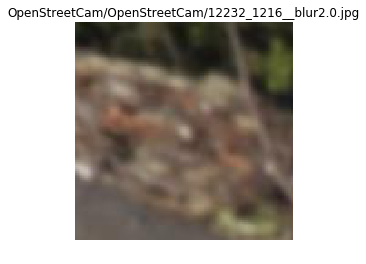

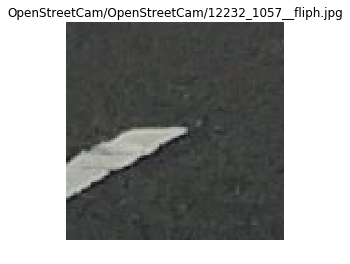

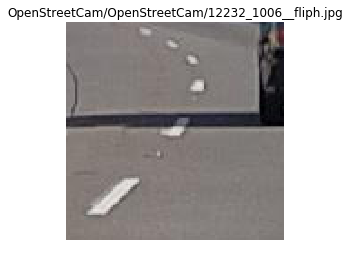

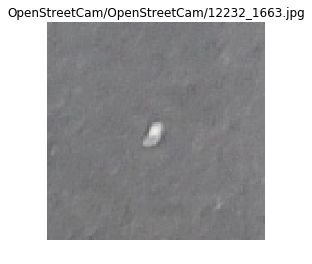

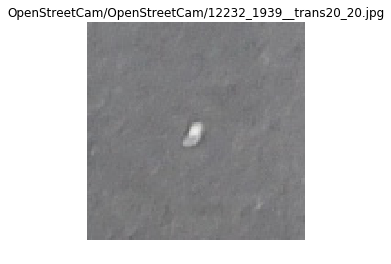

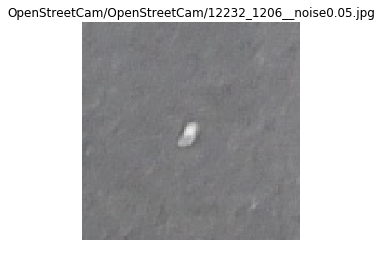

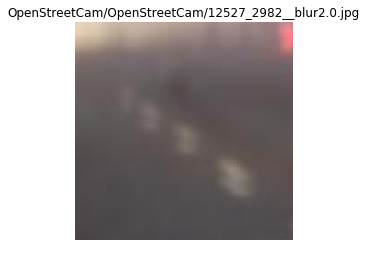

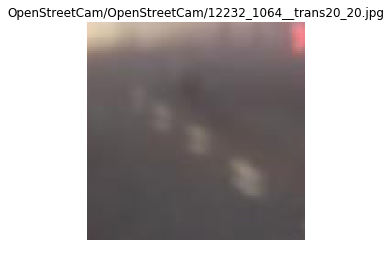

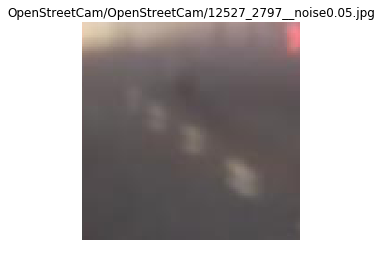

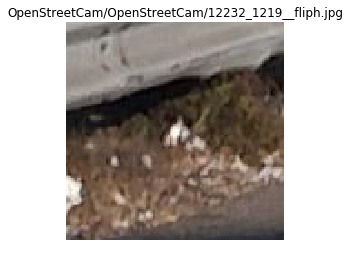

In [21]:
# Use Malaga and OpenStreet
test_sets = ['OpenStreetCam', 'Malaga']
test_set_count = 0

trash_results = []
for dataset in test_sets:
    sample_count = 10
    dataset_size = len(os.listdir(f'{dataset}/{dataset}'))
    test_set_count += dataset_size
    print(f"Identifying trash in {dataset} of size {dataset_size}")
    for img in os.listdir(f'{dataset}/{dataset}'):
        try:
            # Show image
            image_path = f"{dataset}/{dataset}/{img}"

            #### Infer
            infer_imgs = preprocess_image_with_opencv((Image.open(image_path)))

            for i, infer_img in enumerate(infer_imgs):
                pred_cat, pred_conf = infer(infer_img)
                print(f"{img}... Obj {i+1}/{len(infer_imgs)}: {pred_cat} - {pred_conf}")
            if pred_cat == 'trash':
                if sample_count > 0:
                    fig,ax = plt.subplots(1)
                    plt.axis('off')
                    plt.title(image_path)
                    plt.imshow(infer_img)
                    sample_count -= 1                
                trash_results.append((img, pred_conf))
        except:
            print(f"Exception caught for {img}")

In [23]:
#TODO: Append GPS coordinate based on file_name for trash images
print(f"Test Set - Trash Image Count: {len(trash_results)} / {test_set_count}")
print(trash_results)

Test Set - Trash Image Count: 874 / 9319
[('12232_1216__blur2.0.jpg', 0.90376127), ('12232_1057__fliph.jpg', 0.9042249), ('12232_1006__fliph.jpg', 0.86031383), ('12232_1663.jpg', 0.9316272), ('12232_1939__trans20_20.jpg', 0.9316272), ('12232_1206__noise0.05.jpg', 0.9316272), ('12527_2982__blur2.0.jpg', 0.8371846), ('12232_1064__trans20_20.jpg', 0.8371846), ('12527_2797__noise0.05.jpg', 0.8371846), ('12232_1219__fliph.jpg', 0.99969923), ('12232_1030__blur2.0.jpg', 0.89768255), ('12527_2064.jpg', 0.89768255), ('12527_2517__noise0.05.jpg', 0.89768255), ('12232_1059__noise0.05.jpg', 0.8870006), ('12232_1382__blur2.0.jpg', 0.8983334), ('12232_1337.jpg', 0.9796569), ('12232_1059__trans20_20.jpg', 0.9796569), ('12232_1204__noise0.05.jpg', 0.918175), ('12232_1300.jpg', 0.918175), ('12232_979__blur2.0.jpg', 0.8436178), ('12232_1010__noise0.05.jpg', 0.8617989), ('12232_1931__fliph.jpg', 0.9532912), ('12232_1196.jpg', 0.93271923), ('12527_2519__trans20_20.jpg', 0.9610778), ('12232_935__trans20_20